# The finite difference method for the Poisson problem in 2D

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

##### Note: The code parts of this notebook won't be relevant for the exam!

In [1]:
from IPython.core.display import HTML
def css_styling():
    try:
        fname = "calculus4N.css"
        with open(fname, "r") as f:
            styles = f.read()
            return HTML(styles)
    except FileNotFoundError:
        print(f"Could not find file {fname}!")

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

## The Poisson Equation in 2D

We consider 2-dimenionsal equivalent of the two-point boundary value problem, known as the __Poisson problem__:

Let $\Omega = [0,1]\times [0,1] \subset \RR^2$, and given
a right-hand side (or source) function $f: \Omega \to  \RR$
and a boundary function $g: \partial \Omega \to \RR$.
Here $\partial \Omega = \{0\} \times [0,1] \cup \{1\} \times [0,1]
\cup [0,1]  \times \{0\} \cup [0,1]  \times \{1\}$
denotes the boudary of $\Omega$. Then the task is to find
$u: \Omega \to  \RR$ such that
$$
\begin{align}
- \Delta u  &= f \quad \text{in } \Omega,
\tag{1a}
\\
 u &= g \quad \text{on } \partial \Omega.
\tag{1b}
\end{align}
$$

Recall that the Laplace operater $\Delta u$ is defined by
\begin{align*}
\Delta u(x,y) = 
\partial^2_{x} u(x,y) + \partial^2_{y} u(x,y)
= 
\dfrac{\partial^2}{\partial x^2} u(x,y) 
+\dfrac{\partial^2}{\partial y^2} u(x,y) 
\end{align*}

How do we compute a numerical solution to (1a)-(1b)?

## Finite Difference Method for the 2D Poisson problem

Instead of trying to compute $u(x)$ exactly,
we will now try to compute a numerical approximation
$u_{\Delta}$ of $u(x)$. In 1D, we introduced $n+1$ equally space grid points on $[0,1]$. Since we are in 2D now, we just apply the same procedure in every dimension and then create a 2D grid:

* Subdivide the $x$-axis,
and introduce $\{x_i\}_{i=0}^n$ with $x_i = i h$, $ h = \tfrac{1}{n}$
* Subdivide the $y$-axis,
and introduce $\{y_j\}_{j=0}^n$ with $y_j = j h$
* Defind the $N = (n+1)^2$ grid points $\{(x_i,y_j)\}_{i,j=0}^{n}$.

To each of the grid points $(x_i,y_j)$ we now assoicate
an unknow $U_{i,j}$  for $i,j=0,\ldots n $.

Below you see an illustration for the case $n=3$:

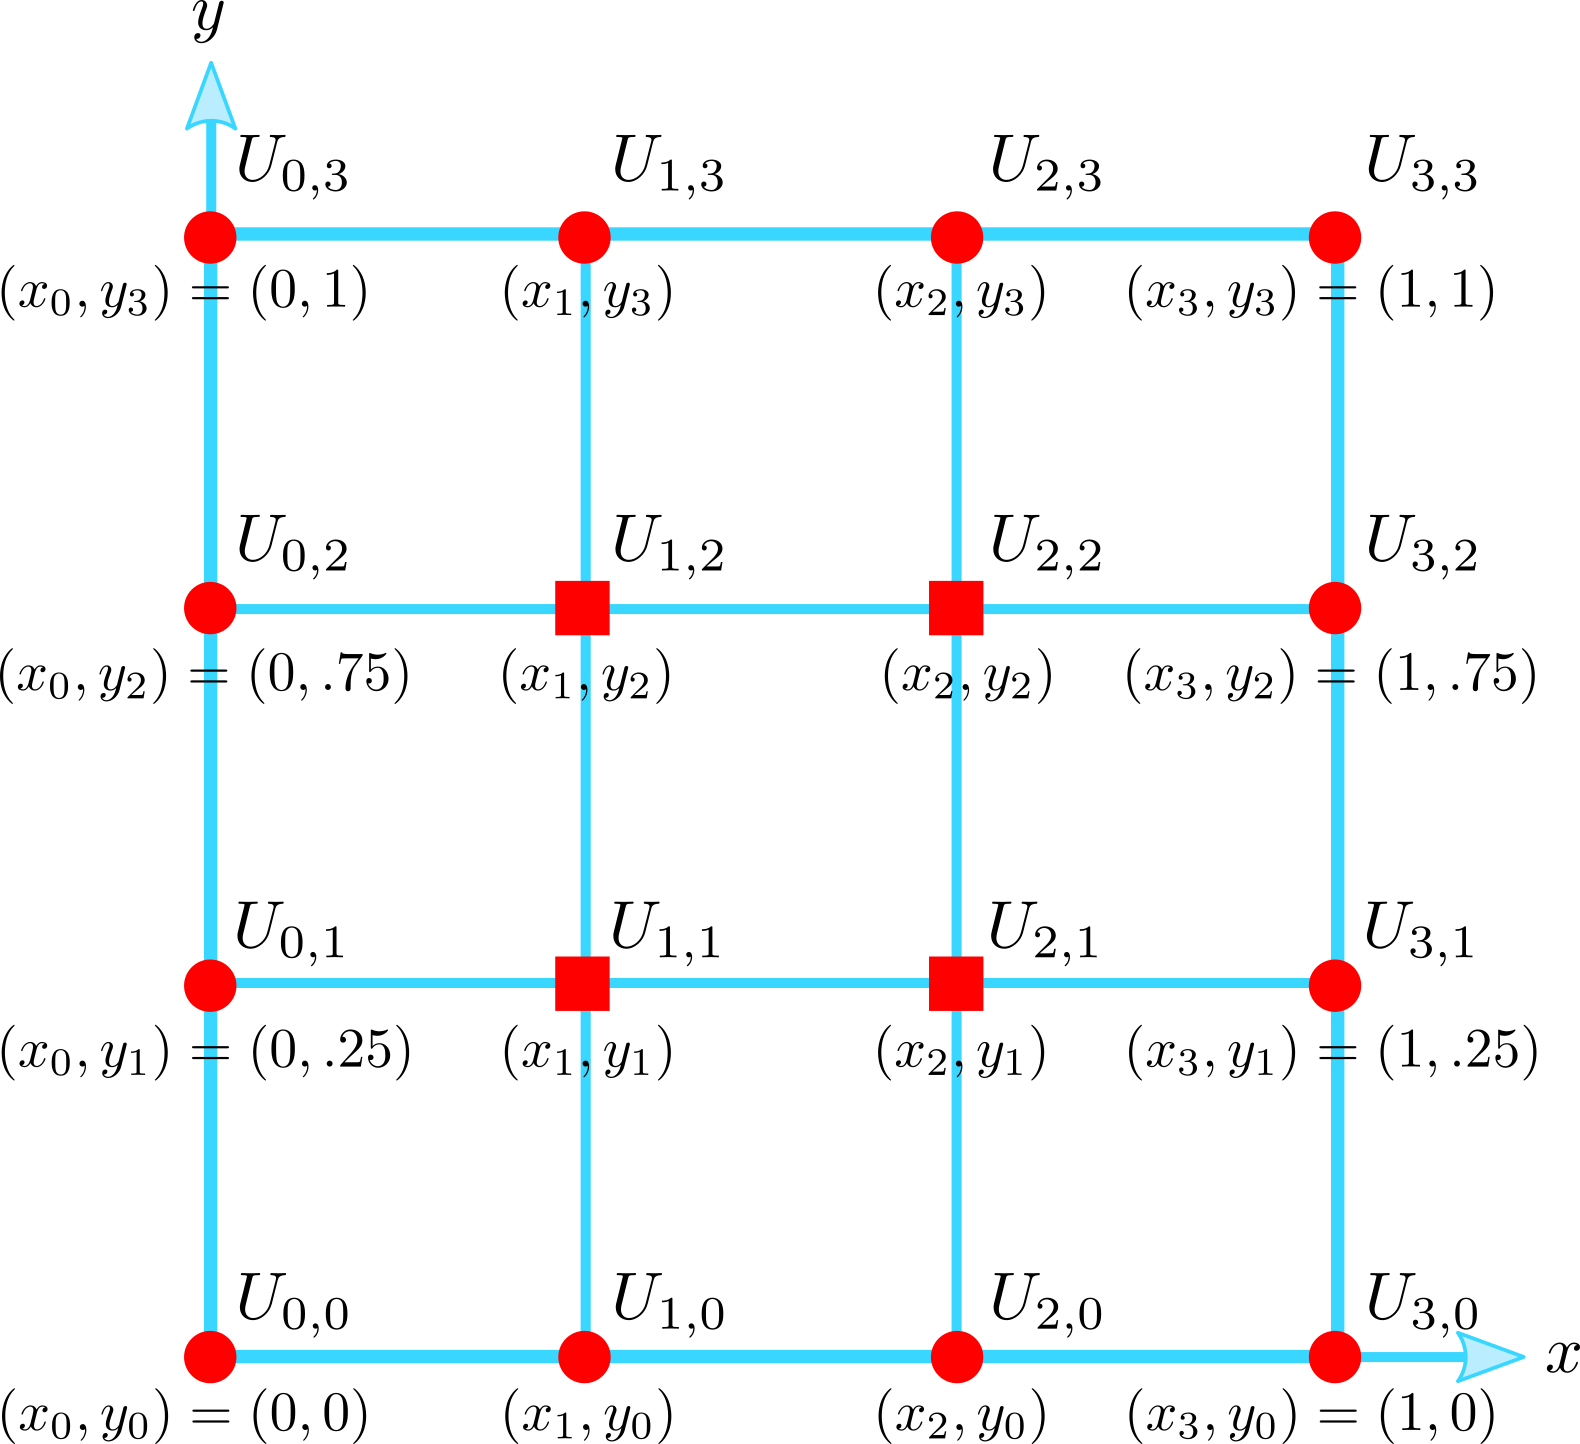

In [2]:
from IPython import display
from base64 import b64decode
fdm_grid_1 = "iVBORw0KGgoAAAANSUhEUgAABiwAAAWkCAYAAABW6ilQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAABi1AAAYtQB0eQKBAAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAACAASURBVHic7N15nFxVnfD/T3U6nc5GQlgSiIawkwQSduiwBRCUcRsFBx0EHOenM48+zqAzzrg8juuMM/Ogg+uIj+K4oIMyKiqiMyoIYsK+hrDKKvsWQvZ0n98fp65Vdbu6u6q6bt9aPu/X67667+06db5VgXPvPd97zgFJ1SwAzgPuBTYDTwM/AU4a5/v2AAcD88f5PpIkSZIkSZIkqcOdBqwDngO+CnwAuBoIxe3jDb7vIuC+4ntsAV417kglSZIkSZIkSVJHej2wFbgU2LHs+ExikiFJWvxxA+/932XlA/DNcUUqSZIkSZIkSZI60v7AJuDnwOQqf09GRwTgmjrfe3rxvcsTFp9sOFJJkiRJkiRJktSRJhGTEE8AO4zwmmcoJRsGiaMuanUilcmKAJzQaLCSJEmSJEmSJKkznUlMIrxthL/vxvCEw8I63v/DqbKbgKkNxipJkiRJkiRJkjpQD7AGeJjqU0EBvJ3KhMMgMKOOOn6VKv/rRoOVJEmSJEmSJEmdKZmu6X2jvCa9YHY9a1j0AxtT5T/aUKSSJEmSJEmSJKljXQAMAQtG+PvOwFYqEw7vquP9j8f1KyRJkiRJkiRJ0hgeAq4e5e/nUJls2ALsVMf7fwzXr5AkSZIkSZIkSaOYAjwGvHWU19xIZcLhR3XWcRWuXyFJkiRJkiRJksbhAIZP53R6HeWnAZtx/QpJkiRJkiRJkjQO51KZbHiBmISo1UkMT3gc3+QYJUmSJEmSJElSBysQ17coTzb8R53v8U+4foUkSZIkSZIkSRqHIxg+OuKUOt/jaly/QpIkSZIkSZLG1JN3AFILe31qfz1weR3lZwCHpY7VU16SJEmSJEmSJIm7qRwd8YM6y7+c4SM0TmhmgJIkSZIkSZLUKRxhIVX3EmDv1LGf1Pke6cW1NwMrG45IkiRJkiRJkiR1nTcyfHTEXnW+xzWp8lc0MT5JkiRJkiRJ6iiOsJCqG0jtPwvcV0f5mcDBqWMuuC1JkiRJkiRJIzBhIVW3e2r/WuIoiVodA/SmjpmwkCRJkiRJkqQRmLCQqpub2r+/zvIrUvuuXyFJkiRJkiRJozBhIVU3NbX/VJ3lV6T2rwE2NhyNJEmSJEmSJHU4ExZSdekExfo6yu7H8PUrrhhXNJIkSZIkSZLU4UxYSNWlF9jeocZyBeBcYFLquOtXSJIkSZIkSZKkur2GuMh2sl1cY7mPpMoFYBPDp5iSJEmSJEmSJEkaUx+whlLSYS2w3Rhl/hIYYnjCwtEVkiRJkiRJkiSpYUcTF8pOEg9fIU75lLZ98W8BuJThCYuPTkSwkiRJkiRJkiSpc50EPE4p+XA5cBZwIvBm4EvA88RFuf8GeAPDExbHT3jUkiRJkiRJkiSp48wBPkTlFFHJ9ijwGWBB8bVfTP19A65fIUmSJEmSJEmSmmx74ADgIGAXKqeIKgAP0dhi3ZIkSZIkSZIkSU1xOMNHYJyWa0SSJEmSJEmSJKnrfIrKZMUTOB2UJEmSJEmSJEmq02zgXOBu4EHgg3WU3Y64+HZ5wuKcZgcoSZIkSZIkSZI621TgdoZP6XRKjeXfkyr3INDf/DAlSZIkSZIkSVIn+0uGJysC8I4ayu4IPFVWZhA4KZswJUmSJEmSJElSJ7uQ6gmLgRrKfi1V5pMZxShJkiRJkiRJkjrcJQxPVlxYQ7lTgKGyMj8GJmcUoyRJkiRJkiRJ6nCfIyYcngRuAT4ATBqjzBHAOkrJip8CUzKMUZIkSZIkSZIkdbjjiEmHr9b4+lcDz1FKVlyAi2xLkiRJkiRJkqQmuIiYfPg40DvCa+YC/0ZpGqgXgDMnJDpJkiRJkiRJktQV+oGLiYmI+4BzgdOBlwNvIY6i2FD8+ybgM8DOeQQqSZIkSZIkSZI632uAn1NKTiTbRuCXwLuAXXOLTpIkSZIkSZI6UCHvAKQW1gfMB2YCjwFP5RuOJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEnSKFZcHnpX3B/6845DkiRJkiRJktpVT94BSO3uyNXhiM3zeHTzJl448o7w7rzjkSRJkiRJkqR2VMg7AKndDawJlwMrirubJm1l198sLTyXY0iSJEmSJEmS1HYcYSGNw5FrwkLguLJD/dv6OD2ncCRJkiRJkiSpbZmwkMahEDiT1Eil4jFJkiRJkiRJUh1MWEjjUeCMKkeXH3Vn2HfCY5EkSZIkSZKkNmbCQmrQ8jVhAKiamBiiaiJDkiRJkiRJkjQCExZSg0LgrJH/yFmE4P9fkiRJkiRJklQjO1SlBpxyT5hCgT9J9icVYN7kipfsNnAnx0x4YJIkSZIkSZLUpkxYSA1YO8irgTnJ/r5T4PCpqRcVXHxbkiRJkiRJkmplwkJqRKhMRiybAvv3w+TK17zhkOvDtIkNTJIkSZIkSZLakwkLqU7H3BN2CnBKsj+1B/aeAlMKsG9/xUu365vOayc8QEmSJEmSJElqQyYspDoNDvImygZTLO2Pa1gAHNg/7OUjL8wtSZIkSZIkSfoDExZSvUJlEmJZ2doVe/bBzMr/q04euCvMn5C4JEmSJEmSJKmNmbCQ6nDE6rA4wCHJ/o6TYH5v6e89BTigcpRFD0O8acIClCRJkiRJkqQ2ZcJCqkNhUuXoigOnDn/NsuHTQr0lq3gkSZIkSZIkqVOYsJBqFUJPD/xpslsgrl+RNm8yzOutOLRk+epwYNbhSZIkSZIkSVI7M2Eh1eiINZwYAi9N9nefArMmVX/t0tTIi9Dj4tuSJEmSJEmSNBoTFlKNeno4s3x/2ZSRX7usP65nUeaMQ64PkzMJTJIkSZIkSZI6gAkLqQZLbwnTCbwu2e8rwOIq00ElZvTAnpXpiZ2nTOPkzAKUJEmSJEmSpDZnwkKqwbQ+3gDMSPYX9cekxWiWpRfkTo3QkCRJkiRJkiSVmLCQalAgNR3UKKMrEov6ob/s/7AQeO2Km8LsZscmSZIkSZIkSZ3AhIU0hoG7wnzguGR/ux7Yo2/scr3A4sp1Lvq39POGJocnSZIkSZIkSR3BhIU0hjDE2cCkZH/ZVBhjNqg/SI/ECAWnhZIkSZIkSZKkakxYSGNITwe1tIbpoBK79cH2k8oOBI5efk/Ys0mhSZIkSZIkSVLHMGEhjWLgrnA4sF+yv+tk2Lm39vIFhi2+XWCboywkSZIkSZIkKc2EhTSaIc4q361lse20ZVMqp5AKcDYh1DqrlCRJkiRJkiR1BRMW0giWrA59BTg92e8pwP4NJCzm9MJLJlccWnjE3Rw17gAlSZIkSZIkqYOYsJBGsF2BVwbYMdnfpw9mNPh/TGpaKHqGnBZKkiRJkiRJksqZsJBGUqhMKqSTDvU4oB8qB1lw+sDDYRzvKEmSJEmSJEmdxYSFVMXA6jAH+KNkv78H9u1r/P36C7D3lIpDs8J6Xt34O0qSJEmSJElSZzFhIVVT4E3AH1IMS6fApHEuk31gajxFIVQu6C1JkiRJkiRJ3cyEhVRdRTJhaRMmb9p7+BoYLz9sdZg3/neWJEmSJEmSpPZnwkJKOXxN2IcChyf7O/TCSyaPVqI2PQXYv7/iUO+kOJJDkiRJkiRJkrqeCQsppRfOLt8/sB/GORvUHyyrTFhQSC3sLUmSJEmSJEndyoSFVC6EQoA/TXYLwAH9o7y+TrtOhrm9FYcOOuLOsLR5NUiSJEmSJElSezJhIZVZfhfHAwuT/YV9sP2k5taxNJUA6QmOspAkSZIkSZIkExZSuVTyYFkTFttOWzZ12BRTZ664PPRWf7UkSZIkSZIkdQcTFlLRIdeHaQFOTfYnA4umNL+emT2wR1/Fobmbd+Flza9JkiRJkiRJktqHCQupaMoMXg/MTPYX9UN/s1bbTjkwPXLDaaEkSZIkSZIkdTkTFlIicFb5bhbTQSUWTYG+ymTI6w65L8zKrkZJkiRJkiRJam0mLCTgqDvDrgFOSPZn9sCefaOVGJ/JBVhSufj21L6tpemoJEmSJEmSJKnbmLCQgDDEmcCkZH9p/7CFsZtuWX/qQGqEhyRJkiRJkiR1ExMWEhAKnFG+vzTD6aASC/tg+0kVh449+u6wR/Y1S5IkSZIkSVLrMWGhrnfEmnAIcECyv8tkmNebfb0F4kiO8kOD2yoTJ5IkSZIkSZLULUxYqOv1BM4s3x82VVOGlqWnnipwFiFkPRuVJEmSJEmSJLUcExbqaisuD70UeGOy31OA/ScwYbFDL8yfXHFor+V3cuTERSBJkiRJkiRJrcGEhbrapl34I2Busr9XH8yc4P8rqiy+fWbVF0qSJEmSJElSBzNhoa5WSE8HNQGLbacd0A+TyiaBCgXeeMo9YcrERyJJkiRJkiRJ+TFhoa519K1he+DVyX5/AfbNIU0wtQf2qax3+7WDpbgkSZIkSZIkqRuYsFDX2tbH6cAfUgVL+mHyKK/P0oHpRInTQkmSJEmSJEnqMiYs1LVaYTqoxN5TYHrZ/40B/uiI28LckUtIkiRJkiRJUmcxYaGuNLA67AUMJPuzJ8GCvIZXENew2L9y8e3eSZM5PadwJEmSJEmSJGnCmbBQd5rEWcAflro+sL9sJyfpER7BaaEkSZIkSZIkdRETFuo+IRQInJHsFsh3OqjE/F7Yqbfi0KEDa8IBOYUjSZIkSZIkSRPKhIW6zsCdHAvskey/tA/mTMoxoDLLKqeFIhRKiRVJkiRJkiRJ6mQmLNR9CpVTLR3YP9ILJ96yqZVTUxUCZ74hhBZJp0iSJEmSJElSdkxYqKusuD/0A6cm+73Akin5xZO2XQ/sXhnPrg+t4YScwpEkSZIkSZKkCWPCQl1ly0b+mMDsZH+/KdA/jv8LArBpCNYNwXOD8ffNYXwxLkslUApw1vjeUZIkSZIkSZJaX+/YL5E6R0h1/tey2PZggCe2wWPF7fltsHYInh+ELSMkJwrAjB6YNQlm9cTFtHeZDLtOjqMoRrO4Hy5dV3rvQoHXHXVnmHn1foV1NXxESZIkSZIkSWpLJizUNY65I+yyrcBJyf6MHtirr/prn9gG92yGe7fAQ1tj0qIegTjqYt0QPAKwufS3WZNivXtNgT36oL9QWbavAIv64ZaNfzg0fTBwKvAf9UUhSZIkSZIkSe3DhIW6xrYCZ1D23/zSfugpSxasHYTbNsFNG+HpweziWDsIN2yM26QC7NkHB06F/friPsCyyoQFBTgTExaSJEmSJEmSOpgJC3WTM8t3lvbHkRD3boGr18P9W+p6ryFqWAMmwFBhlNcNBrh7c9xm9sAR0+CwqXHkxXY98MLQH1664ujVYcFvlhQeqitKSZIkSZIkSWoThbFfIrW/o+8KywaHuDnZ37kXjp0Ov14PT20bvWyhwMMBrmCIG3sCNwzBanr4KXDEmBUP8orCFO4NgxxM4GDgSGA5MMJkVHFKqEOnxsW7bygbZRHgg6sWFf5pzDolSZIkSZIkqQ05wkJdYWiocrHtpwfh4rWjFlkZ4OIwxM+uWVK4I/3HgTW1LWoRehhcuXfhPuA+4HsAK1aHGZsmcUIBXkPgNGBWeZktAX67YXg2sTgtlAkLSZIkSZIkSR3JERbqeCsuD72b5/EwMG+Mlz5egPPDEN9auaRw72gvHFgTVlHDCIsQOGnV4sIvRozt/tC/aSOvLRR4O3DCmO83xJGrlhSuGet1kiRJkiRJktRuHGGhjrd1LiczWrIisAb41OzJfOuyvQubJyww4IrdC5uAi4CLjrozHDo0xHspcBojrHtR6OFMwISFJEmSJEmSpI4z5qLBUrsbLFQutl3msRB420sWccDKxYWvTnSyIu3q/QrXr1xcOJ0hDg1w+Qgve+OS1WHE9S8kSZIkSZIkqV2ZsFDHK8BxqUPbgE+u38LeqxYXvvK9QmEwj7hGsnJJ4aZViwonEHg98GjqzzvMLLB/HnFJkiRJkiRJUpZMWKgbrCr7/bYhOHLlosIHbl1WWJ9bRDVYubjwg0lb2b8AF5YdfmrrFO7LLShJkiRJkiRJyohrWKjjrd/CmTMmc/ZQgQ3rhvj26iWFLXnHVKvfLC08B7x5+Z3hgqEhDu3t5eIb9iyszTsuSZIkSZIkSWo2ExbqeMWRFF/MO47x+O1+hV8Bv8o7DkmSJEmSJEnKilNCSZIkSZIkSZKk3JmwkCRJkiRJkiRJuXNKKKn9zQYKwFbgxTrLTgGmFX9/Hgg1lusHptZZZxLnc/UEKEldqkBsNwE2AxvqLD+V2FYPAfWsfTSNeG6otc4kznrrkaRu1wvMLP6+gdju1mMGMBnYBqyro9zMYt211pnE2ci9hiR1o6S/BOAFYLDO8knfyUZgUx3ltq+zziTOeuuRMmfCQmpvHwM+VOV4+Q3IWmJH0nbAJOLIqllVypwHvLuGOrcH7k+9RyAmPJL6eog3NuUdbomPAh+poR5J6mZfB86scvxFYqcRlBLAyc3JZGIHVto5wGdqqHM/4Nbi+yTKO8KeA/qA6VR2tCXeUoxbkjS2VcAhVY4n1+6DxE6n8mv38oeNyp0M/E8Ndb4auIR4jZ7YAqwvqy9JeCftfSIARwLX1lCPJHWrucC9DL8mL3+4J3kwqLxNn05sd8ttKr7fCzXU+3+Bv00dW09s45P6koR18oBSYh2wA6V7DCl3Jiyk9rYdMRs+NXV8GqUT3/aMbQOwusY6q3WGFcrqGa2+LcAtNdYjSd1sBvHmYkqV44la2ve1wN011jmLmKAoT1j0Ulv7vh5YU2M9kqR4/b6N4ffk5Q8F7VjD+zwBPFRjndsTO6TKO8X6yvZHq+9J4OEa65GkbpX00aT7TXqo7dq93B3UPsp6JjGxXJ6Qnk5l4nkkN2OyQi2mMPZLJKUNrAmrgCPGel0InLRqceEXExBS8qTrDGAp8K/A4iqve4g4umEl8UnZjdSWra9mR2C3Yn3nFH+WC8CvgIuBa4BHgaeITxZIkmqTPOE6m/gk7ueAeVVedzvwceINx3PEm5v1DdY5j9i+H0p8Umth6u/bgEuBHwI3AI8T23dJUv2SEQ1zgaOALzA8WQ1wOXAucBel6/iNDdTXA+xKbNuPA94DzEm9ZgPwPeBnwE3EpMjzSJLqMZPYni8ATgf+boTXnQ98E3iE2D9TPqK6Hn3Ea/iFwOuAtzE8Kf54sa4riAmRJ6l/6llJUisaWBNWDawJYaztyDvCy3IK8cvEhEF6Oyyj+qYSpxFJ6nkWOCmjuiSpm/03w9v2LcTOpyzsSLyxSep6ADg4o7okSbHDKt3OP0z1JEYzLCGeR5K6riF2eEmSmmcvqvfRXJxhnW9L1fU1ahtxIeWuJ+8AJGXiqCrHfgdcl1F9G4EfFX8PwGnUNo+uJKl2k6g+uu9K4ii2LDwNJCMFNwGvAG7MqC5J6na7AfOrHP8B9S/KXavVxFF6EM8lrwAezKguSepWy0c4/p8Z1nkRsX8G4DLgrTQ+AluaUCYspM6zE7CoyvGfZ1zvpOLPy4lTQUmSmusg4ry4af+dcb1J+/5t4M6M65KkbnbcCMezbueTKUM+TZxuSpLUXMdWOTZE6cGgLEyitBTAhyklL6SWZ8JC6jzHUH19miszrjdZw+LCjOuRpG5V7UYH4NcZ12v7LkkTo1o7Pwj8JsM6+4F9ivV8J8N6JKmbVWvfbyXb9YEOKP68i+xm25AyYcJC6jwjdWhlmbDoBY4mZuwvzbAeSepm1dr3F8l2iqadiaP21pF94luSul21ERZZd2gdSVwf40aym15QkrrZLsDeVY5n/dDRiuLPH2dcj9R0JiykzlPtRucesr0BOYQ4TckdwBMZ1iNJ3aqHmBhO+y2wNcN6jyeO2rsS2JZhPZLU7XYhLsqalnWH1vHFn1dkXI8kdasVIxyfqPY963qkpjNhIXWWOZSm7ijnjY4ktbelwA5Vjmc96sEbHUmaGCeMcDzr9jep13ZekrJR7aHSAFydYZ39xBF0WU8rKGXChIXUWY6l+v/XE9WhdUXG9UhSt1oxwvGJSkhfnnE9ktTtRurQyrKjaRpwGLFDK8uOM0nqZiuqHFsNPJlhncuJSYubyHZaQSkTJiykzlLtRgeyTVhMBo4i3lA5v7kkZaNa+74JuD7DOnchLsS6lnizI0nKzooqx1YDT2dY51HE9StuwA4tScrCLsC+VY5P1EOlPnSktmTCQuosK6ocewB4MMM6Dwemk/0TApLUrXqAY6ocX0lMWmQlmSbkKuLTt5KkbOS1IKujpCUpWytGOO76FdIoTFhInWOk9SucDkqS2pvrV0hSZxtp/Yqs2/kVxZ+285KUjZFmwbgqwzqnU5ruL8t6pMyYsJA6x0jrV/hkliS1txUjHHf9CknqDHl0aM0ADgW24YKskpSVFVWO3QU8lmGdRwN9xOn+XsiwHikzJiykzjHSjU6WHVpTgAHi+hVm7iUpG9Xa9y3ANRnWuQDYg7h+xc0Z1iNJyqdD6xjiWnR2aElSNuaR7/oVV2Rcj5QZExZS56jWofUYcF+GdQ4AU4Hbcf0KScpCgfiUVNq1wIYM602mJ7kS16+QpCy5foUkdaY8HioF23d1ABMWUmeYRfX1K7KexsPpQiQpW/sDO1Y57pNZktQZRurQsp2XpPaWx3R/M4GDidP9XZ1hPVKmTFhIneFYYFKV4y7IKkntbcUIx7Nud5MbrCsyrkeSul0eHVqzgIOwQ0uSslStfb8feCjDOo8FenG6P7U5ExZSZ8hjqOE04HDi+hVZJ0YkqVtVa9+3ASszrHNPYDfi+hW3ZFiPJKl6O/87su3QOo74sNP1wLoM65GkbrUTsKjKcaeDkmpgwkLqDNVudJ4kLtaXleXERbdvA57OsB5J6lYF4qKoaTeSbQdT+eg516+QpOzsDOxX5bgdWpLU3o4jXsun2b5LNTBhIbW/mcCBVY7/mjj6ISuuXyFJ2VpE7MxK80ZHkjrDSB1arl8hSe0tj/WJZgPLcLo/dQATFlL7O5o4R2Fa1jc6JxR/un6FJGUjr4VYVxR/XpFxPZLU7fKY1nUOcACxQ+u3GdYjSd2sWvv+CHHKv6yswOn+1CFMWEjtL48bnRnAIcAQ2S4IKEndrFr7PgT8JsM69wN2BZ7F9SskKWsjdWjdn2GdK4j9ANdhh5YkZWEOsKTKcUdJSzWq9lS2pPayosqxZ4HVGdZ5DDAZuJnmrF/RBxwKLAS2A7YCDxJvpNY24f2bZSqwFNgDmEXsOHwWuBu4g/ikmiQ1S7X1K24Bns+wzuRG50piG9dspwIvAj/P4L3HYyZwEPDS4u/bgGeIbfs9ZPNdSOpuc4DFVY5fkXG9zZzWtYc4/cjuxCkMtxCvje8sbq1kR2I7vwswjRjrU8CtxPsOSWqW46j+gHg7JSz6iaPx9qLU9/Ecse9jNa3V97GQGOtOxL6lDcBjwA3Ec5IkdYeBNWHVwJoQxtqOvCO8LONQZhAvtkNq+0HG9f5rsZ5/G+f7LAK+Bqwvvt8m4gnw+eL+FuAnVO+0m0ivBH4MbKb0Ha8lnqST/ReAbwBH5BSjpM6yL8Pb9ma0u2P5brGec5r8vnOArxff+94mv3ejeoAzgF8RFxdPvuPnqPzOnwa+SPWORUlq1Ouo3s6/LeN6by/Wc/I43uOlwGeBJ6n+GQIxGfBlqq+1N1H6gb8idlolcQ1SutdItgeBTxJHGErSeJ1H9XZx3wzr3IHYvm0lPnzTqJcDPyT2zZT3dZT3fbwIfAs4ahz1jNdc4J+J7XcS12ZKfUvJdj3xPDA1nzAlaQK1UMLiZKqfCN+dcb3XFet57Tje4xxKJ8H/ISYlyhcd3AP4AvGkMwR8nvg01ETaAfhZMcY7gfcQR4Iko9P6iCMuPk/pBD4EXMj4LhIk6e1Ub99fl2GdBeDxYj3LmvSe+wCfIHb6J58hy6lOarWQ0rnsOuAvgf0pPQ3XT0xAf5tS3FuJCaPJExyrpM40UofWPhnWuTPxWnULML3B93gX8Rp+kHgN/y7gVcApwFuB71DZYTREfEBpzngCb8DhxPPNEHFU35nAnmV/nwm8jJi0Lu+Ey/o+SlLnu4nhbftjVPZ3NNtpxXoaXZtoNvCj4nvcA7yX2I4m172TidfK5xGviZPP9V3iCIyJ9BZiEmUjcAHwGuL5LbEz8aGkeynF+RBw0oRGKUkTrYUSFv9I9RudgzOscxaxc36Q2KHfiI9TivXjjH7iHiCOZgjA1Uxc0mImcajjWuBPGfvi4o1U/hvchEkLSY27kOFt+xCVF+PNdkCxnmdobJ2zPyY+6fQlYifWQ5TiLh/BkHfCYj7xpvH31PaE8fup/Hf4GU6rKmn8bqZ6h1aWTi/W0+haSJ+j1A7uOcrrFlB66CfZ7iGOzJgIhxGnBLmVsRPwPZRGACbbZzONTlInm03laIRkuyjjer9QrOcfGyg7jdh/sQ44m7HvA15HvL5PPttq4ueeCO8o1vlfjH1fNJvKc+1W4nlQkjpTCyUsrmb4iXAtMCnDOl9TrOfGBsufSinWi2ss84ayMv/VYL31+myxvh9Q+5Nu36fy3+Kr2YQmqQs8wvD2/baM6/yrYj3fb7D8FynF+jxxnt6PEDu1yj9P3gmL5OmxLxOTF2MpUDmdSAA+lFl0krrB9lQmcpPtPzOu90vFej7RQNm/Lpb9GrXda0wmTitS/vnupvGRHbXqAe4idqb9A7U9QDSDypGAgXjPIkn1SvpL0ts7M653TbGeRqb7+5di2R9T+xSo5aOQQ3E/awuJM3A8T3yotJYHrI6gMs71wG4ZxSdJ+WqRhMU0KtdUSLZLM6wT4nQYAfh0A2VnAI8Wyw8Sp32q1bWUPuNxDdRdjz7iN6OybwAAIABJREFU0wXlJ7X9ayiXPLWWbFuIcytKUj32ovqNzhcyrvcHxXr+qsHyOxLn/55R5W+tkrCYT2Un4ZPU1k7/PZX/Fk/j1FCSGjdSh9Y7Mq73rmI99d6j7Eq8Nr6ReJ1cqznEUSPln/G8Ouuu14mp+m6htpjToyxWZhWgpI72Kaq377X0JzRqLo1P99dDXJg6iXMjtc3Y8VoqP9824ui6LH00Vef5NZa7P1XuXzKJTk3VyHB/Sa3hMKpffF+Zcb2vKP68vIGyfwnsUvz9t8Dv6ihbPhrj4w3UXY+XUtnhNo04T+JY7kvtTyaucSFJ9Vg+wvEs2/cpwPHF3xtp3yF24j9KnAO8Ve1L5fXvTsRRfGNJn692ID7lJUmNyKOd34M4angz9XfG/xnx2vgu4tOqtXqWOI1Uub8g2/nOF6X2lwJH11Au3c4fRLaj1iV1pmrt+zPEaZOycgpxRPC1xIct6zGPOOov0U9cj2gs6b6PScCBddZdr3T7/lZivGNJx3pIc8JRlkxYSO1ryQjHG52TthYHAPsRn7D6RQPl3172+/V1lr227PdjaN6CsNU8R8y8l9tUQ7lq61z4BK6keo30BNbVGdZ5ErED6R6yn3oqT89WObaxwfeyfZfUqGrt/HNk26GVJGd/Rv0dWq8s/nwjMalyTh1lv5fa7yc+mZuVZrXztvGS6lWgej/Nbxnev9BMSfveyLSua4mjj8u1at9Hun3fwvDYq0nHavveBkxYSO1r3yrHthIXS8pKciK8hPov/PcF9i7br/eGLN2B9qo6y9fjWeCfKF1U3Mnwp8OqqTYX+t3NCkpS16jWvv+eOK1SVv6k+DPrBQHzdjPwzbL9q6ltzt1dU/tbgQeaFJOk7lOtnb+OienQaqSdX5jaf08dZe8hdoiVSz8l20zfpzLB/y1gVQ3l0u38fdTWESZJiV2pvm7OtVWONcv2xGn+hoDvNlB+PfDhYnmAe4nTgI8lj76PTxPviSBOQfVe4jX5WNKx2kfTBkxYSO1ruyrH7gU2ZFRfL3BG8fdGFgQ8JbX/WJ3ln6EySZJlwgLg/xAXYzqQOLLkiRrKHJnav5v4byJJ9ajWvt+aYX2zKT3tmvWCr63gLGICfX/gWGpLwKfb98vJ7nwrqfNV69DKsp0/gDgFxgbioqr12pzar6WDqNzTqf10cqCZNhHb9gOAPYEzqS0RlG7nf9rkuCR1vmptO8S1dLLyp8Spwq+m8Yeb/pG4/sRBxEW3fz/6y4HhbeaDZDtKEGL/yt7E89l84Is1lJlDnA6xnO17G+jNOwBJDRuqcqyeNSHq9WfEuW9XE4eS1ys9d+wzDbzH48Duxd8PIiZdq30PzfJwcatFD3Ba6lgjC5NL0kS3739LTJL8jOxvNFpFPcnkmcAfpY7Zvksaj2od6PdnWN/Hij//ncbWGfo08Nmy/X+vs3y6E29dAzHUYwi4vY7XLyYmOBJbgM83NSJJ3WCkvoms2vepwPuLv587zvf6PbUlKiBOsZReA+48su2bSWwEbqzj9X9C5ZRQd9NY4l4TzISF1L4er3LsqYzq6gc+VPz9/9DY8Oj9UvuN3CyVPwU7BXgJ8FAD75OFM4hPcSV+A3wlp1gktbdq7Xv66dRm2Qn4K2Ln2QczqqPdnUPlqJfvAD/PKRZJneFx4kKn5bJq5w8jjqJ7EfjXBt/jc8Aa4jpyK6nv4aU5wI6pY602HceHqOzQ+jiOkpZUv5FmZciqn+adxJEG1zKxnfCnEhO9ieuAL0xg/bWaBvxN2f424C+LP9XiTFhI7avayTCreVbfD7yUeCK8pIHyPVR25kNjsaYXf9qb1khYLKbyqbPbgdfjvLeSGlOtfc/qwvpc4pOv36O+p5W6xXGUEvYQp4L685xikdQ5qiWms2jnJxOvUQvE9v7JcbzXL4pbvU6kcirqQGOjtbPy58TFxBMXEKdHkaR6rSU+ZDk1dTyL9v0llEZXvI9s10AqtzeVo+zuJCbF650qMGs9xCmj9iruDwJ/QbyWVxtwDQupfd1c5dgOGdRzPPGp203A22jsRDiNOEqjXCMn7S2p/fSTaXl4FXAFcQ54iJ1+R5HdUxSSOt9Ete9nFbeniKMIVNIDnE2c43YycYj7F4BXUNuaF5I0mmrzmWfRzn+COM/4rcC/ZPD+tUgneS+jNUZY9AMfAL5c3N8E/D3w/zFxHX+SOs9EtO+9xBG/c4CvMnGd8CcDV1IaNXcJsJz61yfN2lzgQuK1PMT4Xk1MSKtNOMJCal9XE4eOlw+x3n2E1zZqHrGhnwS8i8YXA5xe5VgjGfj0gn/pJxey1AO8EtiluC0knpyTBZx+Q3waq5WeGJPUni4lJnXLr9Oa3b4vIT51FIC3AI82+f3bST9xjYq5xPPeXsR1lxYQv59LiZ1+q/IKUFLHuYTYOV5ujybX8UrgvcB64giC9EjliXAksYMrsRn4uxzi2AE4iXjftAuwiNjO70R8IOoi4jRQ9+QQm6TOcgnDF6Teg+Ymaj9BbMPuIE7t2mwF4rXxrsQ2czdggNh2Qpwa8JO0xloQ+wKHE9v5BcT1iI4i9hU9C3yJOB3i2rwCVGNMWEjtaxD4IfEpoMQBxAvvZjzdPw/4FfEE9T3qX1yvXLWERSPTJaVHWExkwmJH4uJ7yaKBPcCs4u9biMmj+cTRJBsmMC5JnecZ4pNSJ5UdO46YPG7GVHOLgP8hts3nEkcRdLP9iO17MhKwl1Jb/yLwAjFJfQOtN9xdUnu6BniYOOVq4oQmvv/LgO8SO53+N3H9iYk2hXj/UL42xHuA1TnEcjxxQdi+4v4U4jU7wPPEZM6exHUrHF0haTy+T3yQsXxGmxNo3oON7yMmvJNkdBZ9D7OJ18ZJf0eB0owSW4l9H7sAM2hsbdJm+vPilpxrplNq658gXtcvAG6b+NAkaYINrAmrBtaEMNZ25B3hZRmHshtxaopQtr23Ce87nzgXYTLH7JRxvt/+VMYYiHMu1uuy1Hvk8YRWuT7iKIsLiE9DB+LJ+93EjkVJatSRxGmIytu805rwvvsT504PxCHkEzU96COUPsf9E1TneEwlzrv+fUpxPwy8Oc+gJHWUP6OyjR8kttHj9XJiB1YA/rYJ79eoT1P5+T40+ssn3CzgdcRR60mMt9PcxJGk7vQ1Ktu/Rxh/nwrA/ym+33pgRRPerx59wBHA+cSkRSCOYPg7Wu9h+JcQF9d+gBjnEHHEdLNHMkpSa2mhhAXE7H35yfAJKqeJqtcplDqzfkFzRjHsw/CExcIG3ucXqff46ybE1iynULo5DMSno2eNWkKSRvctKtu82xm+HlA93kIcLRCAbzCxa5m1W8Ki3FuJHYlJ/P9Jc246JXW3HuB6Ktv5H1E5IqEek4B/oNSR9IEmxNioP6Ey6f6vOcYylgLwz5RiHSLeXzX67yBJ8yldczfjwdLtiaPmAvGB1YnoZxrNicA6Sp/tauJ6Gq1mJnFUeRLni8REtSR1phZLWExm+MiDX1F/p9Yc4HOUbi4uoHlTLs1PxReIc4TX64rUe6QX8cvb/6IyvusYX+eipO42E7iRynblG9Q/guslxPm5k46Yf2rgPcarnRMWEBerLf93uISJTfhI6kwLiWsIlbcvH2zgffYHrqLUmfW2JsXXiKMpjQDfSrw+bgc/ovLfIa9FyiV1hlMoJZADcRrpRkZwvRJ4kNJo36OaFeA4vYXKNvMWqk8FnrfZwEOU4twGvCbXiCQpKy2WsIA4d2Byk1LeWb5fDWV3Ji4yt5ZS1vnsJsc3OxVbIC6OVK/fpN7jjc0KsEl6gPuojPFzuUYkqd3tQpx7vLxd+SkxETyW3Yjzz24qlnuKePOUh3ZPWGzH8Cfl/ibXiCR1ioOII6TL25fzqW2k7jJiQjoZBXZX8VhejqLUVj5H5VpMrW4JlaNChoiLzkpSo84iJiqSdmUz8C7GnkJpErH9WVVW9jLGN5NGsxWIi36Xn7u+kmtEI0s/WPoccUFxSeosLZiwgDjS4l+pvNDeBlxMzH4fQpyz7yDgVcSFmq6itPbCEHGai0ZGPoyll8rpNAKNzdG7MvUerXgT8XEqY9xKXMRPkho1gziyorxt2QT8B/AmYufUHsBhxCeGPkpcIDo5H2whLnw6b4LjLtfuCQuAbzL8Zsep/yQ1w67EEdLpNuZzxHZ9f+L15HLiekafAu4ue+06Yts/Y6IDL7OcUrLibmBRjrE06gYq/w1uw6mhJI3PEcRr3/K25V7gI8DxxIdM9wWOJSY4vgY8WfbaB4j9Oa3YFn2Ays81CCzONaLqZjG8P+oLuUYkSVlo0YRF4lDgvxjeII+0bSVObXFwxnGlRx4c0sB73JJ6j0ZGaWTtjxj+HTcytF+S0k4EfkltbXsyLcg3yCYRXa9OSFi8g+Hf8Rm5RiSpk/QQRw/fTO3t/HPAvxFHTOepPFlxGXF0dTv6PMO/44NyjUhSJ5hBXMMiPQXgaNv9xDU7W3ndtOMZHvcnco1oZLdRGecztN5i4SrjP47Uea4HTgV2B04mLsi0L7ATcZ2KF4lz+K0mLgx9KXGR7azdRXwCOLF9A++xU9nvW4HfjSuike1AXIwpSeY8X0fZ31c5dmQzgpLU9X5Z3BYT2/cTiW39TsTOoReIT2HdWnzdT6mv/eoGLyXOBfw88EPiSJVajdS+X9iEuCQpGe18EXA48Rr+eOIUgHOJa8utJT6ZexPwC+Dn1NeOZeEoYpJiJnG09weID07lZQnxe3uQeJ8zVEfZkdr5m5oQl6Tu9SLwf4HPEtunlwEDxNHPcykloO8EriG27VcXj2dte2LfRyD2fTxbR9mJ7vs4kXgfdA1wbZ1lH6Fylo85wD7Eaa3UgkxYSJ3rfuL8t+fnHUjRdVTOnb5DneV7iCeVxM3EhEKzvYSY9Jlb3P89cdRKrUmdF6scm1PlmCQ16o7idl7egbSZg4hTISYLAt5GvKnaUGN523dJEyEQO2OuAf4x51jGkiQr+oG3EqcyGc1kYqfRN4hPGzfbqcSEz6Ti/iWUOuJqsa7KMdt5Sc2yGfhZcWsF84hT4SXrOTxB7Pt4pMbyE3lt/Gng3cXfA/Ec8qk6ynsd32Z68g5AUte4NLW/R9VXjWwBlcMhfzq+cEb0dkrJCohPtb21jvLVRo48Nq6IJEnN8B5KyQqAA4A/rqO87bsklSwnJisAXsvYyQqIT8buTBztnYUPUEpWQIxraR3lq3Ve2c5L6lRvpXLx6bnA2+ooP1HXxjOI02MlCsCHqG9dD6/j24wJC0kT5Xpixj5R72JM+6X2L6v6qvGbW+XYtDrK71rl2PUNxiJJah7bd0lqjqOITwg/TRypVut1+WHFn2uyCIps2vkbGoxFklpdtTZzepVjI5moa+O5DO+/7q9ybDTzU/tPE6cOVIsyYSFpogwBF5TtH0V9GfHjy36/ldrmLCwAf06c4/cnwAk1lEmvi7EJ+E4tARYdl9ofBL5dR3lJ0th6iUPBfw1cTG2Loqbb92eJ04XUKt2+rwV+VEd5SeoEyTRQdxDnYK9n/u83Fn/WkrCYAfwLcR73rxHXIBpLup1fTX3znB+b2r8VuKWO8pLUTtJt5mbqW5stfW0caiy/B/B1Yvv+T8Q1mkbzEMOnA/86ta+XNJe4rmu57wDbaiwvSe1hYE1YNbAmhLG2I+8IL8s71hazM3Gh01Dc0ie4kUwmLiSblDu1xnJnl5UJxJPc8jHK7Ek8cQ0CXwQOrLEuiFNWPZyq89/qKC9Jner3lNrFB5rwfh+msq19gbGnGjy++Nr1wLk1vL7czsS5b8vr/OtRS0hS5zmK2N6uAz4C/H0N2/uJi83+mNh2rqW2h5YuorLN/R0xiTGadxZf+wjwMeqbn/ywVH0BOLmO8pLUbl4KbCE+XHo+cf2KWvUC91LZZn6phnJTie15ebmLayiXnBOuA/43ldP/jeVvUvU9S1y/Q5I6iwmLcXk7pRPFtUBfDWXeU1bmJ3XUldwYlW8/qKHc5ymdcOs5Eb4/VdeNjH1jJUmdrpeYJEjaxrXU17ZWcxvD2/daEsQ/Kb72g3XWd36qrssY/2eQpHaynJisSLe99W6raqirl/ikb7rsWHOrTwNuJz58dFrNnyy255en6jqvjvKS1K7OJbZ5/0Fse2t1DpVt5u3ArBrKHcPwtn2I4SMg0hYRk+VPFH+v1bximaSues8PktQ+TFiM25conTAuZPSkxWuJWf9AHNZdz5NS32T4yXALY5+I+yh1av0K2L+Gus4gnvySem4GdqojVklqd1OJoxb2Ag4hjqI7m9i5n26Lf1r823HF1+5dLFtrkveqKu95fw3lZhOT5QH4LrBwjNcXgPel6vkF9c2JLkntboDmJCuSTrFaPF2l7KU1lNubOJJviJjIHuveoQ/4SqqeL1Pf1LWS1K56ge8T274rqW2GidMo9dEk/TS71FjfAVQ/N/xdDWVfTXwIai3wDuJMHKOZC1xTVscW4M9qjFOS2o8Ji3ErEIdpJx38twJvoHRDMZk4H/lXiVMzJYmDehMABxKz8MkJalPx54Iayk4C/oF4QhwiPnX198S5becVY5wNnETpBJ9k7D9DXARKkrrJyxl/R9aba6zrFCpvlDYV92tZn60f+Fzx9VuJo/HOIS4cuxOx/d+RmDC/IlXHB3BkhaTucw/NSVYE4vV0Lf6KeA1e3gbfVmPZnYhTjAwRr+UvBP6CeG+wA/FcMR84i8oRe88CZ9ZYhyR1ih7iAzrriO3mlcTZI1YQ+z76iKMnTiQ+8JO0zYPAv1P/gzwXU3le2ESc5aIWBwE3FMs9RrymfxMxWT2T2E+zLzEBUj6yYg1x6j+1CZ8akBowsCasAo4Y63UhcNKqxYVfTEBI7epg4onxjyllx58nPmGbjIK4ifh01LeIJ5p67U7sdArAfcSOqSXUvkDgLsQbnDcy+jDFx4nTTX2qWI8kdZt9iJ0/64r7G4hTegA8l3rt9sWffcD04u8ziAngm2qsbwnwSuJ5Ywj4f8X32lBj+b2J7fufMPpirg8Qb87OI94YSVK3+TBjL4paq+9Q+0LWRxOnD3mYOAXIGYw9Mq7cYcRppE5l9JEWq4kLuJ5PHEkiSd1oLvHa+HRg8SivexK4hNj3cVcD9fQArwf2I04T+H7i2kNn11i+QOxDOpv4wNRID4tuA1YS1yb9HrUv0q0WYMJCaoAJi6abRvw+dyM+9bSB2Cl0LfBoE+s5Gfg5cfHUpxooP5eY0d+V2Nm2kRjn3cQbHUlSPv6CeNPU6LpBC4ClxKfIticmQZ4kzsdrElqS8vcZ4tRUhzdQtoc4XeH+xBF0s4n3Ak8S15wzGS1JlXYm9n3MJ7aZm4gPad5DvD5u5GHSkdwI/BJ4bwNl+4ht+37Ea/gpxPb9UeJ0UC82KUZNsHoWVJGkrGwgTrmUtWXEp3yfabD8E8DPmheOJKlJlgH3jqP8Q8VNktSaxtPODxEfMLq7eeFIUkd7kviwZ9amEEfQnd9g+S3EhMeNTYtILaGWeX4lqVMcA/yaeNMiSeocxzAxiW9J0sTrI46suCLnOCRJzXUocUqnK3KOQy3GhIWkbrETcYHs7+UdiCSpqZYSh4LbvktSZ3o9se/ih3kHIklqqjOI6xo1shaGOphTQknqFh8kTgV1cd6BSJKa6mPAdcBv8w5EktR0k4EPARcRpyiRJHWGPYA/A96ZdyBqPSYsJHWDFcST4J8T5ziUJHWGNwOvJbbzkqTO8xFgd+CUnOOQJDVPL3ABcRHvr+cci1qQCQtJnW4x8F3gUuCbOcciSWqeY4kL9H2WuD6RJKmznA28H/hfwEM5xyJJao4C8CXgCGA5MJhvOGpFJiwkdbJ+4OfAA8BZQMg1GklSs8wDfgL8CvjbnGORJDXfkcBXgfOIyWlJUmf4G2JC+k3ATTnHohZlwkJSJ9sCfBy4EFifcyySpOZ5AXgP8B/AtnxDkSRl4CHitH//mXcgkqSmuho4Dtef0yhMWEjqZEPAl/MOQpLUdBuAr+QdhCQpM49iskKSOtHKvANQ6+vJOwBJkiRJkiRJkiQTFpIkSZIkSZIkKXcmLCRJkiRJkiRJUu5MWEiSJEmSJEmSpNyZsJAkSZIkSZIkSbkzYSFJkiRJkiRJknJnwkKSJEmSJEmSJOXOhIUkSZIkSZIkScqdCQtJkiRJkiRJkpQ7ExaSJEmSJEmSJCl3vXkHILWTADOBgz5/wbk7z372KWaue57p69bSE4bY1D+NTVOn88QuL+Xhhftw/56LeXjBXoW8Y5YkjSzAZGAZsC+wDzAPmA70AVuA9cBjwN3AXcCtBdiaT7SSpNEE2InYpu8D7EVsz7cv/nkdsU1/ELgTuL0Qf5cktYkQr9WXEq/d9yS287OKf36B2M7fT6mdfySPOCVJylSAxQE+EWBVgK0BQq3blsl9zwb4zwB/GmBa3p9FkhRvdAK8O8DPA7xYT7tefP1lAf46wNy8P4skdbsAAwHOC3BbgKE62/T7A1wQ4FXBh/kkqeUEKAQ4LsAXAtxRZxsfAtwT4PwAJwWYlPfnkSSpYQF6A5wZ4LoGTogjbWsDfDnA3nl/PknqRgFWBPhJvcnnUbatAX4U4Ni8P5skdZMA0wOcE+CuJl6rPx7gn01GS1L+AmwX4H3FxHKz2vlHAnwkwA55fz5JkmpWzN6fFeB3TTwpprdtAS4MsCDvzytJ3SDA0QGuzrBdDwGuCjCQ92eVpE4WYHKA9wZ4MsP2fEOIIza2HzsiSVIzBZga4B8CPJdhO78uwCcDzMj780qSNKoASwJcmXGHVvn2YoC/Dw4/l6RMBNghxKk+6p0ipNFtMMBXAszJ+7NLUqcJcGyA1RN4rf5EgLPy/tyS1C0CvCLAfRPYzj8c4NS8P7ckSVWFOKpi/QSeGMu3awIszPs7kKROEuDw0Nwh5PVsDwU4Ku/vQJI6QYBJIU7hsS2nNv37AWbn/T1IUqcKcUruj4SJe8govX0jxMW7JUnKX/HEeEFOJ8Xy7akAy/P+PiSpEwR4R2jeOhWNblsCvD3v70KS2lmIc5j/ogWu1e8OsGfe34ckdZoAOwZY2QLt/C0B5uf9fUiSulyAKQH+qwVOjMm2KcDr8/5eJKmdhTjVXt7tefn2z3l/J5LUjgLMDXBDC7TjyfZ4gIPz/l4kqVME2DXArS3Qvifb7wMckPf3IknqUiEu2HdZC5wQ09uWAKfk/f1IUjsK8LEWaMerbR/O+7uRpHYSYFaAm1ug/U5vzwdYlvf3I0ntLsDOIY5ey7tdT29PBtgn7+9HktRlAhQCfLsFToQjbS8GODzv70mS2kmAd7ZA+z3a9hd5f0eS1A4CTA1wdQu02yNtjwRYkPf3JEntKrRuUjrZ7gmwc97fkySpiwT4uxY4AY61PRxgx7y/K0lqBwGODHGEWt5t92jb1uBC3JI0pgBfbYE2e6zt2gB9eX9XktSOQmtNzT3SdnmASXl/V5KkLhBgILR+p1ay/TRAIe/vTJJaWYgL9T3cAm12LduDAebk/Z1JUqsK8OYWaKtr3f4t7+9LktpNgHe1QPtd6/YPeX9fkqQOF6AvwB0tcNKrZ3tL3t+bJLWyAF9vgba6nu3/5f2dSVIrCjEB/XQLtNO1bkMBluf9vUlSuwiwIMQpsPNuv2vdtgbXLZIkZSnAB1vghFfv9nRwaihJqirA0cUOo7zb6no2O7gkqYrQfgnoEODWAJPz/u4kqR0E+FELtNv1blcFZ76QJGUhwJwAL7TAya6R7Z/z/v4kqRUF+G0LtNGNbCvz/u4kqZUEWBbaLwGdbG/J+/uTpFYX4LgWaK8b3V6b9/cnSepAAT7WAie5Rrd1wVEWklQhwEkt0D6PZ1uR93coSa0iwEUt0C43ut0TXJhVkkYV4L9boL1udLshOMpCmlC9eQcgZS1AP/DOvOMYhxkXnfnXVw2877x78g5EklrFHW884sjFt12bdxgNu33ZwEUD3/7tNXnHIUl52/13d0wdeu0BJ/YMDeUdSqP2+pePnr9y4LS3P553IJLUig684artOOvY4/KOYxwOBo4Drsg5DqlrmLBQN3gNMCfvIMZj4KrL9vvM+8/bL+84JKkV7Pjko+x3xw15hzEui26/bucdnnn81c/sOC/vUCQpVyv++79o42QFAANXXnbYJW94e95hSFJLOuZXP8w7hGY4CxMW0oTpyTsAaQK8Oe8AxmvBA3ez6Pbr8g5DklrCy39yIT2Dg3mHMS6TBrdx0qXfyTsMScrdy3/8rbxDGLeBK3/KrOefyTsMSWo5PYODnPyTb+cdRjOcFmBq3kFI3cKEhTpagD7ghLzjaIaBKy/LOwRJagkDV3VGe3jkb36WdwiSlKv5D9/HggfuzjuMcZu8dQuHrvpl3mFIUsvZZ81N7PB0R8yYNxM4Ou8gpG5hwkKd7ghget5BNMPB116edwiSlLu+zZvY/+aVeYfRFEtv+A2Tt2zOOwxJys0h13TO9e3BHfRZJKlZDumsfozj8w5A6hYmLNTpBvIOoFmW3HpN20+BIknjtc+am+jbvCnvMJqif9MG9r7rlrzDkKTcLLllVd4hNM0BN/827xAkqeV0UjsPLM87AKlbmLBQp+uYhaqnbNrIvMceyjsMScrVbvffmXcITbXg/rvyDkGScrPwd2vyDqFpFjxwtw8XSVLKwvs6p52ng/qXpFZnwkKdbp+8A2imTuuok6R6dcJc5+VMWEjqZi/toDa9b/MmHy6SpDI9g4PMf/i+vMNoprkBZucdhNQNTFio0+2cdwDNNPvZp/IOQZJytf0zT+YdQlPNebazPo8k1apnaIhZzz+TdxhNNfs5r9UlKTFz3fNM3rol7zCabae8A5C6gQkLdboZeQfQTNPWr8s7BEnK1dQNL+YdQlPZrkvqVlM3vEghhLzDaCrbdEkq6bTr9qKZeQcgdQMTFup0U/MOoJn6N23IOwRJytWUzRvzDqGppmy0XZfUnTpi3GDcAAAgAElEQVStPQfot02XpD+Ysqnz2nlgWt4BSN3AhIU63aa8A2imTf2eGyV1ty19/XmH0FSbp9quS+pOm6d01HNFAGyyTZekP9jc33ntPGBmWpoAJizU6TpqXPaG6Y4+lNTdOq0d7LTPI0m12jhtBqFQyDuMprJNl6SSjdM6aobuREf1MUmtqjfvAKSMPQXsnXcQzVO4hoArtErqWgXCImCvvONolsLQ0D0E7sw7DkmaaEOFHjZMn/ny6S++0Jd3LM2yecrUXxJ8+laSANZP///Zu+8wSYr6j+Pv3cv5jgOOI+fMkQSOfARFUQRMGJAsKigoEvwhAiIICioKKIooiAiiIDmHNZCDBDniwZHDkY4DLl///vhM2z29Mzs9Mz3TM7Of1/PMczN7vT21s9tV1fWt+taYroUDB+48YMGCTposPSPvApiZWZsL4A8BBB30WDnvz9TMLE8B7NcCdXGWj73y/kzNzPISwB0tUA9n9ZgTwIC8P1Mzs1YSwGMtUD9n9Xgt78/TrL/opCinWSmP5V2ADM0Bnsu7EGZmOeu01QhP5F0AM7McdVJf/ckuWJh3IczMWkwn1fOddh9i1rIcsLBOd1feBcjQ3b4JMjPjARTA7QQfAA/mXQgzsxx1Ul/9jrwLYGbWglzPm1nVHLCwTncX8H7ehcjIrXkXwMwsb10KVnTKjc/tXTA370KYmeXotrwLkCH31c3MenM9b2ZVc8DCOloXzKNzGsjr8y6AmVmLuC7vAmTE9bqZ9Wtd8DTwVN7lyMB84Ja8C2Fm1oIeoDP2fngPuD3vQpj1Fw5YWH/wp7wLkIGngHvzLoSZWYu4kPZPkbcI+EvehTAzawGd0Fe/rgvezLsQZmatppDW+qK8y5GBS7uUztXMmsABC+sPrgDezrsQdTq/C4K8C2Fm1gq64CXaf0n2jYWfw8ysv7sABXHb2R/zLoCZWQs7P+8CZMD1vJmZZSuAHwYQtOnjvQCWyPszNDNrJQHs1AL1cz2P7fP+DM3MWkUAl7RAvVzr4+kABub9GZqZtbIAbmqB+rrWxwMBdOX9GZqZWYcJYHwAs1qgoavl8eO8Pz8zs1YUwD0tUEfX8rgz78/OzKyVBLB+AItaoH6u5bFf3p+fmVmrC2BKC9TXtT52z/vzMzOzDhXA91ugoav28WYAi+f92ZmZtaIAtg7ab4BrUQDb5v3ZmZm1mgAuaIE6utrHfwMYlPdnZ2bWDgK4qgXq7Wof/w68usLMzBolgMEBPNYCDV41j/3z/tzMzFpZ0H4DXL/P+zMzM2tFAUwI4O0WqKfTPhYFMCXvz83MrF0EsEKglNd5199pH/MD2CDvz83MzDpcAFsVGp28G740jxsC6M77MzMza2UBLBHASy1QZ6d5vBB41ZyZWVkB7N0CdXXaxxl5f15mZu0mgG+1QP2d9nFC3p+XmZn1EwEc3QINX6XHqwEslfdnZWbWDgLYNoAFLVB39/WYH8BWeX9WZmatLoDzWqDOrvR4MICheX9WZmbtJoCuAC5rgXq80qMngAF5f15mZtZPBNAdwCUt0ACWe7wfwOS8Pyczs3YSwKEtUH/39Tgo78/IzKwdBDA8gLtaoN4u93g5gBXz/pzMzNpVAGMDeKQF6vNyj2mBJ5CamVmzBdrP4oYWaAiTjwUB7J7352Nm1o4C+FEL1OOlHj/M+7MxM2snAYwPYGoL1N/Jx8wANsz78zEza3cBLB3Asy1QrycfMwJYI+/Px8zM+qkARgZwfQs0iOFjduBghZlZzQItMT+5Berz+OPEALry/mzMzNpNYTDroRaox8PH6wFsmvfnYmbWKQJYOYAnW6B+Dx8vBLBu3p+LmZn1c4FWWvyxBRrGNwPYOu/Pw8ysEwRKD5X3nhbzAzg478/CzKydBUobclsL9NWfDmD1vD8PM7NOE8CSAdzTAvX8IwEsn/fnYWZm9j8B7BVo74g8GsZ7Algp78/AzKyTBLBNAC/lVK+/GDgIbWaWiQAGBnB8AAtzqtMvD2Bc3p+DmVmnCmBIAL8IYFFO9fwfAxiR9+dgZmbWSwCTArijiY3iBwEcE8CgvH92M7NOFMASAVzQxJufRQGcH8Dief/sZmadJoAdAniiiX31NwLYP++f28ysvwhglwCmN7GefzmAz+f9c5uZmfUpgO4A9g/g+QY2igsDuCTwqgozs6YIYErQ+KXmdwVeVWFm1lCBZuEeHSidaqPq8zkBnBXA+Lx/XjOz/iaA4QH8MIB3G1jPvx/AaQGMzvvnNTMzSy3Q3hYHBPBwxo3ieQGsnffPZ2bWHwWwUwA3BdmlFVkQwA0BfDjvn83MrD8JYFQARwXwbIZ99TcD+FkAy+T985mZ9XcBjAvguECpVjOp5+cOGTozgJMDWDLvn8/MzKwuAWwQwE8Wdg98aGF3d1UN4swxiwUvLrfy3QHsHcCovH8WMzODAJYN4MhAG7nOrqZenzdo8MIAbgngcA9qmZnlK4CuQHsWnRXA4zUMYL0UKHXgbgEMzvvnMTOzYgEMCODDAfw2gGnV1vOvTlw+uHr3fYPv/PrqYLsH398v75/HzNLpyrsAZu1is6eC0eNmvDlz9cf+w/LTn2D56U8y8t13GPbBewyZO5vZw0cya/Q43lhyaZ5baQ2mr7wWz6y2Hgu7uve4a52uS/Iuv5mZ9RbAMGDDGz/+xb1fX2rZA8e+8wbD35/FyFkzeW/UGD4YMYp3xi7O8yutwfRV1mLaGpOuu3WjkTvnXW4zM+tt30vu+cG4t2ccu+Izj7P0C88wctY7DP/gPboXLmT2sBHMGjOO1yYuz7whQ28+5JTDDu6CJ/Mus5mZpRfA8vMGD9/onEOO//vEl6YzctY7DHv/PboINCYzaiyvLr0Cz6+0Bk+vPomXl1s5+t4u9r1rra7z8iu9maU1sMbvGwx0A3MyLIt1vlHArLwLUY+ZY8dz7+Y7cu8WO6b7hqDwaG+jgXfzLkQHa/vrwjpKv/t77ILZwB1bnHrh8kEXB6b4lkWNLlOb6Xd/M2ZtpN/14R5bb5OZXcCd2/QdVw7g2UNPOczBit5GAB/QCXcw/Uu/u9atbm3bf+uC56fc8P7LcyfkXZJcjER1tO9HGqNtr4tO1F3D92wGPAzslXFZrLOtCrwMfD3vglhqQ4HfAnfkXZAOtjTwCvDtvAti/d6ywK3Az/MuiLWVLuBp4BfUPgnGzLI3EPgp8HjeBbG2cybwL2C5vAtiqYwCLgKuzrsg1nZuAP6GN51uJ58HngU2zLsgHezvwFXAYnkXxKoPWHwEuAV4Bvh99sWxDvY0cDzwK+AknI6s1Y0CrgW+CDjPY+O8DBwB/AwNFPu6sDysRjQ48X85l8XaSwB8CfgqcBlKr2Vm+RoK/BX4Jp5gZtU7ClgC+DewRs5lsb4tjsZmPoLaYbNqHABMQROWlsi3KJbCt4A/A78D7s+5LJ3sa8AmwD/Q5FLLUTUBi91RpOkJ4HPAgoaUyDrZT9HA7NFo9o61pnGo87sN8AXgnnyL0/F+DZyIOiHn4qCFNdd6KFgxEvgYMCPf4lgbuhkFtj8BXAcMz7c4Zv3acOAaYFfgK+j6NKvG66g/MAT1DyblWxwrYyIaUJsE7AY8lm9xrA1NBT4JrI2u9Yn5Fsf6cBya3HgRGkuzxnka+DiwIgrcL59rafq5tAGLrVE0bwbqAL/XsBJZpzscuBA4CFW81loGo1l5m6A0RVflW5x+41jgfGBf4JScy2L9x9JoYGsMatufzrc41sb+jG6gtgUuwemhzPLQDfwJ2B6taj4/19JYO3sGDdgMQ4HoFfItjiUMBy4H1kKz5P+Vb3Gsjd0B7IHSd9+A7gmstRyI2vR/oglC3l+o8e5Hk/SXQ22g00PlJE3AYgXUIA5EAxovNrRE1ukCVOk+iSrez+ZaGkv6NbAD8AfgjAzOtyyqNw5EM/0+gTpEnWINYB8U6KlHgJZyPwIcWTinWSMNRcGK5YBD8F41Vr9TgEvRINeJOZfFrD86mWhF/Ak5l8Xa3/1o9e/SwJU45V+r6EKT/zYFTkNBSrN6XIWyYKwHXIBX+7eSHVBK9VeBTwFzG3D+nTM+Z54Go6BOFuNN16FU9mujyVgDMjinValSwGIQmjW3GLoRda40y8IHaCb5QpSDb7V8i2MFX0AV/MvAd+o4z0Bgb+AB4AXgL4XzHYFynD+FUssdgpabt6sd0SDvH1AHr15zUaBiPnAWsG4G5zQr5xfABij92+9yLot1joPRatwjgV1yLotZf7Iz6mfNRKuYzbJwLtrMeRLqN1j+vo1SQD2BsxVYdr4P/Bf13Q7LuSwmE1AAaQDqX7+Z4bm7ge8CNwJ/zPC8eVoS/Tznos8rCyehMfAdgO9ldE6rQqWAxTHAFsCjeLacZesO1PEdDZxH9RvAW7ZWAH5beP5V4O0az7MacDv6nU5AganF0EqE1dFm3nuiQMUvgIeBjWstdE5WREGKG4mWB9a7wiL0APBjtNT7fJxWxRpjF7TqaRawP15abNl5DQWju1AgbHy+xTHrFxZH/a4u4FC8Gt6ydSDwLlop/fGcy9LfrYtWUi1Ck8xm51sc6yDhxLlFaJB2nVxLYwC/R/uKXIwmfWZlKzReczIag8tqHCMvw1CA4nGUmhY08T4L89FE3AUoqNdu41Ztr69B4nVQ1A20HDTr5UdmJ6GZYFsA38i5LP3dr9Cmu1cXHrVYHzV+mwIPogr9PLSiJjQXLWPeAOVbXR1tGPeRGt+zGUYDH0KBnGtQnv99aNxy2Z+gGcoboT1fzLI0Cq3gAa2cfC7Hslhn+guajbQkcHrOZTHrD34GLAHchfetsOy9gv7GAM5G/WJrvm7gHDS4eAFO5WnZux/14YagSSdOgZOfL6CVk7Opf8XLUmgg/3vAf9AYzOQ6z5mnQWgMaXfUJr0AnAmMa9D7PUo0kfRcsguGWAp9BSzOQg3i7cDNzSmO9TNvAT8tPD8RDW5Y8+1OlLuw1pzHSwLXohvmmSjH4qt9HP8O2tviOWAE8DdaaybHhsA0tNJkJnAvahC3RqsrFjTwvWehVRagzbiXbeB7Wf9zLNq34k2y2afGLClAK3RBK+q2yrEsZp1uG+DLhec/yLMg1tF+CryO+qRH51yW/mo/NMi4AGe+sMY5Ds0qnwzslXNZ+quRwM8Lz3+LgsbVOgSNs7xX+P4eVG+MR0GpdnQb+lneRynxLkMrAB8B7mvwe5+AJt6ujyaxWpOUC1jsRLSc5vjmFMX6qZ+jAeFRuAOch26ia/xqNDBfi9+jTflAG8A9m+J73kZL60C///NpvdRgLwA3oJ/pM+hn/Araf6WRzgLeQEscj23we1n/MZEot/nPUHDMrBGuB+4uPD8lz4KYdbhwosld6Loza4T3iPawOARPpmm2oUT3Axei1d5mjfAUcFHh+QnoXtSa61CUWnsOcGod51kATAUuR2Mu26PU1r+qs3x5mon6O38Avo7SkW8HPNTg932+8J6gz3JUg9/PCsoNDv6w8O9DeHWFNdZ7aGN3UKWzTI5l6Y++gDbSAw3K12IHopy2c9FKhLQuIpo1sDGtM5PjP8Aq6LP5KNrI8lL099oMc4jSOuwLrNyk97XO9n20P8psorRQZo3ym8K/WxKt4jOz7HyUaIJZrX04s7R+j2ZeD8ObjzbbV9HqWPC1bo0X9t+WxbPJm20sUUroPwEv1XieX6KxjE1RNo0T0QqFRfUWMEfbAWuilaX7oTGnaU18//C6WBIF7q0JSgUstgU2KTzvlB3jrbWFA9yDga/lWZB+6NuFf59D+QxrEb9puRutDEhrAVrBEPpWjWXoROeg1CoD0UZSZvUYhzYNA820mZljWax/uBil/wN37M0aIRzUeJva9x8zS+tV4KrC871QahFrvG404xrgAeC/OZbF+oc7iP7ODsV7WTTT/ihoAR6LbTUPEmUjOZj236y8LZQKWIQDYwuJZr6bNdLDqAIARfGH5FiW/mQLtKoBtHlbLRH35Yhm9wH8u4Zz/CP2fH2iFR/93RPAnYXn+6G9PsxqdQBaXQG63s0abTbw18Lzj6BZUWaWjdVQegdQPuq5OZbF+o8wJcZwtALYGu8TwEqF5+6/WbOcV/h3RbxKtlm60J4MoMmktYyrWGOFbeBEtGerNVgyYDEObYQLWjLU16a5ZlkKZ4YtgZa4W+PtE3t+UbmDKvgCxfXIozWc46nE6y+XPKp/uqbw71jgk3kWxNrePoV/3wBuyrEc1r+EdVgX2oDbzLKxH7quoPY+nFm1bgE+KDxvlTSunW6fwr8B7btZrrWfa2LPfa03xzbA6oXnf0bXvLWW+GpWj1k1QTJgsTvR0pYbm1wW69+uiz3/fG6l6D8GEUWFX0YbMtXiE4nXL9dwjmTuwY/VWJZOdG3sua8Lq9V6wNqF57eiVGxmzXAz0czvLxANsJpZfT5b+Pc9otWYZo02G/hn4fl6wDo5lqU/GEU0ke9hon3/zBrtcaJ79E8Ao3MsS3+xR+y5x2Jb0wtEE3Q/jFMjNlwyYLFb7PmtzSyI9Xt3A28Vnn8cDahb42xDVMHeUuM5uoENEl+rZVXW6xSno1oTGFljmTrNQ0RBoJ2IUvqYVSPett+WWymsP3qfaH+klYF1cyyLWafYAG2mCbq+5udYFut/4pPMdit7lGVhZ7TJObj/Zs0X7jM5FKX2tMYK69PZwF15FsT6FLaBg9C4pTVQd+L51oXnbxPtKWDWDAuBewrPRwGTcyxLf7BN7HmtwcnV0O8qrpaNfBcB78ZeDwA2rLFMnSYg6rAMIaqjzaoR32fGkxGs2eKzvz+cWynMOkcWfTizWt0Re+46vbF8rVuefK03z+poXwTQ5z4nx7JY33xdNFE8YDGJaEf6+9EAcpaGAV9Hy0hfKTzuBI5A+xaU8ikU2X0ZeLHwvd/p4/hOtQTwS5Tr/w00sP8NNLBbrQ1p3UHPB2LPd8itFP1DvAN8T9mj+rZ2ia+9V+O53k689hLzyH9iz31dWLUGApsVns+k954x9epGM4KuRstkX0crg04hysOatCnKuf4cWpV1P3BSH8d3qqHA/6EJIm+hJcYnAWNqONdKKG3E4EoH5sB1mFm2sujD9WU94ByUEuQt1G5cQPkZthOAU1Ed9iZKM3o+/fNG/pNoJvxrwPPAhZTuL1cyBtXpS2VXtMz8l2hVz+Z49W8jNfpa3wbti/EM0bV7FrBJmeNXA34LPI36e48AZ/RxfKfqBr6CJpXNQKmTzgKWqeFcE9BKmlZMueT+W/PEr/V7cyuFpeHrooniAYv4IHYtG+f25cOoIfweWrr8dRR4mAv8BHWIt4sdPwT4K+rsPgwcAhyKOoCHAo8BH8q4jK3qI8ATwFrACcCBqDE8A7iE3mm9+vJ7FBT4J3B4tsXMRPzi36zsUVavwWjAEHTD8XSN5yl1EzW3xNfSSKYzaMUbtLzEA3m+LqxaGxOlWHuUbDdwWwP9fZ6PBmYOB76G2u0j0Y3s1xPfcyxwOzAPOAa1aX9Ge9c8Qv/ZmHkV9PN+CfgN2rjtXeBo9PmMLf+tvRyM6vHr0KBiq4nXYZPxPhZm9doi9rzWPchKGQ6ch/rjSwE/RZut/gnYBU0iuwTdp4W2K5RhK+BMtEHwT1G7cz3wR6q7V2lXg4nuXf+JNkW/EvgiGmiuZrLYJHTffB1qT1stTeocdC8O+rm9KroxxhEFu95EQbCsLIly5N+E7sF+gK7dG4EDUKrmUylur/dC/Zal0KSU/YGzC2W8G/Xv+oPFgH+jn/dvwN7oOj0IuI8oXV8aOwPT0QbX/+z70Fw8gVJ7gn6uJXMsS6eLtxFZtuuWvelEqewnAsvnV5TONzD2fKvY8ywvkoOB01Fg4gSKBzQvRrMyPwZchYIQT6LO7YZohs/0wrHdqAM3Ct3I/47e+fM7zZbA39Hn9uPY1zcFjkIrUPZEn1clS6GOSGhSNkXM1EOx5/1tpkYzbUw0G+opNHBYi1KdlkUlvpZGchPgCTWepxPFr4uN0cqqrFfAWedqVNu+HXA5urndEa3+C12G2u5jgF+hWXiXohWVh6NJDD2x4/dEe+oMRje/19B71VUnWRrtHXQnGgAIA7ZD0c3vOsCJaCVlGkcSDQiul10xM/Mc8A7quy2GVoM8k2uJzNpXPG3E6xTXvfVYHNVLQ9Cs+fgMz6tR8OEOtNn3B+ie4kNoUP6naMAzDIivA+yL6qUvF475W0blbEVdKPC+Pro3fa7w9VtQEH8ECgStQe/+bikHoroStMp+ItmvjqzXQ0T3kpugQLtla0uitj3L/tuawM2on7Y20cbKoPGY+9Dkh8PRoNzJaMzhHBTMiE+M2B7ds3UBx6N+4cMZlrXVDEeB27loT64wFfLzaLXxUsCvSb/fw7dQ3w9Ub3ZT+710IyxEk53CiY4bU7yHjWWnUfdr1hgPA1MKzzdBdYA1QHzGS3y56uMZnX8P4BcoAv89es++XoSCGaDO3Omo4v5k4TE9duwxKJIdzjpcn9abcZKlESgQcSHFwQrQRjyhL6Y833YUz5JoxY7l80Q3O+PRzZNlL6trfXyJr2UVsPAMjsgrREGlEdS23Nj6r0a07eujm9LzgM9ResDsdKL64Ax083YKGojpiR33MdTWhbNTRhTO38nORjMl96Z4dVm8bf8C6VYirErxzJ47yh2Ys3hHfo3cSmHW/hpRpw9HQYn5aJC0VDqKu4nuHfZG6YouQ8GI44n67+NQrv0tY98bXxHSiQ5An8cuRMEKUN8tbAdXRoGgNOJZB16j9pXQjRT/OV2nN0YjrvWJKPh4P0plMq3EMRcSreY4Dg2k/hH4EcXBijXR4HWYxreL9H/j7eoEFKDZleJ9G+P9tx1Jdx87hOJ68k5aK1gR8rXeeMPQZJ5QVte7NY6viyaJr7BYMfb85QzOvQpaBXEKfa8AiEcQd0Kbg/6G3pHFAxKvZ9PZm9EciQIyR5T4v7Viz9MuQdou8fq2WgrVYHPRwFe4R8lKZDdzrJyTgI0ovhZKumetwQNHb7JtpcN6mf3M48egPJeVzEU3jGdX/SbVWTn2/KU6zjM08Tqg9o5WcsXAkJJH9U+LUNBihcLrlXAU39KLX+9ZtO3DUb7j24FvUz7FVJi+YGLhcQXK9Xtx4rgD6D0w/04G5WxVu6AUAJvQe3VbvG1fDPUBZlU4Xzu07aB9yMLZuCv1daCZ9SmrPlzcTwrn3QjV3eU8RpS24u9o4lvyPuWT9B6s6+Q6fQyaWHYKvQeZVgEGxV4vl+J8S1HcFvyDbFM5ZuXF2PMV8ypEh8u6/9aFUpa9hyY8lkvjG6BrfQK6H7sJrXo9OXHcXvTeN6uTr/W10MTaL9C7noxfs13AsmgFXF82o3j/l546y9cozb7WP4ZWplXcG6dn++6uMZOr30JgznNPHYFSslYSAM+iVPa17tOZxkpE90LvEKXhstblNrBJwkHaCRSvVng1g3P/Bm3AeXyF45J5TQehVRlJyYHQX5NuWW07Go326vgxxdF70O9s+9jrF0knPqjxMkq91YpeIApYrEhjNx0ajlJrpdq8PFgwn5l33lzL+6xH+jQda9DcgEU9+VAHJV7XMyskeS234saxeXqBKGCxIrqBNUsjfr1n0bZ/H92I7UDlaz7evg8FflbimOQ5/klxGrROcwyakfyfEv8X36D2HSoHK6B3wKKntmI13Aux5yuUPcrMKokH/LKo07dAudf3ofI9RTy4PBRNSEsOpCYH12eSLnVtu/om+lxOL/F/ybQwae7Zkivie2orVsN5sKbxsu6/7Y1m/29B5QHRZP/tTHpPskhe69NQSs9O9X8okFMqvV0t1/r2idc9NZSpGZp9re+LAt+VBUGtYzNrU7yCqZI/oElXjZJ1u26N5zawScKARfwieZ/6I4jbo8GMXakcVFg28fpmFMlM+grwc5Qu4kK0JK9TfR4tDftNif/blmhAH9Klf1gOpY0I9dRcssZ7Jfa80bMwP0BLMdclRdBi0NjxQ5f71o8UTEu7ZWgA79x5yzlv3XDJfSmOnouW3Dda/HOtJ2CRXJVSzwyw5KClAxbFmnldWOcYTHEKsXo3bJwAHIICD5Vm9g6huK2agdJIJX0PzShdBe2HcQStOZs0CxuiPMClpoMtRvHN650pztdFccDiKbKbcZ21+A3YymWPMrNK4n2ASjN40zgRBYn/lOLY5AqBc0occzGqy3ZCk6OOpDjFbyfpRqsE/0Dpe+fPxJ7PBh5Mcc52CULH+6UrovaoU9vuvGR1vwaaZHY8GmxPM/Aav9YXAeeWOObnaOXkh9AEw8No7Cz0PI1DKVAPpfffeTfa4yM0jXR1c/xan0u6fl8emn0PeijaS2VYpQO7Bw3qXvF7Z/662jeY9cC/zp9x5Z/SjKEFKPVPo8dnsm7XrfE8NtMk4YBjfFAhi6V8B6HO6dUpjk3mqr62zHE3oYHlanWhqPfOKMfiWFQRhOW7gdbbwPbTaODmrRL/94XY84B0NxjJzm+l2dkTgd2ByWgm5AgUyHoBuAflrE27sqNa8Rkfzdh4+W5SNkIb3fvG6O75VB2wWPKzB9581zqXXFJj+Roh6+s9lGqlShnJ4Ecr5vDMU7OvC+sM4yi+Luu93vdGgYg0q8DWo3iG3o2UbmufJEoxUo9RaIPvt1FQpRV9GnVwe0r83+coXrV2QYljktZCwZ5QpbZ9FEpJtTXauHcMukl+FXgApe36b4r3rUV8EMN1mFntsuzDrYnuEQ4kXb9rUuz525QeYJuHVmtUqwsFOnZGM1+XQBOLXkMDrNfRehuRfgjdJyVTHYIm5G0Te30F8G6Kcyb3r+grl3k3msi2E2pzF0ef4xtoo9xb0ETARmQkiPdLh6L2pJPTAeUhvpdjvZ/tzuhvda8Ux46heCXk/ZQOmLyB+hTVGloozxSUWWA82j/ndRTUu5bmTOCrxidQf/rSEv+3LcWTg9L034ajlFCheyjeByNpCFzVGCwAACAASURBVLrOt0f19uLoM5uBAs7Xo0msjQgaNrv/9grpPkO2uXHewLkTqDpgseQeB/bMuPJP51X7fQ0Ub9ffzq0UVg2PzTRJOJgwIva1cvkMqzEZReLTdH43Sby+NYP3D22EGr7rC8//AnwXDfIPR53HaagBaCWTgYtKfH048NnY67tItxFb2iWHI9GAz/Mod+AbaBn3aSjSvRJK1/Vc4euNuDjj+5JUjKxbTeI5IevZB2Z+4nUXvVO8pZUMWCSXHfd38d9TxZyeZgUjEq/r3fdpMrqRTDOLP9m231Lne5czBtgfDc7sicrYqiYDl1C6bxQfRHiX0qtRktLOxA3zzL+AUk2GN90/Jhpo+yHwCOqDpU1hWA3XYWbZyKoPB6qTZlF6wD1pGWDp2OsespvwtQVKk3czGuSfgYKni4Dd0H1IOADfiPqpVpuj+8hS6Wv3pLhPnCYtVnJFfF/7V+yAPpOrC99zG7pH+w1abfcVFOSZRvFkt6wkB1ddr2cv3ofL4lp/HPhXimM3pvhvN8v+2wFoHOFslAL7arSHzgUofdzRaHzjPoo3pM7b5mjybKm9NeP9t7STSbegeL/Gnj6O3RN4Bq3kWgxd16ei/UhmoFVs/0ZjXsl+YRbcf2u8+OeaxVisNV68DfR10UDhIGHWF8nWpN8cKh5dnoE6X1nYEQUkBgF7oEGCuD+jtBY3oor/aLRhWivYFHUwk3ZDjXsoTYMImsEQKrd/xSjUiRmF8mj3lDjmNPQ5nQR8GTWK25EuaJKWL/7Gy+p6LzVjawC1rY5Irs5wwKKYrwurRfJvpd72/etVnGOzxOus9l3ZB93Er4hm4W6PZuu1g30oPcN2dXQzHLqMvmfahdIELLpQX+ETwMFoMkSy7j4DzXa8vHDOu1B6gxtSlCEt12Fm2cjynu1iVG+k2S8nGQzuqfO9Q3sBvwP+ilaaJe9RJqLBuS+h+v5+NOjZCvti/B7V16WCCnvHnr+OBjsrSRuE3hM4D+0rcAKlV+SfioIYq6J73o3ovUF6PRywaKxBFK+6rPdaPwUFtNLMwG/Utf5T1A85AqWTSwZhflV43IiCJj1oP4O04x2NdByl8yuMoDj1212UHsNJSnut/wCNvRwNnIVWncWdjeqBm9EKuJvQZ1wqrXit3H9rPAcs2k/8uhiA7kXrDSxbCWH0PD6TPYuL5NmU51kSpTQI9ZDNUrblUYBiOFpRUS4dz8NESxl/hAIbreAJSg8Gxzu/8yn/c8WtTPGyzp4yx52I0nNdTN/LME+O/f+yhTKkTZCUhhvFxotf7/UEBkrd4CZXSqSVDFhU2gyuv/F1YbVIrlKrNxD4GunTEkyJPX8BzQ7LwumovdodXReHoJuzdvAipQMWyRQNF6Y4VxdKQxAqt3/Fl9Ds2uvpOzXItUQ3uMNRX2DxMsfWwnWYWTay6sOBbq6npzx228TrnjrfG7Sa4lxUp3+J0hOqXkED9OGm1oPQTOOPZ/D+9ZqF2rekTVHaltBfSJeWaUridU+JYyYAv0V1/iWUDlaA2pt423g4xXn26+WARWNl3X+bSfrNfOPX+gLS7ZdZyfZoj4t/oomi5Qb27kJjDaB7yt+hSR15m0HpvQU+hTJUhNL036D4Wi+3f8VmwPfR538VvYMVof+g/UlA99NnAhukLEcayYHZIeUOtJplPRZrjec2sEnCgEW8E1XrgGMtplA82J3VDMzjUO7u19DMwb7cixqBLpQeoVU3+12c4tRON1B6WWJS2gj+lwv/Ho1uBMoJ0MqV0IZoWWNW4n9/yZRDlo349V7PvhOl8plmlRKq3s3lOo2vC6tFcoCknuu9GitRHCjPMtXjWNS+r4pmtZ1D++fNjqd6fAXNiq0kzFce6ilz3J6x9/gHfffx4mmoxqIBxKy4DjPLRlZ9uGpNiT1/i2z2uzkTtQ8npDj2SOCxwvNuNLO4VVfXfT7xOu0M8fg92+uU3r/iM2hwa01Upyf3goy7heL881kG95Ntiev1bOXVfxtI8YrPe0m3AquSsC/yYeB2ijNGJMX7IkPQiqpWFb/WF6CVYpWMpDht6t2UXlX7JTQ+tQ0KaPQ1iST+mQ1E+xJlJXmtN2JPnP4ur7FYq53bwCYJBxfjEdtmRk0bMVtnJaLB9+tI98dzZeHfFahto7hm2I3iC+NvKb9vSuJ1T4ljhqDBiVDy95KUnKGxSsqypBH/+ys3k8Dqk9X1XmqmTq37jiTLMaPG83QqXxdWi+TfSrPa9ymJ11lNRuhEkyiePXgp6fLCT0m8LvcZx/eaWo3iHPRJyUDxqiWPqk18YNF1mFnt8rhnGw+sE3vdQ23pP+M2QYHXVdDqiUqzE+ejAEdoWWrb8LcZdos9f4HSe1wkLY9SHYZuo3TWgXidPhDYqo9zLqS4P92oOh1cr2dtNsW//2Zd65ui9NChnozOG/+7XRKl9CynkX2RLI2ieDLpbZRehZG0JcXpvnrKHLdU7PlY+l410az+2xyy27vIInmNxVrt3AY2Sd4Biymx5zOAqRmc8/NEjcDDKb/nvtjzz2VQhkbYPfZ8EUrvkMY2seevoCXESXMpbiyvq3DOsYnXb6YsSxoe1Gi8rK73UulHxtR4rnGJ1y/WeJ5O5evCapFXwKIRkxE6VTJFxzUpv29K4nVPmePi+1A8TN8bpifr7yzbdgddzbKRxz3bFIpX0GYRhN6w8O8qwKGFRyXJ1XqN2GC2XhujyXOhq0iX7niHxOtyn/FNRMGiOVRewRi/Z0uzMj+t5N+e6/VsBRTPum/3CSfxvsjz9L1Cq5F9kSztQvH9Wdr+W7LeKvcZx8d6XkP795TTyLEZ998azwGL9hP/Pc3FgbyGCWfsz4x9ra8lellq1P4VO8eeP5fye+LHbYMq/VZKMTGY4sbtHtKlzFkVzdgJ9ZVm4uNoRtAHwNUVzhuP8JfLu1ir+Awr72PQGPEc6rUGGEAdp0UU38TWUn8MpDj/Jygfp0V8XVgtZiZejyHd7K96TYk9fwHta2WlfST2/H3SBXe6KZ6MUG7/CoD/A/6FfvdX0XeHesPE6zSpqdIaEXv+XtmjzKySrPpw1WhEEDo5O3GpkkcVS05mWTaDcmTtI4nXaQcx037G/0IbaG9UeP50H+dcgeIJQeXOWYsRideu17M3k6j/n8e1ntX+FQC/REGKZdGeWX39vTSyL5Kl5LVeafwkNCX2vK9xlN+j/t0qaDLp232cM7n6wv239pJHu2718XXRJGHA4vnY18bSnF3Ot6V4/4p/ZnDOQWiDolDa6PI7aBbDsMI5NqC1ZoRuRHGqnbT5wNPuXwH6+S9Kcc5hFG9090fKb/hWi/gNy/Nlj8pGNxrA2ZAUeXDvXr27a+Co5ASGyhbOfv/3KNduJbNQDso0s8zq8RzR0v4JfR1YwTtog/h44HHJGs6zFMV1wRyiPMUmzbwurHO8i67TsOKaQOlVdllakeL9K3oa/H7tbBiajRu6k3R9r0koRUuop49jA9IPmH0m9vw/ZNMvC8XbGtdhZrWLT7Kqpc9Viymx51ntX3EZ8F1gIroHSbPPQzLtaKPvVWsRT9G0CAUV0pgSe15u/4rQQ4VHJfE6fR7w65RlSSNep8+gdA5+q8/z6PqA+u7X0hpE8b6U95PN/hWhtOMX8b/b51Fd0Yri1/rzwLQU3zMKjeuEyu1fEfoX6eqQ+Gf2GunGdNJqdv/tYODbwGKVDuzZrouBo5NJGipbOPv9M4GfpTh0Hpp09SmUqaRR4p9rs9p1q4/va5okDFg8R/FM6SXQrMhGmpJ4/e8U3zMUuBFtvHZXif9fheKcgNUsW5tD1BFehdYaZNks8TpNLlRozLLOw4kGSp5FszezFL/4p2d87qTBKI9kukh2ELDg3b4mN5Q1gt4zkUoZR9+5aLMyPfa83kbxLooDFivWcI6VEq8fwBsXJTXzurDOMp1o5lUzOsFTEq/TtO0A56Ibt99mWprWtgFqh0Jp2/bkTNws2vadYuf9AG1ymcWq11C8Dku7+tXMepsee96MQczFgXVjr+8g3f4VX0IpU5IbUIdeRP3HbVGANM1957qJ11kETrK2aez5VNIN+K5M70B/vfXveOCw2Otj6Hs1RrVcpzfedKIxgGb03z5E8Yr3tP2376GB+O9mUIaNiAbfF6C+SCsGJsdTvIdn2v7bVhSPVWXRf1uLaFPzRcDXyDbQ1OxrfUOq2B+1wWMzoDZwPI0NWMRXojejXbf6eWymScKAxVx0ES5TeL00zQ1YvAs8kuJ7dge2pneai9CKidfV5BKbG3u+chXf1wzJJc9p0+VMiT1/GXiyznJ8Dvh+4fmTKP1W1nkll4g9b3SjOAdtdroexTP8Sxqy3ErDVzn+t1dAmqMLAph5T8+JL/3mpDQdkgX0nZ8yK/FGsa8NWNO4Ftg39joZfEgj+T1/rb04HSt+XUzPqxDWlp4lCljUe72nMSXx+vYU37MaqkeynNHfDpJt+wMpv6+a1ZNpbABcUHj+DvDpKsqSlusws2xMjz2fWO6gDG1Dca83TZ0OcDSVV8vOBK6soizxWcQBcGkV39sMQ9HgVihtPTol8bqnznKMQp/N0uhzOgE4tc5zJsUH0KdnfG6T6bHnrdp/GwEcBZyZwfuvjP5uB6F79L3Qni2tqFX6b8sCf0eTbucBB6JsDVlq5tgMwEEoHdbwSgcOHDJiwOq/ujztvq7/8+6Dd5z64hnH3Zjy8GcKj0aaHns+Hk1mmtfg97T6xNtAB+0baGDs+TNEAYs10EzHWgwB9kHR3ltQyp2k5Smelf0A6YIL+6EB3XId4FGJ19XM0o5XCtXm4Z+IgiWP0JgcZuMTr19N8T1rUNy56anyPQcX3ncpYE20v8VnUGDnDOA4sv9ZxxOtdlhEcy7+19HfaUUb3PrM6O7wL6qKgMXoyTs+8tJvTrq5ptI1RjxgsXqd57oa5dQM12Mm846mEZ+NthD4S8rvG4yCTe/S+DQ3eRpBcRTf+wFYNbK83j+NVqU9AZxD71m23cCHY6/fQzNMK9kX7d/w9zrLl6kFs95h9jOPM3TZlRg0viETnmpp26vZv6Lc949HHe1VgR2B/VHf7W9oRm4jJqzEZ8u5DjOrXfz6WaPOc22IUl0sAs6i9B5HOyVep5lJPBlYG828zsqSFE+QuQR4tJoTBPPn8cHTj9I9dDjDVqr3oytp8cTrNHU61B+wGI36icuiPvVB6F77EeBbpE/FU4345D7X6Y2RZf9te+Cj6Br/NaX3w6vlWv8MWpVxYZXl6UIpf5ZEE9e2QSsDxqBsGofSd1q0SkagOug1GpOuJYtrvZZ9QBdD1/ryaBLv1wtf60Gf2cNVni+NeP+t0QP3oDG5VHunbHX9ewPn1tA9H73FjlNfPOO4VhqbeRWtbh4ODED98zT3T61oJXRd/4fODrq4DWySeMDiIVTxQe0d4MFohmQ4AHkIaoCSSwr3pHjIN83N8Vboxnr3Po5JLu2qdYVFxYhuQRdq9L9aeP0O8AWg6khvBfFlfR9QXNZyPpl43VPle95E8aAIaJbOH4E/05jAzDqx5/+lupRelt6Dsedror/jWpeez0GzasKVN1uiga80f6Oh+GyT60i35HIzNAsnDLL+HV171bxvu1iLKF3f02S7Z4x1vuT1XqvfoJlboWHA6YljdqA4UP4SleuWJVC+2jMo3nQuV6/++Symn3IYwfx5dA0cxPKHnczS+34n67dJLtlPs659a4o3Ua02ncBPgFI/yPUoCFVN8COt4UTpThaQfpWomfX2EKpXu9Cg1QhKDz5Wshsa9A/Tk2yNBjXjhgKfTXwtzT3b8WiwvJrVE5X8gCh17wtUud/be/+9jye++Snmvarij9tuF1Y77cIBGZYPaqvTh1K8ee9rVDdQuy3aYDc5lWo6ytF+XxXnqsbasef3NOg9+rus+m+HU7zCZhU00B23AtE4EGgMpdL92CC0kurvVBk8RIG0UnsI3IHGVtLsB1HOLmjV6BhUV/4K+CbZprms5VpfluL9K+6hur1fvkLptKn3oYDzE1Wcqxq+1hsvQMGmyYXXa9J+AYvhaOLTxwqvn0fjkWn2W2pH8eui1on+lkJ37Hk8ir5W8sCUvkTxbOkuigehQUGSvRNfe6fCeQejgZGbgCv6OC65GVs1DVM8uJE8TzmfJwpWgDY2/QvFS+eyEI9mD6M453UpE1DnJK6nyvcMN0XvQjdD66CbhS+ihvEfaOPPLMUv/P6WGqSZniEa9B4BLFfn+U4H3oid73NVfG84Cw90DR6d8vv+RBSsAAUyj6nifevRTXGwlxKvs+TrwuoRH6yotW1fl+JgBfRu20Ez9eMqte0Ap6C0IKfUUK6GmP3M40z/0bcI5mtiULBgPs+degTv3p9279TUkjPVxpY8KjIIODnxtZ4q3/NworZ9CFod+nX0+7wBrWD9eJXnrCQedL2fxkx4MOsv3iYazOui9klmP6U4l3qpOv1TFAdIoXK9visagD+EdHtdpLEL0f3WjML5X6vmBE9/d+//BSsA3r7tKp75/lc2zqh8oZlE/WGoXKcDHEHxKtp/UN396z9Q/dpV+HcC+rymA39Ag0bHUPy7zkL87yVtmjCrzkNE2SKWo3h/ibRGAT9MfK3Utb4fxeNCs6g88fPb6F7syBrK9XOivsggNJi/N1ot8HdUx+1Z9rvLGw2cT5SxoQtNitm37HfU5lmK67c01/opaPZ8qKfK9zyH4s9sGTQuMwSlU34W9cPT5oFIYyTROMHbVB+YsvTiY7H1BCjTSLYHWYxjHEkUrABNqPhrifdqlOT4aCPfdzBaBQOaYO2JWA0Ub5jiA2GbJg9MKTmAvYDeA2yHo8j+WbGvVRow/QWK/FfaBDI5u7qamTPxCzXt5k5bl/jaaLJvFK8m+rm7iPKRlzIYzTyP51V7ifpS5nyAorw/ALZA+1ZsgyrWL9Rx3qT1Ys/TbvRl1QsovrnYpM7zvUXxxn7/hzpPafwg9vxnpNvLZiJRIxF3MI0NHISWoXfd0sjcsr4urB6PE6X5WJba/lZLBadvS7zeEQUrf0nUXiVz/Cbth3IU70sLra6Y9eCdBAsXFH8xCHj1T2dk/Vb3UDzoViml3unA5omv9dTx/vNQ6sWzC+/9IEo7cTUKjGR10+s6zCxb8ehpLX24UfTery+ZNmgsWpF1NcXB1b7q9dXQIPnPqT83e2hNNADZhdJm7ESVqWIWvPMms6f1nqz61i1XrEX6/mpaV8ee93W/BtoL8LjE13rqeO8AtfdXo9UyZ6GB2x+iNjsZfKrVeKK+xFM0djPa/mwO0SBmF9oUu1qro1U8ccn+2+oocHYu0WqtMfQdIJkCnIju/+pZDQEaL3oJZXH4EKqLlkOrJP5Adfd261L677yqFVkpzADuir2udK0fgib2xvXU8f4L0P6kF6Fxu2vQ/fHvCl+rNLk1rUlEfcHbyS4Ibb3F+8f1js1Usnzi9TAULKxHqXHR1VA71wzJn6mRYzNrE9VLd9HZqa9yFw9YTCdqcJahto2nX4w9X4CW38X3m9gcLRM+BkXlw97jRyi9KmEIWhb4ZTTjr1IOwuSS6GoauPixaZdWv1zm61tU8b5pTCPaEBM0yFPKOLRnSLKSqzZlRF/+i5ZxghrDC+i9hLxW8RRUmU9ltSLxTcxKNTDVugANVIJm0/40xfccSrQM/hbSr654i9Kpn8ZR+wzyUsYUzjkB1YcbolVVfytx7E/QDPTNUEB2mcL3jqO4nq1F/LrwCgurVkDxQFQt1/uLide/QTdEoWXQje5lqH24KPb1KWXOeXDhPF8l5T5CzTJ4ydJ93FkPZD6JdCHFMx/3oXR9MQgFKw5IfL3a/Sv68iaaqRfOqPwupVNH1cJ1mFm26u3DvU9xesn/UDzxZCCazQuqd+L9s+SgW+hD6H7jVmqbcV3K8sC1qC/1EBqYq3om44BRY+gelswaDIvmzhmMBjiz9COiPuoOROnwkj6FUnIlZ7H3ZFSOAN1rhzOit0RtdBZpsFynN0/8Wk+mak7jFYoHma8Dfhx7PQoFCqYC3yBKHdWF+gSl7IKCYj+jdIqieryP6phwJeY+VLdhfLmxmUn03uu0XsfHnu9B79TkoM/xW8BpaGwsVMv+FeWEG5SHdfoeFE8Mroev9ea5heha3Yb6xw+6icYilkWTPSej6/xHJY6/DO1VuAEa95hQ+N60e/s2Y1x0GNHPtDJaLbYjSk+erB8/hsZntkMBhpVi35sM4lbL10WOwpmRAWogqjUODa4vQCspRsW+fjhqhM4mitQuh2b3BSjaH27qMxotA5yKlrel3cj3E7HyB1Q3E+GF2PelTU2xOLo44+8Znw2RpZHoggiIUueEFchSKHL/CsqhdnKiTF/JuCwDKf65p1H/sqslUCUdkG6WfdNt9lQwevOpQbD51CDY/LGUj6lBMPnRoJoUSc2yKtHv74GMztmNOsHheX9H6dk5A9GeFwsLx11O+jRsoWPpfd0tQhvKZeXZxHvU+ih3s5rGaLQcPED7V5jVYi+iv8dabmK60B4H4XUdpq8YilbZvYgGqsI2fxhq0wM0M3fLwteHoNmxt6AVFZ+poSylfJHo56s5v+4WU4PPb/5YEGz+6MJg1MZbFV3H3UOGBl0DBgST/zs/2Pyx4OoKp6pGuBdW+F7nE6W7G42CpA+hz/gbFNct5yRPloFrYuefQ+8ZS7V4Jna+MRWONbPKFifqG9S6oWxYnzwErF/4WheaeHEbmqkfz7d+dOH4eei+IlyZsB4aLJiPAqtZpWFYnqjuuJIq0uFMfiw4LNkfX/6wk4vq9K5BgwO6uhbRe8+/LHwK1XdhXvIwc8Fg1B7+BX2O30Sr7MJyvUq26VxAGxlnfU94eux8rXiP00k2I/qsb6pwbDlnFL7/BjRoBwpcfRRNRHycKNtFF+qHBGgA/JPo/m4Amnh6MbrWv11jWdL6LdHPvQioJn3bHyj+mw+vxUak2TmcaPziJqIUfcPQzPJbUaq4fYnuewMaM8j5M4p/7loCXEnXxc63foVjm27KbcHA/43NVPGY/FiwT95lL+NOos+73mD6ahT/PdT6SLs3ynoo0Bj/3tkojXdWTqiy7OUe36uzHJfGzpVc+W4ZS65AuAR1nkCzQs6r8nxvE62i+D6KiL+HOpnPojzJf4wd/wIKKpyEVlE8HTv+DdQB/gXp8mCH54urptMcXxKcZkM5UBk3RDNFV0CzYsZQPEspK++hlQzfQL+jkwqPD9AmN08WXp+N8sXF9WRclgVoBUTYSV0ZdXququOc2xJ10i+u4zyWztMoULERmnWyBFreWo9FwFFoMPLnKI/mrmiT9vsK/78uGoBbEd2kHYsG3YIq3+sENGvsY6h++HXhPSb09U1VuhYNwM4m/Wb3oE79aFT/jKS+zeO3Iqqn/1LHeax/uwLdsA1FbXu1AnQtH4lWEu2P/q6HouvvFyjQHy6JnY3ahKNQe/XvwtcGoxvd89Gs3Wdr+mkarbubtc+9idcu+hXvP/Ygw1dflxFrb8TU/T7MgnfeZND4LKsZAtQ3uhl9vnsVHmHb/hrqi/0Itf9xt2VZkNg5w+XbQ9Dv6dg6zrcC0QDJ9ejG3czq8wYaCPsIGmhcHd0HVONMNNHpcJQObj7qp3WjHPJfpnh13Y/QqvkfoMHEXxW+Zxjq932U7FbLLYd+vpXQZLrDqJxPv0/LfOW7DFt5Td7uuYYBI0ez1B5f5eHPfGjOwvdnZVqhF1yG+tc/QAO+d6M2eDBqJ69Bfe+BRKuTQfdr1faHK0mm+jqY+oPdUwr/vkdxCizL3j0oC8aKaKbycKq/rzgETQI9BAUB56B7lflocP97RG1zgAbX70QrLa9A9z9dhe+5DGVyiG8I3gi3EQXXuoCD6L1PWjn7o37n1iigexH6+ZekynRyKZyGru/vo/7140T9t3fRvduX0O8uPmO+Uf23eCDpYOoLjAwimnD0OJ27eXIruYRo4+0dUECxVu+hMcFZaOxuJulTeg1Fbftwildj9uURFFg8AKWXuhKtfsgyUPgouqZmop9pVhXfOxrVYWMpzgBUrW6iYOBzFKeGswZIBizuQIP1y6EO1lDS7+cQeh01Kt9GKyYmog7x45S+SGagAZBDUGRuTOFrj1K8dC6NJ4k625A+V2c3xXnbqmnMwkHX0BE07oZ8AZrVcjqaeRQOArxAlF82OSD1XyrvXzEOLR+chSq2NHnYnku83or6Aha7F/5dRHGqEWuci9EN1QC0BPDsjM57IwpMbI/qkbWBD6P65iV0Q3sjUSe4VpcWHqFhZJsH/+AMz1Wr3WPP/5xbKazdzUSzpHZHs78moVmf1ZiL0hf9CLU9y6A241FKX8dzUWDxJJSqbanC8Y9QXxCvKbqHDGXiPtHcg3fvVWbFASOyzijwP2F9tjj6HQ1Bs22fIBqoi2+GPQ8FVfsyCE0sGIVugtLcdCTb9i1LHpVevA67sM5zmVnkYqK0mp9D+eSrFdY7S6HJR91oYK9cXfH3wiMMRC5CdVRVG2BXsDwaeFsODVj+rsxxwwvlfa/M//ey2A67sdgOu/3vdbBg/gAat3/SVOCz6L5sbXSf+Ta6Vw0HWY5KfM/lKc67LUrZcSvpVqQn6/T1UZtQzUBP3CpE+1pdThu0520uQAN0R6G/+Y/Te2JimnP8uvBYAV1j89DfaKm/g0XonvBsFAxdtnD8I9Q2xtEN7IbGhC4nXSrLevoii1Ca0nMLrycW/m3Utf4vVBePQtf6KDQe9iTRONrHE99T6VrvQplDVkQDv8nPo5Ss+287Eq2cdv+tOS5BQbBu1K7/oo5zvULzV8A9gcZCQ58g23HRv5D/BM6t0b0aaGwm60kGlpAMWCxCOaVPRFGoj5Ku81TKXNQQ9t7lrLQsUinNRtHfMIVUqX0xShlPlNNzAXB/HWWYiGY+NdrzlF4GHjaYoUqrFYahmQGrFV7vQbrl0bMTY3uLlgAAIABJREFUr+sZxRkRe8/rKN7czxrnD2j21zD0e88qYAGqvG+hebnpF0MDfPWuEmklQ4lS5txGlIfYrBZnEw0e70H1AYvQQrRCK22KsoUocF7PLKHczZvxCgOGj6R76PBGv9UblO5DLEU06wq0WqHS6tOLUWoS0A3EJCrv0ZVl2w5K7wm6caq1P2lmvf0FrWQfj+r0WgIWoVcLj7SeI90AWrXClRXj0D1ocnVA3AXo3rHcnhp9WvjBeyyaN3cwje83zqF86tVPx55/QOWJX3sTZT9YgIIXd1T4nnmoHY7vXTGS2gMWexKtiM8qT7717Wy0EmoAutarDVjEVXvtPkn1q7eSfkG0QvR4NKmtUpAzOWG2nr5IGLBo9LU+C42pJA1E+36EnqDyXjw/QitcQJOFJlE5/V+WnxlE/bd5lA8cW7ZeQu3ArihrzQo0pq1tlon03gex3YXXxUKy38PHSii1mctviSq8LzSxLFm5JvZ8tbJHFVsj9vx20qegKmV9ah8IKmUTNMg0NuXxe8eez0aD0n3ZkOLP6ROk209gfOJ1PZXpp4ly07rz2zxvEK1m2QYovdNse5iEAq6dNKj/CaLr3teF1esmoiWwe5B9nuyO9sHjDzF89fWyPOUaqG1Pu0fEPhT32SrVCUPRDU9oZYrz0ZeTZdu+FlHe6V+j9BNmlo0PiGYQr0v2m0c32/IoJdJCFJztK1gBut+qOa3DB0/+b3FCVsH0xdEs6s1SHr8OxXst/oHKAeU9Ys8HUryCrZxxFAcr5lDfipgwQHQfToXRLNOJUm/tTPpNcFtFfJb34kQpxfqyWOJ1PX2R9YE3Kb8pcLWWQ/2rtVMevwvRjGxId08X/8zGEK2m60uWn9lIoj7kX6kuoG31CdMEdtH+ewRNokX3pq1RfDLplahutgYrFbCYQRRF3Z1oE6Z2cTFR6qkNUn5P/Lh69k8Yi1Ij/aOOc4RGo5zW96B8kQ+ilQh9WYXiAYozqNw4J2dTPke6NGCTEq/rSQd1YOHfe9GsUWueU9EsrW5650dvJ7ui1VVv512QDIXXxSMoBYNZPQK0zwSorfhEjmVpO2/deiWjN52Sxam60M3qY6htf4zKA42DifYXAw3q3Vjhe+ZRnFZzPulWLybb9nryk4d12DsoX76ZZeuXRCl5DsmzIHUK00A9h2aVVprRvTJqx2oOWLx9yxUMnrDM2yh1S70+B0xD9eVdpPtdHEY0ceB9lD6xkmT6pTSboSYj7deSPo950nZEk9x+WOM5rDanoH7cMKK2tV0kxxrS/N1m2RfZFY3NZJG65XC0wvhydH+2c9+HA/Cd2PPppJuVnfdnticad1qIVntY89xKFAw+iN4ZcdrFRmgcuSfncmTpc2i8N6C+Va1WhVIBC1De6Zko/3EjNpBupEeJlkruQO9ocymfLfz7PJVXJPRlN5QK66Y6zhH6P4r3olgBzRDoy7FEs2ieB05O8T5TUdR8Hsqb90kqN+hLUzyD6ArSp/5K2o4ox+IxKd7bsvU40Qy9g0m/kqeVdKFVOp00qL8Z2vcDdF3XenNpFvcnotQU38uzIA2U+cqRD55+lNnTprLYjmkms1a0O7oBCcs5HOUJ7suBRCvg5gLfSvE+i4huEm5CdWSlvNEDKE4JOQ31C2qxONp4D5SPt5OCyWat4iXg54Xne9GeK2XDYMX7aBLNRqhOTD4+ie7XDiCaWFfzBrpv3vg3xmy63fSaSx0Zi/rR8Vnvu5Y5NrQaxamsfoDS5lUSrjqZiu6ZzkvxPZ+KPV8I/DjF95Tz/cK/91HfRDWr3l1E+/Z9B830bRfh3+3twJdJt2F3vMP1JrWnXhkF7EQ294jrAj9Bk0hA42iVJv98mGicI0D9tzT7N4af2d1oL59/pfie+Gf2LrWvzh8EHFl4fiG1j/FY7Q5Dfy8rUryyrp18BrXRnfL3MwA4uvD8MsqnerSMlQtYzCAa7D6A3ikCWt330SZsQ6k8A+RjRDu9H0XtmwB3AV9HFXuteUHjkkv/FtL30r7tUCcANKvyi6RLbTUXOA41vreTbtnWSUSN9YvUtznxMYV/b6TyjFFrjONQgHI08NWcy1KLXVB+93MrHdhGwuvi3yggaJaFRegmJEBBsa3zLU5m4kvt00xSqMprf/4VI9bZmJHrbZLF6Uot65/Wx/FLUzzz9gi0miyNY9FkhJfR/lCVfBVYtfB8DkpDlZzll9bhKKXAC9S3aaCZ9e3HaLB7COmCma0k3LNiZbQS4FoUYC31uAIFUM9B9zwLSL+XUpF3/n0Dc1+azsT9D6854BGzJVFa21BfdXoXSpE3pPD6BuCnKd/rPDQA1A38nuJVdKWsThQ4Bs2UvifleyVtiT73gGgwzZrru6htXooa927JyY/QAPo7REGXvuyKMlaAxj8OpPb9QfdDY0J/q/H74z5M70kxfa1cHQb8Kvb6LNLf052KAjXvky77xw5o3x/QtXkw6TY3L+XLwEqF9z6uxnNYfe5Eg+Kg+7Z2S+M7AqWp/w2d01Z8FqXznUvnTvprSeUCFqDO0/2oE3Z8U0qTnafQ/htz0UzG71F6OdW2KMAAWmpZTzqoL6HUUqfWcY645D4Sh1O+4RmPZh50oUrhayj4kNZv0bKm01HlWG5UZiDqdOxTeP0UmvVUa4O4A7A9WuL89RrPYfV7Df19gRrFJXMsS7UGouDqb8guN2netkB5kOehAcROaeitNdxCNCvzNIpzW7eDLdBsowPRoMlv0ezU0MpoZcGxqP3fB3UyawpkzH7mcV776zks943jay5wQnLX7j9Rftn+QDQ4F87cPZvqUivdg248P4c2Zv0k5W969gR+Vnj+Npqp9+8q3ituGaKJDN9AgwVm1hiziCabfAOlSmoHE1FdXWt5p1HDJLNg4UKeO/UIlvz0/gxffVIWdVPyfm0a0aSTUg4iWkH/MLp/TLuK9gM0SWcA2rT32/QOloTWQfs6Dkf9yJNRu1iLLqL0F+eSbra3ZW8a0ZjMcdS/qXKzPI1W+myJVud8kfJpbj4GnF94Phv14S4rc2wl49Ak1lNIl+66kmT/7V/03Sf7MdEkkOuJ7rXTeAEFbiahmdx7E00WTdoO+Evh+VzUHvypiveKG0Y0GHs8ztGfp28Cb6G/gb1yLku1whU65+RaiuwMJmo/TyZdijZrkg1QxbeQ9JuItZLN0GZqAWrkj0ON5CFotk6AKoL963yfCWilQZb5PC9Bke1j6XtzqrFoUCJAv6ev1fGeH0ZBqgCl1vodms1xEFoCOa3wf7PQQFe5TnIaw1EHJpyp0/I2eyoYvfnUINh8ahBs/ljKx9QgmPxo0A4bJnWhzlRA7Z2cPByLVoQtkXdBMjIELZ0MiJbem2VtLLoZCmdhtZNLUbnD9vstlNZwWuExPfb12bFjN6104i2mBp+P19+TH5kXjN5k22DsVjsl6/Z68gKHK1xOR4GXchNHBgJ/jJU/nJRQi3VQ+o5F6Pd+ERpQOwgFe8I+xILC/9W7d9mVhfNdVOd5zCy9C9F11y57wYWz9Gt9lE3xMvmx4LBy/fLlv3NKMHDMYsGH/vVKMPmxoNY0M3FrFspzA2pP+wqOfxHVswEKVtQ6QWgMui97H81cvwGtxDsUDYpeivYtCtAA8Q6lT5PaAYVzvYAGgS0/A1F6qLAf0U5WBP6MroFXUSDiWHTdHINSwwWor3IVsFad7/d7tCJpSKUDU9oVle9CNHbUV1qu44jqqhsqHNuXZdEko3nofveKwrm/gdKH34Q+r/B9KqUPr+TUwrnupg32TphyWzDwf2MzVTwmPxbsk3fZU/oy+n3MoHg1eStbF7VNe+ZdkAz9AP0eHiK7+sRSSnPzezCKHj8CbIw6QO2kG6Vg+Ci6aR+HLqLnUMP4V+qb/TcYLWcegFJLZfX5bAX8Ew1unFbmmI1QYGMV1PDviWbP1mt99HltjIIxI9Dgz/NoNtQ11J+P+udo6fq1KP9jy88i3+ypYHT3fGYC6YeNAggC9rhrna5a84A305IoYLUs+p1ck29xKtoVLfHdnfo2FmslJ6H8iD1o9dLCXEtjnWwy2oRwDrA2ta+Ua7ZwJWHm37fF1ODzQVc0yP7sCQfz5o2XMunv/2HwEhPjh15z51pdtW5aPgFtFHsdmjlYqs+wNLqp3xb9fg5DKUTqtTxaZbEx2hdrNOr/vIhWYFxD36kn0/giupmfVnifmXWez8zSGYmCj2uh67DVA4ZD6b06oRpz6b0JNaCARVeJNEtv//NanjhoV1Y//RIW23F3AjjnrrW6stjA+DqUfmlrSq/2HYwGPI5CbdEFKGBc7wqPkai/PhkFThZDbcoMNCv7RqLNW2u1NJr8NwrN5K515Z1lZ3l0v7YYWrVQ7++42SagvsgmaFXsWDQ28ypKhXMd9c9gPgStcNgCrUbKwmAUaHwDjZOUun5Ho/7aF1Eg4RQUYKiUvq2SxdFntika9xmH6r9XUb1/HZpsWo9NUV9wFhpjerbO8zXclNuCgXMnVD/2FnSx711rdZ3XgCI1wrkotdkf0UqbVrY4CnbdRXulrevLJOBe1LZugu7hrAWdj270nYe4t7NQ9H5CA879TdTA3YJSOqyGGqld0MyihajDfibtlcZnB/RzPUED8o03SoevsAhtjmYlv4QCF61qFdSh+mbeBcnQVmgGzbM0pj4xSzoYte09lF9q3m/EV1isevJ5wcBRY4P1/npvqbq93gDpDmggfyqauboOyhc8BeU7DleGXIGCSe1iRTRQ9i71z/Izs+qti+qWN1Gu5X6p1AqLjW59LhgwcnSwwpGnRavosllhAboHewh99sejAMJKwIZo4lm4onEqxRvjtrqBKOgRoNUb1jo+igbQnqSN7qWbZCs0mN+Ia20tNMnjJTSZZAN0rU9Gk87eQtfLv4n24WgHo1H9tAClJW4L/WCFBSiwfx8KgH25wrF5uwlNCK9nMkIrGYECngtRemHLQdqlXgegXKOHoIbxrIaVqP38GS1jrHfFQSlnoAjlERTnsZ6NVrwcg2ZQTW/AezfK2mhW/FvAzoV/rXXcidKUXIbSemxDa+Yffx3NKvtH3gXJyKooCPke6ii+lm9xrJ84C91ofQelHNon19K0kJGTNmO9v93L0OVXrXxw9W5BM3aOAk5A/SvQ4MM01PZfjGbItosxaKXbGDQLMO3G4GaWnf+i1afXoxXMk1EQsd8bNHY8a5x5OWM2264Rp38dpSH+BpoBeyzRWuxXgJtRv/oq2mvl7C9RuuBf4EmLreZ6tP/jOcDl6PdU9Z4uHeppdP96XwPO/RiwHhqbOZhoJdcilIniYjTOcWsD3rtRBqKMI2uhn6nVMyz0N7PR3i53oNUWL6KgQCv6CcoQ0wl10QC0YnwDNPHgr/kWp/9KG7CYj6LUl6F8idNonxypjVbN5ta1uBetruhGm2sHaCliO1oczRidDeyE/o6s9VyJNnc6D1XUn6L1brBm0TnBisXQQN9CdMMxNd/iWD9zBGpfvo1WvZ2cb3Faw7CV12z0WzyHUoIchNIhDEdL+9NuvtpKBqGO/KrA53H/0CxPPcCnUcrYv6F+xbw8C9QKuoeNaFSwIjQHpfA9DdXnY9FKl3YduPkOGhA/kzbZa7Af+h1aHXsGcDZKG9PyKZab4NXCo1HeRul7j0ap0kahoGW9aZ/y8gvUThyGVvla65mBUkXfiNr2zVFgrtXclHcBMnQamoB1FNrbxXJSbrPHUt5HqYguQzemGzWkRFbOIlRZtWuwYgzRsuLN0QoRa11/RrP0dkQzrKwxRqBZkENQ7uMH8y2O9UMBukk5Gi1n76RN0trFOyjveTsGK0D52DdF+4VdlnNZzEwzZHdCK7kuyLks/dEHqE5v12DFnij//7Eo9Wq7tk39wa9QrvgvonRk1lyz0LXersGKE4CvoFRDP8+5LNa359BYwfNog/V22YS7HR2F2r4D0aoRy1E1AQvQDJ3PoyWvoyscaxY3GM3c35j6N/W05rgO5SF/Je+CdLBBaDbChsBTOZfF+reTge1Jv/LSDJT25Ck0MPrPnMtiZpF/o9Ql7ltYtQagPRJ+mHdBLJWL0f31u3kXxNrOu2gj4QvzLoil8jqwJUoFNzLnsnSyOWiC9e/yLojVNjARoE24zaoxA8/8aEdPAyfmXYgO9g7w/bwLYVbQk3cBrO0EuA4za1Uvov3uzKrh+/z289/Cw6wap+VdAKvaHOCUvAvR4bxnUwupdoWFmZmZmZmZmZmZmZlZ5hywMDMzMzMzMzMzMzOz3DlgYWZmZmZmZmZmZmZmuXPAwszMzMzMzMzMzMzMcueAhZmZmZmZmZmZmZmZ5c4BCzMzMzMzMzMzMzMzy50DFmZmZmZmZmZmZmZmljsHLMzMzMzMzMzMzMzMLHcOWJiZmZmZmZmZmZmZWe4csDAzMzMzMzMzMzMzs9w5YGFmZmZmZmZmZmZmZrlzwMLMzMzMzMzMzMzMzHLngIWZmZmZmZmZmZmZmeXOAQszMzMzMzMzMzMzM8udAxZmZmZmZmZmZmZmZpY7ByzMzMzMzMzMzMzMzCx3DliYmZmZmZmZmZmZmVnuBuZdALO2FaQ4pivlcWZmZmZmZmZmZmb9nFdYmNUibRDCwQozMzMzMzMzMzOzVBywMDMzMzMzMzMzMzOz3DlgYWZmZmZmZmZmZmZmuXPAwszMzMzMzMzMzMzMcueAhZmZmZmZmZmZmZmZ5c4BCzMzMzMzMzMzMzMzy50DFmZmZmZmZmZmZmZmljsHLMzMzMzMzMzMzMzMLHcOWJiZmZmZmZmZmZmZWe4csDAzMzMzMzMzMzMzs9w5YGFmZmZmZmZmZmZmZrlzwMLMzMzMzMzMzMzMzHLngIWZmZmZmZmZmZmZmeXOAQszMzMzMzMzMzMzM8udAxZmZmZmZmZmZmZmZpY7ByzMzMzMzMzMzMzMzCx3DliYmZmZmZmZ/T979x0mWVXmD/xbM0OaIQgSVRBEURTFhIgKDpgwpzWsYc0Bcw6/1VV3XXdNq6y6u+q6BtYsugZMrIqKgKiIYMCcEARECUMYhpn6/XGqdnpqqqerquv26a76fJ6nnq663bfOyzwP59573nPeAwBAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdRIWAAAAAABAdStqBwDM2/WTbJPkqiRXd45dnuTaLZyzXZJtO+93SOkLLkhyxYBtrkqyR6e9qzptXT5HW1t3zvtjkisHbAdgmt0wyfIka5Ks6xy7JEl7C+esSulvk2SnlMkpf0iydsA2r5Nkl5R+em2SazL7taHb1rYpff25nb8HYG7LU/r5JLksyfqU/v2SOc7bsXNuK6XP3pDk953zB7Fbyv1/93mhez+/pbZWpTwvDNMOwLTaPsnuKf3zpZ1jW7qnTjb26UmyVec71qbcxw9qn5S++i+dz7ONC81sa6dObOcN0Q40TsIClra/SvLxLfx+5kNP96I3m9OTHDpgu6clOWiW33UH07qJkF5fTnKvAdsBmFYvSvLGLfx+fcoAV1KS1iu38LcfS/KIAdrcOskvUxIWvWZeT7qJkF7vSvK0AdoBIHl3kids4ffrUhLWSenjt9nC3746yWsGaHP/JOek/z16dwLSzIGsXs9LcuwA7QBMszNT+tvZdCcGJRsTw7M5KsnXBmjzMUmOm+V33cT0lsaEbpvk+wO0AwtCwgKWtuUpM1p37Lx6tZLsPMd3XJZysRzkIth1VcpD1FZ9fjfbA073vK8M0Q7AtGonOT8l+dvvwWJ55u7fL0np308esM2tU2Zk7ZTNH5zmup5cluQbA7YDQJnRekHKPfx2fX6/Vbbc73Zn7q5J8p0B29wmyYVJrtfndyvmaO/ClAlOAMyulXIPfnFK/95vzGRltjzZqLsa4/wkvxiw3eUp9/H9+vFts7HCRq92kh8n+fWA7cCCsIcFLG0fTbJ3yuBSK2W59m2SHD/L31+a5OlJ9ku5eLY65+6e5GVDtHuHlAerfZLcM2X2bj+nJDkmycEpg24rk7xhiHYAptWbUwaUdkjpq3dMcqfMnhQ4N8mjUq4Jq7IxwbBnkrcN2OaaJDdO6d/3T/KAJCf2+bt2ki8meXySA1P69p2SfHDAdgAo9+R7pvShrSS7Jrlbykq3fs5Mcv+UsqzbpQxO7ZJyP/75Adv8cUo52e2S3CzluvGDPn+3LsmHkzw85blh2067pw7YDsC0aie5fUqfvnVKX32DJH+djSVeex2fcp9/3ZQExzYp/fstUkrxDeL9nXOukzL+8vyURHOvPyd5S5J7J9krJVl9UOYuRwgLygoLmCxXpjzMnJjkoX1+/6Ik/zmmttanXDx/32nv8iRP6vzumiRPzuxLEgEYzuUpA0XfSnJEn98/Mf2TC6NYl+RXndcJKcmJe3R+d1mSh6WU9wNgfC5O8tUkP8zmpUTWpySRBx24msvVSX7aeX06JWlx487vfpPkgUnOGlNbANNsQ8o+FB9N8m/ZfAXET1NKt45rf6BLU/rvs5J8qfOzO/Z7Ykqi+k9jagsaY4UFTKY79zl2bZJPNtjmp2e8f1EkKwCacJc+x/6UMsjVhA1JPjvj82MiWQHQlFb638eflvElK3pdmY0J77VJ7hvJCoBxu0X6l2s6PuNLVvT6SZKfdd7/PCUZLVnBkiBhAZPprn2OfS9l+V9TujURL0ryHw22AzCttk1ySJ/jX0lzDzrddpPkjGyavABgvG6RUkakV9OJ4m4///GUslEAjFe/MZpk4fr3N6bsKQpLgoQFTJ59U2rZ9vp6w+3eqvPzI5m9NiMAo7tj+m+Y1/Rm193+3R4VAM3qV/Ivab6fP7jzUz8P0Ix+/fvaJN9usM2dUsaH1qYkpGHJkLCAyTNb5r7pB53VnZ8nNNwOwLSarX9vOiG9uvNT/w7QrNkGtE5rsM2dUxIWVyX5WoPtAEyzfv37t1P2FGqyzWVJTolNtVliJCxg8vQb0FqfslFrU1YmuUPKPhmnNNgOwDTr17//Kc2W77hJkhskOT9lU0AAmtFK/35+IQa0lqfcw69tsB2AaXWzJHv2Od70pKMjOz8lo1lyJCxg8qzuc+wHaTajfpckWyc5PcnlDbYDMK22SSkJ1esbSdoNtuu8ujk2AAAgAElEQVRBB2BhzDag1fQq6W4/f1LD7QBMq9WzHNe/wywkLGCy7J1kvz7HFypzf1LD7QBMqzsm2a7P8YXq35tuB2DarZ7luPt4gKWt3+q5dUlObbDNXVL2obsqZWIpLCkSFjBZjprleNMPOt12DWgBNGP1LMeb7HdbM9o9qcF2AKgzoHXdJAcluTLJdxpsB2Ca9du/4rtJrmiwzdXZuH+Fcn8sORIWMFn6Pei0k5zcYJs7JLltygNVk/tkAEyzfv37pUl+2GCbB6aUJzk/yc8abAdg2s22f0XTA1pHpowJfCsGtACacLMk1+tz3Oo52AIJC5gsq/sc+2GSixts8/AkK1JmZTX5QAUwrba0f8X6Bttd3flp/wqAZtXav2J156dV0gDN6JeMTpJvNtzu6s7PkxpuBxohYQGTo9b+Fd1yUAa0AJpxaOrsX9Ht309quB2AaTfbgJZ+HmBpW93n2Po0W51i9yS3iHJ/LGESFjA5Vs9y3IasAEtbjYGsmeVJTmqwHQD69/PrU2qPN2X3lJUdBrQAmtNv/4rvp5R2bcrqlHt5+1ewZElYwOSYbf+KJpcaXifJwUmuSbMPVADTrF//vibJmQ22ecskuyY5L8nPG2wHgDoDWkelDGidnHIvD8B4HRD7V8BIJCxgcqzuc+ynSS5osM27Jlme5PTYvwKgCVsnOazP8ZOTXNtgu90Hna822AYAsw9oNb1/hVXSAM2abZX0QvXvJzXcDjRGwgImw15J9u9zXOYeYGk7JMnKPseV+wOYDLX2r+j28/ahA2hGv/59Q5rdv2KvJDeNcn8scRIWMBmOnOW4mVkAS1uNmVnLs7E8yUkNtgPA7GVdmxzQul6Sm6QMaH2vwXYAptnhfY6dneTiBts8qvPzW1HujyVMwgImw2wDWk3uX3HdJAelXARPbbAdgGnWr3+/Msl3G2zz1kl2TnJukl802A4AdQa07tb5+c0Y0AJowo2S7NPnuHJQMAAJC5gM/Qa0fpnk9w22eWRKH/Lt2L8CoAkr0n//ilPT7ACTMiEAC2P/9B/QUtYVYGmrXe7vpIbbgUZJWMDSt2fKZn29XAgBlrbbJdmhz3H7VwBMBgNaAJNptnJ/TVbB2DtlZUfTq7GhcRIWsPTdNUmrz3FLDQGWttWzHG+yf1+R5C6d91ZYADSrxoDWPkn2TbIm9q8AaEq//v0nSS5ssM3u/hUnR7k/lrgVtQMA5q3GzKzdk9ws5SJ42hi+b5skh3S+c5fOsXOTnJHknDF8/7hsl+TOKQ96uyVZm+TPSX6Y5Kwk19YLDZhA/fr3tUlOb7DN2yXZMaWk4K8a+P6jk9w4yTtSBuUWix1TEjV7J7lOkquS/CnJD1IeLjfUCw2YYP36+XPS7IBWd/+Kk5Osm+d3LUtymyS3SLJrkuUpe2/8JuVatWae3z9Ouye5U5LrJ9k+JbYLU2Yh/7piXMDk2TslMdxrKU0qXZXk4JQxmuum9PeXpfTv30uz16lhHZDk9iljNNsm+UvKeNLpKffzLEESFrD09XvQ+X3KhaQpR6Ws6jgtZbnhqPZO8vIkf5NyQbw85YFhuyT7pfRR5yQ5Nsm7k6yfR1vzcXCS/5fk/p3Y+lmT5FMpg3DfXqC4gMm1PGVgpde3UwbTm9LU/hWrkrwqyYtSrh8fTrMbyg7qiCQvS3L3JFvN8jd/TvKRlP79xwsUFzD59klywz7Hl0I5qN2TvCDJE1MGiPq5NmWlyH8k+WTqTOxZluRBSV6c5A6ZvcLEuUnel+SdnfcA83HkLMeb7t9Xd36eNI/vuFOSFya5T8rg/zUp98JbpSQuuk5N8l8pfWeN/n1lkqcleVZKGazZnJnkXUmOy+JKojMHJaFgadstyYF9jp/UcLvjeNB5WJKzkxyTMnv1HimzWg9OyZDvmOQ5SXZK8u8psxH2n0d7o1iR5PVJvp/kAUn+J8ljkxyeMhP3kUnem3Lh277zu9NSLobX7fN9AIO6TUr/12up7V9xQJJXJvlZyoBRt4Rh7XvQVUnen/LfeeeUh61Hdt4fkeRxST6eMvt4lyTPSFlJ9y8pD0gA81VrQKs72emkEc//q5Q+/SUp9/DPTHLPJIem3C+/PsnvUu6jj0zy0ZRk+61Hjng0eyb53yTHp8x0/pckD0lyx5TJV8ck+XLKar8bJHlFkp+mDNQtX+BYgckyWxWMJldY3CglCb4mo+1fsU3KJNGTU1Yr/H3n56oke6WsotslJUlwYZLDOn9/VpJbzTP2Yd0hyY9S+vUrUyYf3a8T731SJsWe1fnbWyf5t5RJR/dd4DiZByssYGk7Iktz/4rHpgwOLUvyoSSPz+ZL0q9K8raUh5wvp2T6T0tJFPx0xHaHsTxlsOpBKYNaL0z/2cAfTRmMe0+Se3WOPSbloe2omKUFjKbGg85WKQP2yWgrLO6UMtC/bcoquQOS7NH53dXzjm58VqUMYh2a5A0pD2RX9PzNN5N8IGUZ/HEpD0DLkzw/ZbDr3kkuXaB4gclUo5+/ccrKjjUppVeH9ayU+/PvpayuOKvP33w2yatT7o9fnvKsctskpyR5cJIvjdDusG6QMui2R8oEqH/P5jOAv5ay+uMuST6Y8u+yMsmbUvr8x/Y5B2AQ/fr3nyc5r8E2u2M038rw5f5aKeMa90uZYHRs+vd/f0lZrfCVlBUW3Qm03+q0vxAbfd8tyQkpSZOj0/+a8oWU5PkTk7w95dlk75Tr0/OS/OsCxMk81Z7dBsxPjf0rrpfkJil11EfZv+JWKRe5ZSkrLB6fLV9QL0xJGlyZktX/YpIdRmh3WP/cafe1KTFuqXTJH1LKRZ0w49hNkpyY2UtIAWxJv/59XcrDQVMOTRnM/31Gq+d90yRPTSnzd7OU/X3+ofP+C2OKcRzel5J0eEqSl2bzZMVM56Qkn2duTHtYSgnAfhMGAAbVr5//RZod0OpuyPrNDD+gdc+UQayvp0ya6pes6Lo6yd+mlAHs2i5ltfLBQ7Y7rK2SfC5lhcW9UxIsW0o8nJyStJj57/7IlP9WgGHtlf6VIRbzpNJHJ3lgysTQn2XuZO0vUxLTXdsn+VhmL686LjdKuQc/P+V+fEsJ8HbKpNIHZGNp8VZK3/7IBmNkTCQsYGnr96Bzfkr2vindjfpOy/B11Fspy/G27Xx+ZQZ7WPpNSpIjKUu6nztku8O6RUrm/ctJ/m7Ac9YleUI2TWzcLKVmO8AwlqUMnvT6brY8uD5f3Qedr454/keS7JzS1++esi/E32VhVsUN6l4p5UzelfIQM4jLUx7kZl6vjkxJzgCM4gbpX3N7se5fsVXKLNW/pPShg+5h95aUCTxd26b0vU2OQzwrJSny0gz+3/n7lDInMx2TkpgBGMZRsxxfzPtXPKnz8+ZJPpNSCnUux/d83i9lwmeT/iVlctXDUiaNDuLEznkzvS1KeC96EhawdO2Q5KA+x5vO3N+783OUciF3y8ZyI5cm+fwQ535qxvsXpux30ZSnpZTM+1Nmv+Ho56KUpeUzHROrLIDh3Dxl4L/XYu7fk5LEvmRMsTTlmZ2fa5McMsR5P02ZOTbTC8YSETCN7jTL8Sb7+RUpieRk+MT0PVNWD/86pQb4oLNo2ymrlWe6XTYOrDXhGSmzaXdIKYE1qM+l7FvX1UopAwgwjMNmOd5k/35wkusnuSybrgoe1AE9n58wwDkXZPPkdZN7Fe2dUtXi/JQ9LIYZD3pTNi1Pu2tKGVsWMQkLWLpunv7/D5/cYJvbZuNGRZ8Y4fynzHj/gwy3FP172bg08Tppdhlfd9DuUSl1zp+5hb/t9cmezztm494WAIPol4xOmu3f904pk7Qupb7rJFqeMuiWJM9Oqaf+gCHO7+3fD8jCbyILTIYa/fzdUgZpfpfhB7S698a3TymrN8xzwDdTJvXM9LAh2x/UASlJiuUpJQnPSHLLIc7v7efvk1LqBGBQ/fr3c5P8tsE2H975+ekMX+4vKcmHmQbdp613PKrJMeajO99//STvSPLtbKzcMZcLs/n1tanrEGMiYQFLV28WvOs7DbZ5n5QB+B91XsPYKpsO3P94yPOvSCkN1XW/Ic8fVCtl4G6mY4Y4/wfZWCOx62bzigiYNjX694el9H9fTvLnBtupaY8k28z4vCLDlXXqt0HtTecVETCt+vXzf8po+wcNqjs485GUlQ/D2Kfn8wNSyloNop1NVy4kzd0b98a5Q8rm2YPq7ee3TilzAjCofv376Q232e3fPzri+S9NKfmXlBUMLx/gnF2zecLgnBHbH0TvGM0B2bhqcBC9/bt7+EVOwgKWrn6zfdopm5w2pbs08CMjnHunJDvN+NybxR/EuTPeH5VmSi21s/nSxmFqxq/P5jMS9pxXRMC06de/X5jR+s1BLEvy+M77Ufr3peKqJBt6jg3Tv/dL5OjfgVH06+d/mOETCYPaKclDOu9H6ed774373S9vycU9n5vqO/v16cPEqZ8H5qtf/352g+0dnlKy78/ZdM+gYZyYsnLhgCQ3zGCTpHpLX63LljfBnq9+ffkw9/G916GdM/gKDSqQsIClq3cWf1IGtJrakPWOKasaLsvm+zQMoveC9qcRvuOPM95vl+TAEb5jEP844/2GJG8d4txWymyumS6bd0TANOnXvzc96/aWKavYevdpmCR/SfJvMz5fk7KJ7KB27HNM/w6MYqH7+RekDM6cmM1XOwziLdl0sOh9GW413k49n5vqO0/PpgN2F6fEOij9PDBf/fr33zTY3j90fr415d52VFcl+XkGLyn1qJ7Px2XT8Zpx+0CS38/4/O0k3xri/N7r0NrOi0VqRe0AgJH1m2k7ShJgUN1B/DeP2E7v0u9hZjt1Xd3z+cbpX6Jjvt6ccgE8JGVzrGHq/N44m29E2OTSSGDyLGT/vjzJqzvvX5X5PegsBc9NckJKwvuEJD8b4tx+SXL9OzCKfoM6vfs8jMuuSZ7Xef/KEb/j2yl12R+QMvD2mSHP730O+MmIccxlfcoEqwen/Hcfn+EG0Hr7+fUpA3gAg/pjNt8Quqn7+HsluWvK9WOYSZbzdcskD53x+dwMVkZqPs5Lcpskf5UyLvTRDPfc0nsdOifNrWpkDCQsYOk6v8+x3lIX4/LwlBJMF6XMsBrFTXo+X9v3r7asNwO+/4ixDOLkjLbx4T16Pq9LqQkPMKh+/XtTN9QvTLmB/1GSDzbUxmKyIckXO69h9fbvF6X5msTAZOo3iN5UP/+mlJUDn0xJPIzq10mOHeG8Gye5Uc+xz88jjrlck9HruPf286dmcvd1Aprxx2w+ON7EOM3KJP/Sef/aJJc30EY/u6aUFuxO0rwgJVF84QK0fXGSd45w3tZJVvccO2He0dAoJaFg6fpxNl9xsGsD7eyf5F2d90/N6BfCXXo+jyNhsfuIsTTpKT2fj0uzK1+AydNvVdd1G2jnDinLyNcleXL6L2Gn2CbJ3/Qc+9f4NwNG02+FcBP9/F8neVxKgvXZDXz/IJ7c8/k3ST5VIY657J0yW3mmUSdqAdOrX//exDjN25PcPMk3s2nJ0yYdluTrnXaTMsHzjkl+sEDtj+qh2XQ8am0W7t+MEVlhAUvXmiRfSXLfGcd2S5lBNa5aqytTZijtlHJB/J95fNeqns+jJCx6l/ytHDGWpjwoya1nfP5Lkr+rFAuwdP0iJSl98xnH9k/ZI2dcM3B3S/LxlBlHL0py2pi+d1Idk2SPGZ9/FQNZwOhOTCmPOvNe9sZjbuOgJO9OuW48PqWcxkLbPckzeo69IIPXSF9Ir8ym4yNfzeJMrACL26dT+rmZxl0Z4nFJnpCyAuzRGW1sZS73SlkpsnuSfZLcLhvL5v0gyRuTfCiLv6zS8iSv6Dn2+iR/qBALQ7DCApa2j/d8XpFSw3AcViX5XMqF6btJXjyG75tpHCssFlPCYudsukx+fcpNhAshMIre/n33lMGncdg9JeG9T5LPZuNycvrbL8lrZny+ImWjwSvqhANMgCuzeTmKwzK+e9tbJPnflPvvN6bZEkxb8o4kO8z4/LYsziTAXZM8acbnc1Pu4xf7QByw+Hwrm48B3G2M3//wJP+ZMt7w+Gy6EfU4PSPJc5I8Msmdklx/xu/aKdeZJkt0j8vLsukksK9m4/6sLGISFrC0fTBlFu5MvcuuR7FDyoPNkUnOTnLvbF5+aljb9nxujfAdvbUftxsxlib8W8rgX1Iu4E9LmV0BMIq3ZPMNWMfRv++V5Gspm+V9JckjYkBmS1Yk+e+U1YtJWen3sMyvDjxAkrwqm07g2SbJY8fwvbdKGZDZI2WFxcvG8J2jeFLK5qhdH8zGzb8Xk+skeX82jo38KWVm8e+qRQQsZeuzeZWFw1IG+Ofr0Sl96bKUPvazY/jO2TwwJSHRfe2UkrR4fufny5P8NKUE9m4NxjEft0+51nadnlIVY5jNuqlEwgKWtmtTlhvOHGy6f5Ij5vGdd0ipu3hESjLk7hnPHgy9F4XlI3xHbxm7+SZRxuWFKTMPkpJUeXaS99QLB5gAl6aUp5jpKUkOmMd33jvJ91NmGX09yQOSXDWP75sG/5Iyqywp15xHJvlCvXCACfKTbF5D+29TVu2O6qkpG0XvnuR9SZ6eOknpQ1L2+en6RMqKhSY2np2PFSmbx96w8/lPSY7O5hPCAIbxvmy6J92yJP+c0SZtJmXy59tSkgPLUyZHvn8e8Y3qvCRvTXLblGvYsiSPSfLDlOTAYrJXkk9m4+bgZyS5TxZuc3LmScIClr4vZdOafK2UfSduNOT3bJ/k1SkbJ904ZYXFXZNcOP8Qk2xeOmOUPXR6z1kzYizj9FdJ3tB5vybJQ1KWvwPM1ztTZsd2bZdSSmPYjft2S9mH6ISUGbfvS7lhv3L+IU6052fjJrUXJDkqi7OUCbB0vThlNUTX3ik1wXtXJs/lRil7zb0zZaXGa1Jm39ZIEOyf5DPZWN7q9Smr+RbbvhWtlIRRd6PtHyc5NJsOMgKMYkPKuMDM0lD3y6az/Qd1eJLvJHlWyoSmh6aUhKrp3E4c3Qmku6dcy8ZVvna+dky5Du3d+fyplAm5F1eLiKFJWMBkeF2SN8/4vGfKcreHZO4s/nVTlor/OuUC2kpZ3ne/jGdlRVcTCYva9cMfkvJQuSylduThUQYKGK9npCShu26e8tAyyH5F10+ZzfWrJM9MWU3xhM5LsmLLnp2N19WzUgaxTq0XDjChrkm5n5zZvxyd5BsZrHzIgSmres9JKd9xQcoA/KtTL1nxtZRnkbUp9dVfVimWLWmlTDB6Sufzl1JW0/2qWkTApPldygSh82cce1XKyoi5SigtSynP/ZWU68FBKfuK3jaLZ/LMT1LKpnbtkORj2biioZYdU/r07oqP16dMMq09dsSQRhkwBBanF6XU1H53Sn3B6yY5PskPUpbCnZ7yELMyyfVSVlHcO+XmvFue6fNJ/l/nnHG7pOfzOBIWl40Yyzg8JGUJ+VZJTkmZYfDHivEAk+nalDJEJyd5U8rM2X2TnNQ59pmUJc5/Tlkpt3dK2aj7pTzUtFIGij6YUk/XYMzcnpbk2JR/uxNSNtiueb0BJtulKUno16WUGW2llFQ6K+Xe/AtJfpTSD+2ckoy+VUpZv26ZwLUpex+9LuOdcDSMG6Zs9L13yh5MD0spP7jYtFLKVR3T+fyulKT+tbOeATCas5LcOskHsnE119+kjB18LKXP/G3KRKK9UsZp7pTkvimrFpJS8eK1KSvoFtveCx/OpnvsHZjy31erPHY3WXHHlOtirdJZjIGEBUyWj6c8GDwvZVbuTkkO7rxmsz6lU39dSva+Kb9I2R+ja5sRvmNlz+dfjB7OvMxMVvx3yuysxbKfBjCZ3p7kcynlQ56YUi7kLp3XbK5JSWi8Ns0koifR05L8e+f961OS+IttZjAwedal9O8fTFnp/FcpM2zv13nN5vKUAaN/TN1Nom+YkkjfN8mZKZua/rZiPLPpJiuelTKYdUyS91aNCJh0F6ZMFL1/Sv9+xySrsnHV82zOTUlSvDWLoxR2P99O2SdpZlWPR6VOwmJmsuK8JA9OmbTLEiVhAZPnwpQBln9Msjpl0+zbpCw73C2lJMiFKRsjnZwya+u8BYjrpz2fdxnhO3qXTv5kxFjmo5usaCV5TsrmVwAL4Tcps0BfmbKfwt1TSkR1+/fLU/rzH6Ykr78UtVqH8ZyUh8IrkzwuZZUiwEI6M2W/h+sluUeSu6WUWdotZfX0JSmJgLNT6oWfmPol/rploPZOSZ48KeV5Y7HploE6JqVEy4NTBtsAmtZOmUT0mZRyf/dIWVl3/ZQSetsk+UvKhMwzUvr2b2VhJs2sTEky7JqysvjsIc69ImWV4HVmHDtkfKENbKckX0xJVpyWMmZz/hbPYNGTsIDJdUXKBeeE2oF09D4QDLtpbLJpwuKKlM3xFlI3WbE2yV+nzHbekuumLMv/h5RSLADj8Ockn+i8GI+npSQr/phSZuW7c/z97Tp/88SYnQuM33kpZSwWeymLmWWg/jVllXd7jnO+kzIId2izoW1iZhmoH6asWplrBchjU8q43DESG8D4/KjzemvtQFISJd9MKSOblHGLB2W4MaQrsmnCYvuUseaFKrO3YzYmK45P6bvnSpq/O8ljUmJd32h0jMym28BCOSmbLmXcb4TvuMmM91/NwpZh6iYrLkpyROZOViSlXmVSZyUIAIPploH6UZLDMneyItG/A+ybcn9/vZRVac/N3MmKFSmbxy5k3zmzDNSJKaUUBylX1S2p27tKHGBSHJmNyYqk9NHPHfI7eitnXJiFS1bslI1loP41ycMz2Aq/W6f07ZIVi5iEBbBQ1qbMwOq6+ZDn75ZNV2V8ft4RDa6brDg7ZYnj9wc8r7tnxzlNBAXAvD0nJVlxYpI7Z/Ca6/p3YJrtn7L33U4pG8l+YMDzDk7Zg2mhEhbdMlDPSqkFf5+U8iWDODRlpcslzYQGUN11+xzbasjzt+s5tlAr0rploG6XsvH3czNYCa1VWfjEOSOQsAAW0rtmvN8/pWbjoO4+4313g8FBPDCllvsZKRex1pb/fDPdZMUXU+pMDrrfx/KUslEbYmYWQBOenOTUlFq1jx7h/O6eFe9Oct8klw143vYpy+XPj4EsYPp096xYl+ROKassBtXtqwcZKNoqZc+mM5J8JWUm8DC6yYqnJXlJkqdn8Fm/N0r5bzOgBUyyX/Z8bif5jyHOX93n2CAJ7F1T7r/PTvLxDF99o5usODAlET3MJt8PTUmcm3S0yNnDAlhIX0wZXDosJWH6+JTNwQfx2Bnv35LBZkfdPqWO4fLO59uk9HtvHrDNbrLiipSkwysGOKeVsizyoCS3TPLr1N8MEaC23kkywyaPez0k5UGn69CUMoGDbpTdTVb8IWWTw9cOcM6KJDunrLTbPaU0IcA06SYrbpCyf8/jBzxvx845R3c+D5IIeGmSv5/x+S4pff2ZA5w7c4PtM1NmAf/zAOdtnXIfvzrluiVhAUyy05P8PKX09sdTVh1/bYjzH9/z+ZtJPjnAeR9K2Xg8KeMmt0/ZjHyQcZOZG2x/NmVi6923eEaxKqVqxzDXISqSsAAWUjtldtNpKUsHX5TkvzN3CY57Jrl35/2Pk7x+wPbum43Jiq4XJDk2c8+w6iYrtkrZROpFA7bZa6E3BgdYjPbo8/nCeXzfA/oce0kGS1h0N9hupQygvXTEGDzoANNk32zcYDtJnjji96xNmdAzl95+fuuUTb0fP8d5rSRvS0lWJKVW+a1n//Mt0s8Dk2xDkhcm+XSSm2a4sYt7poy3dF2Q5AmZey+jlUnu1nNs3ySPSEmEb8nMZEWS3L/zGoVxmkVOSShgoZ2V8oBzbUoi4HMpA0azuUNKBj5J/piSSBh0xUK/wbDrpdQ53JIHZWOyYr4sNQSmxfKU/vV2SY5ISTQ/KcknsvHBouvjKavWHpwyK+oOnfP2zmD69e93yOaJkV7PSpk9Nt8VHomBLGB67Jcyc3bfMXzXzzJYaaZ+/fz9Bjjv7UmeOVREs3MfD0y6z6ZM6jwoyfdSylrPNVZ8eEqJ7u799PkpCYzeElP9XJ1S4rvXXP379tk0WTEf61NWlrCISVgANXwkZZDqopQL49lJ/jZlI+6tU2oK3jZlBuw3UpZxn5myh8Qw+0Ecl+RHMz5flTKLYK4BsfdnPMmKROYemB47Jvlu5/X1JJ9P8p8ptWJ73TTJP6QsGz8xZYO+72bw1WzHZtM9hdZ0fm6pf981G1dWjIOBLGBavD5bnmA0jEGTva/NpoNaa1KeCVZt4Zw7J3nGiHH1IzENTIO3puwFcWXKZNHfpKxUe3TKeM2eSfZKWRnxXyllUXdJWU3x8SS3SpmYOogNKWM/M1dirEmyzxznPSfjSVYkya9SVvuxiCkJBdTyuZQExfNSVly8tvO6NmWWbndA6YcpNWjfk7K53zDWpNQav3/KQNUXUrL+K7dwTivJ64ZsZ0vUOAemxVVJXpay7881nWN/6fy8pnM8KfefO3Teb5eSpE7KMu/vD9jWH1L2Cbpv5/wfpCQ9ttS/X5vygDQuZ4zxuwAWs+NTZt6Ow+kD/t1pKTXNj04ZRFuX5KMp/fwVs5zzx5Tr0DisT5k1DDANvpTS5z48yaOSPDllZXI/F6SsdnhLyj34sN6RjXub/jrJkSkJky05NePr3+cqSc4iIGEB1PSnlJIgr0iZbXtAysyp9Z3fnZn5PyhcleRjnffXTUlIbKluejuD75EBwEZXZ2H7zz+nrKRLNpb6u2gLf39J9O8Ao/hopXZ/n+TdnfePSXlGuHgLf//L6OcBRrUuyQc7rxUpCYx9k+ycsjLiopTVF+dk7r0q5nJGNk7+eXDm3tvuaxluQ3CWOAkLYLH4aYYr9zSK23R+/qzhdgBYWLdJWdr9m8pxANCM26TUHN9QOxCAKXBtyuqJUVZQDOs2Gd8qPiaEPSyAaXKXlOV/v6odCHtNv3MAACAASURBVABjdZeU8iFX1Q4EgEYcnuSk2kEAMFY7JDk4Vk/QQ8ICmBbLUjaN+kjtQAAYqx2SPCj6d4BJdfMkt0/y4dqBADBWj0qZcHRC7UBYXCQsgGnxhCT7JPn32oEAMFYvSVm2/t+1AwGgEa9N2dvuG7UDAWBsVib52yTvSXJ55VhYZOxhAUyDGyV5Y5JjU0pCATAZDk1JWDw/yZrKsQAwfo9J2ZD1qNqBADBWb02yKiUpDZuQsAAm3e5JPpfk90leVTkWAMbngCSfSqlp/h91QwGgAUcmeVeSf4365gCT5MVJnpzkYUkurhwLi5CEBTDpPpSy1PCI2IwVYFIsS6l1+8ckj0iyoW44AIzZrkk+k+TLSV5UORYAxueeSV6f5GVJjq8cC4uUhAUw6d6c5LtJLqodCABjsyHlIeeLSa6oHAsA43dJyuzbTyRZXzkWAMbn7CT3SnJi7UBYvCQsgEn3hdoBAPPTTvZIsm2Tbbz4m1/Y9Zc3vvmcf7ft1Vdsd0pywzE1e0Ur+dOYvmsamZEFS1Q72SdJa9zf+/TvnbzzhXvtPeff7XDZX7Y/dXx9+Ux/btk4dFyuTfLR2kEAMHbnd14wq7HfJMKkOvTn7R2XrculM49td+WabHfVFdnm6quyZoedcuWqHbJ++aZ5wHY7jzjtFq2PLWiwABOknXwjyeG142jAh1vJo2oHAbDQ2snaJFvXjqMBz22V/RYAaMjqr7VXrN0j65Jk+8svyXZXXpFWu52rVq7K5TvuPOt57VaecNqBrfctVJzA6KywgAG0kxW/vufNDz3xAY/OAT8+Izf81Tm5we9+ka3WXbPZ316yy2757X43y6/3v3l+cPvDc+Ee19/5tAoxAwAAACx17WT7JHdJsrp91LJbn3/9fbPneb/Nsg2bbmPWbrVywV775Hf73TS/POCWOeOQ1Tnz9kfkiu13rBI3AIxVO2m1k8PbybvbySXtpD2P1+nt5NntsnkcAENoJ9+YZx+8WF8fqv1vC1BDO1m7CPrgJl7Pqf1vCzAp2snW7eQh7eR/5nPduHb5ivYpR9yn/YlHPePf2w2XmQWARrSTZe3k/u2SZBj3Q8zV7eSd7WTu4roAJImEBcCEmc/A0yJ/SVgAzFM72aadPLWd/K6BfvrCdvLqdnKd2v+dwOyW1Q4AFpN2ctskpyT5TJJDGmhimyRPTfLLdnJsuyxrBAAAAJhq7eT+SX6e5J1pZqLnbklelTIm89y2cVFYlPyPCfm/DP6xSb6T5NAFaHKrlBlYZ7WTOy9AewAAAACLTjvZo518IWXy6EJUpNglyVuTnNRO9lmA9oAhSFgw9drJjVNWVTwnC///xH4pF8iXtpPWArcNAAAAUE07OSrJmUmOrtD84Um+31nZASwSEhZMtXZy+5RkxW0rhrEiyT8neX+7rLwAAAAAmGjt5NFJvphkz4ph7JLk0+3khRVjAGaQsGBqtZPVSb6WUsNwMXhskuPbyda1AwEAAABoSjt5dpLjsjgmbraSvKld9rcAKpOwYCq1k1sl+VQW36bX909ZaeH/TQAAAGDidFZWvDWLrzT2q9vJC2oHAdPOoChTp102cDoxyXVqxzKLRyb5p9pBAAAAAIxTO7lbkvdm8Y5JvrGdPKR2EDDNFmvnAI1ol/0iPpxk99qxzOHF7eRBtYMAAAAAGId2skcWTxmo2SxL8r52ckDtQGBaSVgwbV6V5M61gxhAK8l72nU3ngIAAAAYl+OS7FU7iAHskOS4drK8diAwjSQsmBqd7PiLa8cxhF2SvKl2EAAAAADz0dm34h614xjCHZI8vXYQMI0kLJgm70iyTe0ghvSodnJE7SAAAAAARtFOts/SnJD52nayW+0gYNpIWDAV2slhSe5eO44RtJK8unYQAAAAACN6epZmyevrJHle7SBg2khYMC1eWTuAeTiyvTT23QAAAAD4P+1k2yQvqB3HPDyrXRIXwAKRsGDitZN9kxxdO455UjcRAAAAWGoenKWx0fZsdkzyqNpBwDSRsGAaPC6ltNJS9uB2skPtIAAAAACG8De1AxiDx9YOAKaJhAXT4OG1AxiDVUnuWzsIAAAAgEG0k52zNPcT7XXHdnLD2kHAtJCwYKK1y7LDA2vHMSZH1g4AAAAAYEB3TbKidhBjclTtAGBaSFgw6e6apV8OqututQMAAAAAGNDq2gGMkYQFLBAJCybdrWsHMEY3so8FAAAAsERM0pjMwbUDgGkxKcuyYDY3rR3AGLWe9PHTzz3soEPW1w4EYCGd/ag773DL759SO4yx+8rRD3voYW/52J9rxwGw0Nbdaputt1p3Te0wxu5tL33zPx32+Be8unYcAIvFX+6yx047X3xh7TDG5SbtZHkrMSYDDZOwYNLtVzuAcdrr3N/s+JODDqkdBsCC2rBsee0QGrFh+Yqtk2xdOw4AxuPa5StWJllZOw6AxWDbq6/MBCUrkmTblH1Sz60dCEw6JaGYdDvVDmCcVl1xWe0QAAAAALZo1ZqJHL/YsXYAMA0kLJh0E7Xnw8orLq8dAgAAAMAWbXflmtohNGGixphgsZKwYNK1agcwTsvWK5UIAAAALG7LNmyoHUITJrNWLSwyEhZMuolK6V+xvdWHAAAAwOJ25crta4fQhImscwWLjYQFk26iLiZXrrL6EAAAAFjcJnTCpTrdsAAkLJh0v6sdwDidf/19a4cAAAAAsEVXrdw+l17nurXDGKd1Sc6rHQRMAwkLJt05tQMYp9/ve0DtEAAAAADm9Lv9blo7hHH6ZaskLYCGSVgw6c6uHcC4XLTH9XPZTrvUDgMAAABgTr884Ja1QxinH9YOAKbFitoBQMO+XjuAcdnuyjWf3LAiz60dB8BCu+mPvnt8kjvUjmPcDvv6CZ/esCLPqh0HwEJbce26XyXZqnYc4/aID7zlVR99wnP+q3YcAIvFwd8/+YFJ3l47jjE5qXYAAEyIdvLrdtKegNcTav9bAtTQTr6xCPrgJl4fqv1vC1BDO1m7CPrgJl7Pqf1vC7CYtJM928mGRdA/j+N1YO1/T5gWSkIxDY6vHcAYrEvy2dpBAAAAAAyilfwxySm14xiDH7eSn9QOAqaFhAXT4L21AxiDz7eSP9UOAgAAAGAIH6gdwBhMwn8DLBkSFky8VvKjJKfVjmOe3l07AAAAAIAhfTTJpbWDmIe1SY6rHQRMEwkLpsU/1Q5gHn6Q5PO1gwAAAAAYRqskK95RO455+K9Wcl7tIGCaSFgwLT6b5IzaQYzoNa2kXTsIAAAAgBG8NclltYMYwdVJ3lA7CJg2EhZMhc6A/zFJNtSOZUj/20o+VTsIAAAAgFG0kouSvLp2HCN4Qyv5Te0gYNpIWDA1WsnpSf6rdhxDuDrJM2sHAQAAADBPb0tyZu0ghvDLJP9cOwiYRhIWTJvnJflJ7SAG9LxW8rPaQQAAAADMRyu5NsnDk1xeO5YBrEvy2FZyVe1AYBpJWDBVWskVSR6Z5Mrasczhw63knbWDAAAAABiHVvLzJM+oHccAXthKTq0dBEwrCQumTis5KyWrf23tWGbxjSRPrB0EAAAAwDi1kv/O4t7P4t9apXwVUImEBVOplZyQkhRYXzuWHt9P8sBW2b8CAAAAYKK0ktdkcSYFPpjk2bWDgGknYcHUaiXHJXloFk9NwpOSHNlKLqkdCAAAAEBTWslzkrysdhwzvD3J37SSDbUDgWknYcFUayWfTnKPJH+oHMp/Jjm6lVxaOQ4AAACAxrWS16dUv6g5kfSaJM9rJc+WrIDFQcKCqddKvpXkNkm+UKH5y5I8ppU8pZWsrdA+AAAAQBWt5L1JDk3y4wrN/zrJ4a3k2AptA7OQsIAkreSiVnKfJA9I8vsFavZzSQ5qlRqJAAAAAFOnlZyd5NZJnpdkzQI0uS7Jvya5VSs5fQHaA4YgYQEztJLPJrlFSh3FCxtq5gtJ7txK7t9auOQIAAAAwKLUStZ1VjocmLIhdxNloq5JKcl9s1by3NbCJEcAYDzaycp28oR28rV2sr6dtOfxuqCdHNsuMwYAGEI7+cY8++DF+vpQ7X9bgBraydpF0Ac38XpO7X9bgEnRTvZoJy9pJz+cb//8230PaJ96l6M/2U5uUPu/C5jbitoBwGLVSq5MqaX43nZyvb/suvv9Tzn8Pv9xsx99L/v85mfZ6prZt5y4eNc985v9b54zb39Erl2x4lVPO/YVr2sl1y5Y8AAAAABLVCu5IMkbkryhXVZd3C3Jke20bt1evuxGy9av73vehmXL8sfr3TC/vMktc8ahR+Z7hx6VX9z0Vmm38pnTDmydu4D/CcCIJCxgAK3kvENPveDDy9blP5Jk2fr12e2i87LzxRdmuyvXZMW163LF9jvmqu1W5aI9bpA1O+z0f+e22znn6ce+QrICAAAAYEit5Ccpr7ev/tqGFRt2uWbdnuf9NqvWXJZVay7Nsg0bcvmOO+fKldvnj9e7Ya7ZZtvaIQPzIGEBI9iwfHku2HPvXLDn3rVDAZgGL0yyS5MNHPeUl931jDusfvlcf7fTpRef/uoXPfrvxtTs+WP6HoCl5n5pYD/Fd7zw9Q/5xc0Ofupcf7fHBed+4WWvePKx424/ZTANgIat22rr/P6GN6kdBtAQCQsAYFFrJd9puo07Pf+fdm63BvrTi17zokd/qeFwACZaKzmxie+945NfcotBuvJ2cu7LX/FkfTkAwCI09lktAAAAAAAAw5KwAAAAAAAAqpOwAAAAAAAAqpOwAAAAAAAAqpOwAAAAAAAAqpOwAAAAAAAAqpOwAAAAAAAAqpOwAAAAAAAAqpOwAAAAAAAAqpOwAAAAAAAAqpOwAAAAAAAAqhs2YfHgJB9rIhAm2tuSPDtJq3YgDOx6ST6Y5M61A2FRODrJcUl2rx0IjTgyyZeij2Y4r0ryd0m2qh0IMJTlSV6U5B9qB8KS0kryxZR7QhaHGyU5PslBtQNhSbl3PNctNcuTvCDJ62oHwqKwdZITk9y1diBNGyZh8cokn0xyUjOhMMFOTPIvSd6TZEXlWJjbgUm+neRmSc6qHAuLw/eSHJLklJSHIybHk1P66O8maVeOhaXlxCQvSfKpJCsrxwIMZpuUyWd/nzL4DINqJzk9yQlJnlU5Fsp9+beT7JLk55VjYWn5bjzXLSVbJ/lwkn+M6zbFNUl+nOR/kzyuciyNGiRh0UrylpQb2zck+bdGI2ISfSbJ05M8IcnHUx6WWJwOSfKNJNcmuV+Sy+uGwyJxUZJ7pQxKnhwzuSbFS5K8K+Um+BWVY2HpOSXJI1L6hi8l2aluOMActk8ZbH5Qkscm+VbdcFiC/i5lAtrbOu+p48gkX0lyQUoFjLV1w2GJuShlpZTnusVvVZLPJnloysD0N+qGwyLy/JQVdu9N8rzKsTRmkITFP6X8A3wsycubDYcJ9p6UpecPSvKB2D9lMTowZdBpqyQPSHJ+3XBYZH6bjUmLrya5cd1wmKenJXl9yo3vk2N1BaM5IckxSe6SMjnBhARYnLZKebC9W5IXdt7DKI5J8ukkr0kpUcLCuv3/Z+/Ow+Qoq7ePf2cyWUhCgCQk7AQCSNgRguwEUBBQFFQEBAUUXHBBEBRxAxEVBUHFFUUF/SEoiysiYkBQdhCEiIgEiGyyJizZ5/3j7nqruqZ6urbu6p65P9eVK92T7urKzFQ9yznPedAE5ovAfsDz1Z6Odam5KDlxRTyu61QjUFLZXsDHcWl+q7cceCe6fr8GfKDa02mNZpPG70EXx63om7G85WdkQ9lnUVmxg3Dd3E4zGfgdypB9C3BPScedgpaaji/peJ1uFupMrNvGzyxaZm086QOI96CVUquiweqKBT/bqrEfcB7wHxREdmaeFXE+yrbdFa3YMbPO82006fF94JyKz8W62zLgMOBfwFeAN1V7OsPKOihRYCTwRpRMZJbXHShr3+O6znQeus4vAL5a8rF7aO98RVX6gJ+jNqvdn5tXL+mvxcVobnUecC5KShlSBpuk2hz4OprIOApPaFhx/Sir9wm0WueAak/HanrQCphpqGH8U4Fj9QGHosyf59FS5QdRaannUGforQzdvUz2BN6GsiEOBbag9WVSbgD+gYLL01K+ZwRaTv49dD2+NcPnXQ78GNgETVRad1kb/fx60f3YmXlWhpOAe1Fyy3srPhczq3ck8G6UUXtCtadiQ8SLaKKzH23e+6pqT2dY6AN+hpLBzkD7y5kVdRmqfuFxXWc5GPWn/0v5K9nGoLmKuShxbSibjib0v476P7uie2gr56I+CDwFfBetQB+R8n3TgU+gZICLMnzes8ARtc/5GbBmhvd2vEY/qBWAX9T+PgVNhpmV4Wm0n8UVKMvrr2hS26pzPCoB9RDwyQLH2Qn4IbARytz+NKqP/BSaJN0N3cD3R/eUY4C/Ffi8TjSj9vcOtT9Ry4EXch73V6ghSjIZNXBfqv15EH1f7wceQ8GiMcAkYCqwDdqrZOXa+29C12MWH0HBmYPQ5l8XZHy/VaMXdVAnof2orqn2dGwIWYiSW/6KsrevA/5Z6RmZGcCGwDfRxPJ78N5kVp6b0AqLT6AJzx3R6gtrjdPQWOvvqGS3WVk+AuyBx3WdYjqaJ+tHyQZlJpftisaAm9aerzzIa4eCYG5mFZJXqbwILMl57NVJTuqfXPu8Y2p/5gN/QZtkzwWeqb1uEjAR/Sxmop87wCtoj8As/gR8B5Vs/DHwOoZIuedGAYvPoknH+9BG22ZluhJdVHuiMhIHVXs6w9r6qAMMcCy6aefxbhRFHoFuku+l/gY+D02inwf8CDgQmA0cjQY5Q8WMQf6tFzVeeTyU4bXTCRu8Zu5A9UsXZzyfF1BA6gJUM/FqlAFine0DaLD7JFqRY1amW1BG0LvQvWFnPHllVqUetJJyLOprFVlBa5bkdLSCZzu05+VZ1Z7OkLUVcCKagDqG7P12s8E8D3wGJR56XFetHjTxPB5ly/+hhGNOAvZFSQu7JnzeUDbY3AzkL1v+AOkrEE1A5Zj3S/Hal1Dlizwr6E5BK3P2RHNzQ2LFVFJJqM0IlwufBixt3+nYMHIK6nS9Ddin4nMZzr6NBrJ/A36f8xgHoSyAEcBv0MCl0Q18Qe31fwJGoUmtN+b83E7TR/pAQRYPAme34Lj/hzotzzR7YQMXAnNQySsHtjvfGqiEAOjnlTc4aTaYz6GJlO3Rigszq84RaG+tpYTJKWZleomwb3EaQ6wURYcIAo99aP+KW6o9HRuifoLHdZ3gMOC1KOHn1BzvH4uSSM9HK+kfQRVOfoJK/g+3VZbNAhZ5LEcrGcr2b2AXtMopj+dQwBF0DU8q46SqlhSwOAM1iPcBl7b3dGwYuRlNboPK2KTd9NfKsyfagBHyNYgAG6AGsQd4GUXumy0/W4YG0QvRz/0iYK2cn99JpgOjSz7mUuAdlNu5+AcKEh2KBpp5LUOr8QAOQaWmrHN9Gm3g9STK3DFrhbloTyRQ8GJcZWdiNryNIezbXYiSH8xa4btoJfVY8o8nrLG3oXIh4MCjtc4y1G8Dj+uqMorwHvoztJdBVqPRKqx3o7meJcDFaD5hDVS2ezhpRcDia5S7YvUF4PNo79M7Cx7rHJSMugrFSr13jHhJqNcQZjt/EUWPzFrlPPT7tgW6iV5Y7ekMO6fX/r6N/MsNz0SToKCfX9r9SObVXn80Wib3ReDwnOfQKYIG8V/AJaixeLn2taz1ET+IVj+choJ7zcxHP8MdSA7+PAz8Ee1NdDXl1TS8HO2TsQb6Ge41+MutIuuhjiuok/XyIK81K+o8lHm0BvBhXGvbrArvQ/uH9eNr0FprEVppfSpKSDoLZWpbcSMIJzCvAm6t8Fxs6LsMeBzV5ve4rv2OQWO2fsKVa1nNRysp5qN9RBeWc2pdqQfYGK38Ph+tNnmu9m+LyZa4uQXwKeBuVCkmjd+iVYebM3Dj7ZdQefTfoTmxspJTF6Dy7Mejcu/nov9314oHLE6u/f0C8Ms2n4sNP1ejjK/pwEko035IbA7TBXZHJTsg/8ZarwbeHHn+84zv/wUKWIACVqeipXDdKghYHE6x5do7o30GbiR9Z+V5wr1gxgFT0CZOC1BAoVXlf5ai359T0OZOW6LNAK2zfAwYibKnHBi2VrsXbb69I6ppfjbp67yaWXF96L4PcAOqtWzWSj9ENfBHoA1831ft6QwZB6AJN/BGyNZ6wbjuk3hc124j0D41ADcB/8x5nGWomoIpiXM88HXULuU1BrVvC1HJrrRjmjOB69EYfFW0Gfdy4H8omNSqec/vAR9Fq22Opcv3rYyW4VkHbb4Kmkh8pf2nY8NMP9qAGbR3SnwTIGudD9b+XoxWA+RxBOFGTUtItxIg6i+Em8b10P0rLDZBEewiwYrxqKP4CtoLJM+GtS+hTbpvR6s9Wr1XwfmEDe6HWvxZlt2KqHMFqmX6WIXnYsPH92t/T0Gbx5lZ+xxAuJfAT6o8ERs25hHW3T4cJc1YccF4bT7w6ypPxIYNj+uqsT+ajwW322XZpPZ30UT8L6G5ypOBe3K8fwkaf9+NgklP0tok7ftR4iuoXPvYFn5Wy0UDFu8hXKpyUQXnYsPTFZHH7274KivTVNQogjbafjrHMfqAt0eezyF7mZlXqK+jeBhhAKQbbYwyGYv4JtoX5IN0T0bkXOCu2uNDUNDFOsehqOwauG239vkVYcDVbbtZex1T+3sRSkIza4dgTDcW9QetmFcBu9UeX4qTSa09HiJcVXEI3ousXYJ2u0gyqdXbmHxJtVGvQ+Vt/4jKK3WLoD2eCBxY5YkUFQ1YHFz7ewHFJ93M0voHqq8PKi+0QoXnMly8jbAc3G9zHmNXlDkbeDTncaIloNYHts55nKoFNRKLLJs9EHgXqh/64zJOqo1+X/t7LOFKPesMwaTBcsLsR7NWe5ZwtdluhNneZtZaqwKzao9vQCUjzdrht4RZo28f7IWWysGRx3nHa2Z5eFzXXpOB19Ye/w31oa24TVBprbxlaVcBfoD6Ue+mu0rX/y7yuKvb4yBgsSWwYe3xdah+nVm7BBs+rwjsXeWJDBPR8hzX5jzGdrHnecvMzGty3G4xGS2/uynn+9dEJVTmEe7r0U1+H3ns8i+dYyraEwW0DDXPaiqzvIL7Qi8qUWNmrfcWwqSUP1d5IjbsPI76GqC92Nao8FyGgqA/vRzNz5i1i8d17fVm3G63wnLqJ+6z+h6wNpqbyZucW5U5qAoGwF7AStWdSjFBwGLPyNfyTmCa5TU78nivqk5imFiBcLPtR9Cm53m8OvY8bwZfPINgm5zHqdr/gG3RxkpZ9aBgxcpoX5BuzKq4CW1EBWpPRgzyWmufWYQ/iz9VeB42PM2OPHbbbtYee0Qee0xn7Ta79ncvYcawZbcqsGnt8V1059jAupfHde3ldrs13g98Iud7j0TBuh9SfA+Mqsyu/T2KcOVt1wkiebtEvnZj0gsLGoXKneyAltY8gzIFfk/yEp0e4PWoZthEtIv6DSgTP++Snm61NvBOYCNUrutaVJNseY5j9eZ8X6vdEXnszm1rvQYYXXtcpPTbFrHneTd2jgc6urUkVBHHAfsAZ9G9k8pLUVbddijwMpP8q02sPNG2/a8tOP4ItFR8N7TK6DlUBuhKGt8Tdq29ZwoagN+MNpLMugdOt5uMApSboUHhDahm7eIcx+rUtv0udF69qKM8EtWSNbPWCe77i4DbWnD8iai8wBaotvk8NJ67keT70Apo0L89Ki/yCHA1apO6qbxCGbZG37s10Nj2cvKPuzv1vn9n5PFr8eaxee1KuK9fK+ZmQH32N6KNfl9GGbm/oPGq+Q2Bg2p/zwf+hSbyHm/R+XWqkajc6k5ojuse9HueZxVzp17HS9D/ayaau9uWYvsA2OCCdnsJYTlVq856wDlor9WPVnwuRdyJxpqg9vjK6k4lv17UGO5Ue96PGqsyvQf9sM8DVkcd6D1QJ+0RtAQqah3UMF8MTK+9fgZwYe31+5V8fp3so+jnsQ+a0Hgt6hjMJtuyntXRROhi4GflnmIpHkDBGFAnaMogr7ViohOY9xY4Trweed6N4OKTlMOtzvlmwBlosv+Uko+9Ltpc/d0o6Lk7MKnkz4iKDlJ3bOHnWHq7Rh7/o+RjH4jqgl6I9p95BQVELwL+i9r+qMloWe4f0O/9ImAa6hs8jn5Hh4t3ohJyh6J2eSb6Pt5GthIaK6K+1ELgGjSI7iQLCPcpWhH93M2sdTYEVqs9/hflBghHAV9E+86dhIIPy4DD0erSvzMwmWVnNI45A/U/lqJ26c+o3zOjxPPrZKOB76Igzaao/TsCBaq/QzgxncZ2qP++EDih1LMsR7QvuFPDV1kz0f5bkfFaks3QXMJf0bhwIep7nI3KnnwTXe+BPuDLwH1oTmIZClweV3v91xk+GfgzUTLGF9D3aDJKOPsX4QbpaZ2OEn0eQv3oTuNxXXusB6xVe/xvhl9ydqcZgcZk44DDUHC2LOPQfO7haJz8BuBVJR4/bki0x31oM5JVa88fJpw4LmoU2qTkAODTwLcJl5b1opv0ySiSfxDaaHYN1Om9G9gAlVkBTc5/HvgQmrCfgW7uQ9lngePRBslBHcHN0fdmF9SZODzlsT5NuNTsEOBY1EB2iuXo/xVcSDPx5mKtUkbAYhwwPva1ZTmPFc8qWRU1FHmP10360ObafcBRlNNB6UOD4OPQoPgJdB8dg+6pS9DGy2eRr3zVYKKNYrfuRTKUrEJYTmARShwoQw/wFdQefwn9LkU7cx8EvoHKnI1GAYkJKGj+IuqYPVJ77RjUDzgFuAAN+Ib6ypyj0ffnGMLM04koM29zFPDZI/mtA3yIMOljT2BjlBHXSe5EK0RB94U7B3mtmRXTqknO1dDq7jVRwPVKwv7bWDSW2wetnt8eBWR3Rispvg58jnAMOL32tX3R6roZDO2VVyOBS9H9+dWEiYG3oPrY70X37fNSHu87Ie4TzAAAIABJREFUaOwOak/OKu1My3Ef+lmPQRNxk/H+WXmUlWAWdxAqcfI7NC6YG/m37VAw8Vi0B9pBta9/D13fu1O/Ov8Q1J/5EFppdWaJ59mJtgH+CPwI+DjhuO0utB/sL1F/J035rh0IE9UmoInLr5d4rmXwuK49WhmctOyOR3OSX0UboJdhJvAZVD1oCUrsW4zayPGoD3A+mi8vsz90F1qQ0IMC1SuQP8m4Mr3Ul2C5r6Tj9qDG8LXoB/41wo4qqJP7OdSBGYF+QKsCv0JBk7cQBivGAH9BjSFoAmT/ks6zU+0LfAplsEY3PXo48vhQ0q9EiE5+PEH+/QZaKbqXwuaVncXQF73e866mWjXha3kDDPGb8ghauwqgk3wYDV4vAG4v4XjTUefy82gidBpaXbUF6kCvhyYc9keZVd9DEw1liV7DzqSu3laE+1TdjzJby/BlNEnyehRYj2eefJOww30Wyhr7PzRpszdhsKIX+A3qwI2oPX9LSefYqV4NfAuteoqWyXiWMFlkdzTwTSPatpcZlCqT23az9tkq8risMd0ENBYJxoyXU59s8jJhpv/KaPy3FgpqfAfVjw7GgBuiifp9a8+n0717l6X1KbT6cE/q+93RMd1xKY81ifr24Z/FTq0llhK288EkiWXTR317WVb1izeipIjPoWDE3Ni/34LGJKAyboeia/tgNKcTDVZ8BlVtCMZsBzG0rYgCEpei6zWaZBZcy5NIn0y6Z+x52RVOyuBxXXu0Yi7W8lkH3dueBk4r4Xgj0bjvr7Vj7o76SRuj+ZkpaD5oA+Bc4FYGrlQtYgEqPxmcy8YlHrtt+qhfgvZIoxdm9DE08bAzWiKcZDH6oeyDMkGvQ5Nq8UybdzBwkDuKoWsM6uB/i4H17NeOPO5FjUezjXnWpH6p0bV0Zs3YeZHH09rweVNRNsPktG+4feuVRq9xzCczf9ALN//5TWiyuJFlqNN4Oa1dWbAi9f/fvNf7uISv5T3vpPclHX+oWRs4FV2LXyrheBNRbdGbUKZG0gqqh9GgYwGaMD0aTR68kfx7kET9N/J4GhqoduK9ZrhoRdseDF7fgLLwGgnKXoxGQYkZaKl89PfsdQwcsA3ltr0HJWf8Cvhp7N9WRpOCgS1o3HcKjKF+if7NwEsFz7EV4vcFM2udVtz3f4TuUduiPQiTzEGB14novnQ1uh/FO80n1V4T1Wml7Mo0A60ifBcqnRMVHdNtgPq+ze7huxEmIkDnbs46j3Bl3bQKz6NbrUO4z+hLNL7ustgQJY98tfankRvRCgtQNYypaJwSzfxekYFlbIdy/w00edkLfCTh36LXct6EkyL7SrZKtP822DxGWXqBN6F2rK/JawG4/nUje9f68OmZP2jBnTfui363B/MMWonUaE+XskS/t2W125bPt9CKhy9TTtWhH6Dx2i4kVxB4Ba1Sm4MqYGyJ5sT3afD6POYR/q5PowtXuvdRf5E8WcIxZ6AM31NonjUc7ZjNQGWhHoi9Zp3Y8yXo5jFUHY0680lRvXhtxDQ11XaPPb8uz0m1QbsDFp9H3+vUlr44n0fO/kSezzq09qeZfalfUVO26ZHHz1O/6imLpE5p3g3DkgIWQ73TC6rnPB5dj0Wzovtrx7oaBSQGW0rYjwYiO6NA5iy00e9+FA8uRAfj49BKnKcavNZaL9q2P1HC8VZDqye+TvP7VLxtv4WBJcjibXs/mswfqg5AHdGDE/5t19jzF1Icb3u0tDcwO99ptVz0vjCtqpMwGyaiAYsyxnTvQGXndqX5pOnLhMGIGSg4Ee9nxu/7j9GajcE7xafRRO/FCf8Wve8vIl2fPF4ucHa+02q5do/phprodVxG/60HrZyYg34nBxPtv01D13W8XNlqDByrdeVmrimtAbwPVfuI7724CvWJtWn6b2NQSajAzXRmmZakcd3/Gry2DDujucDUli9dmndu5m21P838H+nmcIoou922fPYmnA+5qKRjjkJzLc1WQ16DAsOnoASRq9Cq/DJWzs8jXMnajsBj6eIrLMpoFL+AbnDfSPHa1WPPk97zM9RITEGN6IcZuvXdetD/7yckDwwOjDxeRLqlwPGAxexcZ9Z67Y7i/wSVw2kWXf//evpG9k2YudusrB/0yn/+ec/iJ+cN1gAtRtnvN2c9dkZlBSeTsh4csEhvU1T3FbSpU1FPo47u4aSre7gINYrBsu99gA+Qvn5yIy+ijvpKtefr4YBFlcruAJ+CrvM0S2TTtO1Xouzbaege+FkGriocSj6MVpv8K+Hf4qWw7k5xvG5JRvDKK7P26KF+crjomG4UGtNdSvPs317q+9ML0T5Gcd9GyVej0SD6YDpzoq4Mq6MJsfcw8J43Cq1uDfyDdCuVo/f9Z2rv60TRgEVXTpBUrOxk0gNQie5daf57Fu+//R8D5yT+jfaa3K/2/JdoNcZQdQzKtk6axHwz9ePiZqtjQcGKMZHns3OfWWstQMmxwQrg9WhtwOIuNBZdj7RzAT09PSttv2d8tXZTCx9+4L5Fjz3cbOXEk6jEYatNizwuYy7W8jm19vd1DCyXl9XTaE7mENKXbvwK8FE0P7kSmqvcjeLVV7o+gaAPRY0DRZccTkc37g+jCYjB9FBfqug5tFdF3P21426Iaull3al9M9QwrIYmW+ailR+dWPdzJloW/K6Ef1uN+hUWvyFdGZdo5/YxkidLolZAHZqNUST9RTThcCv6WbRqoiGakbBWiz4j6gYyLr/cbs7iCb1LUmVO1Onv5/SbNu25JOv7WiB6rRfZAK834WsjSjxW0teGklPR92s5KgNW1D7ofhvP+hnM5aj03Oja8y+g4EnW+2vcfMKAxZoFj2XFlNm2r4zKiH2d5HJjcdEamUvRwDbuKZSFuzFKcihyjluiAfkX6MzNW9dC7erbE/5tDPX7ct1Euo5ytG1fRPON4UaiUi1boLZ9IRoY3YqSQPIGnZuJtpnjUDZimg0pzSybSdRPghW9778VWJd0WajTqS/tdD3J++Vdge6Ha6Fs70UJr2lkMlphsA5qk55F98q/0pmTPAehvtkvE/5tL3QvDCStwIibitrMwHU0v29PRG3FtNrjZ1GC1N+oDyaXLdqXbMeYbqgpa7wWOAElxSXNs8TFa5wnrXztR/2WjdHYY26Gc+lBe+1si5JRV0D3ivtR/6eVE+J5HQL8guRVUNF+3UJ0j2smT8LJ5oTzWaD7+92oD5e3YkIa0YDFWmjFdCs/64NZ3jDr2uV9i6Zm7/f39/CVm2b0/Cjr+1pgZVQlIVBG+TfL7s1orylIbrOz+g5K9sgScH4BVRF6a+35TiipI15GOKuub4/7qK8XXzTL5Y2o85nmG7se9fX0r6VxBOlFstfbej3wRdQo3olusMvQcp+dUaN4Glpy0yn2RLXrkiYe3kF9BP8nCa+Jm0Z9lsbsQV47EWW7vhfdOJ9BE01TUOcCVK7rPFTfrexJoejv3gpoQreV+zkMR9EGsUjnJmnz3rwBi6TVGs2Cnd1sAzSxCupoljFxlzQp0MwLKHAb1MBfCV37Xyl4LtHreHzDV1k7lNm274Umwn6Q4rVj0SqiwG00DnIsRBlVeY1GJc5OQ//fHzCwTngn2AOtEE0K3LwJDVgCaVZdjSXsWMPg5QTGAieiRJKJ6Np/GU1+BcHhecB3gbPJFvhMI35e43DAwqwV4vt/Fb3v74+yhW9N8dqZsed/HOS1T5NtEnZTdI9/c+35E6h/Ed33ZzZwFkrm6hR7ont+UnJZNDFtGaom0MzuhOMxGHyScyOUHPM2dJ9/Ao2tom3Njeien6kES0ruCxYTvZaLTkavivr6x6R8ffRaXkrj/cqWk22D4FGov3YcWsVxB/BQ7Tgbo42Hl6N5mVNJd99ph3XQ9ZT0/VsDbUYe+DXpxmRZEk4ORyucX4V+F55B82dBwtmLaN7ti4Sbf5cpei0Phz0m263sdtvyOSnyeLA9GtNaSr7VcX8mDFiAzutnFEsY7/pruBcNZgNZMl2SXAu8k3QZmNvFns8u+NlRp6II1UTUYXw1Kit1LMpy3BZltvwOZYz2JB+m7f4MvJ/kX8po5/YZ0gVa0kbwt0IdhwNR0GJy7c9q6Hv4bjShsSFwDpqA2iDF52cRvZh6qK/NbeWIfk+LXOtJwaq8AYuk9w3lgMWxhJOE8Zr+7RZftpy0siur6HU8tuGrrB3KbNtvRe1AfI+pJK+mPhA5u+BnB8aiAPxMlO12AeoMnkXYAeuUtjzudvT9SwoGRK+7JWhPmWZ2on65/OwGr1sPBTPeD5yJMmtWRoPsFVHmzv21r38euAf9/MoUH3z5vmDWGvFrq+h9/8fo3pFGq8Z070Ttz2Q0+T4Wrd5cCd3fTkf3mFlosvBiOmf8cCG6r8ZNpL4c1LWk29Q1bYnft6E2Z12U7DYO3fNXQZOvn0EB9J1QJukVlB9UcF+wmDL7b/OB40mXTDoSBQ4Ct1POxrMro9/zj6O+yES0D9ch6Hd0G3QPmYfKTN1Ue20neB6tUElanXIY9ePYNHXvx1J/v2yUcDIGreo4H+1RuBW6t62FrulZwB/QtfteVB7unSk+P6uun+zscGW325bdtoR7yjxDtkBs2eJzM1uga7+Irm+Pyw5Y3I2Wv6SxS+z57IKfHTgWdcYWoKzGaxNecwfq+M1DGyidWdJnF3UTyRuKb039hk6XkG5SN965TYoYrocavHtrn/EN6pejPY/q921JuDHeFujnFd88rwhParReWRk7Se9NWimRRlLAopVLW6s0Djgy8vyOqk6kJr7sdBMG1q7NqusbxSEker0XbdsfItzzpJn4BtKzC3524Bto87Fb0ETQZqgEVDe4l+RAxFTgdZHnV5Eu8zjNxNUklOX8IvpefZn6EiAvAz9HAYo/1L62PtpHZIsU55CW23az9ih74uP3NC81F4iO6V4g+6r4JAeiducMNDl3GfX/p7loA+FdCRPl3g5c2b94USeUFr0UBYHj3k6YHQ3pN/dMs3/F61E25jdRNYGfU38PfhQFUXYg3GPsTehnXeb+cZ7kLKbMFRaLgK+RbvXkttTfR8rINAat4NwceAOq1JC06ug2dM33o/mpL6HVBVWbj1YiJZVfOyzy+FnSJZPGE06Svsc96DreBa2O+TD1E5nLUBLq6wn3lRsP/Ag4IsU5ZOFxXWs5YFG9YyOP76DaffaSxoCZ92iJ6fr2uJfqMhJnRR7/j3I20p6CBuWgIMSDg7z2CcLJjhMoHr1qpUNjz9MsHYb67/FjJGfHfhN1fN+GMm4aeRZtDBpkWqwJfC/leVjnKXLdJ22knHdwGA909NOZ9UvL8AbC/R1A9ZurFN+voocww8Asr+heS0tRffEynIsmbLZCpUBmohWS3ewQ6u+Bedr2RSjZIe4M1DF9I4MHQV5GKy2CYMbKKLM6bxDazIaXlVBSU+AvFC/pujLaoPtHaBXFYBMIt6EM48DrHjz5iN0avbgDRMd0r5BuL7M10Sr3QNL+FWPRuOwy4OSEf4+6h/qJzZ3RCnvrPO2cp5kVe55mb4Vmgn1wJqDkip0Gee0daFVH4LRGL+wAW1GfTHop6ZJJZ8WeJ622PxiVwAtWSw3ms4TlRnvQvM60FOdhZlq19JbI86r3OE7aS3THhK8NK73UR9xHN3phyaYwcOOwMqJZHyOMHKXJWLkQTaj0EO4M34kOjDx+FNUdbWY6sHbk+eyE12wE7IuyZ7dPccxH0GqLwN7ULx0tYkzsuWv4lS96rRfJpHqegRk/eY83Mvb8BYZuSaiDY8/nVXIWoaQMp6IrLKJtiK/halXRto+kfjB6K+WUEwCt4JyNsszK3mehKtG2/WWSN7eMG4+yIANJ5QRWRqWmHiRdEPJ5VO4xsBXK3CuD23az9ohfW+267+9G/WrZMiY5D0FjxedQ7fZmfkFkxcGz1/5qVv+ypO3WKrca9ZMPvyNdGzkr9jzpe/wWNO57ivp9pBr5PfXB7uMYeL/OK3qcodJet1NZ47WsZkUeLyXdfEMzmxAGXcZRH1xMEk2unIZWonaiA2LPL075vlmRx432rzgOlTzdiHTX5Ocij8eh6iFl8biutapqt032QyVyA1XPzST1B1YreMyub4/jAYt2NYqzSL9xWFojCTdEepp0Gw+9TLhc9w2oc9xptkZlGgK/IV1wJ03JiOA1+wLXoGXBzVwZe57mPWnEb9BdeUF1uGijWLRBfCL2fELiq5pbKfY8ftyhYiz1E4DLSF6pklYP8Am0cuoxtNw76880aUXVqgXOCYZAoziEVNG2z6R+uensNn1uN5pK/cTVNaS7ZnamPtCbVE5gJ3Q/2AkFQdLUoXfbbtbd4tdWu+778dUMs0s45h61v09Age9mk5b9RAK+yxe+PP7Fu5IWnlXuAOpXJP865ftmxZ4n3feD79kH0fds3RTHjQbJV0r4nLyi933f87OrIuGkj/oEh9soJ+HkP9Sv9nmoyevj962OjDxSn5X9HHBDiveMp35T85sYOGEdvGY14PvAT1Ic9zbqS36W1X8Dj+tarap22+TA2PPHCx5vZ9T+voDGdWkSLqKSrrGi89Nd3x73Uj9pVfamW420onO7M+Hk578zvC94bS+auO80+8We/zbxVQPFv8dJQaHo5GQPA2uPJ/lX7Pn6ia/KLtogLqL4cnIbKJpRX/Raj9fljQce0prY5LhDxa7U/44/QbFO+EHAF9GKiNVRNs5JGY+RtH/IYGXh0nDHtnNU0bbPij0vIxlhqNqX+mswbds+K/Y8qZxAPPAYf0+SB6lvd1vRtoPvC2atEl81WcV9v6z9KyZHHq+I9tpppm58snDef0o4jdJFx3TL0SqHNGZFHj9N8v4V0e/ZCgzcCD1JO8Z0vudnV0X/bTvqM41nl3Tc+9EK81+g/VO+1OT1G0Uez2XgfnudYBr1q5j+QLox3U7UJ5wk9ZEnU5/UOyvlOUWv5XVJHuPl4Wu5tapqt03XWXx/iCIrLMajJIBtUSLvnqjkY5ZrManE+rCfm+lDEdnpteftWmEwK/K4rP0rXhs7ZlrRX8zdUb3UTrJz5PES0m+ANSvy+DEGdkpBSz2XE14cf0lx3HhN1LIiwdEJlqLRzTS2RvVbp5Jy/4VbNh0zcuLu+2f+oJf+eddHgbcO8pJX0Iqgr5Jcu64sj0UeF73Wb0K10QPxwENak2PPyxjodqLXxp4X/R3fK+Fr+6LBQFpJm6c9lvC1LNp9HVtj0WyrdrXt0UD5EsopJzBU7Rx7fnXK982KPG5UTuCW2r8FWTVJQY24ftS+Bx3rVrTti9F+WGZWvmdQuc5gcDqFdKvNi1iZ+v0rbqCchKO/EN7rXiRd37BufNK/pOOqi/ZSv6ruLtKttF0b2CDy/HqSV9rfgKoFgH4Pbk1x7KEyphtqqu6/QbkJJ5fW/jSzNvWBgB82emHFdok9T9t/i1e/SPoe/xetSgmCh2n6b1B/LY+o/SnjXhy9louOEZsZi5Lv1idlebrZe/T2TNprsCmWZC8/cM8HGDxROaiE8DNUerVVnkcT0sHq9CkMvgevlWdLBt5fi1T62BZYJfa1GcB6pE+m99xMgj60NC/IrG9Hoxjfv+JG0pU42hFtOPbjBv8ePWaWSd/ocscNG76qGr3U7y1xD+kiYxsCa0Wez27wuj+jzu2baq+5IsWx14s9LyuFKbrcu9ly0TJ8AHhPljf0L17EM39I098aYHvS7RFyE6pn2yrR72sZAYuodXIeZ1rsebPNxbpVfJO5osusk+6Zg22sm2RSwtceSPhaWmOpzwyZW+BYVlyZ13sa8f0r7iJ5n5S4TVEWSrdvoJ1V9Hv1JOmulwnANpHnSftXANyHyoMcjib6zk9x7LWpz/xrRdv+MINvBGtm+fWjveaCDOV21H7fhfrswTSJT6CNp/9L40nRU1Gf5lXABaSbRJgWfTJ6rfhwpXIzqJ/MSDsJNiv2fHaD152JVrhsAfyUdG3KtNjzssZf7R7TDTVzI4+rSCZdBvw1xXsmACcCX2Dg3oZ5fIwwifDfwNklHLMV4pvg5rmWGyWcLEH9tw+hPvTXUh47esObRzn7QY6jvszr3BKOOZiZaBPx9Pr7887NzKS+PFcjU9CeSq30MNrrBTp3z5ahKJ44BsXmZ5LmZpaRLVErnsgLyUnnWcTHYV0nCFgEim7qkcZu1C91S5uBeR6aTGsUsIgGG7KUWone0Kc3fFU1VqW+1E6abBlI37kFLUdOuyQZBmZ2Z3nvYKIX09ySjjmYM9BgKfUGc73jxo9e/ZBjj8v6QfNv/8uVC+786z+bvOwx4E9Zj53R3Mjj8agTkneZ2c3UZwTkHRlG3/c86TNJukkvsFnsa0U79vFo+4towJBFfOn/E6gOal7Ra3gxrc/EscHNjTxuRwc4vn9F2rb9y2iF1nAKWPRQf/2lbdt3Rv22wOxBXvtX0k04BPaOPe/Wtt1sOHuI9gYsZsWep7nvrwL8ADiFxgGLZWRvE/7/Paxn5KiFK269U1kbSJclPsa8JeX7ZsWeN/qe9QPfyXJC1N/3XyH9Kv5mun6CpGLxhJMe0iV35hVPOLmHdMmfx6D99JqVeUpjf7T/CsCjKKGyaCmUVoleywuAZmN8ULmtNAknoGvmYxnOZ0Pq+5St6L8tpvXZ2Tei34G1U7+jt693zaNOODHrBy24+6bfzb/lumZlqBcBF2U9dg4P4YBFFbZM+FqR+Zmk6+MrZAtYJM2npS0Z3EjXj8P6qO9IFJ2wH4tuxgtQdmWSeK2wNAPqrYGtUPZII9GslbwBi6BuYCs7BVnEsyoeSfm+WbHnZS3rHEv95p03kz6bqpnoipB2dG4fAj6X5Q0z71owoXcJmQMW/f387KZNey7J+r4WeA5lXwVBsOnA3TmP9RLapPXQ2vPJ6Pc1y0bSU6kPkv6ScjJ0Os10BtakXFTwmMF98xuoPuxvyd4IbRt7fiXFsp+j1/CjBY9lxc2NPN6g0YtSGo3aYdB9P6mN3CP2PClzLG51NGFycv5T60qrUL+aoeq2vRf4aOT5Q+h+XIZ2t+1mw9ncyOOiY7pJaOz1HxpnyUfv+4tJl/RwMGpT0qzqTmt7IhOuK+3wuht7R4+JjzerFp+IynPff5ry9nrbnPoktO9TXlna6H1/bknHHE4eISzZvAKwBvVlorLoQZOha6CksKTxx2uoTzhJ038DlVb+A8UCC+sARwGfRP/fK1AVhE4uXRKdn5lHuvHOLqRPOMnq+MjjpcA5JR03eh0Hv5OttBQlKKc2609L+hZNJXPAor+HS2+a0fOjrO9rkbmRx52WPD2UbZ7wtSLzM/9G82D3A79GyWizMx4jPjfzbI5jxHV9e9xL/cZdGxc41rboB3Q9KkHw6YTXjALeEvtamrIDH0Pf4MEG0NGGNkvAIvqL2Uv9TuqDWQ24GGUR30drlovFaw+m2Zujj/oaiY32r8jj/YSN9CLgfSUdF8LIMsDfSzyu1YvuFzOj4avS+Wbsebz+aTM7U7/a6qcp33cECrQEtSWTShsVMQJNoD5Q+3Mi9eeZVVK0vGhgZjYaWC5Anbu5Gd8/jfqf/2IGDwinEa072yhgbe0TndRYn/RtW9wG6J78t9qfRhmcB8eep6nBehxaHfSDnOdWumULXuDBTx/N7buvw517b8ATP43f5sr5mNjztPtuvS7yuFE5gTzeRng/WI7a9iUlHdttu1n7RPt4RcZ0h6IJqmtQP2ifhNfMQAGNwGM079uMBD6CNqIsc1fsz0QePzD9jB9ck/H9WwPXonvxjaTbsDqrPPf96dRnTjfavyKPTxP2bR+h/ntYRB/1GyeXFWAZThZTX6I173htDJo4+wfaZ+FWkvcpic9hpLk290X9/rMyntM4dF+5B03GPYzKAC0C3gUcQP5gRS/aA+GftWN8k+Sa8EVFr+W0/bf4XoZlJZysi8bFgTOBOSUd2+O69iir3a7SDOAqVOL2FtJvFp/FLqh9fhzNwRZdjZI0P9No1VMay9H9dk1Uym12jmPE+1pnUqy823jCFUtLKWff6LbrRRN/waT96gzcLCStH1MfwXl7wmv2pb4213KaZ2RvhxrSTzL4DyzaIGWJAMcH5Wkath4UPHk7+p7NQJOt8ZIKRT1Ofcc0zfLmI2rnFJhd0rlsApxWe7wM1cYus/EKOmP9eKPWVoqWHinaKP6N+o3G3pbx/dEO8mzSLUXfB9Uz3hyVTDsEDXyLBBTiTkQlwzao/TkTOLbA8ZKWthadDFyIOuIfId/+Ie+lfrP58yg+eRAdUJW18srye4IwI28E+VdZfBvVEQ8kte3bUj+wAXVaB7Me8GFUyuy5nOdWugc/czRP/eJ8Fj/xKAsfeZCHTv8QT112Qdkf8wL1GYlpgkmvp35ycLByAllMBc6NPD+B9BtIphENWAzFkn9mnSS6wiHvJOfqKNs+GA+NYGCyGWhyMarZPR8UDJ2GykGV5WjCQf5TwBtHTpqaZYA/Cd3zdkdj1B1rz/PuzdZIvExmmjHdJ2LPZ5dzKryVsM/+NPr+vVDSsacTtmkP4PKgeZUxXjse2C/yfHPq22TQzyrer2u2Z8xIVM7zt2QvI/ZK7b2nobHIO1A/8Fk0l3QH+v3M4321Y78KJZYeS/YyaWlEf6fT9N+mAO+OPC8r4aQXjYmDe8lllBd4BI/r2qWMdjuL3tjzonMo49BKq73R7/pMtCdrmf+XjWqfsSO6tt+O5n/i/5e0xlC/GTVoDjJL0nuSs1EfJ8+80WbUJ/8+QvFyyZsQ/nzvovgeqpXoRUGAOyJf2yLHcdZkYAMY37x1FGqc7iacrOsFVh7kuCujDOorgf9rcg7Rif0RDV81UF/seTwDJsm6DNxwqQdtElem56j/2TTbJ2BzBm7ONLuE85gAXIIGL8vQZtW5djhqYA1UwxyUFZA2W8Gyi26WvVXDV6X3YcKMugNIv3H9RqheKegedPwgr41KWsm0C/WZx0WbNPFvAAAgAElEQVQdlfC1Iwocb2LC18rIkDsbrbL4ORn2YkEDn2hDeivlTB5EJ6xvKOF4VlzR630ksGvsa/G2vQfVL/439RMegyU/jEa/t3eRfkPBllv83FMjn/3j5QO+/ug3PgvLS18JH92zKL6fTNxawI9iX5tdwjmMQj+HIEvpZMorJQD6/QkybZ+nfkWvmZXvTsI+2QYMLEeZxg4MTN6K3/fXRWVbbo98rVnC25aorfgs6Wq+p7E1YRvyNMpivj/jMV7HwI0uVyJ9vzStG6hfgdJsTHcI9ZOcUE5W9ibA+bXHz6NkwvtKOG70+AH3BfMrY7wWz+pfzMDSjCeh/RWiK2GSxi1RX0X9kjyVFpYDf0TzCJeieZ5PoSDDT9A1fSlKDM26OiJpjHgY9St+yhDtv01j8EnTkWgOZULka2UlnJxOWFXjN2ilc5p5rLQ8rmuPu4GXa4/Xo/53pRXilSkGm4tNY2cGJmeuQLnlfg+uHTNqB+oT6rJYhXKTXQP3oSDilxhY3mkwI6gffy0EDqL4fWJItMfBDTZ6441PTqQRvzk+y8CSUJ9DF+Gh1A+8441pYCLaNGg+A7N4kkSzFYsELF5OfFW9RpON21F+eZpoZO0tNG4UX4WWIcUHJ0U7t6NRx2FTFJXbn4ETJ0VFN/pyBL+1riFcgRQvyZTH/cCHao/7UGmXkY1fDrV//17kdSegQXYRSeUK8ip7D5tWLEcGeAZ1xINMhjSr41YDfoEGJ6C61G+meIPYR1hC4UVc+qVTRMti7JLj/cupvx5ehgG1Yj+AMkLeQ31nq1HbvgIaiK4KHEi5g6uWWPzEo7z8QOlz7d+IPN6X+rKWUWugLMb40ueibXsvul/vRliKoYyNM6O2Jcw+vBHva2PWagsJB6V9aECfVfw6vRf4VuT5CDTh/TjalzDYC206jSfhN0VjussoXn4yMA2Ne8ahSYLXkK/8UKM+X5n9SlDfKLpcb7BVyfug+3O0j17G/hVroInNlVDZxh2oz+QvQ3RM51V1+RXtv8HAa/nT1K9o3RoFC04jHMtB4/4bKIP/vShJbV7O80qyECWMBYGaA4FfMXCeJqsetEK1TBcRfh+n0njubBSaM4mXTJ5dwjkcTTgh/C308yirlCfo+z6z9ng+Hte10iLCe+UI6u+hZRqDEk3XiH39SIqthmhXG5rls5tp1dwMqPrFQ2ilZpp7dw8KAgf7bi1F98KbSziXIdEeB5Pff4h8LU/A4gnCHcxvRA1gMLofg5bnnYiylO9FE5S31P7989SXMOpFnbi70ETGPqTbBCwasMjSuEVfu4h0N/tHSP6h91D+EuILUQYktWOfSX3QYgzKlr4ZDVKi36ui+1eMRhNLe6GMjJ3QxGjZog151qWlls3ThMGByQxcGZXH+ej6Xo5uzBfTOKtvHCqfthtqZD7FwL0wBnNhg6+vm+EYzVyU8LW0+2skSWpMi9QjjLoWZR3siAayh9A4YLsnGpgGGTPXoQF+Gcv1tyEMglxH8SWVVo6ibfsywgD1vWjwMrv2vA/tL3UO2rD5OlRKLWgjPs7ArLa90arBaWhA3FGbKo5aZcqSSfsclPhvix4rfb/oawgzg8ejsgXR2tIjUUDyDnSNRje9LVpOoBfdtw9DbcLrUGZj2dy2m7Vf0fv+1cCjtccXoEntoIzAFFSGYWs0QfYCGrM9ifoe51KfBTkWjfluRvWtj6KcpJBp6J6yZu18dyR/WcurSS5ntQ7lZ2B+knDi70AG7v00GU1cXMHA/m7R/SvWQN+z9WrH2p7yVrpEBff9fsrdWHi4uZ9wNcRG1M+VpBXsD/YC8Cbqg4WvR7/7V6C+23WEq63fgK7vqBko2HUcSnSaneN8mllGWH4aNG45IcP72zFGBPWb3k041jkXJYRF7YT6adszsMxm0YSTo1CfcRmagD6W8sdd2xKO666nC5KLulzRdjvuG6jU1G2oeslDqB0/N+G1m6Gg/9MokH1n5L1pkh5uoH6MEphM42SsrC5l4IbYt1HePr0kHD+vl9C46nE0T/MVBpafCqyFEjmOqz1/Fs19N6sslFbQHi9jCCSF96IBcT/KAEnakKmZVdCSt2Xol+dyFBl/BjW4eya8/mI0ybkANYKX187jOVReKct53FY7/36SJxwbOTnyvkebvDZqVTSJ+TjqfB6F/u/7DfamnPrQxO58dJ4PoV/uP6Lv1RMoOroV4f+ln2KTrKNQKa5+1OAW3dhmMP+ofc5L5Fu+3haveaB/wg739fdn/bP9vf3JM2DV+QTh78gHSjzu69GAMfgd/SDKuFsJlSY4NvLvj6MObx6HomvuCTSZ+iPKiUIH+lDJgv/U/nySbKu24vaj/rrsp9wN6yEMWAT3se+jSeRjUUN5e+Sz/4caxmYrYbKI/k69s8TjWnFB27icgQOqNFZAK6IWobb8SjTAfQz9LsWzRFdA+14sQSt3rkKB74fQPf5cyrvPj6b+uiqUMLDjff0Hb3fb/P6pB7+vf9Rqa/WPmbZR/3qnfL1/5KQp/et/7jv9O8zpD/78poyTR5NhH0CDhH70Pb0CZSI/icp1fBT93ILVLv0UG+z2oIFuP+qrlV0qIeoqwt+9aS38HDMLrUd4v8ibUbcxynRehvoPl6JJt1dqX4+X/wxeH9zHLkP3sRdQPyrNSvm01kGTKv3Ad0noy2w/p//4yP264Z/t5/R/r/aWzVEQ+Sk0qf/x2vHLXjUPGv/+ALWR/ShB7xI0mbAIrVjZDWWxR9u3DyUdLKWpKOmgH5XgyVJGNIuV0MRpP/UljSyfrxL+/OPBrbQ+jOZinkOTopeicfdilDQaH98ci/oey9H4/xKUOLEU9U/y7oeW1ii0mjf4fz9N+vFKD+ozzUGrP85FSTQXl3+agDYWDq6rl9A970rUt1qK+loTCcdn/WglSby0TRZHovvyfBRYapXo/NjhLfycQmb9ub8v19zMnP4jqj73mHUI2+2/lnC8y9Dk9yMMDEIM9mdO7fVP1d6ftuT2hih5/SmUvP6R2v8lbanwNPZE7cpT6D62ZoFjjUBj2GgbW3bJpIlojmo5uqf9Gs3nvhetVLsM3Yf70TX9E5L3Pc1rDcL/2x+avLajRTNHzkG/XKCyP7/Oecx1UHmDddE3/04UjGgUtXoVyrqchn5o/0A3+6ybgvyMsHbhb4A3pnzfmYQlLq4hfy38PnT++6JBeiuMR6sdtkL17Z5GA4lrUMf3JLSaJXAY+YIWo9CNYH/UUTmCcmotJlkXTWT11D4raUPXjvCaB/on9C7Jvildfz9vv2nTnktacU45rYcaox5UDm6wpb9ZjUHX4TtQdkl0ULQIBRZ+jjZWe2nAu/M5Aw3uWrWEsqhe1FkOJnZvRPe8sv7/gZHoe38IsAf1Ad+FKBsq2A+orM0VA7PRz2Ahmlwt+/iW34mEWXUfQMGEPKaiwdE09Lt2Dxq8Nvo9XhdliWyIOmtzUBLD0zk/P8lo6muCr4s657nseF//wf09A7Nabtt5NdY57nSmvPU9wZd++7cZPWUOFEejvserUQf3OTRpdRVqew+lvi3/BPVtfVo96Of/XpTwcBCamGiF8SjoMhYNvjr1/mw2FN2EVlAuRwPgvCspX41Wzq6N2vXrGTzTfwc0iTcVTajdgu5jZWX/roMCCuuibPDE++D2c/qP74Gzmh2sH75/04yeYxL+aSc0ebEKrbtHro7u+xuj++Q8FLS4RafGZdRnuW+I9orKairK8pyBstc/l/uMmzuIsCrA8XTQHlVdaiZhRYoiY+QxqP+2MfqdfpAw8STJBJRstRnKkH4YTcbnWZEzAo07Hyf9uOduFEQM7ET+Sdz/Q/NRh+V8fzM96L63I5ogfAV9f3+DJlbXRIlkwZzbVeQvlXMkWh37MJrnujf3WTd3Hcr0fwWN69JUO2m7WX/u71s0NXsprP4ejrxpRs+PWnBKRdyAfteXo7buv9WeTiGboN/P6eRf/dhq70AJeWPRuGt/WrPPw3bo2j0QrVIN9KPv0a/QPHbZ1/PR6P8HWhH2w5KP3zbRckgXEAYs3k7+gMUjKKKc1v1k3yAtyV2EAYtmm0VFRTdaK1KfbyJqjFq5YfSLqAN7WYN/PzDyeCH5foZBGah9UZb552k8MPkcasjyTJwE3kHYiH+3wHEsvYfQBPPuaGC5GlqtUIaF6F4S1Omdiq6x/6GOWytMpLM3al+OBnFroUFDkBlYtiUoOv8TdE2thr43T9Ha7886hDUaWxEMsWIuQhvzjUJte96AxZOE5QXSeJhsfYHOtHw5yxY8T98qjVbzlmIRGtw2WrkRbdv7CSeEsgjKQB2J6h1/hMaTiB9EE4Lx/UqyOJCwRqzbdrP2ugAFLHrRtZil9GbUHbU/af2NYuXqBjMNBStWQZOvDZPD7n7DJkete/I5rLzTXnk/axJKQmtlf+ZxGpfiG4sS1AK3ki9YEZSBWhPtg3j5IK/9OQqM/yrH5wSCSeFXaE2ZweHmVpQcsjn6nR+P5gKyWoj2r0trPuWUJFkFBTg3Q4G/N5NuhWj8uovX3M9iIuVuKh8XZMQ3CqgcQH2CcN7VHkeh1fN/qx2z0bhuZ5TFvS/59w1bt3Yc0O9BRwYrhqALUMAiKI9/zuAv72jB6sROnp8J2ru1gLm0Ljn7ltqf96Ng8NromnqCcvediQva4+fJN27sGNG9EP5O2IjsT7HlalWI7q0wLcP7oksbi6yMmIEahqQabnmNbv6S/299wk1vQSsksjYwo1AGx2vR8r/TGHxi9RCKLys+tPb3fbjGdTsFm7mPAN7aws95EkWMWxWsAEXxOzV6HzUPDThbEayIC8pu3UvrOwuHEbYl3xrshVaJx1F7AAosFVlCO+wsnPcfli9exJh1ppd52FGkr42+MvUbRs5GHessetC1+U60OqNZveMDUWmPIoKO8v9Qv8LM2udCVAYGOnjlcgbroBXB/WhCZ7Dx2jovPzhn0xErFCqdPQON58rsr2UZ072J+trfP8rxeVPRSrrxKDlpsGDFKmiCrEgN74lo9TBokvOZQV5r6QXjtbGkrx7RKd6JghWgvsynUr5vQux5kXHMDModI/aSraRutJTX82hlS1ZHomDFpWhV1mDfj91RVnveYAXUj+vyJjlZdhcRzpd0e7s9A/2eZq2Y024LUAWAVgUr4uajuZlHaW2wYh3CoOMFlF/Vo616Y8+D5bMrEk4kd4t/EGafrIE6X830oAsKVKetyGYke9fO4dkCxwhsicrGvIR+oV+d4j0fIZwAWUL9plVpjEYrN7ZDSwCblZKagoI9czJ+TtRrCDcAPpP2TOSa/Bp4oPb4aMrfWLBdVka/s0U3MLN8eglrm16D6l9a5zkb3V970bJQS+n5G/5A30oTGTt9kzIOtz6aaHsJDUrSlKA8mvqJq09n/MxetDLmEJSh2WxF5GhgG4q17eugsnSgDLGFg7zWzMr3MuHKpp0IJw270TTUx3scjRualU3YEWCF6TOavGxQe1Nev3J/VNN+ISqLOnnwlwPhBpygAHWW1Y2gcfD16PdgJs37ZjuhcUCR+/5hKBi/jBTluCy1nxKugk8qX9bJ4oGHNBN0I6jfJPslsq3yitoYZTOXcS2PBc5DE5wL0B4PzcykvhzmV8m+aitYWfFp1I9rNrG6E8Wu4+i47o94XNdOiwhXpr8GzQd2qzLbUMvuXehaXkTyRutdJR6w+DXhpP2JCf/e6c6IPE5TH3A7wo7j2RTLLHkL5exdsSLaGGVH1GivhcozDGYKatAC3ybb0uGgDNRa6HtyS5PXroE2Iu6lWKMYNPb/otgG4ZbdMsLv/xbkr6dZtTeiLBI3itU4AA0IIPtEqrXPHYTLQT9MeZteD3nPXv1LVt7l9dBbuDs0ApV82huV45wMfKzJe8ain1fglyiZIa2gDNQs1KcYrI8yEmXkHo8mGfLUqg6chP6/TwPfKHAcM8vvSygw2oOuyW40Da2+/gvacHOwzOLxKJHqQ70rjFvQt1KW6sB1VkWrEcsY022NksGCjUe3o77EX5I9qF8x/0myjU+DMlDB5t2D7V8yDgXSj0Olhh7N8DlRI1HbARrPtbIEz3DzCuG+I7PQfgndIhpoeBhtNNvMa6hf4Xkh+bO0D0L7APwj5/ujzkH7wI1FcyGfor60epJPRB4/QvYSP0ehycaD0RxXo8TOHlSCZy90/ygyN3Mg2l8W0v28rFxfQQHKHuDjFZ9LXuPQyvBW7elrgxsHfKj2+Hvo3tvVkkbgJ6Ib4qtQrcFuciHhTfpEmjckQX3mJwiXXOaxPeqMnl/gGIG90KRBVLPN6s4mnIC6h/oGspmgDNR+KJL7COGO8kl/FqLG/yNo0vuBgYdMZQuUdQTqjJe1IZ+ldxlhzc1ubRQPR0tkW7UpojXWgza9BC1xvqnCc7HmgkmPSWh5+VAQL0lYtERhnUX/ncv8265n6kGlJDXOJFzRGWjW7n0GJRKASsq9N8Pn9aBswCPRhpf/YPC2fTHqCwWJH3knnFYnXMXzeTp/ObjZULUA+ELt8cHUZy13g6AM1DTU11vI4PewBWhMsuPISVOLlCF9BwqMNNpTKItDUfA2arD7/ijq9xu5kGx7CQRloDZC5V5fYvDv2YtoX7U9UZA670r3I9Dv1yKyr/C35n5A/fxGt7gK9SUeQHMMabL1o3MY/yUcZ2Q1Al1/51OsPFL0WFHLmxz39YTByaW192cpyxKUgRqPxrmDXcfLUYLIH1DwMG//zeO66r2I+s6gMn3rV3gueb0V/c539b4JXez9KPFiAfDFis+lFEkBi5sJlxF/huaT/p1kKar59jywFcrsa5QW+RG0KmIhWmJXZFB9JnAl+Sfvo+IbS81n8KU8+6DONaixOoj0ddhGoUnr/Zu9sIH/kL/Uw2dQw/g7lDVq7dcPvA9NVO2K9i7pJnuhQZaXnldjf5Q9+CK6n1pne4iwE3wS3bfKYhQq9TgVdeB3Qcvroz6P7mPT0cT5KhTYj+uRs09m3KbbMGHbXfMeImr12PPFDF6eaWvCjNWXUN8mbU3wHjRIf1+WE4wIylHm8XEUOLoDBUzMrDrfQpOEI+muVZDropWzuSZrRq225pM5P3clFNw/h3LqS8fv+3MYfPPjTxIGtu9EGd1ZPut6tK9bHnmzskcTTjJ/AQVArFxLUcLCcrS/yTbVnk5qy9Dk5QS0WfQeg7+cTxLu0/EEKpuZt9T2u9Gebd9p9sIUJlBfmhOU3NEoYLEi9f2fE8m2OvZI1IfLu7Q37wrZN6H5M4/rqvVdNB/bR/etclkBOBVVe3mx4nMZjsYBJ9Qen4JKaXa9RjfCj6HJ6C3pvhvWPWjJ5P1osH4LaizXRtGmvVDpq3PQMtl90SaWeR2Cli+WlaE+r/b3v9B57knjeq3bABfXHj+LGvYsjdT70MqKvPJ2bvdFwaIXydYZt/LdQ5iB9y1KzlBuoTEoUHEBWvZu7bUiYSD1U2hllnW+LwO3o6z9bsuCfBtq555AEyLXA++JveYglF36b9S+Pwt8Ns+Hzb/1Op6+6hKmnXQW9JSyxU/Qts9FWXD7ov9Dkukou3ckSkDYn3A1XBoHUF8mMqv7yZeR+Gq0ofcSVGt7WYFzMLPilqKNbxeie8Lu1Z5Oal9HKytyGbP2+nkDFqeisUmRVfdR/639fQfwYxRQn9/gte8knJy6G43pskz4fBWtrMgr75juFBRYupfmeyRZfn9Bk+DBvlTdklA6B60wfQitmLoVBU9fi4JzG6E+y9WE49Er0cR53t/JyaiP+yXC/T+KeAFdi88AN6ByK40yl1cAfkUYbD2FbKWgpqAyLnmDFf3k+755XNc5lqFVawtRu7BnpWeTzcfRNTAkMvu70BnAaijg9a2Kz6U0jRq7l1DW/nXohn85CmB0i7+jhu6daAneTwizLJeiCZuTUASzUccxjU1Q5P5kFGAow9VoKfLN6PwbeRPq/E5ApR4OInsD9afa+/LKk0UzgTDb4QMMgbpqQ8AZqDHcFXWsuiEL7zyUCdetdZm73ZdQBuTvKW9gb60XLEu/FSUjXEL3LPn+C2r3Xq49X4D+P8tQOz4eTfD3ACvXXjOaHIOuxU89xgMnvoM13vVRVtxm56LnHbgdBQIeRZtfNyoLsitKRFgdtY9vR/2BLO6iWNs+WM3zRvpQ+YI+dF++vcDnm1l55qBJhHNR1uNW5F8d3S7nABflffOUQ47dDE2CZvFWtGfg6yjv+3MxSgL8IY1XnPWgceRptce/QhnWWTPLv4PKuOQ12P6FjWyBVlcsRPMGiwt8vjV3EtpU+dVo0vxr1Z5Oao+iBMmZqA96IBprjqz9e1Bi+psoES3vJtvUjnlJ7TO/UuA4UctRabY3ovtEo4DoWqh80/aor/ohdO1n8TIDy09lsYR8c1tfRmX4PK7rDP9EmfLnoXZ7Czq/3d4bzSO9heyby1tx26OksefRPWTYJI0dhyK11xI2Kt1qZbTCopRUSVSW4iEUDCnrmIE3oE7flcDmsX/bFtWEW45qhZ5NgZIXFfg++p36dtUnktVrHuifsMN9/f1Z/2x/b3+RiaN2WR1NUi1CN7xOdjK6GW9Z9YkMU7NQI/gQ2g/Bus9BqA25m+4rDdUyO97Xf/B2ty/oH7fxVv0r77RX//b3LO7fYU5/0p+8tc1fgwIt16H7bLTvMANlTS5BwYwfopJW3eKzqG2/kvL7RGZW3MXoGi1rEq9jbT+n//gG9+66P9vP6f9e8BY0UdiKVd+fRff0c6gvETUCjff+in4uT6PJhm65f45G5cb6gXdVfC7DyQbAc6gvsWnF51LUKpQ7NwNanfAI4f5fZZmEgr//QSt+R0X+bVW0OuoZdD1cT3f9bHanS8d1s/7c35drbmZO/xFVn3tKF6HfqU4PTm6G5mY+VfWJDFPj0P1pGdmTNTpes+Vm56B9IHanCyeYY55HKxfybigWNwkFK44s8ZiB3wC7oaDI3cBTkb9vRdkV30TLKI8n/Z4VVTsGlfD4M91Xamyoe5wwUPZrVJKkU41Ek+Z/r/g8hqP1UMD0RVSmJm1Nfessl6DB1ebo5xnfFHTYWvbSAiZsvwev+uYV9PSVnqdxM5oYW4zqOT+N2vbH0SaJ+6OVk1ug8i3PlX0CLXIg+n26A2XZlt0nMrPijkR11D+G6uFbaDVUJrcVJRRORRP6+6PEoIdROdbnUH97RTTJsz7Kpu2G+2cPSkDbBq3S/nG1pzOs/Bt4MxoL/QbNFXSr5yh3bgZUJWQXwjKcZXkGzb/8CbgQzSvdi6pNPIGS6W5E5T53pXE5706zPh7XdbKjUOL4cWgz5U61GlpdcXrVJzIM9aLA1sZoxePl1Z5O+dLUP/woioC/Gw2oz27pGXWP+8hZGzulv6GJjQ3Q8u1VUIM4F5WA6oYObdQb0EDgz6ish5cNd547UCf4itqfnShWMq1Vuq32/lAxEbgKDZJejwbc1r1OR2XVPgacSbhJ17A2atXVmfbxs1r5EfeikiNrofIIq6LyAo+iIGy3LeHdDnWU7wb2wZvsmXWqV1D/+ypU8uN+iu3hN5QUKaWUxk9RSZktUTnhUShQfT/Kau42nwUOR0mNzqhtv+tQyY+focmpPej8cjHt8tEWHvtZ4GjUb94BWAOtzHoUleJ8qYWf3QqTUAmoPjyu61SLURmyq1BZx3+hoFmnuab2x9rvLDR/dzpDdAVtmoDFMpQZ8iz6JsxD2ZnWHv+u/elmO6CO+m+Ag3GnqpP9Ce1n8TvglyjQtKjSM7JOMB6VelkRrf5yp3ZoOBFlU52BltCfO/jLrUTzKD8DsN02RvXWb0e1nZ+v9nTMrIln0OTmFcBluD1vp+XAnbU/3exotKLuVOBz1Z7KsHYZ2hfichQQO4juS3joVi+gCeRu5nFd93gOzc1cBvwCVb65q9Izsk5xAqpacwJDeFFBs5JQgeXom/F+1FExy+IDKPr3Vhys6Aa3oCATkb9teHstypzeEXdqh5ovoYHu4XRP7WzrDO9BCSx742CFWbdYgMqWnI9Wz5ul1YPKiR2GgxWd4E+o/NEUVEPeLC2P67rLiyiJ9Du43TYZjcbuBzKEgxWQboVF1Pdqf8yyOLzqE7DMHkBlS8wgLBNmQ9Mvan/MsvhY1SdgZrksAk6q+iSs6/QD21Z9Elbn7yhoYZaFx3XdZzHaK8UM1I/bquqTaIe0KyzMzMzMzMzMzMzMzMxaxgELMzMzMzMzMzMzMzOrnAMWZmZmZmZmZmZmZmZWOQcszMzMzMzMzMzMzMyscg5YmJmZmZmZmZmZmZlZ5RywMDMzMzMzMzMzMzOzyjlgYWZmZmZmZmZmZmZmlXPAwszMzMzMzMzMzMzMKueAhZmZmZmZmZmZmZmZVc4BCzMzMzMzMzMzMzMzq5wDFmZmZmZmZmZmZmZmVjkHLMzMzMzMzMzMzMzMrHIOWJiZmZmZmZmZmZmZWeUcsDAzMzMzMzMzMzMzs8o5YGFmZmZmZmZmZmZmZpVzwMLMzMzMzMzMzMzMzCrngIWZmZmZmZmZmZmZmVXOAQszMzMzMzMzMzMzM6ucAxZmZmZmZmZmZmZmZlY5ByzMzMzMzMzMzMzMzKxyDliYmZmZmZmZmZmZmVnlHLAwMzMzMzMzMzMzM7PKOWBhZmZmZmZmZmZmZmaVc8DCzMzMzMzMzMzMzMwq54CFmZmZmZmZmZmZmZlVzgELMzMzMzMzMzMzMzOrnAMWZmZmZmZmZmZmZmZWOQcszMzMzMzMzMzMzMyscg5YmJmZmZmZmZmZmZlZ5RywMDMzMzMzMzMzMzOzyjlgYWZmZmZmZmZmZmZmlXPAwszMzMzMzMzMzMzMKueAhZmZmZmZmZmZmZmZVc4BCzMzMzMzMzMzMzMzq5wDFmZmZmZmZmZmZmZmVjkHLMzMzMzMzMzMzMzMrHIOWJiZmZmZmZmZmZmZWeUcsDAzMzMzMzMzMzMzs8o5YJSsBqsAACAASURBVGFmZmZmZmZmZmZmZpVzwMLMzMzMzMzMzMzMzCrngIWZmZmZmZmZmZmZmVXOAQszMzMzMzMzMzMzM6ucAxZmZmZmZmZmZmZmZlY5ByzMzMzMzMzMzMzMzKxyDliYmZmZmZmZmZmZmVnlHLAwMzMzMzMzMzMzM7PKOWBhZmZmZmZmZmZmZmaVc8DCzMzMzMzMzMzMzMwq54CFmZmZmZmZmZmZmZlVzgELMzMzMzMzMzMzMzOrnAMWZmZmZmZmZmZmZmZWOQcszMzMzMzMzMzMzMyscg5YmJmZmZmZmZmZmZlZ5RywMDMzMzMzMzMzMzOzyjlgYWZmZmZmZmZmZmZmlXPAwszMzMzMzMzMzMzMKueAhZmZmZmZmZmZmZmZVc4BCzMzMzMzMzMzMzMzq5wDFmZmZmZmZmZmZmZmVjkHLMzMzMzMzMzMzMzMrHIOWJiZmZmZmZmZmZmZWeUcsDAzMzMzMzMzMzMzs8o5YGFmZmZmZmZmZmZmZpVzwMLMzMzMzMzMzMzMzCrngIWZmZmZmZmZmZmZmVXOAQszMzMzMzMzMzMzM6ucAxZmZmZmZmZmZmZmZlY5ByzMzMzMzMzMzMzMzKxyDliYmZmZmZmZmZmZmVnlHLAwMzMzMzMzMzMzM7PKOWBhZmZmZmZmZmZmZmaVc8DCzMzMzMzMzMzMzMwq54CFmZmZmZmZmZmZmZlVzgELMzMzMzMzMzMzMzOrnAMWZmZmZmZmZmZmZmZWOQcszMzMzMzMzMzMzMyscg5YmJmZmZmZmZmZmZlZ5RywMDMzMzMzMzMzMzOzyjlgYWZmZmZmZmZmZmZmlXPAwszMzMzMzMzMzMzMKueAhZmZmZmZmZmZmZmZVc4BCzMzMzMzMzMzMzMzq5wDFmZmZmZmZmZmZmZmVjkHLMzMzMzMzMzMzMzMrHIOWJiZmZmZmZmZmZmZWeUcsDAzMzMzMzMzMzMzs8o5YGFmZmZmZmZmZmZmZpVzwMLMzMzMzMzMzMzMzCrngIWZmZmZmZmZmZmZmVXOAQszMzMzMzMzMzMzM6ucAxZmZmZmZmZmZmZmZlY5ByzMzMzMzMzMzMzMzKxyDliYmZmZmZmZmZmZmVnlHLAwMzMzMzMzMzMzM7PKOWBhZmZmZmZmZmZmZmaVc8DCzMzMzMzMzMzMzMwq54CFmZmZmZmZmZmZmf0/9u47Tq6qfPz4Z9IrNfQSkS5VegkQwUIRFaQqRbFXbKCCvWBFlGJFVCyoX1FRkSqE3nvvvYUaEhJS5/fHM/ubyWR2d2b23jlTPu/Xa1+7c5m550nCnnvvec55jpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpScCQtJkiRJkiRJkpTciNQBSGrKBODNRNLxpdKxecArpZ9fKb3uswxQIH7nJ5aOjQHGAtcDD9XZ7lbAWsAMYFFFO68Cc6rOOwoYDwwHlgKuAh6vsx1J6lWTgKlEH/ty6VhlHzsTWFD6uUD071Ducyl9HwFcCTxVZ7u7ACsCL5ZevwwsBGYDc0vHxgGjKffzI0vHLgGeq7MdSep1axH31P3du78EFEs/V967jyX6X0rHisBFlK8VAxkG7EH04X3v72un8roysdRmZX8/AjiXuBZJkvq3DTCZxe+f+8ZOFrJ4f913Pw3lvrfv3v5l4HzK14KBLAW8CZhfancB0a9D+b4eYNnS96WJa8IEYBZwYV1/MqnFTFhInenzwJcyOte/gbfV8b6xwBXEoFgz/gAc2uRnJalXnAAcktG5TgI+Wcf71gYuJh6SmvFN4CtNflaSes3fgC0yOtdHgJ/X8b49iXv+Zh0M/HkIn5ekbrcMMV6S1Tjr64C76njfl4HPDaGd1YAnh/B5KRcmLKTOdAtwDpEdHw0sB6zB4L/TzxIZ/hnETK5XgFPrbHMhcBawPvAaIpM/mFeIVRXTgdPqbEeSetmVwAos2b8PVsbzKWI2Vd/XLOofXJoJ/IdIXLyGmFk7mBnEw82TwF/rbEeSFKsVXqDczy9PDBgNpAg8RtxbzyZWR8wAzquzzceBC4g+fs1Su4N5FniGWIn9vzrbkaRetYBISK9I9O9jgZWJe/mBzKfcv88hVlc8BDxYZ7s3AZcTKztWJSpcDKQIPEH08VdR/2psqaVMWEid6W+lr0rjgV8C76rx/uuB9wB3DKHNecABFa9XB44EPsvis3JnAScTA2W3E4kOSVJ9flb6qrQMkTDeucb7zyFm2D4yhDans/hKu/WAY4HDqt73LPBj4EzgXupbpi5JWtyxNY6tRszMnVzjv/0SOAZ4fght3kyUk4W4b98S+C6wW9X77idW+v2bGECTJNVnFrEardr2xISkaguBTwC/YWgl9/5U+oKohvEW4n79tVXvm0aM01zE4qWipLZkwkLqHq8Qs6Bq+TBDS1bU8jhwFDET+PDSsQeJ+on1zgaQJA3uJWoPVC0kktHTM27vXqJfn0zsbQGR+N6TSFpIkrL1BOW9iqqPf4zyHhNZKBJ9+l5EgmL10vEzifKtteKQJDXnIaLfrS69+neWnKQ0VPOIhPMDLD7+83ngBzjZSB1ksPICkjpLrdm3jwI35Nhm32yBRcD+mKyQpKwVgJ1qHL+S7JMV1eeHmDG2DyYrJCkvKxFlV6v9h2yTFZXmUn5GeBCTFZKUh52ovU/cP3Ns807Kqyj+DHwfkxXqMCYspO6xFLB5jeN515ydVPp+CXBjzm1JUi/aiHJfW+nCnNvta/P/iFV1kqR87ELtAa1W9fM/w2SFJOVhlxrHiuQ7TjMKmFj6+YQc25FyY8JC6h47UnuDpUtzbneL0vczcm5HknpVrdVzkH//vmXpu/27JOWrVj9fBC7Lsc0RwKalduznJSkftfr3e+i/nHcWNiP6+PuBa3NsR8qNCQupe9TK3EOsfMhLoaLd83JsR5J6Wa0HnbnANTm2uSzxsDOH/BMjktTrUgxobUXMwL2d2CtDkpSt5YmV0tXyvrd+Q+n7+Tm3I+XGhIXUPWolLB4nNnnKy6bEUvIHib0yJEnZqkwMV7qWfMt37EKs2ruKSI5IkvLR34BWnpOOAHYtfZ+WczuS1Kt2pva4a979e1/C4uKc25FyY8JC6g4TKJfuqDQt53a9EEpSvjYAVq5xvFUPOtNybkeSet1U0g5oTcu5HUnqVf1Vwci73N+ORLk/V0mrY5mwkLrDFGBkjeOtWmqY9wOVJPWqqf0cdyBLkrpDfwNal+fY5ihgexzQkqQ8Ta1x7AHgsRzb3IYo93cHMD3HdqRcmbCQukOK/SuGAzu1oB1J6mW1+vcFwNU5ttlXnmQ2btQnSXmbWuPY/eQ7oLUtMB64DXgux3YkqVctB2xS47iTjqQ6mLCQusPUGseeBu7Nsc3NiU1Z78f9KyQpD/3tX3E9MCvHdt9A3CNeiftXSFKeUm/IOi3ndiSpV+1C7TFX+3epDiYspM7X3/4VloOSpM62Pmn2r5jaonYkqdelGtCaWvo+Led2JKlX9VcFI8/+fTSwA5b7UxcwYSF1vh2pvX9Fq5YauuG2JOVjaj/H8+7fdy19t3+XpHxN7ef4tBzbHEN5/4o8N36VpF42tcaxx4CHcmxzO2AscDvwbI7tSLkzYSF1vhT7V4wgNvoGZ2ZJUl5q9e8LiVJNeVkR2IDYv+K6HNuRJNXu5x8DHsmxze2JpMWtuH+FJOVhWWrvXzEt53adVKquYcJC6ny1HnSeB+7Ksc2tgKWA+4AncmxHknrZzjWO3QzMyLHNXYm9M64A5uXYjiT1uuWAjWscn5Zzu9Y3l6R87Uza/Sss66qOZ8JC6mzjiORBtUuARTm264OOJOVrPWDVGsdbVe7PBx1Jyld/A1qt6uen5dyOJPWqFFUwxgDb4P4V6hImLKTOtgMwqsbxVmXup+XcjiT1qhQPOuD+FZLUKin6+XHEgNYi3L9CkvJSq39/iqhQkZcdiaTFbVjuT13AhIXU2VI86IwiEiV5tyNJvaxW/14kSjXlZVVgHWL/iutzbEeS1P+A1v05tjmFuJe/lSghK0nK1tLAZjWOt2r1nJOO1BVMWEidrdaDzgwiq56XbYDxwL24f4Uk5WWnGsduI98Bpt1K3y/H/SskKU9LA5vWOO6AliR1tp2A4TWOu3+F1AATFlLnGgNsXeP4ZcDCHNvtKxcyLcc2JKmXvRZYs8Zx65pLUnfob0DLfYokqbOlqIIxgRgbstyfuoYJC6lzbU8kLao5oCVJna2/Bx33J5Kk7pCin58IbEEMaF2eYzuS1Mtq9e/PAXfl2OYUYCRR7s/9K9QVTFhInSvFg84YYLvSz87MkqR89Ld/RZ4zptYEXgPMwv0rJClvtfr5Z8l3QGsnYkDrFty/QpLyMAF4fY3jlxL38nlx0pG6zojUAUhqWq0HnVnATTm22beq4x7gySGeqwBsSfw51gaWA+YDjwPXAOcTG7+2o82BLwC/wBrAkrI3tcaxu4Fncmyzb/+KK4i+OEujgK8TA2Wfy/jcWdsN+ABwHDFLTZKyNpG0A1pZ3LuuA7wFWBdYgVi18TyxYfgVRFJkUQbt5OFw4M3Ap4HpiWOR1F2mUHuctVOqYAwjJqhuA6wHLEOM27xE9O/XEX18niXImzUS+CqRNPpU4liUARMWUmcaDWxb43geA02VsnrQ2Rf4GrAJ8CpwFfAIsQHh/kQyYCbwU+AbtE/iYiTwCeCbwDjiom3CQlKW1gAm1zjeKQ861bYg+vJtib68XRMW44FjgaOI++MLMWEhKR+pB7SG0s7uwFeISUwDeYSY2HMycU/fDlYCvkckLABOwYSFpGyl2L9iaYZe7m8sMcj/MWA1YA5wG7HybzywM7Bq6b3PAL8Gvg/MaDrqbG1O9Ok7AAswYdEVLAkldaZtiYtKtXZ/0BkBnAqcCWwMHA+sQmzk/V4ikbEOsDfwGPB5YsXIVs2HPGRjiL/vbwAPEjGPK/23QqqgJHWtN/RzPO/9K/oesKZlcK41gcOA84iZWH0J9nbrMycQf+4fEYNrX6Q8iOg9sqS8pCjrugwxoNPshqxjgF8C5xB9/HHE/flypf+2FvA+4OrS+yeX3nM78MahBD5EywJ7AqcR9/GHV/w3+3lJWZta49gMoi/My07AcJov97cucCMx3nEF8WdYmrh/fyvxbLI68CbgASL5ewxwL/1fz1phDeAQ4rp0A5GsgPZ73lCTXGEhdaYUDzrjgK2H2M5viItKEXgPcHo/7/sPkRS5gLhQXkj8mW9pst1GnUMsb1+JmGFQIGK+r0XtS+pdKfr3dYkBqFnEDX+jDgWOJAatXks5of40MbN26QxizMIEIokyhujbVyodXwg8BCyfKC5JvaVWP/8iMZs1zzaHE4NSLzb42RHAX4kJRScQA1WvVr3nYSIp8Btihu6PS+2tCfwXeDfwf82F3pDXleIYXWp7udLxOcRM4TVbEIOk3jSOWOlQ7VLyLaE0lFXSyxNjLiOIUlD9PQcUiTGZnYgxmRWAFYky3m8Armyi7UYdRKzUrn7emE4khZZtQQxqIWcVSJ2p1oPOHPLdKHUKcfN/F83tX/FBIlkB8TDTX7Kiz0zgQKKEyNLA2cRyxFZYk7gAPg78gahxuzZR11yS8lSrf78feCLHNvsedC6jubKCKxIPCa8SD0vfBfYgZj7dn0F8WRlOzBAbRcwQOxX4SOnYNxPGJal3jCf2cKt2Gfnu+TCUsq5fIZIVXwc+w5LJikpFogzUxyuOjQT+SKzwyNsE4ppUIBJApxAr/lYG/tSC9iX1rh2Je8xqeVfB2LX0fVoTn/0SsSJuJhH/YGPETxH3+X1GEeM6w5tou1GVzxuXECX+9iImId3dgvbVYq6wkDrPKGrXjb0amJtju1NL35u54C5LLAuHeJCpd2DoESJh8EHiQvRx4sKUt436Ob5GC9qW1LtWJ5Kj1fIuBzW19L3ZB6rjS1/tbga19weRpFbZgRjAr9au/fyawNFEmZCvN/C5nwP7AbuVXo8EfkV5tXZeriVm3kpSq6VYJb0csCnNl/s7qPR9A+AnxP4PPx3kM+ey+H3/2kRS/MIm2m/EiaUv9QhXWEidZ2PKeyhUyjtzv3fpezMXog9SLrVxA7FsvF7nVvx8FDCxifYlqRNs08/xPPv3UcQmqpD/g4Yk9bpt+zmeZz8/mRjQmkfjA2eHECusJwDforHVzj+ser0V+ScsJCmVWv37TGJPzrzsRYzr3kDj5f5GUi6P2mfPOj5Xq9rGBg22LQ3KhIXUefqb/Z9n3cANiETJKyyeQKhX5QZ3je5DcW3Fz8sTGz9JUjdK0b+/iVgF9yBR21ySlJ9a/fwc8t2n7QCiRNJ5xEqzRkwtfd+M2Lvirw189mLiz1bp7Q22L0mdolb/fg2xaiEvB5S+N9I395lP3P9XqmfPzlqTZwcqFSg1xYSF1HlqLXMuku/+FQeWvv+LSFo0Yi1gw4rXjdYXfILYCLaPCQtJ3apW//4Csd9CXvYrff8LcS2RJOWnVj9/I83tH1Svvn6+mQGtVape70HtGu21zGXJfYws1ySpG41lyf4S4Loc21yamHhUpLn+HWKPn9uIlSD/AL5Rx2dq9eO3Ntm+1C/3sJA6T62M9lM0vgSwXqOB95Z+bmazuj2qXk9v4hxPAOuXft6dmCXmwJqkblOrf7+b/Pq7FYB3ls7vZqSSlL+xNY7dlWN7fWWYXgHOauLzTxGrrPs8Q5SWqtfLVa8nNRGDJLW7Wn075Nu/H0GM1VwGPNrkOa4kSgY2Yqeq1w+T7+RZ9ShXWEidp3ppNTS2J0SjPkTUvr0ROLuJz29V9fr5Js5RmeRYDli1iXNIUrtrdf/+BWJfoH8Ct+fYjiQp1Cqb8UiO7X2LmOjzY2IGbaM+T/nefS7wmQY/v3zV6+eaiEGS2l1/JZEezqm9CcR9PEQ/3yoFFi/3DfBtYtNvKVOusJA6z9M1juW1umI88MXSz8fQ3Czf9ateN1PfcG7V67WJVReS1E2eqnEsr/59VeAjwELgyzm1IUlaXK1+/oWc2poCvAV4CTi+yXPcBLyGWKVxD7U3W+3PROKevdLNTcYhSe1sNrFH0NJVx/Pq3z8NrAhcCpyfUxu1vJ/Fx3fOBk5rYfvqIa6wkDpPrQedvJKPPwBWJjbNO6/Jc1Q/qCxs4hzVCYt1moxFktpZrYR0Hv17AfgVsXz9d8AdObQhSVpSq/r58cAvSz9/m6Elv2cRzwKNJCsgaquPrHhdpLmyVJLUCVrVv7+OWP22qPS9VXYGTqh4fQFwEK6uUE5MWEid5yqWHPSvXm6dhf2I2bcvAe8bwnmqZxk0s6lgda3c5ZqMRZLa2eU1juXRvx8F7EnUuz0qh/NLkmprVT9/CrAhUdv8hEHem5ePVr3+J7FKQ5K6Ua3+Pet9e8YQ+86NB74LXJ3x+WtZlig/dU6p3bnE5tx7EQltKRcmLKTOM51IWlTagMVnMA3VRsCppZ8/ADzU5HmGExfVSlmssKi1Ma0kdbobgceqjm2ScRu7ErVu5wMHkN9SdUnSks4GFlQdy7qf/xBRY/x54F00d+89VLsCu1W8nknj+19IUieptYJs4wzPP4xYIb0ZMR701QzPXelbxArsc4G7ib2HvkOszP4FscLjqzQ3EVWqmwkLqTP9oer1BGD7jM69CXARsTLiBOBvQzhXrcRC9UNaPaoTFmObOIcktbsi8MeqY+sDa2Z0/l2BfxMJ7s8C12R0XklSfV4A/lt1bCrZTTx6P/BTYiDpEODxjM7biKWIQbU+C4BDyW/zWUlqBxeyZFmoN2V07r5kxSFEeb6DaW5cZTAFYm+MscDLwJ3AlcS1q0AkwX8AvDGHtqXFmLCQOtOvgbuqjn0yg/NuTSQrViSy558d4vlG1zhWGOI5+zuvJHWD7xEzmSp9IoPz7gX8h0gkHwOclME5JUmN+yKLDzQtSwxCDdUniH0rFhGDWedmcM5mnAK8tvRzkSgt694VkrrdHODLVcd2B9Yb4nlHA78FjgCeIVavPTLEc/anCHyQWIV9ALAvsBMxPvR2IiGzL7F/xaUM/c8m9cuEhdSZFgBHsvgGR/uw+NLrRgwDjibqLk4CTiPqzhaHECPERbtaMxtPVc86m93EOSSpE7xE1Imt9FGiVF8zRgPHEysrxhJLuL/TdHSSpKG6E/hJ1bGv03yt8+WA/wNOJMo/HQqc2XR0Q/NZysmXBcTA1+mJYpGkVvsNi69gHg78mObHXl9XOt+hRGnwNxJlmlptIfAvYDvgptKxnYDraX4MShqQCQupc11AJC36DAP+DGze4Hm2JVZVfI9Y/fAZYjn5ooE+VKfZLJn0aCZhUf2ZV5oLR5I6wq+JJEOfccRmpa9p8Dy7A9cS/fosYhn3NzKIT5I0NJ8nEsl91iCSDMs0cI7hxCDWzcB+wBNE6b8/ZxRjow4Gvl/6+UVgD8p74klSL1hIrER4sOLYHkSp7UbGX5cCvkQkBPr2rNgauD2bMJv2AnAQMK/0eiJxLWt0DEoalAkLqbOdTDzw9C0rnwRcAXyagfd5GENcOP8LXA3sQtSV3Zm4mA51ZUWfIkuushjexHmqExazmgtHkjrG0cRs2T7rANcRG6kOlPidAOxPPNicA2wK3AJsBZyRS6SSpEYtJAZ9KpMWOxNJ5j0H+ewKxOSiO4nVC2sQ5Z9eD1yWeaT1OQj4PTG+cC+xt96FiWKRpJSeISYNVZbw/iRxX77JIJ9dF/gK8BDwTWKl9A+J8ZpHM4+0OfcSq/r6jAX+RHPjPFK/mpnpLKm9fJ9IOpwOTCZm4v6IqFF+AXADUQ99aWBVYANiKeH40udfIFZXnETtEk5D9TyLb77dzKaC1X3VC82HI0kdYRGxiu4Soib58kRS+rfAt4HzgNuIWazLEgNWGxGbt/bt8/M4saLiN+SzMZ8kqXmziZm4nyL69bHEYNXZwD3A+cD9wAyifvhqxAzbbSkPDN0BHEvaPSL2J5IVw4mYDyKuTZLUq+4j+usTgfcSlSzeTKyIuwa4mLhPnw2sSfTvU4H1K87xX2JM55ZWBd2AfwDvrni9IXAgkbiQMmHCQuoOfRseHQp8jkhKTCKWZh/cz2ceIAa+TiZqpuflXmIgrc9AKz/6M7HGOSWpF/ydGAD6EJHAWIN4qDligM/cSpSV+hX5JKIlSdkoEqub/0gkLj5E7EmxPosPXFV/5jIimX0GsVojlf2JAaoRpXg+hglySYIoY/0+oo//AlG6bzSxAm37fj4zl9gr4iTSrZirx/U1jr0TExbKkAkLqXvMIwaofg2sTWx+tBGRuFiBKKP0NFH38BJiRlYr3M3iGzEt38Q5KjchLBKzziSpV8wi9rQ4nujX30iUiFqRGNiaQczSuo2YsfVg7dNIktrUdGIm7ZeBLYE3ECunVyZK/b1IlG+9hdh77ukkUS7uIOAPRIListszHwAAIABJREFUfQy+ufZGwHyceCSpt9wOHAJ8kNioekdgdWKMYwRRPeI+IglwCa0rf70Z8HFiQukfiZJV9Xq2xrGNswhK6mPCQupOD5S+2sFlxGyrPpP6e+MAVq74+Vbg5SFFJEmd6w5al3CWJLXWQmIfi2tTBzKIvjJQM4B9iUG2gRSIffb+QwzcSVKvmU2UdD0vdSDAWsQ4TV8li3cDexN9dD3mERNJCxXHmqmkIfXLTbcl5e1cYjZVn3Ub/PxyxAqRPv8dckSSJEmSmtFXBupRYqbwYMkKgNcS++ndNdgbJUm5eytLlt0+qIHPL8/iyQpon03B1SVMWEjK2wwWr7+4UYOff13V63qz/hCb/9nPSVL3GZk6AEnqQQcR+2ZcQ2z+fXedn9ux9L2RhIX9vCTlY1SNY41UsVi7xrGLGvi8/bsG5UCepFY4peLnrYlVE/XaveLnG4Er6/jMcGKjqhnEZlfHl45JkjrbBGKwbBbwEnB02nAkqWf07VnxV2Ivpefq/FwB+EDp53oSFqsD/wPmAE8CBzQWpiRpEHdWvX4GOLGBz+9W9Xo+g+9jBLGHx11ESambiX00pJrcw0JSK/yD8kyskcTGfD+o43NjgMMrXh9TZ3vvJzaQ6vMZ4oHn+Do/35/qpId9qCQNrLKfzCJxfCzlJeujgO8B9wN/H+J5q2MzyS1JZX3JinnEvfxAA1OjgXGlnydS3jx8PtFfD+YUYNfSz6sQm8HeSWxcOxTV9+3285J61QXAI0T//FXgZ9TeSLuW0ZST0H2OZ/D+fTTwN2DF0uvNiOoZ6wBz62y7P5X9+7DS16IhnlOJOdgmqRWKRJLiGmA8MeD0Dwa/qH2FmGUF8Bvq36Bq+xrHPgacwNAuXOtVvW50Pw5J6iVjKffhEAmGycQDUrNq9e+fYOgJC/t3Saqtb4Pt4US/vl+T57mfxfe16091Pz8C+AhxLz8Utfr5evbfkKRuswD4EHA2cAixernehMVXgTUqXl8IfK2Oz61NOVnRZ3XgHcBf6my7ljHAmhWvC6W27hvCOdUGTFhIapU7gAOJrPrSwPnA24Hbary3QJT5+ELp9QU09pBSq57uWsSF7OE6Pj+V8kPNMkSSZWvKs7367ANcD1xKLKN8hZh5BvArIlEjSd1ueeCdpZ/HEn3ma4C3lP5bpRuAc4F7gNnAzNLxq4Fb62jrbmCXqmM7Efe0C+r4/N7EjN1hxLVoaWJwbKeq932K6PevAF4sxbmAKEX1pzrakaRusC8xkJXFaoR696+4G1ih6tjUBto5lLgWjSBWeKxIXDe2rHrfycS16zriHv4l4t79ceC/DbQnSZ3oPOC9wC+JMY3vEystXujn/cOBL1EeowH4N3Aw9a2QeJS49x9XdXwq9SUslqFcInBs6TyTieeNlareezXx57u71Gbf/hzXATfV0ZbagAkLSa10NjHo/1siIXADsbz8HOBe4qFiU6Kk0+uJ1RAnAp+nsWWCJwN7AVNKr+8nlhquTn0Ji8OB99TZ1pYs+QAE8GtgYZ3nkDSAYgw+rDnoG4fg2ve9edObt6keB1/Ssi9MX+fKWCWWhdsLcFZG50ppdeAXdb53eeDdNY4fRX0Ji28QfftGpdd9/fsqwGN1fP4z1DfwVSi1M6Xq+GOYsJCGrBj3dpk/i047cr8d793w9YO+b+UnHn7927LryyudV4iBn27xFbIrnVTvBt2fIsqErFJ6fT+Lr9YbzA9ZchZvLaOJvfJ2rzp+HiYsJPWG3xPl9o4HvkUkJK4EriImnD5PlAHcHDiM8qTOZ4iVFr+k/kmas4CPEs8Mo4mJnk9Tf/++CvU/byxHJFKqHYsJi45RSB2A1Cm2va+41LD5zGj0c8UiB169UeGvecTUwUYD7yIuetsSGfJKjxJJjJNpvl7tMOB1pXO/QDzs7EKshhjMRsQFcRaxdL1IzLqCSJzMJi7cE0rHxhOlTiAy/wVis0BXWEgZKMbvbfUM+G5wRiH6wk43AdiO6C9nlY7Nppxo7pu1ujTRNw8Hlir9tzFEP30f9ZeKGkHUvV1AJED+R8ywerSOz24JLEvMtFpY+uqbdTUHeLUiJohE+giiX1+m9N8vrzNOSf0oRv8watA3dp4jC41tXNrudmDJ2bDNuptYvVCPccQkpueIhMJxlK8bg9mZ+H/rxdLrecQKCijf248jnkegfG3qW5HxPA5oSW1t6sXFEXNXqqvE3GKKBd579YaF3+YQUjfYhhjk35UYR6meVPAyMI1YVfEH4p64GZOADYgJqycRYylvreNz44lV0Qsor9Cu9byxFPGsUet5437qm8CqNuAKC0kpzCX2pPgNMfC/KjHoNBeYTv31EweyiHKyY5vS92fq/Owdpa/BTG80KEnqQrOI+rWDeXHwt9RlAbFCD6LUINTfH98w+FskSSVXJmp3NlHSA2Jwq957eKhvclJW1yNJ6hbXlr4gErqrEZN15hHjM8+SzUbWz1Ge/LMC9ScQXqG1zxtKzISF1KClZrzAmg/dw5oP38uEmS8xZs5sRs+dw5yx45m11DI8v8IqPLLWBjy5+losGDEydbidYD4xq3Yom7AOZltiQO3BHNuQJLXeNsR+GM3O8pIktbdtqa9koKQeccbBa61+3HGnssoTDzPh5ZcY8+pshi1axJxx45k1cRmeXnUyj6y1PtNXXoNiwcIyTZhL/mMnw4EtgH/l3I46lAkLaRDFWHr2tnmbjN3zuUmrsOrjD9X1uXmjx3D7ZttRZNh+W8I9Bbgl30g1gJ2By6DxZaOSpLa2C3BR6iAkSbkYRZQAyWO/EUkdoggrA/sS5Yp24emHJ514xBsH/dysictw09a7cP12u3LJG/flmVUa2Q5HOduCKMnnfbwkNaIIWxbhd0WYWYRiBl+3FOGTpQSIWmcVYubtgYO9UVJ7KsKlGfXD7fbl5s1DswVRq3bb1IFIakwR5rZBH5zH1ydT/912mUOI/YUmpQ5EUmsVoVCEvYtwdhEWDLV/XjhsWPHpVda8owgHFGPfGqX1K+DG1EFIUscowtZFOCfHB5lni3BMccmNppWP04AHiL0yJHWgogkLLalAbLZ9WepAJDWuaMJCgxtLlCT5eepAJLVWEd5ZjAmfefXVdxfhkGLcT6r1NiKqX7wrdSCS1PaKsGwRfl6EhS16oHmwCG9N/efucvsTG0O9I3UgkppXNGGhJX2OeNDZKnUgkhpXNGGhwZ0GvACsmDoQSa1RhHWLcH4L++zLirBJ6j93jxlP7Et0BSaMJGlgRdimCA8lerA5vQjjUv8ddKFdgdk4K0vqeEUTFlrcIcAC4AupA5HUnKIJCw3sm8BC4O2pA5HUGkU4rAizEvTb84vw+aKD560wBjifSEavlTgWSWpvRfhs6SKV8uHmliJMTv130UUKwFPA/2EpKKnjFU1YqGwpYC5wQupAJDWvaMJC/duSSEp/OHUgkvJXhFHF2Ds0df/996ITSfP2aeB5YPvUgUhS2yrGJk7fa4MLY9/Xk0XYLPXfSxdZD2dJSF2haMJCi9sgdQCShqZowkL9Gw6skzoISfkrwvhivvuHNvp1TREmpf576WJLAyunDkKdYVjqAKSETgaOTh1EhVWAi4qwcepAusS9QDF1EJKkzN2dOgBJUm4WAvenDkJSvoqxmuFcYPfUsVTYBvhfEZZJHUiXmgE8nToIdQYTFupJRfga8NHUcdSwHHBeEV6TOhBJkiRJkqQsFWMl1R+AKaljqWFTYtWH5aGkhExYqOcUYT/gq6njGMCqwL+KMDZ1IJIkSZIkSRn6PrBP6iAGsB1wUuogpF5mwkI9pQhrA6emjqMOmwDHpw5CkiRJkiQpC0XYi9h8ud0dUYTDUwch9SoTFuoZxdiA+VRio59O8JEi7JE6CEmSJEmSpKEowrLAacTYTCc4qQirpQ5C6kUmLNRLDgempg6iQScWYUzqICRJkiRJkobgOGDF1EE0YCLww9RBSL3IhIV6Qmk/iO+kjqMJ6wAfSx2EJEmSJElSM4qwEfDB1HE04aAi7JA6CKnXmLBQr3gfsHLqIJr0OTfgliRJkiRJHeqLdO4Y5LGpA5B6Tad2FlLdijAc+FzqOIZgZeCw1EFIkiRJkiQ1ogiTgQNTxzEEexZhs9RBSL3EhIV6wW7EBbKTvSd1AJIkSZIkSQ06HBiROoghOjx1AFIv6fQOQ6rHoakDyMB2zy+38uvefP5T96UORJJarbj1sEKhWEwdRuYWDhs+bMtrF4xMHYcktdxWhdQR5GL+yNHDt7zqVft1SapQ3HrYoV1wL/+uIhxdgAWpA5F6gQkLdbVirCLaI3UcWfjjB466Y9T41FFIUuvdusUUNrvhstRhZO6iPQ44cNT4jl4eL0lNmT9yFCPnz0sdRuZOPur7Pxo1nh+ljkOS2sXkB++mC5IVACsBWwNXpQ5E6gWWhFK32xxYPnUQWdjimotThyBJkiRJklSXLa+5KHUIWdo1dQBSrzBhoW43JXUAWdnshsu6ZWaCJEmSJEnqcpveeEXqELK0U+oApF5hwkLdbsPUAWRlwswZLP/sU6nDkCRJkiRJGtRa99+ZOoQsdc34ktTuTFio262fOoAsTX7w7tQhSJIkSZIkDahQLLL6o/enDiNLaxRhQuogpF5gwkLdbtXUAWRp0vQnU4cgSZIkSZI0oPGzZjB29qzUYWSpQGy+LSlnJizU7boq+z3+lZmpQ5AkSZIkSRpQl45fTEwdgNQLTFio241PHUCWumx2giRJkiRJ6kKj58xOHUIeumpSrNSuTFio281LHUCW5o0ekzoESZIkSZKkAS0YOSp1CHl4NXUAUi8wYaFu11VrEGePd/WhJEmSJElqb7PHdeVihK4aY5LaVSF1AFKeinAtsHXqOLIyb+zYd+5w2ex/p45Dklrpuq2HXVQoFqekjiNrC4cN/8u21y44NHUcktRq129VmAV03dTb+SNHf2b7q149OXUcktQOjvzJUaMO/f0PZwDDU8eSoZUKMD11EFK3G5E6ACln99FFCYtRc+bcdcNWhfmp45CkVipAMXUMeRi+aOEi+3RJ6h4j589daL8uSeEwmH8oPAK8NnUsGXnJZIXUGpaEUre7J3UAGVoAPJA6CEmSJEmSpDp005hMN/1ZpLZmwkLd7rrUAWTo5kKXbSIuSZIkSZK6VjeNyVybOgCpV5iwULe7DOiWZdkXpQ5AkiRJkiSpThenDiBD3fRnkdqaCQt1tQLMAq5KHUdGLkgdgCRJkiRJUp2uAmamDiID84BpqYOQeoUJC/WCM1IHkIGnMJsvSZIkSZI6RAHmAmemjiMD5xTgxdRBSL3ChIV6wV+AV1MHMUR/KsDC1EFIkiRJkiQ14PTUAWTg96kDkHqJCQt1vVIWvJMvkPOBU1IHIUmSJEmS1IhCVIu4MXUcQ/Ao8K/UQUi9xISFesX3gAWpg2jSHwvwUOogJEmSJEmSmvC91AEMwbcLMZFUUouYsFBPKMCDwK9Sx9GEOcA3UwchSZIkSZLUpL8BN6QOogn3Ar9NHYTUa0xYqJccC0xPHUSDvlNKtkiSJEmSJHWcAiwCPkzn7c35qQLMSx2E1GtMWKhnlPayODJ1HA24DfhB6iAkSZIkSZKGogDXAyeljqMBpxfgnNRBSL3IhIV6SgH+TGeUhnoFOLAAr6YORJIkSZIkKQNHA1enDqIO9wEfTx2E1KtMWKgXHQlcmzqIASwCjijAXakDkSRJkiRJykJp8+p3Ac+kjmUALwH7FGBm6kCkXmXCQj2nEBtZ70n7JgQ+V4C/pg5CkiRJkiQpSwV4CHgTkRhoN/OA/QpwR+pApF5mwkI9qQDPA28B7k4dS4UicEwBTkgdiCRJkiRJUh4KsWfn3rRX0mI2sbLif6kDkXqdCQv1rAI8BkyhPeonLgDeX4DvpA5EkiRJkiQpTwW4HNgZeDJ1LMBzwG4F+G/qQCSZsFCPK620mAqcmDCMx4E3FOC0hDFIkiRJkiS1TGmlxebAeQnDuB7YttAek1klYcJCogBzC7ER937AUy1u/i/A60szCyRJkiRJknpGAZ4F9gK+SJRlapV5wLeBHQrwYAvblTQIExZSSQHOBDYAfgzMzbm5O4A3FeCgQiw9lCRJkiRJ6jkFWFiA7wIbA/8k9vjM03nApgX4UgHm59yWpAaZsJAqFODlAnwaWBv4CTAr4yZuIFZybFqACzM+tyRJkiRJUkcqwEMF2AfYAvgbsd9nJoqFQhH4D7B9AXYvwD1ZnVtStkakDkBqRwV4AvhUEY4lLpYHFwuFqYVicVyj53plwlJPjZ/18p+A0wtwa9axSlIPeJFYKp6b+aNGj35lwlJLDfa+EfPnzZswc8aMjJrN6jyS1GmmA6OzPuncMWPHzhk3YcJg7xs199VXx70yc2bW7dPaUiaS1LUKcDOwfxFWAt4F7A9sTYPjmIuGD+eeDbfg4rfsxx2bbfvZnx429YQcwpWUsULqAKRO8dlf/HvSK+OXeXbD265jzYfuYfVH72fCzJeY+PJLFCgyd/RYZo+bwPSV1+DR16zHQ+tsxM1b7cwzK61+4NUbFf6aOn5JUv92uLN4ULHAGXW89eyrNiy8NfeAJEkN2+6u4mcKcPxg7yvCr67esPDBVsQkScpGESYCOy8aMWLzc9/67m+t9ugDjJs9i/GvvAzA7HETmT1+Ak+tthaPvHYDHlh3Y27aehdmTVwmPl/gvVdvWPhtuj+BpHq5wkKq0+W7vnXesPlwyxZTGvtg3pUXJUmSJEmSulgBZgJnT71g/nlzV+JbqeORlB/3sJAkSZIkSZIkScmZsJAkSZIkSZIkScmZsJAkSZIkSZIkScmZsJAkSZIkSZIkScmZsJAkSZIkSZIkScmZsJAkSZIkSZIkScmZsJAkSZIkSZIkScmZsJAkSZIkSZIkScmZsJAkSZIkSZIkScmZsJAkSZIkSZIkScmZsJAkSZIkSZIkSck1m7AYB6yaZSDqCeukDkBN8d9NfSYDI1MHodyMJP6NpUZ4jZDal7+fatQawJjUQahh/q6rUT7XdaaVgQmpg1Bb6Ppx+WYSFjsCdwGHZxyLuttSwE3AL/HC2CnGAn8ELgMKiWNRezgOuBlYP3UgytxGwC3A0akDUUcpAJcAf8eHJ6mdjAf+AlyUOhB1nGOBW4FNUgeiuiwN/As4K3Ug6jjHEeMz66UORHV7D3AvsH3iONQediH+f3hf6kDy0mjCYg/gfOAO4AfZh6Mu9jKwD5Ho+ieRDVT7Who4F3gH8HagmDYctYmPAQuAS4EtEsei7GxL/Ju+ggkLNaYIvBXYDbgQWC5tOJKAZYnntT2J+zipEZ8DXiCS0TskjkUDW5FISk4B9kscizrPx4CFxOREn+va31HAacApwAWJY1F7OAc4EfgV8MXEseSikYTFO4nM/T3AgcSgldSIC4EjiMTXucQMfrWfZYib3x2Bg4Fr04ajNvISMQAyF7iYGOhWZ9uZ6JtnAHsTSQupETcR94hbEANcy6cNR+ppywPTgG2AA4Abk0ajTjSLuB94nkh8TU0ajfqzCjHZZCNiUuBdacNRB/K5rnN8Hfg+cAZwTOJY1F6OBX5PrJj6duJYMldvwmIn4A/AdOBtwMzcIlK3+yPwJeL/qTOA4WnDUZWRwP8RA0+fJpYYS5WeAPYiZlb/G2vmdrLXESveFhLX9qfThqMOdiHwAWBj4rrhhASp9cYQffqmwJHEzDupGc8SA5lzgH8Qfbvaxzji32U94tp7Sdpw1MF8rmt/HwS+QiQoj8DKF1pcEXg/8D8imfXxtOFka0Qd71mDqE08klhq+HiuEakXfIeYvf924GvAl5NGo0onA28E/gScNMRzFYDXA1sR/UiBGBC9F7iC3pvJPQl4A7AasBKR+H0GuBO4jqGtWhtFlFs7H3ikic+vRwxYn0AMXg/mNuJi+HvgP8DWmMjuNMsQDybLAvsCt6cNR13gd8SKnSOIpcmHpA1H6jk/J0rD/Bb4adpQ1AXuI+pin0Xc621BlIpSeqcTs+FPIu7FpaHwua59TSWu588B+xOrYbL0DmBt4PiMz9sJRhL3TBsQG5kXib/nR4kyaS8O8fx7Eb9HlwOLGvzsRKLSyeXEWNFg5gMHEc/zPyGqInVF2bDBEhYjiVnwk4AfAlfnHpF6QZHIFN9GZAGvxFlg7eBg4t/lGeCTQzjPaODDwGeANYlZWncSF9j1gclEsuIPwDeJmR3dbArwVSJZ0d+KopeJweMfEBsfN2ptYkP7RcQF9p/E0t47qJ0IGUXMwNyZWEa+I/AgcYGrJ2EB8e+3DzHY/VPg0CbiVhoFogbqa4E/E7P0pCx8mtjP4t1EacHT0oYj9Yz3EBMXniR+D6Us/ItIRh8O/Jq471NanyDKMD5Il9YsVxI+17WflYhJpMOJ3/vpGZ57JFH15MvEc+FPiRV1vWBF4s/9Lvrfe28hMaH0ROCv1D8+UunrwJbEZNK/EM9FV9J/MnAtIhG9d+lrAjF+VK/ngI8Qiw1OJyYOd3z1hMFKQh1FDGTdSyxDkrLyBLGp2zDgVGK2r9JZFfhZ6eePEnVrm7Eh0bn/mOjY9yFqrE4F3gK8hui4rwM+RNRb7dZZuGOIh7zLiD/zz4mZETsAbyKSQ+cRSYaliAG+m4jZLRMbbGt06fswYBdipcTNwGzgbiI7fwGxH8mDxIXyOmI2xRQiYXIAkZ1vxIeJvQ8OwYfYTnIY8e81nbgBlrLyMtG3Q1wH1kwYi9Qr1iQeqiF+/15KGIu6z5HE/cI7iPsHpbMeUce+SKx+6bXV6sqXz3Xt5WfEOMo/iAlmWRhGDIbfQIzvFkrH66m80w3eRYxtf5SYjP8RYpxqCrFC4WfEyorhwHZEwugOYiynUX3jM5OBo4k9fF8mxkGvJcZm+lZQvECM0ZxRinEikfBotNzfP4jy7isTm7N3vIESFutSLtVzNL2TcVPr/I74BV2VmFmudE4GliZm5f+9yXNsTtRW3IQYLN+Wcn38SjcSM3B/QXTGpxOrMbrJROIidBhxsZhMLLX9G3AVUe/9V8DuxH4uD5U+VyBuEm8gsuxDNZJY1bIjUepr69J5R1W85ykigdLMxpzPUl5CegomHjvBJMr97TeI2RhSls4jriUTiUStpHydRPy+nUeU85CyNIMo5wsxIWalhLH0sgIxmDYGOBOYljQadSOf69rHvkTSaD7w2SGcZzwx0/5AopLCg8TKuU2GGmAH+hyxkuhBosThXsRzyiVEufK/EImMdYgxmz7rl/57Vgn7VYkxmTcSYzQbEiWa+ywiNtL+epPnP5aosLEvsaVDRxsoYfET4oJ4E268q3wsJErlQMwSaSZzqaF7M+VZFM12jJOIkkaTgFnESoJnB3j/ImIA/3LiBvwHxJ4m3aCv3M4UImv/cQauA3olsSqicn+gdYks/KScYuxzFrHHyHVDOMcJxMy7VYgLpNrbd4AViP/fTk0ci7rXF4gZoHsQG7dKysfexB5UEEloKQ8/Bx4jymc0+6ygoTkY2JW4tn4zcSzqXj7XpTeGWKUMMbHzoQHe25/3E33FLGJS4p+Jkt8zgO9lEGOneQexOu0CYoxmoBLcLxCVJ/5QcWw0URZx77wCLHmYeG46bgjnuI/YywxiW4cxQwsprf4SFjsSD5kQN7/uRK+8nEmssigwtF9MNa/vAfdiGl921ufnwOqln38K3F/HZxZQXlkxjFhxsHST7beTw4hs9k+of3bxYyyZtV+vgc836gIiUfUOot71UMyiXIri41gCpp2tS9Q5B/gu2W/cJvW5lqjVCvH/Wn/790hqXoHyPdx5xAQIKQ+vEgMfEJPM1k8YSy8aTrk895nArQljUXfzuS69DwNrEKsrmh0fe5ao6HAWsVrm/cDGwGb03oS15YDfEImf/YmS2YMpAh8gVmP0GUEkMfJYZfgIMS62MXE/N1THEROEJwMfy+B8yfSXsPhW6fuDxP/kUl6KxEA1xADqlISx9KK3E6WboJzJb9T2xOZvEP+eJzfw2euIEkkQs76PaTKGdjEK+BpRZulLDX72YuC/VcfeSay+qNfviSWfxxMPNJcRf8f/JVZ9vJ+4cL2ZSFpk5TQiATWGzv837GZfJW62ZuBmyMrfL0vfN6ELliRLbWh/ohwnNH8PJ9Xr90SJ6BGUy0arNd5DOUnk77ry5nNdOuOAL5Z+PovFB8wbcRZR8vkdROLp18ReDL3oaKK82aeJPSTq9SpLXuuWorEVbi8QK+O+RCQ7ziNKf19C7I/xZWKvjLWJ1U1Z7Uv0EOWxni8AYzM6b8vVSlhsTmw8AvGX6uoK5e33RIcAsVRNrdO3wuF5ogRRM46u+PkuYrVAI86p+PkDlDco6kS7ERuLn0Nz5Zx+XePYRxr4/HPAX4kajfsBOwPbEDUa31c6/6NNxDWYpyjXzT4UWD6HNjQ0qxDLWyHqcrovlfL2T6KsAHhtl/LQdw/3DDGTUsrTi5Treh8ArJYwll5zZOn7w7iSSvnzuS6ddwMrln4+PWUgXWIY8F6iosTDLL6PZz3+Tlz7Kh1K7BtWj4XEpNRvlz63O1GOeyrxb/0t4BqW3PM1C30raSaV2upItRIWfUtGiixet0vKy/OUL4r74A1wq2xEDGgDnAHMa+Icy7F4ffLLmzhH5WeWBd7axDnaxV6l70cQme2biARGvS4klu9V2pPOSOL8rvR9HOWyQ2ofHyI2YYdIEkt5m0dcWwB2IDa4k5SNLSivkP0jMRtWylvfvd5IYpKR8rcL5Q1yf4eTSdUaPtel0TdR8Tman0yqsq2JBNCqxL4VzxP7AdXrVZYsmT6GSDy0u7MoJ1s+njKQoahOWIyhPAPzRmLDDqkV+krhjAAOShlIDzm84uc/N3mO/Vg8U31PE+eo3u+iei+HTrJe1evNiT096vUy8EDVsYk1ztuOLqC8J8IhKQPREgqUf6+eJEqFSa1QWebOfkHKThb3cFIgf961AAAgAElEQVSjLiXKSkL06YWEsfQKf9eVgs91rbcZ8PrSz2cSe1hoaKr3W5pAlDxbvcZ7+3NTjWNbNR1R68ynXBZqM2J/jI5TnbDYk6jLBdnWN5cGcw7lGSMmLPJXIGofA8wkNkhtRnV2+fEmzvEE5ZJgAG+g//112l2tMlBvoLEHumdqHFu1uXBa6hXKq2U2B16XMBYtbhtgrdLP/2PJVTxSXi4hNnCEuLa7+bY0dMMo7wvzEjHJTGqF+UR5C4ia250waNPJRhH7DUI8L92dMBb1Fp/rWu/Aip8di81GrbGZMcS+EfWqNTazSnPhtFxl6fUD+31XG6seFHxbxc8XI7XO08QyLYibX8tC5WszyqWKLqP5DH51iY/pNd81sEXEssc+E1kyG94pnqhx7HkaW779ao1j9dZJTK3yotjJpb26TeW1/aJkUagXzaW8lHoVLAslZWFryhMZLiaf2sdSfyrv9d7W77uUhZ2J8rsQE06kVvK5rrX6+tNFLFmGSM3pbzLt8w2co9bYzFI1jrWjcymPQ719oDe2q+qERV89+3k0V4u+XiOIzFYj7x856Lt6w/jUAeTo6oqf35gsit6wc8XPzQ5gLg9Mrjr2cpPneqnqdafO2PoRS9aR/k6D51iuxrFGLqop+Tvcnip/3/OcjDCMqHXbyPs7YX+WVuiVa/ubkkUhdY9W9ekQ5RMaMTaXKDrPGLp3RZn3eq3j73r7G0vnVgYYjL/rrTOJ8iqWW1l8Mqea9x+WXJl2BVHesF61xmY65d/naeCR0s8b0zkrQ/6/ys51NcolI+4CZmfc1jLAMcT/MPOBOcTymlMp12qrju29wA1EVmseMXv5F/TeDL01iE1SZ5W+XgBOofYvz0AKwJuJjZMaGVRqlcr6cLsmi6I3VN4A39DkOWqtgphV41g9qhMWGzR5ntQuBrYEvgecBEwlflfrNQxYp8bx6n0t2tUtlMsN7cTi+5sojdGUE4DPUb5pycp44BPEv/18Ygn5C8QmsDv385l9iUkRc4nr+3Tg9AHe360mEXvcvEj0nTOJv4dG6qr2mQK8H1g2s+iy47VdylZlX3l9xucuAHsA5xH9+Uyin54GvI+YRFZtQ+AMYtLK7NLnLgKO6Of93Wo48DFib7Y5xDXuUuJesFFrEZtab5RVcBm6i/KM063pnJmmnSjP3/VhxIzb/xH/v84sfb8QOJTag/CbEbX1ZxG/67OIvqK/93erkcBn/x97dx7uRlk2fvx7Tlu6QdlBQKAge2UTZBfry6KgIqggivgC4vJTWRXcETdcEUEFBBdElE1FBUE27SuKIAi+vMgissoqO5RS2tLz++POmMmc5GSSTDJJ+/1c17ma5EySaU5m5nme+37uB7iH+BzmEZ/btm281rrAe+nP9Qrt1/XODlRLSLc7NqPR5hDH5eHAacSi5jvT2szUemNed3W+az2T9MOGaK89Uqr0hSV9Qfx7we/zRuKPuj8RcNiG+OL8jGjMXgccmtp+IvBL4GvA+cQHuxXwMSK48Rdgv4L3sV+9lmgYTgb2Ij6HO4APEKV8Wmkknk40Kn4InFTsbhYiPaixVWl7segbIi6KiVvafJ2X1HlsXpuvlS1JVe+1B8VNxLnqUFqfzvlyRh/TdwD3tbEfSxLrlHyXGDi4geiU/ICoJd+NzKjZxP5CZBdu0oX3UGu2pjqjsehr+w7A7USn7RyiM7M1cCpRX30WcFxq+2HiOvQjIri3KxHgO4QobzKr8lqLgy2JBI51ibbRFsQ1fX8io62VdWs+W3nu6cBPi93NQmSv7YvToIZUtCFgu9T9Wwt87ZWIQbefEYkSbyaSxD5IrFfwPeLcvUzqOW8jBlfGEX2zV1SedzNxTrqExWOW/DSizXcUkbSyOXAMcV28Atizhdfanvi7ngZcS/8FoucTf1+Iv/sWJe7LomwJIiAEMXv7jjG2bdVqRDDtx8Tfcg/i73gE0Rc5kyglkp51cSDxfZwD7EMc63sDdxPtugtYdGcVpS0H/Bl4H3Ascax/GdiJaMfu2sJr7Uq0zb9LfLb9NmvFfl3vvCp1u92xGdX3FHAiccyeSv0ST2OpF4hst0TftsDniZkf1xHnkvOIsaM12nzNZgZ6jDXdadw+dbvIg+QQ4gJ2PLAxcAJxQr6GaAAfT1zcvknUxhsmLpIbEhfCLxOZmDcQUf1NKtt/i9bKSg2ibYjP7lhi8Ody4ot9RuX3GxFf7jymEgMhiXYyOLvtZqo11tYHli5xXxZl6wIrV24/RnvrTkB0bLParaOcLaO0ct2tFn171XnsrBZfYxzR4biLCExOIgKVpxJTILchMiEfIrINiu5c/F/q9isbbqVe6da1fR8iEHY+cb3+EnA1kVDwCeCjxMDax4kGIsT1/o1EY+3TxMDXDUQm6daV7Y9j0T/+1yWOyTOJzupFxOdwauX3q5G/lNwQ1c8X+vPa/iDVqdNL0Z9ZhNKgmEF1hvUDjJ6h2q7pRAb3JGLA8gPEeepG4PtERuJ8IlCdtEteS5zHDiWuCRdWtp9LnOuHK897R0H72K/GE//3iUTf9XTgb0Ti3XyinXUK+futB1AtlziV2gBRv7Ct131bUK2I8E9ixk4RNiCCjC8Q7bfDiDGGpB2yG5FVvwvxXYbon5xKBC32By4mjvURYvxmiAh6DGSN9BZMJAI5zxN/nzOIY/2rld8vQQQf8vatDqIa0F2G1sty9YLHem8UkUyq4q3D6EDdbcSYbCt2IPrJvyeCBtcT54/zibbBF4ng77kUn7h7U+r2wB3D6YBFugTLPwp6/X2IAMUBxB8hOygJkT0CcaH7JhHg2JMYoE9nFR9JZF4mDbhlGV0/f1EymfgSnwd8PfO79AK+b8n5ettTO42vHxfyeZ7q4PkQkc2l4qWntd3ewevUy/hqZXHptOy5YYU2X2eQjaM2qAjwNK3NhloG+A3VAeM1gP8msv1OI7L9Nga+QAQETyDOBUVm76VLDtUrb6Xe6sa1fSYxSPUpIjj2fJ1tfkD1uP4S8d0+rPLvzant3lH5fdJJW4L+LIFRlGFiluP1wEeoPWemb+9FvpkIG1Eb4OnHazvUtufWLW0vpMFXVBsubTkiOHEbEWC4u842t1M9v7yeaFv8hBic+15qu1WIwfvpqcfqlf5dlHyECPLsSZRETCykWuLjJdQmEIwlXTrvPur/PcqWPqfb1uuObhzrLyEG3K8hAhMP1NnmRqqDcfsCbydmUHydSHhKrE0kVq6WemxRP9aPIRJD3kyU0EosTN2eTr5ZR0PAa1L3bwEe7XD/usF+XW+k+2tFHe/q3H/Xeew4ao/5Zg4jkvz+RiTpvZZISP8Osf7pHkTf+kli/PxWii2hO9B9sHRd0bVTtx8s4LXXJKLyX2fsDOG7iKzsccQA9TeIi+L/ZrbbN3P/RfrzpF6UQ4gM9o/U+d3Gqdt5M1GzX/pZbexTL9xP9f80ncj26KZvEBmuTadgXrv+uOFJq01v+Q3mP/Hvk8iXLTuXiLp+qOU3aU1Rx3q9xXLrBSXzyM7MWBwX4t2L0UG6I2kte/JAIgtrSxqvVfAikd2+KpHZsz0xrXFnajva7Up3ftZquJV6pehr+7LENf18qhll9TxDrFO1WuU5ZwCXEVl8adlrO8QCYYuqtxPZLTMY3dh9eer2UkRmZbN1gQbp2p6sPza9xP2QBl3R53SItXSWIM7H9QLQiTuoLrz6g8q2x2a2eT1x/kp7qPNd7FsrE22qjzJ68HdDavvaefpsa1L7N57Vyc510f2p27b1uqPoY32ICC4+TySPjFXG9w5i5itEm+9pakt8QsymyM4aWpSP9elEybf3MHoMauPM/TzH+gxqqxV0e1H1dvW6X7cbcV1pmrw46zXDQ5NWb32X5j/52FeJ83YzC4F/Ef3le1p+o/yWp7Yk9KJ8HA2SqcSaF2lX0lr1ixWJ8fADiCSPRq4i2mC/JRJQLyKSIC5r4b0aSV+vVyKSBNtdd7bnxqf+TZcRKGKw4FtECYDPNNluArVZhEPEIHJWdtDuFIoZXOtHk4jZJKdQfwX616Vu35PzNdMR/NkUv3BXUe6nmpXQi4vivkQ2WHMLFzL3X22tr9NKeZNViGBVuzMV8kh/ro908Dr1Ft5qJdqclg1YLG6Lek0myt+l/ZwYEMgjWQPkIeDV5OvYHE5E9FcgMqJOJ/+MrbGkL4rTC3g9dSZ9vBdxbT+O+L4elmPbdOBxmJjRk5W9tl/AojsVeoiY/XQOEVjM2i11+zHyNSbT1/YR+neGhecFqRhFteESuxHrUOxB835V9px+Rp3nZM/pDxGzyhZVRxIB+tPr/G63zP17crzeazL3Pacvvoo+1vcmAoqvoXZ2QD3ZY/27wHOZbbLH+j305zpaRTma+N7XG6z0WC/Of5G7zv5Iu2MzK1Z+8liHSCi6p503yikdnHyK1tdYUHccQwSTEo8RyaF5x+mS8ZmDGDtYkbiCSNw/iOhrn02Uo6o3E64VjxHfqSTAvCbFr2vZNUnAYnVqF0Rrt6Z94pVE7dL9aF5vcXWq02UhBtJvrrPd+4lszhWBXxHloxZVbyIGEU+t87stqD2p5bm4TaOa2QhRxz67yHG/SA+oTe/B+21BnAiaLl4+YaWXTF7r4yf9qNU3ePrPV5zwyHmn/TnPpsTJo5vBCiiuATy++Sa5Zf/Pi8MCjWmfoHZ2xfXUn4LYyL3EefFr5M/CepZYbO+Iyv03E+fsPBfUsaSPYbPuyjWJ2oBsp9f2NYF3A5+k+cDWFGobeQ9QP0vko8QMy7WJ2RfZwN2iZHuihNNBdX63KrXlQvJc24eJAGXi7/TvzNP0tcbzgtS+ogcxP0esFXhhjm2zC0LWC0T8glhQcleiDOFn6fza068mEG2106nf331r6vbT1C582Uh2EHNWW3vWfem23hrEdbzddexUX5HH+hBxLF5Cvu9UnmP9LKKMzauJRJNjKW5NnX4zmWoJ03rf8/Sx/ghR0qWZQUk46XW/7lNEn/Yl1I4RjjJuicnjXvaVH5091jb1PPPXP5788Fknzcqx6QvEDIs85+5OFH1dV+dmUB0jgZiZ9ibi+5DXLyo/P27hOd+h2k9cjmhf7N7C8+sZIb5XyXIKazGAAYv0oMJCmkfdm0mmyv0sx7abZe5f3GC7O6i/IG0zE4iMgjcSi3YvDzxODPBdRnyB6s1iKNOeRFCh3gGxX+b+mTleb0dqB5dbvSCuRWSE/h9wcIvPbVV6Knov1jF4iJzT7l7xp4emDbcR5llu172veeS8085v/Zldkz7en+7gderNpmh3Aeds8GNx6vRsSEwxTtxGXJiymUxjmU2cN1p1AbUX408T0fx2Z8oAzEndXob427ZbKkydWZbaGYyddiQPJL4beWb+bEZtR+O31A/GPsTo61o7ViO+uw8T9T/70Z5ELfK/1Pnd26n9W+W5tm9KdfFdaH1gayUiQDmPyLrspvR5YXFco0gqSlFtOIhkpi3Jfw5O99keoX7Z1oVEVuIxLe7LJGLW8+7EQMGKRDvoQSKJ4zdE9mEn7ZOibUvMoj6nzu/WpXZxy/MZu9xWYmbq9r+I0sl5jSOCRQcRyVjdDBSlz+lLEIlfT3bx/RZHRR7rOxLBhaNzbDue2hJHd1J/DbT5RNJJq5YlxmZ2rrzPMsRx/ThREvxSon/SSj+o2/6L+I6fW+d3ryD6comf0rzfM0z8TRK30NrxOoFIUtubWOukm+Vdet2ve4EIojf1qkvnjH9hZVoOWCz3ur2ve/iskxbFsRkVY5hIHE8SaOcT7ZOrW3ydL7Tx3jcQ49RJcGE3ojzftW28Vlqvx1gLk3SOp6QeazYjIo+XE9OEx6qNmMiuVP67At4/sQ1xATiLqEH2cSIL4GBi0P5jRGPwaPItbtkrm0Ldk+94IrqfuAX4a47XazdbZ0Oi/MfNxNS8Xixynj6YpjTcSp0o6niv11hpN2CRfV6ec8eiYEngPKpTr28HdqJ3WdJ/pfbvuD7whg5fM9sh9zguT/az7/T6PoMoVfZ4jm27eW1PW4fI6rsFeBX9XZpiM+LaXi9w867U7ceILMhm2i0nMJ2YJZMssNuLjLn0eWFqD95PWlQV2Wd7OXG++UWObdeitpP7e4qbEfwWYmD+FKI9+KvK7auJQdZDiUHMW4FdCnrPImwG3ET9TMV3URu0z1Pzeh1qM9vz1rSfRqxJcAPR110ZWDrnc9tlW6/7ijzWZxBjHnnaFhtl3rvI9tthRGmdo4lAyCeI4/9gIqi3K5FMejeRANsvNiPOR/fU+d27MvfzHOtJEm1iVs79WIZIHrqJ+CxXJfqS3eSx3n1Fj8WqM58Hdqjcnk+Uzfx1D98/G5w4soDXHNgx1iSrueiDZGfy117bJnX7eTqPHiV2IRq844lSJ7/M/P5qoh7jZcBXiAH5t9Efmd1bUz+r4HXUroeQt3RL3vUrjiUuemsQnZgNie9DLxdAHtiDaYAMQsCiX0uWFWmIqFOYLLT7f8R5q5dTQecQtUmnpx7bg84uytmG7VSivrN6r+iAxf7kz6raJnO/qKnuHyM6easTneqN6f11ql1vov7fYHMiGzZxHvnOgXnLCRxJTK1fnRj825QICnttlwZPkX22s4jZ8Hn6bNtm7s/q8L0THwO+SGQLf5nRMwGnELM1jgbWIwIXn6A/ygeeDHy/zuPDxPUycR+xoGYzeYPQuxEJeCsQQY6tiTZlWed08LzeDUUe698lyjrlacN161g/HvhA5edHjJ4tdQlR/uSPRJnc04ixiCIG6zr1VeqvwzaB2mTSW6k/8ywr77G+J9GeXpGYtZWs7VD2sW6/rlgGLPrHW4nAP0TbqNfBChg9o2134lzTyfjYwCaOJbMKJqUeKyKzeQ75puxOpnZRnT9TzEG6CjE9dzKx6Hc2WJF4kmj0PUtE9z9XwHsX4Vnqf37pCP4I+Ra2WpYYnEg0Wr9iiFi9fldiMOgSIvD04RzvUaR0p8nGb3dMTt3u5MRXb8piUSWhFofpkMcQwVSIjuyOlFO3Mtvo3KnD18sOfEyuu5V6YVLmfqeBwLnkD1ikp7r/g84XDEvsRzV4/zuiEddPWXhjeY76n182Oy9PMsI4YkZJYqz1K95GfE6rEueaN1Hbwe4Fr+1SMdLn9U7P6QupLfcxlldn7s/q8L0hzkXHAe8lAhf1yhbOqfzuY5X7Q0Qd+ex5swwLqJ9g9mpqZ6XnLbU5M3N/VoPtdiDKJG9MlI44nDi/95Jtve4r8lh/kXwlyWD0sV5EwsnWRODhNqI92Oh4eJjaslVH0Hn99iLMp/65cjdqF2/Om0w6M3V7rIST1xBBixnAP4EPEkHKXvJY776ix2LVnk2JwO4Q0R55Hb0PVsDosZklyb0QfUPp8/9AHcPJIOH8Oo/1wnbURoiLzMBcjhj4P7HJto8RNcqOIi6K3ybnmgY9NpXaGtN/ov60xKxXU1vuqtFnPEL9Uhrr5XiPIqUXWzbC3B3pC2G7AQaoXYQr0e75I7sf/bauTNHeSQRTIS6E+5K/I1G07EVxOjGgmHcQIyu7YLoNr/JkO7jj6jzWDRtQO3gyq8DX3rjOY70efC/SELWLNd5FJG80szm1JT9mjbHt1nUe2yPHexTJa7tUjPQ5vJM2XKtmpm4/RJSw7MQwkbF8PvVnKWR9jThXJuUGTyAS0vox0ze7jlI7g5j30Xj9ik9WfspkW6/7yjrW0wGLohJO3lL5dzPgImIA/o4G216auX8gjdc4LVv6WM+bTDqO/OtXHFbnsaXy7VphPNa7r6yxWFW9FLiQCA48TAQj/1bSvtRbT3oGMf7briVStwfqGE4GstMDU72cYtaNbJ2XEJk6AH8g36Dbbyv/Tqb3Mwry2o3arMSf53zezMz9WUXsTBelv3/tDphqbEUd7/UCFu1mzmYjvd1cKLBsr6cavf8R0YjvJFixCpF1ng1O5lWvs79SB/uTzer3OC5P9rPv1fV9ZuZ+UckIi6KtiUZy4hfkqwvf7voVZUmfFzwnSO0ro8+2CrUJTLMKeM3tiXUxdiHKUi0/9uaMECWYEssRswz6zTAxcyTxT6LkZzPr071AfzfY1uu+Mo71bn0Pl0ndnkC1HG49z1Gb1b9Gow1LNoHaZNIbiLU3mmkl4aQfeKx3X1ljsQrLA5cTpXPvImawdxKsmAC8kWijNGvb1FP02AwM8BhrMriVns7ay4NkZur2XOAvBbzmnlRPrHkaiFBba/AtDbcq156Z+7/J+byZqdtjrV/RLxzU6L7055pthLTiX3Uea3eRv2Uz9+9t83X63SuBc4nsia8QWUN5S+zU83riwnoW0eC9mNazsOq9fyfZO9lriMdxebKlKjo53lvRjXICi6oiru1jlRPoFwPbUJb6TFFtuFZ0I0CaDFguS/S96mUSZ2XXgdiugP0o2rZEgCdxYc7nzczcH6RzOnhe74YyjvWZmftFfQ/Pp5pFfm+T151K7f/3wYL2oWg7URuIaaf9Bh7rqu2v9epYV5hMrHu8ATFOui2RaNCuZYlgx6+JJLRbqF2nMI+ix2ZggMdYkylHT2ceW4r6U1GKlF2/4mryL9Q9lt1St/NOYXyK+P8uRZRDmUHUg+4nO6du307jaZRpy1NbPqPR+hX9ZMnU7W5/BxPJd35M//r84Uut9oHPNNtslHkP3z+V0QPy9TxDbxZ9T9cIXqbhVs3dCTxBZLkl2g1YZPfjxjZfp5+tRwQUpgCHAt/K+by1iNr0s+v87kvUXoBeS6yLcX4L+5Wd6gudzXBJH8PzsPxLmbJrwSxLb9ZJ6db6FYuiXVK3nyLfdN/xRA3zxFjrV/SLMq7t0qKoqDZcK7oxIz4rzyKQ2Zm9vV63IY9dMvcvyvm8mZn7szrek+5Kn9NH8LzeDf1wrBc1mH450Q9ah0hQHauU25Z1ntuPijjWByHhJH2sv0Dv+nVL06RywPXvecX4Dc+6suUXnv/4w3nHZubSm5LNZRzriv7UucSMzyuIGRH1xluyViQSROtVG3kPsFHq/krEOsnZBLVm+5XVaf893cbqx1KaDSUfxr3ECXOocn8lut/w2JbaiO0fCnzdRCt18B+mOmi9Bf0VsFiXWGA0kffClnf9in6S/n/e14P3+x0xuNY0K/3BM0/kwTObLYlS1w8qP828CFxLDETlKQnSrvTshZUbbtXcCLG/6SBhO9PVJlE7XW6ERS9gsRKRebM88CFqyxqMZUViBsVOxHc162U5HxtLtmE0n84GP7PHcDe/yxrbbOBxqsfXSsSCh92UXb+iqGv7omhJarNuriZfUsEWwLTU/VkF7lO3pM8Li+oMOqkXimrDtWJm6vbDdL5+BcB5xAKyM4gkidNyPCebXJRnYKHX0sHk+eRbk2iI2s/4XzRev6JfpL97j2BySjfcS3XNll4d6+mAxR0Um3ByD/nW33x76vbDwI8L3IcipY/1Z6mt2NHIeKLcTGKs9Sv6Ra/HZt4PfIMcCwPP/ueNXLfNcs02q+fblZ88HiMWX/5rO2+UUxnXdcE3idJNl9Baie6zgPuBd9f5Xb1xmHVa3K96QatOZ5q9JHV7oPphyWD2XGqjNr04UGZm7ufJKhxHTLFptMDmcsQAX6KViGi6obV2C8/rhVdm7l+X83kzM/dndbwn3Zf+7t3Tg/dbht4uZDaWceSL9nfqntTtTuvhXZO5v1Ybr7EmtYG124mZG4uKpYh1ctYiSkDlDVZANcuo0SDzU3Uea3WAeMXM/b8AC1t8jbT0MZynlqu6K/036MW1PZud98ecz7sU+EjB+9LvXkFtFk271/ZBS0a4p6ydkBYB96Rud9qGy2NVatevyLvo46HA78f4/ePEAryvIDr4eYIgm2Xu5xkg7LV0dvhN5OuLbkDtYMJYn1u/8JzeffekbvfiWM+uX5H3WP8E+UufNbMxcEDl9ovAQfTn7J1x1J6P/kq+KgmvYLATTu7pwftNJUewooeWpnbB4m64J3V7GVzHohc+RyRNXETMrGhl3HgLGrdZujE2A5Ek3K6p1M6wuKeD1+q5dEf5bqqNpdV68N4zU7cXkO+P8FpgUxpHhbKLMrVSXqefAxarZO7/b87npWvODsL6FVDbILunB++3FbHgadPFipfdeqclp3/utLyf/X/Mvu2mQ+84bK88dS1HiKyqbmekpwcwOz3Wfw18NnW/nYBF9ng7t/3d6TtLABcQtZrfQWQUtmJLoqH+UIPf30W1c/E08be4uoXXn8rov9mvW9nBOsyk7i93Ux1A6fW1HfJ1eDcFdgW+X/je9Ld2r+0zU7cHoZwA9P7aLi2qimzD5ZENQudpYwwDR9D8/L+A1mbUpjOvFxCLdfeTqdSWRm3nnA6DcU63rdd9g3CsTyCCkxcU8P7rEoGPiURN/3cSmc/9aEVqB7E91otzPPATooTymCauuOK4jc665h+tvsGce247+vb3vf7nOTd/nNEldov2IDEWmQQqVsWkv256H/BpYsxpf1ormb8WUbmg0fcuPTtyAVEO/JMt7t/Gmfs30dn3IX0MP0//z+qqkQ5Y3EW1nNL6HbzmFKKRujkRbf4Ko7N1lwe2Tt3/B/mi5++ubNvoArpk5n4ri9nOG+N1mtmUyD66kc4WaWkkO9ctTw2zFYlp1olBWL9iPLGGSKIX06EXkHPwZL2zrpg23MYnOPGlaz9yR39N7b4zdXuDDl/rb0QjbdPK/exsoDy2ydz/ac7nLVt57ghRLmne2Ju3ZRUiqHUv8X9txTBwBjH1dx/gl228/2uIc16jINZlRJ3ElxPTplsNdm1J7QyjeXQeMEpPe+yn7/3iKv036OTaPoHIRNmOuM59jtHrTi1B7XpLT5PvmvhuokNQVIZeIZ6/+3bm3HEzk9dclynrt7peWi7tXNsnMHjrV4DnBako6eOn0zbc7kT7ZAT4IvXP17tn7ucpi7ET0Z5/Tyc7l7EmtQGL79FiB37+E48y+6ZrGZ44iatpJeoAACAASURBVGlbzYRx9cpEdyQ7SzpvzemZmfuzOt6T7vOc3n1FHut7EmvcvQB8gfoDz+0c628kBsPOaHF/JhJjJysRx/Z2wH5EG+c84KN0ltywMjHW9CwRFOhk5ng9RRzrg5JwUsaxXm9tgFG2Pe/f419oY+74xDXWfpT+Om8tJL7vST9tfQYzYDFMHHerEuUQOy1jVM9EYs2J8cBVtL7GyJuA7xCl5g6k9fVjk4TwRjMsLqv8+05i0e121kDJjqd1WhYvewwPVLnudEvtRuJCAe0PaownprEmi2m/hTiBZ+v3v43aqHSe+ohbEBfb/6bxh5xdsK2VgEV6hkXTiG7KD4gvO8R+HQ18vYXn55GdWpQnyvtmqmuSwGBcENel+r14gJhtoOLdTASvJhDBwxVobb2XrK8SmRAQJ8Q1aS0DIz3AOYvGEeu0rYnBzWTK3G3Af9F4JkI79iYa4Mn54HTgvS08/+vEFMO9iOh6q9Yngh1jzco4B/gM8IbK/rXqnZn7J9N59kx6oak8tZvVXens1U4CFj8D9kjdfx74fGab3YjzSSLPtX1NYlDrWHqzsF0u933zkzxw2pdgJJobq7zrcKZ//ISi36ada/trqU2qmFXY3nTPNGImI0Rbq9Xgr6Sq/yU62OOIQYFptLeA4sHUthtmUO2/JZYi2jBp9zd53SEioH01sYhlUb5GtFsh2rEfbeXJT199ObcfvjcvPhun2akztmCDUy4susxH9pye5+8yjdrFe++jvwbSGrGt133p9tvaxPe/neTDI4g1AdKvtVNmmxWoXZMQmrfhxhFtt0tpvVzJ64FvUS39M4UYiLyVqAiRTYhpxR5E8lsyLvRHYg2C5zp4zax2jvUVqZ3FMgjrV4DHeq/cSLWftgFRTnqQTCLGO5IB/bnEOEPemSx5rEoEBJKk7NuJGfp511bZHjgb+CExy6LVQOYSxFj0AmoTgNPuJo6T91AdH2vFTGqrBv2LCLB0Ip3Eni3n3vfSZXDStZM3ym6Y0xsY3dh9aeb+MKMzbpotmjaBWBjnKsbOvp6UuT9Ud6v60l/Y7Os08nqqwYrk/b5CBFeKlI3gLV93q6qViGlOabMK25vuSX/vriptLxZ9c4nOXmLDDl/vXGoHoFrJqNuIyKqBasAvj5Opre+3AZ2fzNOmEdl76eDle6gdsB3LR4gOwuOVfy9v4eePxEJ3fyeCwGPVdb6D+Py/SG3d2TxWpnY9oAeIrKtODFPNAptPrIehcqVLAbZ7bd+S0d/97LUdovGX1uzaPgScSAzOnNjerhXvuVtvrAlWADx05jd58veFTwBp9do+Ffhy5rFBSEbYiGp77C90NhAhLe5mU3vuaDfz+nOZ+6vX2WY/RieDNRv0O4joB32ozf2q50AiiQTievFaWgzS3Pmpg/8TrAB47u9/5Z+fOGjrMZ7SjtnUDvLmWQ32C9Rma88qcoe6KGlPjNBaKVLl9wjV5L0JRGJfq4aJoEJavWP9QEbX6W/WhjuESFQ7rI39+gVR5mq5ys8UYtb8P4lEuHsq/7a6lsF4ov+WPm/twOjzXaf+DTyZup/nWP8qtf3KWUXuUJfYr+ud9Fhsp2MzzdRbI6PTAP4HqC1HP4lI/Cxy/Z2vUjv4vj6RzJDHRkTZ6wlEWadLyT828zti7OxRYEciKDFWZY/PE8HJA8fYppHDU7dHgCPpPKEv/X0auDHWdMDiL1Q/jI0Z3UDNY73M/YVAtnb/YcAmwFGpx8aqe58MaKxDNILHioRlO8GtLKY8IXU775fiFXUeG6a1LOw8rqC2ZFa2hE7aEkQmbLrW5aCsX7Fp6vbAHUwDJr34z1jfpzxeJAbzk6yfD5J/8Dw9+HYi+RadHU/tdyXxJmoXLezEDGoXRUvk+az2JQKXEMfhzi3+bE+c75LzV6MFtxMfIS5oFxALdeUxjtr6oM8TM9gez/n8Rtaheu24HpjT4eupc3dS7fCuTG3ZvbzqzczIjt7vQ2TnHU11duN0xk4c+CSRWfou+mgQ+7lbbqwJViQeOe+0ot/qRmpLHox1fhkGfkRtQ31Qygl4bZeK1Wkbbhqj19DJntNXBY4jBhxuSj0+Vp9tayJr+lO0tjbFWLYlklQg2kM702KZiflPPMoLD41OwHzm2ivTbZaipGv5N/vbHEAM+qYNwjl9FaqDUH+n87ajGksf6+0E2FZhdH8me6yvBRxDHGf/zDzeyExi8PDDjJ1YlddCYpbGm4hzyERirGgWzZM50tag/oK1B1E71tOpF6ld86/ZsX4I1cXEE4NwrNuv651Oj/VW1At+Tu/wNeuNiy7J6GoOndg252NZqxKzP5YjxpF2orWxmddQOzbUbGzmEmImx3eIAEde7ybOgYkvU8xaXQPdD0sHLOYSmb0QJ/R2GsDpUi5ziGzLdP3DHYhM4GOIcinJFKHNqC4KmjaFiJLvT8zeaDZFNpv100rAIr1t3imDjWpz1/u/dGIOtZkB76X+INDKxPSx7GDuIKxfAbUH9B8abqUiXJ66/aoCXu96orzACDFo/hOaZ8UcStQ+BbiS/LMrGq07Mkxxs5vupn5wtFk9/lcRg4pNF3FvQbMSWQ8RMyU2Jo6bGWNvzmTgLKrTwZ8hSsgVEdRMT3X2GO4fV6Zut9JwSqS/g/OJwaiLUo/NIBplpxCZLslsp5WoPytpAtEIO4YIdOSpk9wzk9Zcp+7js/8vTzy1JSPAx1P362U4Qiziei61ZUNgcNav8NouFavTNtyz1JbQ/A21iWRTiXbCI0Rb7SiqdZ7f3eA131jZrx8QA5lF2IQYFJxEJG9tSxt1vScsszzjp2VLzsPI/PnjiTXAivQlqrM/dmjw+kNEAt9pjM5in1Xw/nSDbb3e6fRYf5TamQA/I9peiWlE9Yo7iASoo6mW3m50rO9DnDOOJ9p9RRqp7EdSbmUrov2Tt1/1APUH1ZehvRkqY/lc6r12IUptZQ0T7bzjM/s1KAknHuu9cwPVNv3G5Ju1M5ZkXGQLYk2EnYnkxM9Sv4z0z4lSi2+obJs8d/Oc79eLcdF679FsbGYyEUBYs8D9yFO+/P2V7X5LBEybeSdRUSjxHaK/3aklqf4NH2AwSk7WyJ7807Mh2hnUuJDqQiOnEwNgyxHZmV8gLrrfJzJ2IAIRv6/cPp8osbQCEc09lOiMv4pooOapjZht9LWymlp622ZTIBPnUw3yJB6ndnZDUY6n+iV+NRG125zIOtiMmO55K9V6kmmDcEGcTDWafB/xt1f3zKLacNqBYgbYzyQGzucQmTdXUL9xOIXo0CUF4c8nLo6tBNU+ktn+OSLo2mpZpEYepnqeSlxP81qEX6DzKZVpI+S7KF5JZLevTgz+nkJkOqQDm0sQ5R2uI2aBQNRP3Ybi6mSmG7aXFPSa6lyn1/briOMbYt2Uy4hr9dpE5/Zq4lqeTGP9MNXF208n1q1KFlY8mCgh9y4iYyU7C7N007bckeV3fUvNY+OXXYH5Tz7KyILCY//nEDNNFhLT7i8kjsnliIGuo4jjdD2ivFzarKJ3pktmVv6dzQBm9kh96Aqqs9J2pLUSuBBtiyOIIMRNRMd4CjFL9a3ErPvViX7Zs8Q5/z2V7Q8iBurWJM7ruwO/Ikq8fJbRMwbatQnRtlkB+C7RxsnWjc9neJg1P3o8Q+OquWnjl1oGhodHKK7dmHiQaNM+SfxdLiaSQpIZjvsSfcdjiTZz+qIyKOtX2Nbrnd9SDRa2036bR3Um9nVEkGwpYubF24k+w1JEcsnzxAyhQyvbHwJ8gjgXrFzZ5hJiAdiPUJtwUaR51A6o7lTZ1zxeAD5G7XqnyQygoo/1u4g1fp4hEnEuo7oI+drEAOS1REmXvak9Tw/K+hUe672zkChTBDEus32HrzeZGLu4nrimX04c38dQu95gYk0imezCyrbJc/MGqk5i9LoORY+LfpLaqjPPVR4by35Ee6JIeWaVPUP0f64nxr+vIs4X2VmdWxBB4x8TyRnPEUn/H6L1NTbqeRXV2WUDeQxnB/R/RizKNExEij/T4uu9SDTS3k980OmahjcQDbP0VNnniYVSPkTUPUtnbP6TGND8PvlnPGQXi61Xn62RdDZ43kVnFxAL/b6dGEy4jggYjLVIbruShsOFRCfjTcQgUPK7PxOf91mMjpr+rgv7U7RtqK4dch4Dtnr9AHqOON72IWrnbkkxdSnPqbzOV4mT8q3ExfcaohG5AXGOWJE4xj/D2OvSNPJLYp+TQMdPKu9Tbxpwuz5NDAjOJGZ0/IT4P4zlSppPE2zFs+Sffvs/RI3CrxEDC+8nOswPEMfWmlQvWP8iZrt9n2r5nk4NUR2YfBAHJvvJxcRg8ZJE1swQrZ9jDyCOh/dTe664jQhUnJF6zReJ6+Klld+dk9r+ASKgdjK1WX99Zb0TzuPxy37Oc7f/L1PWmcHE1aZz89u3Y8FTjzNhhaIqz/3HccR1+iiiTZRe1PBvld9/l9qsSKgmfPSz9akOElyI5QSkIjxDDGTuSQQNNiEW427FucQA+ZFEmypJtniSmCXxWWoHBn5IDLIdQwSqk7XyniMSTzat/L4ISbBiWWLw8Stjb97cSm8+kCnrzOCpP13KuClLsuIe+3PDrus8/+Lsp4tsNyauIuplH0301dKLjj5EfPZ7EeVr0lM/BuGcDtU65U9STVRUdzxCtL12Al5W+Wm02GsjP6g85wgiSSTpCzxKjBl8kdpr87eJ88mniMDaFyuPzyb6bDNontXcqWwfopUFbL9FjDvtDDxBDATeT7F9xESyAPBHiaBEukzU/cTn9RXi/JgeaxqEY91+Xe+dS7WE0i6MLt/WigXEeMxCIti/gNpr+liWJsY0lyF/QukTRLLkO4ggxeXEOqX759/lpq4nZp/sQ4xjn0fz8+F9RKC2SH/Kud1TxPXy/xFtql8Qn+c9xDj4dKplpuYSyYHHUjsDtlMzU7fPabRRP8sGLB4gomgziQHkNci/6npiPnGh+BaRrfNS4DHiS1zPAuCblZ8ViazCp4gLdKuerDxv5cr90fN/G0vXR2xlwHE+1cxTiJNMNwdhLqv8TCBOBhOJv1Gy7sYwkRGVuJ986wKU7a2p22eVtheLl7OJEz5Eh6qohbTuIv6eaxLZOJsSF6ypRDDwNGJwbhadRY5vorau8pIUf+xdSW05nWaKXtStVQ8TDYOjgLcQQZ3ViIGIa4hSCr8h/tZFBwW3pZpF8ROKyQpQMeYQGbD7Ecfl1sT3oRUjxIDVD4kA2EuBp2lckii9/bLEoNqztFh7vDTDwyz/ur1Z/nWxzuvT10bfctxSeZeJadk1xDE7jjiOJhNtsvSMzzekbj9HNROrn6Wnqnhtl4pzNhGwgGjDtRqwgAiO7k2cd1ap/Hs/1YzurGuJPsZEoo/4ItEHKSrxAarBiolEG/LiBtutQPSFcnfsl9xkK5bcZKv/3B+ZN3cC3euzPUwEg44k+qXLMLp/+4HMc37RpX0p0sZU17U6l7EXHlUxzqZaxnUfYpZ6q/6n8pO0MUaINkajtvpVxOL2k4kZFvOJY73RuWEsE4iSl+sQbdE8g333Z+5vVXerxv6Uep9h4v/RrWP9fiKp9BBiltrSxLhXun38hsxzBuFYt1/Xe5cRsxKWJ8ZSDqf9z/0FIpDWS88Ap6bu70Lxx9295F9oG6pjp2V5kQgCn0acU3cmAhXLEeNh9xHn29+Sv8pPXkNU+2H3Mzgz82vUK5l0MhGwGCIuil/v4PXnkK+cSeJROq/H/Eeqf5i8q9KPpzbqnjdqVs9L6c0UvyQ6l7UdtQsPn0f/X2AmUB04v4r2Ol1q3YXEd2g68fkfRbHflXuJwGUvjCO+94MwvbYXHqa6jkCvJBkhC6ltrKg/nEwELCAGt1oNWKTNpbXsuifp49kUecx75H7GLbU0wxMnNd+4M8kAYNZa1NaRvYj8s0/L9I7Kv3dSXOk5STFj/QFiQOltRFmEdhMRXmT0AOFYXiBq3hctCVbMJWabjbVw9w+IQcED2nmjBc8+xcJ5L0ygN+3GR6ifiPfm1O2nGIwgdHoB1aLXL1B9ZxNZ+ssTx3o7AYtEozZGI8/T2lhOPV+kukbOEUTSzA1NnpPN6p5A9PXaCZisSgQtenGsP1z5SRui9lh/iMFYD8J+Xe/NI6ofHE0kEezIgA4yV7yUwVhrrxfmEWNvncyaadW2xKw8iGO4nfNn6erVrb+AKBcC1Y7mIEnXw14v53PWpjo98v9ofVZJ2uaM3cBuxTARkT+UKPWSx8Gp2/Po/aBlO3ajWkvv22NtqEK9SLUB8lJiLYtBtSGR9V3UsafWLEE16HgRg1GDeXFzNdWF1femtTWeFnvP3XIjUzfMu+5cLjsR1/a8i9EdnLl/Qt2t+ssWRKkEiGt7vydPSINkPlEqDqIf02oGcr9JghV3EOfFZu25zeigBOecW/+WrGFRVJLUBkTZhzeTb124rYnZComTaV52tGzDVNcS+D21s5zVPXOIAB3ErPWNStyXdrwudXs81ZJiY8nW2L+b9gfbNieCoEWVrHs58EFivYo86wftRCQHJk6i/wcO7deV5ztUZy0O4lhs2uY0D06qe5Kg41zqL7Q+EOo1qBYQC65AfMleXWebfvZLokwFRGc5j1embv+4g/eeRFyUi1jkeilitsGFwInEQNNaTZ6zKrWLUn2PwbjAJFOibybWUVHvnEqUbIPRC7oOkr0YnMUKF0X7EJlfI5RfFkuNfaHyb5KRqzxGRnjiyl8y7ZWFNIcmENf1K4hr+59pPtA4lVg7JPErojRLv0uu7Q9RfP1YSTGwkcxeG+Q2XBKsuIxYG7BZWeCNiTI1t7b7hk9ccQGTVlnzcdpdyLvWoUTC28nEehXZ9Ybq+XDq9pO0VuKiLG8kPneIetzqnROozqoctGM9e4zlKVWdHcO5oO5W+exFtJnmdvAaiY8Ta4t9m1iv4sgcz0kf6w/Ru+oDnbBfV577qI5H7kd31l7phbWJAGsR46Jq3TJUA16nMMBVSBplgJxGNQrd69pnnXqSaubhhkQGTjP7Vv59hGhstut1RNDiVx28RuJDRHmnxBRqAyv1HEN10bwHaH3R9HqGGtwuyiuIad8Q+28GZm89DXy+cvtNVLNhB80+RC1d9d4w1evEBcBfS9wXje1XRL1MiL9ZN87pZejqdWr2zdfzwv13/2c9iw69ndpaxuOB7Zs850ii1inEOTtPB7mZbl/b16Ca2fMlXGxb6oYngOMqt98KrFvivrQrCVb8myiT8i7gvQ1+DiEWpEzWw2kvYLFwIY9f9nOWftVri0hyWZkINqRnLe7Y5DlbUFsi5sN0HjjJnse7cV7/ZOXfy3AQqtceAo6v3N6fSFIcFMk6NFcSwYM85ZD2Sd1+iljrtB0TiP7teW0+P2060Wcel3qs2bG+I1G3PnEonZfz7Paxnu7X/QL7dWX4FPE9mUJc9wbR3kSpyavL3pHF1CHEejrPESUFB1ajgMUCqieq15Fv0L+fnEC1vvYJjF36Ymeqi1QfTWcXkcOA8ykmgpW9AC4ksnca2Q54T+X2i0RE9rHGm+e2Wur2KhR/UTy28pr/Q8yOUe+dSkyrHwI+UvK+tGMnYnq0GbzleCsxPXoukXmk/vZR4hqxMbB7yftSlPR1amVqO5Mde+jHJzJtq5lMWaeQeG69zu1YJUnWAz6Ruv8+iplJlv7MVqSa7FCUj1de81Y8N0vd9C2izzOOwWvDJcGKFYh23KlEmatGPycRyVibEGVv2zoXPn7p+Sx46nFWOeioTmvzA2zD6PPnWOf0ccT/JblO/QT4YQH78dLM/aIHtHcjEucWEP1l9d7XiAHAiQzWLIuTiXUwViNfeZjdie8bRHv1YCJg047/JoIWZzXbMIcdGN2+HOtYX4I4pyVjJ6dSTCWJ7LG+Wt2t2pfu132iybbqjgepriP8QaLyyiCZRPRXTqda3kq9sxQxLg2R1NJs1mpfG2sg/yLgp8RUkm8S9QbbXcyt154hpq1eSSwgfjZxsGcDCa8nplwNEQtCndnBe+5FXMg26eA10tIXxBEio7JRJtEKRG3LYSKw8V7ay3zZF1iT+JJPIQa0ZqZ+vxHwdyIz4inic36ROBk90cb77UBkmr5AnNQG5fu1qJkHHEgsWL8/Mc11ULIphoGvAmfQ2iLAKsZEqmUBjqPzhfnUfdcD3yAWQDyeKE3U73Wz0/YiBvGXJK5TGxElRBJJmZBZxHXpWaKxfCZtdHhn3/QXHvvN2cw4c1ZHO52S7ex+heqsl6wpwI+Ihj/Ap2lvJtnric7n1MprbkAEehPLE0Hr3xOL480m6uOfA9zbxvutT1xTRohr+yB9v6RB8wIxKHcVcBAxKDYI63mtSzVY0Y5/0MZAyMj8edz3zU/yknceyqTV136+zfdOy57T/8LYJaGOpVruZhbRZ2vV+sCexIDoVGLAcpfMNr8kru93EQsnzyGu/1e28X7jqZaU/AbFrfuh1swmrqm/IbJnvwfcXuoe5fMMEYT4NVFO6TtEoLVegudbiUWHIdpv7yHKrLVjSaKc0dcq+9Cp7LH+P4y9APpXqa5BejFweBvvmSQXTSTab2sw+li/lDjW7yGO9eeBPxH9+lal+3VfxH5dmY4jZuJtTFxTjhp7875yODGeeGLZO7KYOoro293MYJSbHFOzRTcPIwIVrwYOoJgMkF65jVi07STiYN+duODdThxAOxMNxvuJOsvndPBeKxIzOU6gg3qqGTcQn/2RRCfkbw22WwG4hGi8LiAWfPtBg22b2ZeoNbew8lrPEo3S54hB7WUr221HNJAhGgM/o/WAxSSioTVEZEsNQoNrUXYN8f39CJENuzWDERH/KDFF940l78fi6tPE4OeNDPh0w8XMZ4hg8YZEpuTnx968r+xFzFJ4sfLzDDH7cA4xcLcMcV3Zmrg+QVyvLqfFgMXC55/jrs+8lxV235dpW7yqmL2Pa/sBxHTv3xFrWNSTXFu3IQb+P0N1wKhVbyDaQAuofmZ/Jzq1c6l+ZltQzeKaQkzjbjVgMUxc2ycSwe+r2txnSfldTRxvhxK1irej/0us7koMAD7ZbMMG2lrI895vfJyF815gtfcVNiH0BuIc/QsiCe63NA7SHk2c+yECxG+kvXJ56xN99CTg8gzRn72H6LtNIc7B04kqCUNUs8zbCVh8mCjheyuuXVG2i4nxmAOJgf9dGIyEvzuJ9boOJ85THyfaITcQiRJTiLbdxkRb5Syi3dPJjNJvEGMYxzfbMKckme8nxLjRpURyR9YQcZwkGc6/IQIx7SRvbEx8Xsn6G08T7bJ/EgGsqUTg8mXEuBeV+8O0F7BI+nU3EAEXlWce8G4i+HQ4kUg+CMkIGxEzc46guq6wemcT4GPEuend1D9HDZQ85X1eRXSqnyYGNx7t6h51x8uIzvomRB3oucQaD3+g8cUmryWIqPZE4rOa19GeVq1OXMh/TWQX1MsC2pFoHK8B/IuYDdPOxakMXyYGmy8hBlP6vWPF1neMTBue3/qJd2SEt10zY6iI2pndNoHI9tqO6Jx8o9S9aW4PIgj5VopZN0at2ZRYOO8FopFs0HGwbEQsQjie+Fsu9llU290ysu/IEGcDMDLCPw7fm+du+182+dn1jFtq6fSmv/nzhkNvqPsizS1NrBF2M1Gjud41ZVOiY7IRkQxwALFQ9yA4hEgUuYkIthSRwSypuYlEv2Yr4jj8drm7U55tbh05cqjOIOWjF5zBnce8l41+eAXTttyRETj9mg2H2pnhkPVTYqbfLtQv37s8kWm6H9Hf+TIxGDsIiUHrEUlzQ8Q53dkV5ZtCJJptTMyu6qRCRBnGE2MYWxHfr6WJsZlHiX7FFXRewuQQYsB9R/It8p3XhUQbbWfqt5tXIoLGbyYSRI4lMuX7fpyDar9uLlH+re/7dTN/PzL+hZVbH8cbGeLAazYcOqMLu9QNhxLXj+uJc/CL5e7OmJYn+pbXU10jWL0znkiE25JIej9h7M0HQ7MZFhDZcR8mDpRziYWDBi1Scycx9bAbPkscnP9FccEKiADEm4gMy1uJeqfXExeRdYnSPTOJzIHjiOk+nS7Y1iv/RXyn7iD+H4NwEV8czCcG0K4lvlPXElH9frQikX1zOAYryjCN+PyHiUBp3zdqNcotRPmQc4jrzPZEZqaAh88+mWdv+gszfvS7bLCiU08TJZouIjq7pxLn2qeBtYlF6t5AnI+/Q8yqeLjIHeiiTanWSt0TgxVSL71AnD+uIQbqriPOLQLm3ncnd33ug6zzpTOYtmWzdXJb9l5ihsUNxODxpURi3ApE+b0DiVlzVxKZp38pege6ZAqRTT6JaOsZrOgPc4C3EANT3yKyrsda57LfLCCSYRuVw+zUJkRQcF+KDVZAjFtcSHzePyRm7z5M9EtfSwSQJhMzYT5J4woZ/Sbdr9sP+3X95CRiAHp/Yl2Lfl6/5jRipt+BJe/H4upzxHflp8SSDouEPAELiANlTSJScwqx+JHC6UQHvRsDPb8nMiwPAd5GTCMeR0z7vZVoIF9AMYtr98qGRFb8E8Ssl8fL3R1lPED8Xf5AfLe2oZgFXov2ODET5Oayd2QxNB44D5hBnJsGJfNbo51PzOY7nghc7EF/Z+70zHI778UKu72N8cu2W159TH8j1pT4f8TA/pFEdvSDRBDjMGLw64FuvHmXrEoEYSDKnNxd4r5Ii6v7iIDnLGINg21obx2aRc7EVVZnk5//lclrb9CNl59NDFbuQwxYfpsYwHyYSED7FtH3GZT14SAGLn9MDH58lM5KJ6t4dxCJjZcT7fBtGJzkhm67A9ic7swcfopIGH0HMYB8KpG4+jBxrv0a0X4bpOBeul/3IezX9aODiXb24cT3+pRyd6ehTxHlygYtuX1RcCBRam8WkZA4CKUCc8kbsICobb+AqL95B9YrT3R7MPcR4uD/VLMNB8AKRImrZ4jatS6S3J9uImbBltAtnwAAIABJREFUXEIMQG1P+zWGu2UhBivKciJx/B5BZIBrsH2DaNQcT0wdPbTc3ekPS6y0arff4iliscaxFmwcFFOIAPdU4txQdEajpPxuILL6LyYGnnagmAVnB9rQhCW6FaxIjBCVCM7t5pv00FeINaOOIrJ61X/+BLyO6Fv/kui7tbMmyqLmebpb5vRFIpj34y6+Ry+dSJS4ej+RIa/+M49IKjufSCS/i5jJ12+KWstXrdmRCGJdSSTCtbNeTt8abmHbESLD4mjgi0QWiZTXFOIgmkd0npxq2N9uINZkmUQ0hPOsd6NF3zHEAk7vIBq4WjScQKyT8D76e6qx+s8QEdhelbhmNFpEXFLvXEd0YJcmBjKlVhxBzPR7NwYr+t0fiIz/NYgyIFIrjiGysffDYEW/m0MMRielfDcud3fUJzYjklN+QVRJmV3u7hSvlRkWia8RpYqmFrwvWrTNJ6ZNnoF1rQfFP4g6oO9kEZpWpo7cRHwnFvsFmhdBZxJ1tdcpe0c0UJKs4nOov4C4pHLcSpSee0fZO6KBczvwCpzJPCj+RpTzeXPZO6KBcxOx/pj9usEwnyhF5jpxSjxDJBf8rOwd6ZZ2AhYQiz9LrZhP/9bbU2OziUCTBGZqLupuq/xIrfhu2Tsgqa5n8fhU6y4uewfUsieB75e9Exo49usGk383Je6iP9ebLUwrJaEkSZIkSZIkSZK6woCFJEmSJEmSJEkqnQELSZIkSZIkSZJUOgMWkiRJkiRJkiSpdAYsJEmSJEmSJElS6QxYSJIkSZIkSZKk0hmwkCRJkiRJkiRJpTNgIUmSJEmSJEmSSmfAQpIkSZIkSZIklc6AhSRJkiRJkiRJKp0BC0mSJEmSJEmSVDoDFpIkSZIkSZIkqXQGLCRJkiRJkiRJUukMWEiSJEmSJEmSpNIZsJAkSZIkSZIkSaUzYCFJkiRJkiRJkkpnwEKSJEmSJEmSJJXOgIUkSZIkSZIkSSqdAQtJkiRJkiRJklQ6AxaSJEmSJEmSJKl0BiwkSZIkSZIkSVLpDFhIkiRJkiRJkqTSGbCQJEmSJEmSJEmlM2AhSZIkSZIkSZJKZ8BCkiRJkiRJkiSVzoCFJEmSJEmSJEkqnQELSZIkSZIkSZJUOgMWkiRJkiRJkiSpdAYsJEmSJEmSJElS6QxYSJIkSZIkSZKk0hmwkCRJkiRJkiRJpTNgIUmSJEmSJEmSSmfAQpIkSZIkSZIklc6AhSRJkiRJkiRJKp0BC0mSJEmSJEmSVDoDFpIkSZIkSZIkqXQGLCRJkiRJkiRJUukMWEiSJEmSJEmSpNIZsJAkSZIkSZIkSaUzYCFJkiRJkiRJkkpnwEKSJEmSJEmSJJXOgIUkSZIkSZIkSSqdAQtJkiRJkiRJklQ6AxaSJEmSJEmSJKl0BiwkSZIkSZIkSVLpDFhIkiRJkiRJkqTSGbCQJEmSJEmSJEmlM2AhSZIkSZIkSZJKZ8BCkiRJkiRJkiSVzoCFJEmSJEmSJEkqnQELSZIkSZIkSZJUOgMWkiRJkiRJkiSpdAYsJEmSJEmSJElS6QxYSJIkSZIkSZKk0hmwkCRJkiRJkiRJpTNgIUmSJEmSJEmSSmfAQpIkSZIkSZIklc6AhSRJkiRJkiRJKp0BC0mSJEmSJEmSVDoDFpIkSZIkSZIkqXQGLCRJkiRJkiRJUukMWEiSJEmSJEmSpNIZsJAkSZIkSZIkSaUzYCFJkiRJkiRJkkpnwEKSJEmSJEmSJJXOgIUkSZIkSZIkSSqdAQtJkiRJkiRJklQ6AxaSJEmSJEmSJKl0BiwkSZIkSZIkSVLpDFhIkiRJkiRJkqTSGbCQJEmSJEmSJEmlM2AhSZIkSZIkSZJKZ8BCkiRJkiRJkiSVzoCFJEmSJEmSJEkqnQELSZIkSZIkSZJUOgMWkiRJkiRJkiSpdAYsJEmSJEmSJElS6QxYSJIkSZIkSZKk0hmwkCRJkiRJkiRJpTNgIUmSJEmSJEmSSmfAQpIkSZIkSZIklc6AhSRJkiRJkiRJKp0BC0mSJEmSJEmSVDoDFpIkSZIkSZIkqXQGLCRJkiRJkiRJUukMWEiSJEmSJEmSpNIZsJAkSZIkSZIkSaUzYCFJkiRJkiRJkkpnwEKSJEmSJEmSJJXOgIUkSZIkSZIkSSqdAQtJkiRJkiRJklQ6AxaSJEmSJEmSJKl0BiwkSZIkSZIkSVLpDFhIkiRJkiRJkqTSGbCQJEmSJEmSJEmlM2AhSZIkSZIkSZJKZ8BCkiRJkiRJkiSVzoCFJEmSJEmSJEkqnQELSZIkSZIkSZJUOgMWkiRJkiRJkiSpdAYsJEmSJEmSJElS6QxYSJIkSZIkSZKk0hmwkCRJkiRJkiRJpTNgIUmSJEmSJEmSSmfAQpIkSZIkSZIklc6AhSRJkiRJkiRJKp0BC0mSJEmSJEmSVDoDFpIkSZIkSZIkqXQGLCRJkiRJkiRJUukMWEiSJEmSJEmSpNIZsJAkSZIkSZIkSaUzYCFJkiRJkiRJkkpnwEKSJEmSJEmSJJXOgIUkSZIkSZIkSSqdAQtJkiRJkiRJklQ6AxaSJEmSJEmSJKl0BiwkSZIkSZIkSVLpDFhIkiRJkiRJkqTSGbCQJEmSJEmSJEmlM2AhSZIkSZIkSZJKZ8BCkiRJkiRJkiSVzoCFJEmSJEmSJEkqnQELSZIkSZIkSZJUOgMWkiRJkiRJkiSpdAYsJEmSJEmSJElS6QxYSJIkSZIkSZKk0hmwkCRJkiRJkiRJpTNgIUmSJEmSJEmSSmfAQpIkSZIkSZIklc6AhSRJkiRJkiRJKp0BC0mSJEmSJEmSVDoDFpIkSZIkSZIkqXQGLCRJkiRJkiRJUukMWEiSJEmSJEmSpNIZsJAkSZIkSZIkSaUzYCFJkiRJkiRJkkpnwEKSJEmSJEmSJJXOgIUkSZIkSZIkSSqdAQtJkiRJkiRJklQ6AxaSJEmSJEmSJKl0BiwkSZIkSZIkSVLpDFhIkiRJkiRJkqTSGbCQJEmSJEmSJEmlM2AhSZIkSZIkSZJKZ8BCkiRJkiRJkiSVzoCFJEmSJEmSJEkqnQELSZIkSZIkSZJUOgMWkiRJkiRJkiSpdAYsJEmSJEmSJElS6QxYSJIkSZIkSZKk0hmwkCRJkiRJkiRJpTNgIUmSJEmSJEmSSmfAQpIkSZIkSZIklc6AhSRJkiRJkiRJKp0BC0mSJEmSJEmSVDoDFpIkSZIkSZIkqXQGLCRJkiRJkiRJUukMWEiSJEmSJEmSpNIZsJAkSZIkSZIkSaUzYCFJkiRJkiRJkkpnwEKSJEmSJEmSJJXOgIUkSZIkSZIkSSqdAQtJkiRJkiRJklQ6AxaSJEmSJEmSJKl0BiwkSZIkSZIkSVLpDFhIkiRJkiRJkqTSGbCQJEmSJEmSJEmlM2AhSZIkSZIkSZJKZ8BCkiRJkiRJkiSVzoCFJEmSJEmSJEkqnQELSZIkSZIkSZJUOgMWkiRJkiRJkiSpdAYsJEmSJEmSJElS6QxYSJIkSZIkSZKk0hmwkCRJkiRJkiRJpTNgIUmSJEmSJEmSSmfAQpIkSZIkSZIklc6AhSRJkiRJkiRJKp0BC0mSJEmSJEmSVDoDFpIkSZIkSZIkqXQGLCRJkiRJkiRJUukMWEiSJEmSJEmSpNIZsJAkSZIkSZIkSaUzYCFJkiRJkiRJkkpnwEKSJEmSJEmSJJXOgIUkSZIkSZIkSSqdAQtJkiRJkiRJklQ6AxaSJEmSJEmSJKl0BiwkSZIkSZIkSVLpDFhIkiRJkiRJkqTSGbCQJEmSJEmSJEmlG1/2DkjqyETgamAtYDYwv/L4k5V/51ceTywBTK3cnlq5D7AM8AywLfBwjvc9APg68AIwN/U+C4GnU9stAwwB04Bxlfd8Btiy8q8kqb6VgT8CyxPnyxepPce+AMxJbT8ZmFS5vRTRxhsizsMPAptTvUaM5VPAkcBzwLzU+ywAnq1sk7wuVM/zSwH3Aq/M/1+UpMXalsCviPN3vbb7HOIcnMi23YeIc/1SxPVij5zv+2Pg9VSvLcn7pK8ryesOA0un3vNiYP+c7yNJi6v3AV8k2u5J+/l5YuwEquffRHJOH0eMnUC06ycCxwNfyvGeU4FrgFWBpzLvk7Trk9edTHVsaBywJHAs8O18/z2p+wxYSINtBWAzojOxbIevNYF8g1kA2xCDaO0YprbzJUkabW1gncrtTs/vScAhjx0q79fOez7UxnMkaXG1KTGwBJ2f56e0sO2OtH+eH9fGcyRpcbM91fGSFTt8rbzjtisDM4jAx3JtvE/evoLUEwYspMH2AHEBXIHIgpoCvITImvrvBs+5BvgR8E9iEGsOEXn/N7WzMcZyKHASML3ys3vlPbMWApcDVwJ/Bx4FbseAhSQ182ei47Eckf20JPBSYB8aZ9FeCpwD3E+cz+dU/n0QGMn5vm8mAiVrAi8D3kIEMbLmARcBfyDO649U/pUk5fMD4LdEZu0kYibD2sC7ieSgrBHgLGKWw2PEjLs5RObs/S2876bE+X1NYD1ixsRGdbZ7Bvgl8CfgTqKvcFsL7yNJi6uDgU8T5/cliPb8DGIW82p1tp8NnEycb2cT5/fZtHZ+v6vy2msTYzQbAwdRP2DyL+DnwPWV2w8Bd+R8H6knDFhIg++Jyk/ab6kfsPgb8Co6j57PA26p/EBcXA8Dvpna5nqiA2THRpLa8+/KT9pN1A9YXFR5PG9gopE5lfe4qXL/m8AJwOGpbS4lOkAPdvhekrQ4GyGSjx5IPfY7onzIOXW2/zpwdAHv+xTw18pP8rq/IhKQEt8DPowlXCWpHfOIUqn3ph67lAgWf6DO9vsCvyngfR+q/Pypcv8bwHXAGpX784lz+8nUlqSS+o6LbkuLpi0bPH4W3ZvqdwrVklJ3ADthsEKSitbo/H4GnQcrGjkpdfsq4I0YrJCkbml0nv9hl95vATF4lfj/7N13nFTV/f/x191dFtilKqhgQSwgYsfCYsMWS4wliSaWGPVnTUxVv5ZEU9RovqYnphoL2I2xxZLYsCCiEkWliQiCAoJYaFvY3fP74zPzndnZ2d0p986Z8n4+Hvtg7jD33s/C7rn3ns85n3MTcDZKVoiIhC1d+/4h8FhE51tBxwT4OcDvUbJCSoASFiLl6cAu3n88wnO2kkiGXIkeckREonBAmvdasfJ7UWlMen0xma93JCIi2UvXzi8C5kR4zng73wJcEuF5REQqVX9gjzTv/wcrpR2VePv+GjbASaQkKGEhUp7SPeisJFHCKQojgb5YouLBCM8jIlLJ0iWkXyPaJHG8tvnbwPQIzyMiUum66tB6LuLzxtv5x7D1MUREJFwTSF+W/9mIzzs29ufkiM8jEiolLETKTy3pF+p7nujKhUAiSfI4HUfjiohIOLbEksOpou7IiidJHoj4PCIilc5Xh5baeRGRaKUbVArRtu8BtoYpqH2XEqOEhUj52Rub6ZAq6gedg2J/Ton4PCIilaqrcn9RJyzUvouIFEZXHVpRtvMBievLMxGeR0SkkqW7j18KvBPhOXcENsUW/14Y4XlEQqeEhUj5mdjF+4UamTUl4vOIiFSqdA867cALEZ6zDkuEtwJTIzyPiIikv49fRrQdWjsDQ7HOrPciPI+ISKWqA/ZK837UfTQHx/5UMlpKjhIWIuUnXYfWJ8CbEZ5ze2ArYAUwN8LziIhUsolp3nsD+DjCc+4L9AZmEO06GSIila4O2DPN+1F3NGkWnYhItPbFSnenUhUMkS4oYSFSXmqBhjTvP4+Nwo1K/EL4NNGukyEiUqm2ALZL836hykFpZJaISLT2I32Hlsr+iYiUNh9lXatIrF8xJcLziERCCQuR8rI3UJ/m/UI96EQ9QkBEpFJN7OL9Qo3MUvsuIhKtrjq0omx/q0ism6F2XkQkGhPTvLeSaKtT7AIMQeX+pEQpYSFSXiZ28X6UDyBB0nk1AldEJBrpOrIc0a5f0Q8Yh9avEBEphIlp3lsJzIvwnLsBg4F3UYeWiEgUulu/IsrqFJo9JyVNCQuR8pKuQ2st8HqE59wB2AxbEDDKByoRkUo2Mc17c7C1g6KyP9ALeAVYE+F5REQqXVfrVxSqQ0uDjkREotHV+hUq9yfSDSUsRMpHL9KvX/ECNjo2KgfH/pwS4TlERCrZMNKvX6GF+kREyoPvBVlVDkpEJBo+yv1Vk1i/Qu27lCQlLETKx16kX79CHVoiIqXtoC7ej3pklhLSIiKF4WNB1hrUoSUiErV07fvHwFsRnnMPYBAq9yclTAkLkfLhI3MfJJ13SoTnERGpZD46sgZitc1bgWkRnkdERPx0aI0DBgDvAIsjPI+ISKXqS/r1K54H2iM8r8r9SclTwkKkfKR70FkPzIjwnDsDQ7D1K96O8DwiIpUsXfs+H1ga8TmrgZfR+hUiIlHy3aE1JcJziIhUsgagd5r3C7V+hWbPSclSwkKkPNQAE9K8Pw1oifC8ytyLiERrM2B0mvdV7k9EpDx01aGl9StEREqbjyoYNdi6SFGfRyRSSliIlIdxQP8076tDS0SktPkoBwVq30VECsVHO9+LRIdW1NcTEZFKla59Xw28HuE598L6hhagcn9SwpSwECkPPjL3VcABsddTIjyPiEgl89GRtRFW8m8D8GKE5xERET8dWnsD9Vh5QXVoiYiErzewT5r3XwDaIjyvqmBIWVDCQqQ8pHvQacZqj0dld2Awtn7F/AjPIyJSydK174uA9yI850HYPeLLwLoIzyMiUul8dWgdHPtzSoTnEBGpZOOBPmne1/oVIhlQwkKk9FWTmNKdbDrQFOF54xfCpyM8h4hIJRsKjEnzvsr9iYiUB98dWlMiPo+ISKXyUQWjlsTapir3JyWtxncAIpK33YGBad4vtQ6tKmBbrIOuDlgJvA00hnT8MG0MbBX7sxFYCCz1GpGIlKMDgSDN+6XckdUXe5B6ieKcvbEZsCV2XV2HzSD8yGtEIlLOfHRo9cYSJWGeZytgGFY3/WNsBvaykI4dtq2xtr4f8Cn2vLHaZ0AiUpbSte/rgf9GeM7xWF9KWOX+AqyPZgjWZq7B+mneDeHYYasBtsf6aHoDK4B5QIvPoCR3SliIlD4f9c1rgP1ir6fkeawJwLeAw7ESU8lase/j78DdRDs1vicbA+cCp2AjnlM7Ed8D7gF+B7xf2NBEpEz56MjaBGvjWoBpIR97W6wtHwechbXtxWAL4ALgBGCbNH8/B7gD+BOwqoBxiUj589Gh1YAlj98GPsjjODsC3wE+D2ye5u8/wJ4TbsJqqbs8zpWveKzHYMmKZA54FbgFuJniHCwlIqWllkRiONlUou1AD2PQURXwZazfYyIwIM1nPsHa9duAB4H2PM6Xr88B38RKHfZL+btm4CngL8DD+L0OSZZUEkqk9KV70NlA+B1NycZhF673gXdyPEY99gAzFTgRu4BMJJER3wm4EtgVuB2r5Tsqn6DzcBzWYXUNVoLrLKxTqxf2gPYFLGFxMTAXS2ykGxUtIpKNdO37MmBBhOc8CGu/wly/YhTwa2AWdv0Aa+eLwTlYu30JNpPiK9hI4RpsFO5XsQfLq7DrwPFeohSRclSqHVp1wF+BN4H/B7yF3SN/E/ghdt/+KXaPfArWWfQKsFvOEeeuOhbbG1h7/ypwFJa06IVdn76BJetvAGaS/v9ERCQbe2FtZapinyW9C5YwvxsYCVwPHIbNXNgcK0V+GTaw9IvAP2OfT7cWU9SGAA8A/waOACZhCflB2L/97sAvgf2xpMpjpE+uS5HSDAuR0lZFYqZDsleJttRG/EL4TI779wcex2ZXrMUudk+kfGZW7OtPwD+AQ7CL4VEUth7j2cCfsX/rSdjDTnPS3y+Nff0LOB24Mfb5BuAMlMUXkdxsBIxN8/6UiM+bT/teA5yEjdzdHJtRMQ7YIZzQQncV1rkGcG3sdfIIsfdIzJ77Qezz/4z9eWXhwhSRMrU3pdehNRhbv24X4I/AdaSfpdEXuBRrO6uxa8HLWIJjcg7nzUUNNjvuBGyW9hnYLIpk82NfNwF/A04Dnsfu6W8vUJwiUn4mdvF+lLOk+5BIHORynvFYn8wyLEnxZJrPLAVexGajPYU9q+waO99XsQRCIWyKXYt2xEpUfR5LjCd7Pfb1B6yv5nAsKT0RS7RLkdMMC5HStiudyyhB4davyPU8fyexGNTX6ZysSPYpNqJ1PjYr40HSL0IbhQOxh7EqrPPuTDomK1LdQqLz6+tYB5iISC4OJP19WjG3732xxO5fsA79r2Bt5pXA5aFEF55TSbTXt2LxdTWd3QFXY98XwBXAeZFGJyKVwEfZvzosUZLLeaqBh4CdgZOxkq5dlZRqBH6EXQfiJV17YffKX8ryvLn6CZasAGvjb+nmsy3Yff4zWKLjZqy8iIhILtK170107lQP0wQsaZFLub/e2KyKWuAi0icrkn2I3UvHB2f2xpLR22V53lzUYIOJdsTu3Y+j+3/XZdig1xVYNY/HgeERxyghUMJCpLT5WL+iFpsKCLmNzPoiiYeHp7DRqj1Zg43SApvid30O581WbyyxEp+J9m0yW0PjF8Ci2OuLgNGhRyYilcBH+z4cK4+R6/oVjdgDwX7Y6Nv+WAmQqwhn4b+wDMHWGwKL+aIM97sUmxUINqp4o5DjEpHKkq6dbybaDq19sXvcedhI2Wycj7XvV2AdW5m4DyvJEVeFzUQemuW5s7UbVuoPrHztrzLYpw34Xux1L+D3WJJGRCQbNaQvLfcSlrSISj6z576ElUStxQaI/q77jwOJGQxx/YDv53DubJ0HHBB7fTs246MnH2LPI2CzwH8cflgSNiUsREpbunJQbVjt26hMwGY6LCH7OuoBNko1LpsFVx/CEhdgU/4asjx3ts7EypkATCfzaYOtwF2x19XY6DIRkWyla99XYOstROVzsT+nY4u+ZqsVqw87FattHuVDWT4uJjE78SFs7YpMfAo8Ens9kMwTHSIiqapJfy8bdYfWYbE/p2S5XwD8D3ZtmI516GfqZyTu4cGSxt/K8vzZuopEsmESdn3KxEzs+gU2evekkOMSkfK3BzZoJ1XU5f7i9/FTcth395TtC7CySz2Zk7Kd7vklTH2wpHncTVnseweJGSGnk+jrkSKlhIVIads5zXtvAKsjPGd8dkQu9QkPpmM5p2xG8LZia3PERZ29/0bS62xHGr+U9PorwBb5hyMiFaQa6yhJNZVo18XJp30vFbXAWUnb+bTvF1A8i4eLSGkZiY1GTfVChOcMgC/HXj+Y5b57AltiJaWewq5H6Trk0vkMeDjlvZOzPH82tsZm+8W91MXnupJ8Xbgw72hEpNKk66OBaNv3EdhC383Y4KFstaRsB1hyINv9BuRw7mycAGwSe92GJdAz9TFWLgss6f7tEOOSCChhIVK6epM+K5xNo52taqykE2Q+FTzZMUmv12CLmWYjecrh4UTXUbQNsFPS9ptdfbALyXFWYTNCREQytTW2HkSqKNv3wcChWC3YeyM8j2/70bGUU7bt+2tJr/vT9aKKIiLd6Wo9tijb+T2xRMlH9FyfPFXqM8dewIlZ7J+aNNiWzBMe2Tqajv0c2S6umnwfvxtWJkVEJFPp2ndHtOX+TsCSDP/BZgRn69aU/e4is76azVK2F+Zw7mwk9yctwEq7ZiO5ff9C/uFIlJSwECld/UlfV/W1NO+F5RDsorSYzGoFpkoe7fQB2Y8UXpL0uj9d13jPV2qCIdtFqz6g43oXR+cXjohUmMFdvB9l+34CNvvgRTq2teXmqJTtbNv31H8bte8ikgsf7fwpsT//CWzIct+aNO+lmyHSlWVp3otqBnJyO98KLM9yf7XzIpKPdO37QnJLJGQqPmvtrm4/1bW3gR1ixzmYzGbBBVgiPNlTOZ4/EzXY4Kq493M4RnL7PpKOg1SlyChhIVK6uvr9zXZdiWzE12O4geyTDZsD2yVtr8rh/KmLA0a1jkVqIiTT+uZxrcDKpO0J+YUjIhWm0O17LXBZ7PXvIzpHsZiYsp3ttSj1OqT2XURyEaR5r4nsF8LO1HDgbGwW3Q057P8Etmhp3DrgX1nsn660SHMOcfSkisRirGAlQLJ9ZinU84aIlKd07XuUfTTHYmtQfADcn8dxPgTuBJ4hs3ZzX2xNorj1ZLdGabZ2BwYlbRdzf5KEIN1ICREpDauwUfypsyw+TPPZMByNdcwsA/6Qw/47pGyvSfup7q1L2d4u7afyF3asG2EjLT7JOSIRqSQrung/qvb9HKwM1RvAPyI6RzEIgNEp72W75lMTHa+9WrBPRHKxsov32iM63w+x9SfuwNr6bH0I7A98J3acP5BdB9zIlO1moknObAHUJ20X8/OGiJSndPfxUd3DVwE/ib3+KdmXSMrH/6Rs/4T0s+nCUkr9SRICJSxESlcb9mCTWjcwitFKfYBrY6+vwrLn2UrtJGrN4Rip31sUHUXVdL5whRHrdkRbt1JEykdX5SuiaN+HAD+Ivb6M6DrLisFwOpcwybV9r4u9HggMJX3no4hIV9K1800RnWsn4P9hZaB+1MNnuzMfuCDHfQ9K2X6eaL7fUnneEJHyVcj2/f8BuwLvADdHdI50zqLjGhCTgOsjPmcU7bsSFkVMJaFEStvcNO91VRM3H7/CHnZeAm7M8RibpGyHcYGJovbtQDov5p1LrC0p21HV6RWR8tMELErzftjte4AtsrcZcB/waMjHLzap1yFHbgkate8ikq8FdF5HIop7+Hrgbqz033VYp1ahbUXHMk0Af47oXFE8bwyl87OBiEhX0vXRbBTBeXYEfo3dy36D7NcmykUVlriOt+FtwDXA6WRffi9bUbTvm+cYixSAEhYipe2hNO9tGfI5TgTOxxaJOpncL4Spo1pzOU5qJ1Fd2k/lpz7Ne2EkLKKIVUTKVyHa94uwxUnfw2qbl7swrkOg9l1E8vcZ8GzKexuR/j40HzdgnVovYOWc4Kc2AAAgAElEQVRCfLiMjiVsp5FfnfXuRPG8AWrnRSRzz9C5XFHYg1vqgHuwa8b12DpDYasDxgFHAmdgg1hnYevdVQH/AfbGSg5GnayA0ulPkpAoYSFS2h6k88UhdcHofBwG3BI7xznAwjyOlXoxCCMj3jfHWLoTVsKiELGKSPlK15kTZvv+dazU3wYsGV0Ja+yktu+5tO2g9l1EwpHazldh60SE5VqsrV+FtfO5tnn52AsrHRL3CTYSN6ryg2G08+nKL6qdF5FMNQOPpby3BzAgpOPXYf1AY7EE8BUhHTfVZcCr2Azsm4DvkVhHYjbwANGsRdSVUulPkpAoYSFS2t4Fbk9574uEM235SGyEb1/gQuDePI8XRvY69aLUFytpEqZ0ceYyYiA1VmXvRSQbU7Aa38lOCunYZ2IPHg7rxHoxpOMWu9R2ONfRYGrfRSQMtwDvp7wXVjt/PXApNpPjSGBJSMfNRj0wmcS6meuBY4C3IzxnGO18uk4wtfMiko2fYeWS4mqAL4dw3HrgX8ChwFtYmxpVKagrsZl/8a+tscFTP8PWhfsjVsL2RjqXa4pCFP1JatuLmBIWIqXvcjougr05cF4ex6sCLsYy5n2AS7DaiPlqS9muTvup7vVK2W4l/OmHqXFCbrHWpGz7GNUmIqXtQjqOQt0TODaP49VinVg3Ym3nacA/8jheqUlt31Pb6UypfReRMKzH7uOTnUxiBGsuBmNlQi7CSpIcCbySx/FyFWDXmvgiqU3AcVhpqiiF0c6nPm+A2nkRyc5MLCmd7HLyG9E/BmtDDwLmYEmLj/I4Xk8cNisu/vUe8BzwA2AUNuCpN7bw9yysOkeUouhPKsS6H5IjJSxESt8SbLRscqfWddgU7GyNAP4N/G9s+4Kk1/lal7IdRhIg9ZhhWJvBeTORuk+644qIdOcVbIRsshuBkTkcayds2ni8E+tE4M68ois9qe1wLtchUPsuIuG5jY6dWjVYIrl/Dsc6BOskOwF7PjgMa/d9uAr4auz1cmAi0dRYTxVGO5/uvl/tvIhk6/tYmxy3LfAXsq8QUY0tqv0qsBuWtDgY+DCEGHP1EfB5YHFsewg28+PICM9ZKv1JEhIlLETKw93YSNz4bIM+wJNYeahMbIVN6Xsby9QvBPbDFuoLS+rFoFiTAOkuWmHEqouhiOTieuC3SdtDgKlkXud8DHAH9sC0B/AaNlPjnyHGWCrSXYdyKSuo9l1EwhJfJ+7RpPfGYu38qAyPsR923/8ksGXsWHsA08MLMys/iH2BXXv2KWAsUTxvpDuuiEhPVgNHYWW8476GzYIbmMH+1cAp2OyFG7DZGT/HZlgsDzXS3HxKx/UzarFy5VtGdL5S6U+SkChhIVI+foOVClkV2x4A3Ac8i5X92JJEFnpT7EHmQuBpYAFwfuzvfh/7u7Cnj6deDNJNt+5JahY9iguMZliISLH5LnA2ifJ/w7C2/UFsJO0wrOO9KvZ6PNZZNB2rb3tSbN+fABOA+QWMvZika4fDGJ2l9l1E8rEBu4e/msSM6Z2x9vsmbMTqRrH3ewFbYB1WP8c6sp7HZlcsx0bhHk20ZUK6czH2fYCNtj2AxAjcQkhtj8O4h2/FSlqJiGRrKVb54sGk976MDRC9BmjA1qUAS0hsj10P/oatcXQbVlrvdWzW3KUUV4m6u+mYSBiMPW9EYU3KdrH2J0lIcq3dKyLF6WFgF6w+4pnYRe+A2BfYKK4WOi/KvQGYBPwIWzgpCgtTtnO5wPRJ2V6UWyjdWgusBIYmvVebw3FSY039/kVEsnEj1in1Q6zMRg220N4xsb9vw9r41Hu79bF9rwFWFCTS4rUI+zdKnlVRS/YPfsntezuF7YwTkfLUio1UfRRb6PQI7F75jNgX2D18DZ0HHa4CfoXNxvM5E+BirJSsi/15OR1L1hZC6v12Lvfwqc9Jiwh/zTwRqRwfA8djA4guw8q0DsbayPg6Rk107j8AmIclAO6m8O1pJpqxga4Tk947CfgW4V+PFqVsF2t/koRECQuR8rMUW3viKix7fyg2onYTrJOmd9LnXsHWrPgH1kkfpXkp24NzOMaQlO05OcbSk3l0TFgMyuEYybG20HEqqIhILuZhU8mvxEr+HYrNphhEYsSQwxbFewl4HLgfm5IulpD+ABudHDeIxMyVTNTRccHERUBj3pGJiJhp2IyKXbFFqg/BZj7Xk+h8b8VmR7+AJTgewTqNfIonK9YCp2OzvH2YR8fEdBjPG3PzikhExNqlO7D14w7D2vlDsdJ/tSQ60huxmXNTsFkZUylMwnQzbGbfHGxmRzYW0jFh0QebVTIljMCSRNGfpPa9iClhIVK+PsRqHcbXoeiFdcLXYCOxCj0CazYdRw5snMMxUi8wM9N+Kn+vYfWA47KNtYqOF9C3KK6pmyJS2hYCv4x9gbWr8fZxFepA785rdExYbIwl8DNVqOuQiFS2mbGveGmNOuw+vgVr51s8xZXOD7AyUB9g5ahe7+HzJ2OL0R5H9h1jPVmNDRLaNrY9AHv2yeY+XO28iETFAf+JfcUNwsr+rcHa90LPpDgBuBUbkNOKlaLNZi3Tz9K8t1kIcaV6LWU7l/6k1H16ul6JR1rDQqRybMA6ZRbjZ7p4I1ZzPW442SdNt0l6Hb/YR+GxlO2tstx/BB2/t8fzC0dEpFtNWKfP+yhZ0ZN82/dtU7ZTjyciEoX12Oy5ZRRXsiK+ZsWb2IzuTDp/DsZG8ka1aGxyuxyQ/QKwaudFpJA+xRKtK/FT9uk3JGYP12ADovp2/fFO+qd5b1Wa9/L1Pnatictlce/k9n0dVm5XipQSFiJSSI8kve5NxwREJnZIev1f7KEtCs/QsUTImCz33yFlWw86IiLF4V8p2ztmuX9q+/7vPGIRESllP8DKQD2KJSsyXc9nD2A+0c0+fiRlO9v7+NFJrz8BpucXjohI0eqLDSRN1hub8ZGp1NkU7VhZqygkt+9bYrPospF8H/80NuhLipQSFiJSSHfT8aKwTxb71gB7J21PynC/vsCFwN+Bc0nUee9OExZr3PgMzxU3Ien1O8CLWe4vIiI9G4yt5/F34CsZ7rMES0rHZXMdgo7t+9NowW0RqUzxMlA3AMdga1dkYhtgNzJfh25r4Drgr8BBGe7zFB1LTWXbzu+b9Pp2VNZVRMpXI51nQ/yXzMulVgENKe9NyXD//bFryC+A7TM83yQSa3oE2FoZmRpMxwR2pv1J4onWsBCRQloB3IgtCg5Ww3Zyhvt+jkSmfzlwUwb7BMBD2IJWAGdiDyGnZbDv9cCp2Nofe2CjrVIXekqnCqsDGXctfqZ2ioiUs97YgrPxGRJnAmOxBEZPfkai4+tI7AHmkwz264fVZ08+johIpYknKx4GHqD7REJ/rM+hBlsb4hTs/jyThMUwYAaJ+/+zsHvzO3rYbwN2H//b2PZXsbVAMrkfHwXsHnvdRGKtKBGRcvUv4OvYOkT/AS4j84W+D6HjbAwH/DiD/Q7HZufFB9GfjSWXe1oEew5wP/DF2PbJWJI6E1/C+naSjyNFTDMsRKTQfkSilNMRwMQM9qmh44XvQjIbybUtiWRF3NfIrATIHODXsdcBlnjIxNdITCWfBtyS4X4iIuUsdcp2tlO4U+1P57b8YjKbwv4kcE/sdR1wRYbnvBBbGJHY/pk+IImIlIv4mhUAXwCe6OHrn1h7eQfwOxKzHTJJWJxAxzY9AK4isz6MP5FYoHUUltTOxFWx84DN7FiU4X4iIqXqOqwcdhXwU+DDDPeriX0+2W/IbF2Is+nYlg8ALs3wvBcBq2Ovv4YNWOpJHXB57HU7NoC2LcPziSdKWIhIoX0MnEhiYdg7sAeJrlRhI6Ti0/1uoOeRVXFdjaTKtHTID0mUDjk+tt2dvYDfx14vi51HsytEpBIF2MyFrbDRrd9O+ftzsYeMbWKfy3bWb7q2tQ9wbIb7n02ivu53Y7F052gS14DZsf1FRCrJ5diaFWHIJGGRrp3fho4lYruyAUt4rIxt/xbYr4d9vo89o4CtP3d1N58VESkXc4HTsVlwL5OYvdCdaqzfI7l09iQsmZCJdDM4TiCz8t0LsRkhrdiMifvovA5HslrgVmBkbPtKrKyrFDklLETEhxewMhwrsOneLwHfwsptJNsTeBz4BnZR+3Xsc5l6F5vWmCrTxb43YJ1UD8S2rwL+Qecs/mBsRMAUbOr728ABWK10EZFK8gTWXrdjCer3gDvpvFj11tiDzYLY5zbE9vsgw/O8ALyV5v1M2/fVWBmTF7Hkyq3An2NxJRuGddA9gCVVpsf2W42ISOU4BLgmpGO1Y/fKPbmXzrXVIdHp1JMF2P34O9jo2iewGdtDUj43CriNRPmnf2Addhp9KyKV4l7gMGymxX3A69jM4n2wDv+4Gux68CxwXuy9RqyP5nQyH6z5lzSfrQM2zXD/B7AE82qsusWrsfP3SfpMABwIPAd8GUtwXEZ41zKJmNawEBFfngV2wh4cvo5NE/8llmRYBWwHbBL77FSslFQu5TeOw6b87QK8ga1hkUnJkLj12OyKU7AL3JdiXyuwB6Ah2INTL+AjbNGo60jMIBERqSTPYetBrMEeDNpIdO43YjXBe2MPJZCob14FDCSztSQAWrCOqO9g5f9ewOqbZ9O+r4wd43zsoezc2Nf7WKJlGDACG+21BPgV8Ae0AKuIVKZ7QzrOx9j9dU8+xAYvfRPrxLofS3Rn087PBXbF7uHPw54nfoi18cuwWYBbxj77FtaRdVcWxxcRKRfPYp3/5wBnYP0aYPfcq7D7+GFA39j7n2Lriv6KzAccxT2JlQY/Jbb9KvA3rH3PdMHv+7F1jq7CKlvcjA0+mg+sw/qTNsYGRP0Ha/tfyTJO8UgJCxHxaSX2EHIpVo98D2Aolhl/FhsZ9TyZjcLqSiO28F7cIViyIVu3Y6WodsaSHiOxzrX12APVdGzNiqY8YhURKXVXFfBcn9BxfaPvkX40bnfasCTEn7COsfFY51V/rF3/AJsF+DJKVIhI5XoKP+v2LMLWzQDru6gn+3Z+PbZW0TVYG78PsBmWOH8xdo6p2MCmTBeaFREpR81YqaffY7OO98KqSwzG+mhWYX0fL2FJhnxmoj1PYr2Lg2J/Ztu+L8YGv34P60/aHUtS1GBJkXlYv9LiPOIUT5SwEMlD/9Wf0KdxPb1amlnXfyCNfetp6d2n5x0l1Rrg0dhX1MZgHU+5cNjDzBvhhSMixaRu3Rr6NK2nz/p1NNXV09i3nsa61Gp1UoT6Yg9Wi3Lcvw1LUEwPKR4R8ayqvZ36tZ9Rt24N1W1trBkwiKa+9WzoVdvzzlKMxmAlPt7Lcf8mrHzrlJDiERHPqtraqF+3mvq1qwmcY23/gTTW9aO1ppfv0MrBothXWLPrurMjllxe2dMH95nvBqxtoWnW2KAl6e2PgQdjX1ImlLAQyYCD2kWHjWl48uiTGD1rBiMWzmX4+wupad3Q6bOfDdqYxSNHs3DbHZk5bn9WDhm+8UseYpa0RmBTv5/1HYiI+OWs02Mn4GCg4bMJQ8b3bmqkT1PnKhWNfetZsvUoFo8czfsjttv6RdtvVqCRmMVkb6zUlNp3kQrkbOT9ftPOOerzVa6dLRe9zWZL36OqvXM57VVDh7F60EafH2kjSJ8FpgRW1lOK2/5Yh9YM34GISOE5GICV8jzQHVy124fDtmLTZYsJXOfb8RWbbsHikaN5d/udmLHPQby+5wGsGTC44DFLxvbDZrp1O5u5Ybb7Jq38ekAVrQ1z3AOuislbjuI/9waB1hwSkcrhIHBwoIObHKx24PL4+q+D77rEmgzix/exrL2mwYhUKAdjHFzn4P082/XFDn7mOi8mLX78DnjTdxAiUjgOejk4xsF9DpryaM/bHDzj4Axn5eCkOD0J3O07CBEpHAe9HZzg4GEHG3Jt59uqq930fT/n7v/KuX9xiXXUpDjUY2Vev9nTByfMcSsb5jiX8rV0/Bz3i33mul2iD1VExCMHVQ6+4OCVPDuz0n01O5jkbAEgKax6bCHVa30HIiKF52BC7GGnPYK2/QlndbHFj82BtdiCqiJS5hzUOjjNwfwI2vPVDn7rbI0DKR4TgHZsdLWIlDkH9Q6+42BJBO38Sgc/drYug/h3KfAZGQwYaJjtpqdJWPzf1/g57vXxc9z395rldA0XkfLiYJyDlyO4KKZ+tcQehlQYvXB+jy3itJHvQESkcBwMjyWKo27XnbOEyFa+v+cKEwAPYYvqqTC9SJlzNqhoYQHa87UOLnEqoVwM6rAZdI/4DkREohdr5xcXoJ3/2FlSpMr391zBdsDWM/2fTD48fpbbp2GOa+0uaRH72jB+rntkwmz31YYlrm+034JEJfAdgEgxcFYi6BfA+RT2grUIOC2A5wt4zkp0NvBX4GTgTs+xiEiBOGvTr8dmWBXKWuDCwNocid412EPOwehaKlK2HGwM3AgcV+BT/xc4JYC5BT6vmGrgLuAQYA/s2UlEypCDYcCtwGEFPvVU4NRA7UuhbQI8B6zG1rBo6f7jZvwc94sALsziPKsJeNC1M+mlMTxFELgcYhUPlLCQiudge+AeYDdPIbQCPwKu1QKukTgKeBjrtLzUcywiUgDOFuW7ETjBYxh3AecENmpIonEe8CfgG7E/RaQMOSsHdBewpacQ1gLnB3Cbp/NXst8B5wBfAJ7wHIuIRMTBoVgbu6mnED4BzgjgQU/nrzTVwCvYYIT9gCWZ7tiwxPVlLW8B28TfG94LWh2s6HbJbgAWApNpZ/K0scE7WUctBaWEhVQ0B3th04uH+o4Fu0CfGcAG34GUmc9ha4b80XcgIhI9Zw86jwG7+44FmAEcFcAK34GUqVOw0Vj3+g5ERKLh4FhsdmwxlHT4eaDBL4V2EfAS8ILvQEQkGg6+Bvwd6OU/FC4JbKCjRKsWuA74FbbOaFYa5roTcNwT366vgu8OgVWtMLMZ3miEde3dHsIBLwKTezdx95Tdg0+zjUGip4SFVCxn5SMeorClQnryKHB8kOF0OBERSXA2+vYZYFvfsSSZDxwc5HAzLiJSyRycAfwNG4lZLP4QwLd8ByEiUg4cfBfrtC6mvsmrArjSdxDSvYY57gVg3/j2Uf1hnzp77YB3W2BmE8xugg3d1zFpBp4gYFLLWh6YsWegAcRFopgaBZGCcbAn8DTQ33csaTwAfDmANt+BiIiUilh98+eBMb5jSWM2sH8AH/sORESkFDg4BriP4lz0Wp1ZIiJ5cnAqMIni7Je8KIBf+g5CurbvXHdQu+Pp+PbgavjOkM4/TE3tMKsZXm+EJRt6rMG+AsedDia9tGPw3wjCliwUY8MgEikHI7B6ecVQBqorvwjgYt9BiIiUAmfTiqcADZ5D6c7zwCEq+yci0j0H47HZcn18x9KNswIrYSIiIllytrD2oxRnUhqsX/vEAP7hOxDpWsMc9wo2GBmAEwfB2N5df/7jNnijyZIXn/Q8PHiWc0wKqrl92ujggzDilewoYSEVxdkFcQpJU8eKlAO+FMD9vgMRESl2Dn6NTSkvdv8bwCW+gxARKVYOBgP/Bbb2HEpPmoAJAbzmOxARkVISW2/udWAz37H0YC2wZwDzfAci6Y2f7b4SBNwV396+Fk4dnNm+SzfA603wZhOs7369i3ZgWgCTatu5Y8rYYG0+MUvmlLCQiuLgGuBy33Fk6BNgbADLfAciIlKsHBwJPEJp3NM44PAAnvAdiIhIMXJwL/Bl33FkaB6wW2DJCxER6YGz+/UngEN8x5KhV4HxKtddnCY+42qaN2MJseRXVQDfHwL9qzI/Riswt8nWu3inBdq7rxm1JoD7goBJU0fzLEHQfaqjMowCxgEDgTXAO8AM7J+2O72B/bEBKi3AB1glnNXxD5TCw71IKJz9Ir2B/WKUijsCOMV3ECIixchBX+AtYBvfsWThHWBndXCJiHTk4AjgMd9xZOlHAfzUdxAiIqXAwdewdStKybcD+L3vICS9hjnuV8D34ttH9IeGutyOtbbdZly83gTLey7iuzhwTA6qmDx1h6DSZuEEwFeBS4Fd0vz9cmwNmN/QOXFRjf1/XQZslPJ3G7AybJcAS5SwkIrh4CngYN9x5OCgwMpYiYhIEgc/Bn7kO44c/DCwGX8iIsL/rUU0h9JKQIMln8cEsMh3ICIixcxBf2A+VhKqlHwGjApghe9ApLPxs90eQcCM+PbWtXBGhmWhurOiFWY3w2uN8GnP82tmB45J1HLzi9sF5f5zMhC4BTgOK4v5J6yvdRWwHZbEiM+UfSr2uXgZrT5Y2fvPAbcDf8Fmq1YDOwCnAWcCK4F9lbCQiuDgAOBZ33HkaEoAB/kOQkSkmDi7WVoEDPIcSi4+A0YE9qeISMVzcDbwV99x5OjPAZzvOwgRkWLm4H+An/uOI0fXBqVTWrziNMxx7wIjAaoDuHQo1IbU2+2wUlFvNMKcJpsC0I0W4BEck1Y7Hp01NmgJJ4qiMRx4BtgSuBD4M/ZPlKwKK9d8RGz7XuDE2Pv3AF8ATgbuS9nv68DPYucAuF8JC6kIDh4HDvcdRx72D+AF30GIiBQLBz8ArvYdRx4uC+A630GIiPjmbGTdXGxkXilqBrYNrP6yiIikcDayeiHFv9B2V1YDWwe2zqgUmYY57s/AufHtkwbBDhEUgm92lrR4ownebencU5/iE+De9iomTx/FVIKgh48XvYHAc8AILOnwfDefnYglNuKOBnYHrgIuAG5I+fwpwG0p732ihIWUPWeLuLxLaa/ZcnsAp/oOQkSkGDgbobEIG91Rqt4DRgY93uuKiJQ3B0cCj/qOI09XBKWdRBcRiYyzEdW3+44jTxcEnTtapQg0zHbHE/DP/9uus7UsovRpG8xshJnNsKqn5aVhroPJba1MfmXnYEm0kUXmfuAY4PPYgPDu9AXWJ23PBrbFFrHfn87Pv+/E/j7ZZ6XcgSuSkRKucZ5sPbBZAGt8ByIi4puDQ4AnfccRggMDG6kiIlKxHNyJLd5YyuYDo5WEFhHprAwqXgBMD2C87yCks3Hz3JDadlbGt8NaxyJTSzfYQt1vNsH69m4/2g5MC2BSEHDn1B2CUunfOw24FbiWzEujNQGp81wOxda1SFYb+2xqfuJfSlhI2XOWzRvjO458zd51/IXn3D3tEd9xiIj49tB+w3660UfLT/QdR75WbTLs9mOfW3qV7zhERHzZesHc2klHj325yrX38R1Lvh484ewvXn/VX2f7jkNEpJhM/M+9A6/+9okvYuX/St3IwGZ5S5GZMNctds5m3/cO4LJNCl9ipc3ZehczG2Fui213owl42MHkPst5bMpBQc/zNPyox2ZAtAOjgHUZ7DOAzms1vo0trJ3uX+VVYFzS9mpg35qsQxUpIQ6GUQbJCoB3Ru38y/Z2fuk7DhER3xr71vsOIRRr+g06pb2dU3zHISLiy6CVy6ly3Q9HLBWLtx79z/by+FZERELTRll1Ox4M3OQ7COnMtfNfAktYNDsr2TS4wCmy6gBG97av9e024+L1JpuBkUYf4IQATmjejA/Gz3W3VbcxeerYYFZho+7R+djaM98ks2QFwFZp3ruPrmehHo+tbzEKmIktvr2kKrs4RUrORN8BhGXcS0/7DkFExLtNlr/P5ksW+A4jFFu/O4eNVy7zHYaIiDe7vzLFdwihGffyMz1/SESkwuzx8hTfIYTpIN8BSHquirnJ25+1+YrE1FXBPnVw7kbwrSFwUL9uEyibB45L2qt4q2GOmzVhtrtknzfdpgUMtztnY4mK1EWxu7N7mvce6+bzS4DTgQlYgmQJUF6pTpE0dvUdQFiGv/8udevWsL4+4tWDRESK2HbzZvoOIVTbzXuDVUOH+Q5DRMSL7eeWT5u+XRl9LyISgQotyF5O9+4Ltxt7csPDbx3nOw5Jw9ErefNTzwmLZEOqYWI9HFgPizdYyag3m6Al/XyDHV3AdVU1XNMwxz2DY3LLev4xY89gfdpPR2tLbNbDzViZpkztlbK9Dngp25MrYSHlbrTvAMISOMdWi95m7thxPX9YRKRMjXh3bs8fKiEjFs5l+n6lvgahiEhutlo4z3cIoRm64gP6rl9LY10/36GIiBSNcmrnN1+yoKqqra1fe3U5LMdR3lYXYYnGABjRy76O6A+zm2BmMyxsTlsrqRo4lIBDa+v5TcNsdzcBk6eNCV4sYMgfYots35XlfnunbE8F0hfG6oZKQkm528Z3AGEa/v67vkMQEfFq+AcLfYcQqs2XqF0Xkcq1eRnd2wbOqU0XEUnSp2k9G3+03HcYoaltbmLoyqW+w5AMNBVhwiJZbQC79YWvD4LvD4Uj+8OmXU8pGEzAecDUhjnuvfFz3XUT5rttCxBmC3AtkM0DeB2dS0JNyeXkSlhIuRvgO4Aw9Vvzme8QRES8ql+bzWzU4le/Vu26iFSmXi3N9Gpp9h1GqOrXldc1SkQkH+V23w5QV4bfUzna0NXyzkVoQBWMr4NvbAznbGxrX9R33Vu/VeC4xLUyv2GOe3zcPDekgKFmYj+gNuW9KbkcSAkLKXdlteBD3bo1vkMQEfGq3NrBcvt+REQyVbd+re8QQqc2XUQkoa/aefGkxXcAOdq8Bo7qDxcOgZMGwY59oDr9+jcBcHgvx0WFjbBHB6ZsrwVezeVASlhIuSurpa2C9iKf1yYiErHAldBwmQxUqV0XkQpVjve15fg9iYjkqhzvc8vxeypHpf7E2AY0t9tXe3ffTHv2a0NEbGLKdk7rV4AW3ZbytxbYyHcQYVnXr6wqXImIZG19mS1mqnZdRCpVOS5OrTZdRCSh3O7bQe18qejlO4AcOGwB7pnNtiB3S/dZlw3AAxt684uCBJeZOmDPlPeezfVgSlhIuSurAoPr68uqwpWISNbK7SFB7bqIVKrmPn1prelFTWuxDQ7Mndp0EZGEcrtvB7XzpaK2hGqtfNQGbzXB643wSVuPHzLUp3MAACAASURBVJ8dOCa1tXHL9J2DDwsQXjb2J6T1K0AJCyl/7wE7+Q4iLMu2GOk7BBERr5YPH+E7hFAt3VztuohUruXDR7DF4nd8hxGaZZtv7TsEEZGi0VjXj88GbczAT1f5DiUUrTW9+GiT4b7DkAzUFvkCCOvaLUkxsxE+aO3x40tx3B7ApBd3DN4qQHi5Cm39ClDCQsrfPODzvoMIy5IR2/sOQUTEq8UjR/sOIVTl9v2IiGRj8cjRZZOw+HjjTVnbf5DvMEREisrikaPZ+bUXfYcRig+22pbWmlIsNlR5BhRhwqLNwTstlqSY22Lb3WgCHnYwuc9yHptyUNBzWsO/iSnb08hu/YreWEn/ZaCEhZS/N30HEJYVm27B6oFlsxyHiEhOFoza2XcIoXp3+7KZBCgikrUFo3ZmwrOP+A4jFOV2fRKRkJX6KsA5WrD9zmWTsNhk2ZKH21s523cc0llQzSVBwPfi24OqfUbT0dIN8HoTvNkE67tfs70dmBbApCDgzqk7BGsKE2Eo+tF5/Ypsf/EfALYBRoMSFlL+nvEdQFjaq6v+XeW4xnccIiI+LdtiWzb07nNvr+amTX3Hkq+W3n2Wfzh86xOrKvQBVkRko48+3Ae43nccYei3+rMbqxyTfMchIlJMNl65/FDgSt9xhKFv47rHi3DdAAHGz3HDkrcHek5YfNoGM2Mln1b1vC7FPBcwuaaNyS+MDRYXILwoTKDzWudTs9h/G+Bw4OH4GyW0DIlIbhy8C5RDkfAzA7jZdxAiIr45uBU4zXccIfh7AGf5DkJExBcH9cDHdF6ksRRNCKz8gYiIxDjYDFhKefQ/jglgru8gpLOGOe5tYHuwXvPLN4GqAv/EbQDebrbFs+c39zCpKuBT4GHXzqSXxvAUQVCMQ9hqgKOx/tQZwHPdfPbnwP+kvDcQWJ3huX4KXAF8BbgHyqPBEOmWs1FbF/mOI08twOYBfOQ7EBER3xwcAzzoO44QHBXAY76DEBHxycFDwBd8x5GnD4ARAfQ8jlJEpMI4eB7Yz3cceZodwFjfQUhn+8x3A6pa+QSoAtiiF5xdoGrqDli8wWZSvNkELd2nHdqAZ3BMpj/3TtsyaCxIkLnZFHve3ifpve8Dv+7i83OAHZK2PwY2zvBcA4H5wKfAjkArqCSUVIZbKP2ExaNKVoiI/J9HgQ+xG6lStQJ4wncQIiJFYBKln7CYrGSFiEiXJlH6CYtbfQcg6VW3Mt7FkhUAwwvQ072i1WZSvNEEa7pflwIcLxMwuaWKu2aMDkqlX++3dExWAJxB+oTFBDomK8BmVWXqEmAo8E1iyQpQwkIqQACznE3PbvAdSx7+5jsAEZFiEUBrrCxU6rTTUvL3IOmGTESkgj0MLAOG9fTBItUG3OQ7CBGRInY38L/AIN+B5KgJmOw7CEnPwRHJ21tFVGSysR1mx0o+Ld7Q48c/cHBfTRU3vTA6mBlNRJHpDXwxzftdlXe6DLsXciTyDKnrWXSlAbgQm81xb/JfVKX9uEj5+ZnvAPLwOioZIiKS6ldAMU+j7c564De+gxARKQYBNAO/9B1HHu4JrJSBiIikEVhH5w2+48jDTYEl1qU4HR5/EQDbhJiwaHMwrxnu+RSu/wgeWt1tsqIRuNfBMb2Xs/VLY4LvlGCyAmA46RMOt6V57zhsnYsb6TgLaQTQp4fzbI2tV7EUODf1L7WGhVQEZz/rrwDjfMeSg+OC8qjVLiISKmed/t/xHUcOfhHAxb6DEBEpFrHFtxdQeqX+WoHdApjlOxARkWLmYAjWzg/wHUuWmoAdAnjPdyDS2d5z3KhqmBffHt4Lzs1z/QoHLNlgMylmNUNT9yWf2oGnA8ektRv45xu7BuvyO3tR6A2sBPonvfd74LvY9xu3G/A08D42U2Io8CbQL/b35wJ/7eIcu2NrmPXFysV1WsxeMyykIgTW5pxPx1+uUvCEkhUiIl26ktIb7bQcuNp3ECIixSSAdZRmmb8blKwQEelZbE3OK33HkYPrlKwoXjWO05K3R+cxu+KTNnhmLfzuI/j7xzCjsdtkxezAcWl7DSOmjQkOe3HHYHKZJCvAZr7+POn114Fvk+hPrcHWs5gCrAGOx+7jFgEnxfYBq3STWpp/OHA9MB2bebUvaZIVoBkWUmEc/AU4x3ccGWoEdtUUcxGRrjk4ldKqKXtSAHf5DkJEpNjEZkQ/DUz0HEqmlgJjgq5rOouISBIH1cDLwB6+Y8nQfGCXwGZZSLFxrqphLu9i5YcIgO8MgcHVmR+iycGsJni9CZa02Ejnbqx0cGd1wOSpOwSv5h54SQiAHwKXY6Wd3iHRN7kHNiP2MeAsOi+w3YCt7bUD9k/6X2wWxlbArlji40ZsoMqa7gIQqRix6eavAGN8x5KBcwItti0i0iNnCYtTfceRgTsDONl3ECIixcrBFsBrWOmQYtYOHB7Ak74DEREpJQ62B16l+EtDNQP7BjDDdyCS3oS57ljneCC+PaIWzhzc834OeLcFZjbBnCZo6T5L0Qw8QcCk1W08OGts0JJn2KVmGHACVv5pK+yfbx42AO+Fbvarxta2OBz7na/DKg28CNyNJTC6pYSFVBwHOwPTsORFsbotgK/5DkJEpBQ4q6/5MjaKo1jNAvaJlT0REZEuOPg8Vte4mMsXXxGovJ+ISE6cDeC5jeLuk7wgKO2Fwstew1z3HI7949vHD4Dd+nb9+Q9b4bVGeKsJ1vRcLH6aC5hc08JdL+wSfBJKwJKVYm4cRCLj4BDgUSCPCneReRY4QtMORUQy52BLYCr2Z7FZCkxQ/VsRkcw4OA/4k+84unAbcFrQY+UIERHpirNyM1f5jqMLNwRwge8gpGsT5rgGZ6P1ARhQBd8dAtUpvdxr2+GNJpjZCMtbezzsIgImt7czefqOgUqze1bjOwARHwJ4ysGZwK3YVKViMQM4VskKEZHsBLDE2bTTpyiuUiIrsSS0khUiIhkK4M8ONgF+4juWFA8AZyhZISKSnwCudrAx8F3fsaSYhC0wLEXMwXXJ2+PrE8mKVmBBsyUp5rZAW/dX7NUEPOjamfTSGJ4iCHR9LxKaYSEVzcEXsPpp3UwcK5hngOO0cJ+ISO4cbAv8G/vTt0VYsmKe70BEREqRsxGuv6U4ykNNAs4KYIPvQEREyoWDS0jpfPbod8D3AlunSIrU+DnuiwHcF9+uq4LvbJwo+TS7GZq7Tzu0AU8Ak+nH/dO2DBojDllyoISFVDxnK9jfjd8yIn8Bvh1ApS3gIyISOgfDgXuAfT2G8Rzw1QCWeYxBRKTkOfgicBMw0FMIrcCVwHWaWSEiEj4Hp2FlAOs8hdAMXBTAHzydXzI07lVXV1vHGwSJwWmb1NjC2Z+29bj7mwHcWu244/kdAz2jFTklLEQAZ+VDbsbKiRTSZ8B5AdxV4POKiJQ1Z2UvrwYuorCl/9qAnwM/CqyTS0RE8hSbPXcnsFeBT/0+cEpgSWgREYmIg7FYv8hOBT71AmyQ0asFPq/koGGu+zUuqzJiHwP/aK9i8vTRwQtRxSXhU8JCJEmsRNQfgK0KcLp/AecH9iAkIiIRcLA7cAM2my5qM4BvBPByAc4lIlJRnJWFOhX4FVb3PEqtwB+BK1SuVUSkMBz0Ar6BLcbdP+LTbcBmdVwewLqIzyUh2HeW27+9iin0XCayKQh4kHYm137Iv6ccFGgQWQlSwkIkhYN64HzgQmCz8A/PI8DVAUwP+dgiIpJGrJPrBOByYJcITvE6cA1wn8qFiIhEy8FQ4PvANwm/Q6sVuB34WQBvh3xsERHJgIPNgYuBswm/TFQzVl3j54GtNyclomGOmwHs0cVfu8AxlYBJzbXcM2Pb4LNCxibhU8JCpAvOFuI+AauneBD5Lfa3HJvGfnMAb4YQnoiIZMnZfc/nsHb9eKydz9U64H5gMvCEEhUiIoXlYDA24+Jr5F8qagFwG3CLOrBERIqDg02wNv408h90NIdEO78039ik8BrmuA+xn4kExwIXMLmmmskvjAre9ROZREEJC5EMOJtpcQiWuBgHjKb7jq73sQvic8DTwPTA6pqLiEgRcNAPOBA4GCsXtQPW+dWVj4G5wIvAM8Czmj4uIlIcHGyD3atPxEoBbgvUdvHxduA94C2sPX8GmKnEs4hI8XLWB3Mw1s7vBozESkil0wYsxAaLPgM8HcCsAoQpEZow153hHDcATcC97VVMnj6KqQSBrt9lSAkLkRzERulujtXP7Qf0AT4F1gJLA1jjMTwREclBrMzIJli73h+rW74OWBHASp+xiYhI5hzUkLhXr8e2VwOfAUsCKwkiIiIlKrbeRXI7X4X1w3wCvB9Ai8fwJCLjXnW9ZoyjjSBo9x2LiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiBSnicBk30FIybkaOBst9l5KBgM3APv7DqSM/RC4AP1eiH+jgHuAIb4DkZJyCvAzoK/vQESkg37A/wJf8B2IlJRtgDuBkb4DkYxtCvwd2NV3IFJSDgD+gi1YLaUhAE4HrvIcRznbG7gJa1elBJ0HtAFX+A5ESs7xQCvwV6DacyzSs62AucA81IEZpSOAFmASUOM5FqlcBwKfAQ+g9lmysyPwEfAcMMhzLCJihgIzgPeBLT3HIqWlD/AssBLY03Ms0rPRwHvY73s/z7FIadkEeBt71h/hORbpWRXwZ6w/TQMRorMR8BawENjecyySpUsAB9zoOxApWWdjP0P3ArWeY5Gu7YDd/K5EDXUhnAq0Aw+jUcpSeEcD64FXgHrPsUhpasB+hl5DI5JEfBsOvAmsBnbzHIuUpoHAG9jP0MGeY5Gu7QF8CCwBtvAci5SmkcAy7GdoR8+xSNdqgbuwfrQLPMdSCTbHfieWo/uoknEh9gvyGBoFLPm5GvtZugvLFEtx2RxYjHU+NXiOpZJcjv1ePIxGuEvhTASagHdRR7Pk5wvYqK830EwLEV82xkbLtgCf8xyLlLbh6HmgmI0BVgGfAjt7jkVK2zhgDfABmmlRjAKsEoMDrvUcSyUZC3yCDeAd5TkW6cEXsTJQs4H+nmOR0hcA92GN7tWeY5GO+mNT4Bzw5RCPW4eth1FOyc5BwICQj3kb9m//q5CPK5LOjtiD7hp0IybhuAxrwx5FAxJECq038CL2O3ie51ikPOwBNGOj+FVarHgMxcqVtKEZMBKOL2HXjrdQabFicw32f/NPolnzcmAEx/Qhiv6mI7EqGG+jwVhFazusQ6MN2NdzLFI+hmDTD9uB4zzHIgmTsQvi5DyPE2AN/GSstJSLfbVio7XuBI6itDq0BgDfAZ7Gav3Hv6f1wEzg51h7mY+BJP69TsnzWCLdqQdmYT9r53uORcpHFVb73AE/8hyLSKX5Pfa79wTRdGpIZYrPAJ6OyvkWgyqs4oUDfu05Fikvt5KogiHF4Sisv2wltuZImGqAGwh/oGqhBNi/z21Y/1Jqf9MdWH9Uvv1NfyJRBUP3VkWmBngV+w+63nMsUn6OxX62PkKlSIrBmdj/xzKspECudsIeahxW9+8KrOzMGOAw4MfYSC2HtS+lsKDfOdi0a4ctLHs6Fvcu2AX+Diyp2wb8kfxGKhyG3Zh8hkazSXRuxH6en0E3XxKu7YB1WHu4n+dYRCrFMVibrnsHCVsN8BIqR1IsLsb+L97BRhSLhGUQVrffYc+64tcwrJ/MAV8J+di7kJiRWYqzMncGXibRd/VD4EAS/U0/AVbE/v4VrOxZrvoBC2LH+mYex5EIxBfZXogWgpVo/IfEItzizzCsRp8DTsrjOMcCjbHjPETXJZMGx/7eYfXz8zlnlKpJzDrZgCUuutKAJWji02nzqQH6AImyKiJhOwRLirWQ/6wgkXTi09fnoftHkagNxGqPO+BbnmOR8rQXdt+wgdIYaFSutsNmdjusU04kbF/Hfr4+xda1FH/uxf4v/hXS8eqw9eYexAYVuaSvUpptfzzWf+Sw76W7/qZ/xT7XSH5JnxNix1kLbJPHcSRE25C4IJ7tORYpX/EbYAd83nMslexu7P/gTXKfNncY1gEan4XQU/3AGqy8UnzqXjH+/99M4kJ+bgafH4tdyOIddYNzPO9OJG4kSnGKphSv3tioPAf8zXMsUr4GAR+j0lAihRAv6bAYa+NFohAfTPMqmpnpy5MknrNEolBNomTsHZ5jqWRHY/8H7dhaQtnqBVwH/AZbO/YtEp3867H1C0sxYXE4if6mZ7Gf1+7UYNUE4v1NR+Z43oBE5aEHczyGhCw+qvg9VK9SonU/ic7ynhodCd84EkmjE3I8xjASZZ5ayDzzvAWJGRmfxbaLRbxElgOeymK/7yXtd38e5789doz52E2HSBi+TeL3dKTnWKS8xeuerwE28xyLSLnajsTDe6l0OEhp2oXE80KxzowuZ4eTeL7QQtsSpS+T6CzXjKrCq8LWx3RYojgXfemYkFgJPAJ8AxtU9BKll7AYTqLMUwuwdYb7bUkiWZPPzKGjSPx7HZDjMSQkY7EMVKn88EppO4TEL//pfkOpSP/G/u3nkPvsiptI/B/emeW+f07a97Yczx+2QSRqRjrgiCz2rcNuCuL7fi7HGBqSjvGNHI8hkqweq/PpsNlDIlEaSuIB4QbPsYiUq/jghqVodoVELz5SdQEaTFNIAVaH3WF150WiVE1iLYsnPMdSiU4l0QewV47HqMIGpe5E+sW6SzFhcQuJeG/Pct+/Ju07KcfzB9hAUrXDRWASiVpf+SweK5KJAHgb+5mbhaYZF9KeJBrvS3I8xigSCU6H1UbMxkFJ+7YDo3OMI0w/IRHTR2T/M5lcSmpaHnG8TmIdIc0+knzFZ1c4YH/PsUhluIvE9PONPcciUm62IVE+8nrPsUhlOIXEfcRXPcdSSZJnV5zlORapDMnPwpplUTgBiZJcb0R4nlJLWOxAx/6mbEuJJw+Qbge2zzGOS5OOs1+Ox5A8DSVRouVuz7FI5Uj+5dc018K5Bfs3b8Omy+Uivrhq/DgbZbl/bxLr5Tjg6hzjCEsVVgovHk8udQqTH+gcuSdhkjuYj87xGCJgN8BzsZ+lRSgxLIWR/ICQa1JcRNL7BYnfr108xyKVoQ+wCvuZm+o5lkryMInBpIM8xyKVYSsSCfGbPMdSSZLvmy+O8DyllrC4lo79TdmuE9qbRB+3A36aYxybkijDqb5yTy4m95HSIrkaReLnTgs8FcZAEomCbNZoSBZgo//j/3fv5HiceJ3GeGdqrqWpwnAAHS/gV+RwjF1TjpFrEmbLpGNogSfJx0QSP0tX+Q1FKkg1ic6t+Z5jESkntSRKV870HItUlvg6lw7Y0XMslWALEiOL7/Eci1SWl0nMku3vOZZKcTeJTvlc11rIRCklLAKsfyge69s5HufNpGMsJPfBe1Nix2hBs8cjl65TML6IVjPwZAFjkcr2NlYPFeBYrNa6ROt4bEEmgH/leIy96bjg0ZIcj5Oc6BhB7vUaw3BiynYu39OClO0v5xjLEuCt2OsjyH72ikhc8gKZuf6+i2SrjUT94+1QWQGRsHyOxIPywz4DkYrzWNJrlYWK3ldIlIXV/ZsUUvx3vS9wjM9AKkQ9iVJHrwEfeIylmIzH+ofiwuhv2vr/t3fe4XJU9f9/3fQECISQhBJIQg1EkCollKAUKQqCKAI2VLBRVVAUQUUUpQioCCjSVMoXQUBUpEQIgtJ7kRKKCUUCCSQhJLn7++O985szZ2d2z8ycLXfveT3PPtnNPfOZs7Mzp3wqxfck0XMxGNi3oIyAI7bBYm1gk+r7O1HYTCDQKqKHfwSwWzs70k8wlei3FJTxPutz0YnVnnhsua1kS+tzke/0NjDH+LwuxUO4b6j+O4QQ9RYoxkBgn+r7ecC9bexLoP9xg/F+v7b1IhDoLsw13K1t60WgP/I3ZIyGMKa3Ah/7tUCgCKZxMjzrzWdPYqfdMK/HdJq+yXwuijqlBhyxDRYfMN6HCTHQasyBeZe29aJ/MAilPgKl63i4oJzNrM9vFpQzx/psy20Vg4H3WP9X9Du9Ybzvofh3Cs9FoCzvBVaqvv8HSi0QCLQKcwzbtW29CAS6i6je2zvAP9vZkUC/w9w3TCbp+Rrwy0jiqPOngJfa2JdA/+Nu5IQHmnMGt7Ev/YGgi02n0/RND6OUnADbIWfrQJMYZH3eznjfjEJaA5DCbRtgLPBq9Tw3k61A2QptcMcCr6DIj1uIPTv6C6NRSo/1UB7BW5GHS6WdnfLM/cb7ndvWi/7BxsS5KGcAvQXl2EUe3yoo5w3r86YF5ZRlMiooaPJ2WkMH7O+0CcVqhZjPxU7I+NFNz32g+WxrvJ/RpHNsgeb31YC5KKf6dcD8jPbroLR0E5Dy4xGU6mBBk/rXqQxBaeiiRfM9wP+htJzdwotoYb8SmjPGofVcIBAoxiRU4woUMdeMiPjV0Bi9DlojPgtcQ3YqhhVQJN9GaE/3DHAt/TOlxfZoPlwBXbfLgFlt7ZF/7kN7CdDa9Ddt7Es3sw1xOqhmrd8mozQ0E1FO9sfQs/56RvtVURqUddAa7ylUZ89WBnY7PSjyfVu0d3wU1R8oqkztRJai9fxUpDfYkubdh4FYF1shOCKYdJq+qYL0MzujZ39b4MaCsgINsCMsTINFUY/rLPZBE+BVyAixHMp7+VdURGUPq/0Y4M+oqMkOaNG3A5oQn6d/eRp/GngSOBRdh4+iUKS/I88LV1ZAipC5wEWe++iDmcSLnYk0t9BQf2d74/0jma0aM976XHTTbB9ny20VaectqkC1jyv6nV4h3uiORRuEQCAPvp73NDZHURt3ArsDywM7An8AXgaOtNoPAc5E64GPonlpU+AcdK9/1XP/Opnt0FrrR0iJvw1wKfqN8jznA4DTkFHgDvQbdBqR4bUHfc9AIFAcc7/me0xfEfg1UrQfjtYdawOnonX676nde3wCGSi+g9buE4GjgReq7fuL9+E4tE/9C4psXBn4KfAf8td6+CjKt/0SSaeDTsF0ppnatl50P8181icBVyNF+0Ho2d8YOA+YjZ5507m1BzgG3ZeHoLFhMnBStf1PSa+P2o1MRgrl36LrOBn4FTLe5H1ej0L7vMeANT320Rfms96JY1G3MAY5JoMcA+a2sS+dRifqm8Ic2AYmEFdNf82j3AHA6chb8Psk87gPBE6pnnMJsHf1/0ehyfMfJAv6DgdORp4+C4G1PPazU/kq+q4HGf+3AfFvdUkOWdG1jl6reOqjT24m7t/eDdoGinM18XU+oKCMgcjzwrynvl1Q1mctOb3A0IKyyvAZqx8Vik9mt1hy/lCiX9cZcg4sISfQP5lFfP9M9Cj3YJSO5BJqU0Lsj57jCpr7QWPGH5HSy6wV01OVNZ/+M/bvgL7vD4lD7Icio0MFrYHsKNgsPkpyrOnEwojm+uPkNvclEOjrnE/8PB3uUe5GyFDxIBqjTNZByvMKcBfxGu3zyCv7iySVlZsjBVyF/uF9vxIyQN9Ccn/1O3QNFgEbOspatto++o3P99dNb0wl7p9vRXog5nbi6+wzpeIuKILiJmq9l6cSr8cuM/7/pyh6wF5j7IYcVCrAsR772Kmsh77vJcTZCkARshW0jhvtKGtDkuu3b/jrpjcOJu7fVW3uSzezL/F1vqFBWx/cRfLe+1ILzlmEwcT7yej1rYKyPmfJ6UWOdEXY35DzlwZtA57Yh/iiT/co90wUfrNdxt8HI6t8BXnXj0ZK6/tIeuQMBG4jeZMd47GfnchUZMixi7kMIb4GS3E3PEQTaQUtODoxD+F5xH38bpv70s08T3ydN27QNotxJJ/HCvDNgrI+mSJr9bpHNIdvpPRj1YKybrTklCme9TNDzikl5AT6H+OJ7523kXHAB58EFiMvuyz+QjxPbQn8BM3zE6125v1dAa701MdOZRza0P445W/3E1+HDznKO4fk9dvAQx998wXi/l3f5r4EAn2de4mfp508yVwbRbldQbbDyJeN8/4AmIbmgYOsdruRVLgvpPs9r69H+6zh1v9/j/yGh91IjulF19bNxNwDLKG40ieQTQ9at/neF22HnslTyF4Tnmmc9yCk6FtMbYTkl0kqEx/y1MdOZShyKLmK2mt3GfF1+JqjvCNJPusf8dNNr2xP3L//tLkv3czJxNf5tBacr68YLFahVjdTVAf8qRRZRTO6bG7I6I+pL1uG6b1nhqA970n+59FEtgvyEEhjMXpg9kaRFX9HCtTNSaZU2Zdao0c3hxgPQiHZv0NpnEzMB2sAul6zG8gbRVIxfRu69p2GWUxsYgvONxJ5rIxqwbkaUUHf/28UrynhwhCSUQNFn/dlU/6vaG2ZtOPS5DebZn6nZQrKgdY/F4HuwZzbX0DjTFk2Rx6z30RG5ixuBz6I5qnzgCnAV1CERcRa1HoI2wqfbuMMFPXynZS/mfP7pii6qhE7Gu9nI6/mTiOMYYGAP3zv2YajseYRlN4pa91zm/H+8GrbG1EqO5OfkFRgD0GOZ81c27aT/dFed2Pqp5xwzZf9futzkfpnzeZVZJQain7b8Sg6J+CPccR7hyX4UYqthupTXEL9aIjbiNdm30MOpWeTzKs/hFqjR7ev376JUmFtR+162l6/uWCu33rx6zTsC3P9tgZa0zd7LN8R7Q86wdD9FhqDX23yeZqhi+0GfOpm0u7bovom87lYBdWyeKegrEAdTIPFJOP9yx5kT0CpoH5MY8/iecb7TZDR4j6rjZ3+qRfVv+hWDkTfOa34tG24ySpqarI9cdEu6MwJEVqv1PgetTnW281H0GKyWUwkXgAsonhxsLQInaILmCUp/9cOb61mfqcy3yco+wJFMRfAPub2IcDFaF4/vUFbc27fCHnv2vWTJlHrpdbNobVTgI8De1E7RqyPcthGvO0gbzXinLegVJqdSBjDAgE/rEgyva6Pcf1ktOGeRn1FgFnocmT19bmUdnYeUIVlTwAAIABJREFU9pvoTCcpHwwETkS57NOMxeaezWVMh6QScx7JXNmdQgUZ3iP9wSSCwcI35nP0Kn6UxOehCM9GqeTMZ31N9PyeYbUZR62yr5vXb6NQbZ7vUVtgfARy5olwedYHkky99wC1RYE7gf+i570H7QFWJbmm881mKLVeJ3EVtRlPfONbF9stdKq+6VWUDnMIejbWQDVsAp7JirB4xYPsE9Fkl5bywGZl6/PZKW3+CHwdLdTfBY5DkRndyhEoLDttQtjHeL8UhSY2Ykfr8/Ri3Wo65vedlNnKH1cjw9A4kgaddvAO8oD+d5PPY17XVyjuce1zAknbIHeKwaLo9bG/ky+DRSuei0D3YD/vZfk8ymW+H42fDTtd4XnUep/8E81hU6qfL0EpjrqVI1BI/Z9T/raP9flhB3l9cW5fBnkoNttbLRDoRswxfSFJxWIR1kSRb9+m8Rxh79ceJN1I+mtihegjKCVct7IbsC7ptZc2RPNlhMuYbkfEzyBdydIJ/JekwSLgF9/rtw8AuyOHiUaewPazfjUqBGzyEnIe/WD1861IP9OtHIwUk79O+dvuyMM6wuVZ3xRY3vjcqQ4ni1B927HVz5NorsHiP8gAvA7tj9jpRc/e71pwLt8OZt1Cp+qbepHRfmL18ySCwaIpmAYLM4ztfyXlroLyHZ6Am/e/6R24AEVY2DyJ8qtuiAayRimQbMajmhDjqp+fQwvtF3LKaQUboEiTtIIyK5AsunUzKprVCDO8+E303RuxCrpmqyCP/JkoN+VzDscWZa7xfjxaGPhIYZLFbSRD3PsDZnh6mWc9LUyzqNEnTVY7wkB99sO+FmW+j/lcjCGEHQbc8Tm396C8vNfjZihf1/p8bUqbBcgrbVO0ISqTH3ccWnv8huKRY81kMDL0nEb6vPYx4/1ruNW9KWKwGAlsixbZw9DG80nc1gVFmWt9Xp1gsAgEimCu4V7zIO9wtJ74pUNbe0z/U0a7I9A4PAxFzOdRuI9D49OqaMycAzxeldOJURoHAHcDT6T87ePW58sd5BWJiB+E5tEpyLHvVbRnuwspG5uFOc+Oz2wVKIrP9RvI8fNx0tdiNi7PegXYE63f3kU6gjx79knovl0ZRSjMAZ5GtWDKGmKbwQEoA8K8lL+Z67eluBWnLrJ+G45qwq2H1nKz0DW7m+amaZpLbLBodo3Jecg41J8YCqxkfHbR7fUXOlnfZO5t2lF7td/xLHHhkP1KyjoELSpditWOJVn4xHco4ZZIqV9B3/EPKJ3FvWhCuQmFQHcSh6PF5qCUvx1C8nrZhe7SGEOyIFbWBiNiE+Qx0Yty6F0OXIg8/3uRB8CuWQeXZCOS36/dlvVu5Aji6zujhJwpJH+rCvXzodbjEymyNinRt6KcktIP16L2NjdYcsoUolvbkrVS/eaBwP/HLAL4k5KyNibeoLow0zj3azTXCLk38v6rkAyx7yS2Qf2zFQEQX9vodaajTHPtNqtB21XQXL4IpR24BikVb67+36NojeGrMLuNWYS3U3+jQKDTOZD4OUpTkuflBerXIjI5i+Q4NdXD+SO2RXuyaL/ypnWut4BfofVQp9CD9mtHp/wtcvSK+v8sbmPrz0h+7y3qtB2Mcuq/jIxCt6Ax/U/Vfv0PpW5cIUtASa40+nlqk87Rn/k+7nv3RiyL7pG0ezWNvxnn7iWZrrIMA1Dh2werch9HTjDXovGsgiLHrkBOqp3CSkhvtEfK30ahPkfXyzVl+V+MY5ZSv57mcsjZZW71XDcA51fPNQ+N48fRvOwEkTGqQndHzLWL0STH/VZErPWVotsbUqub+UZBWeb6KXq9t0TfzGvYaSnmu5KXiS/4h0vK2hiljXBhT5I3TVGFZxpfQYaTV1HeOVtZMhWF7ixFipxmbdLzMpVar5yIO4iv1du4FfKNUndEr3qLlc8iL4k56KG2jSZboDDHXuAX+E+jtI7V19Ge5QcUuRNd3zKF/NajdtAvGgp8UIqsKXWPaA4npfSjqNfYjZace0r0azVL1holZAX6F9cS3zc/KClrDCoU7TLujyN5z7p4m7kwFG3q1kJFTk8GnrHOZXutdQoTUIRKGmfgrqSKmGgd84c6bbdGyqvFKPWLnXd6Aiq6W0FRrvU2zkUxFZC7NUF+INAf+ALxc+QjKuooamtOZGFuzt/Gn3Ls+2gvdjUaGyJnpSEoQvxPxnkXoP1dp3A86crcHUmOz67z74PGMXNJd14DRVL8s9ruGmoVXCPQfN2LlJlbOp4/DxcbfXWJ0Ank41Ti63tFSVlDgO/iZrzqQXqA6Nwu6Y1cGIGME2+ie3NcSpupxM4neQwszWY5lO48LT3NF0k+6y7OpIORETY65t46bddCURQVpHuxx5vRwLnEc4LreJ6HfxEUs81kdZL3kIvTd1n6isFifWp1M98sKOtTKbLWL9G3Ww053ZwOr2OYR3zBm+U9n4bt0exrQbU/sZV+4zrtVkULuQpu9TbaydokIyUudTzulySvcZbn+oeq8t8FtqojbwxK2xFNnD4ZT7KvIbzKP6bHzg0l5EygdtA/vqCsT6fIWqtE34pyfEo/JhaUFUV2Ra87SvRrRUvW5BKyAv2Lm4jvm++08Ly2ofwwT3K/bcl9ATkc/M/4v041WGQxCKW5jPrvmhbrsySvxaEZ7dZBiq9GG5LBxJFht5PMx+wD8zvu61l2INBfMKNkm13zzGQEySipv3mSeyJKSdUouv8wknugoh6WreJCkuPzBg7HjEaGm+iY6zPaDUZjdAXVQ6rnRHBYtd0cxz7kIVKSVtD3DfjF3L9f0sLz2tkOzvIk91xk6Ny6QbtNST4HLgaAdnIncV/nU+sQkkYUcRu9TstoN4o4kvZnDWT+nHgNObZB27xMJyhmm4ntBNoKh92+YrCYRK1u5tsFZdn7pgrlolnMbBonlZATqIMZcdCu6IJpxvu3UY7SsowkVqSfDTxQp+0sYq+XY2hPGhpXDiT5O7kWAJpmvH+D9NQ0w9FCogeFGNYraP4asWL6yyiM2xd2/sV2F8LuRsx7qFJCTlr+8aK/V5oHmY/czHlJ+06+aliUydcenotAUdo1t+9gfZ7uSe4fgY+g4pHjUbTRMcg5oa+yM8kCl66KiWnW5+kZ7X6B1kV3o5QqWSxG3tZL0bzue/NiFrtrR42iQKDbKLOGy8t2JCMqfBSI3QQZ0o9C6YXqcTbJYrcnA5t56EMzGAbsY3y+F3jM4bhpJMfGrGt8KBqjl6BxOq2QaMQvUOHzUfh3MjPXpmFM94+v/VpeplmffTzrY5GycBmUxmibOm3vQx79ET+kc++vtUg6eV6D9FmNmGZ9zrrG30cK1VdobCg4Dul51q4e5xPzWe+UjCTdRLim2XSyvinMgS3AvLALjPfNyn9nsxyyokfcjp+Cal9FHskAFzm0vwR5DfXgf4D3ibn4fZ304uQ2K5P0xr6d9IXtF4hz9V/sIPdK4kIzZdOMmNgenS5F2wP5MBV7Q0vKsQupFh077AlkEelFzZrNyyn/V/Q72WHDZQrmheciUJR2zO2Q3Iy9jluRbhceRxvCW4D/epLZbvaxPl/meNw04/1sVDjbZhtkEIE4fUc9ngRuq74/Fre0k66YNakWZLYKBAL18LWGy0szjNBHoKjud9CesBEnEu8TB1E8LUSz2YXk9ykypkP6NR5KnD75VhRlWI9eVNcikv9+x764YK5Nw7rUP+Y82a5nPYq4LMsGxPuikaheZz3M9cwaJAuQdxI+1m+9pF/j1YhTrF9J43XTPFR3FFS02mcdBPNZD+s3/9jXtJX7tU5nPkqfZuJL37QQNwNjFuG5aAGmwaIdC+DtSN44Piz4A4hTT8xHyo1GvEOcB3YPWpM3Li9roxDNiBuQZ00jppG02k7PaBctHJbglhN3KXFO/mko5YQPbMVsePj943MBbCv4XTacaSxvfX6loJyypBksRhaUZX+nNNmuhOciUJR2zO1jSKaemE5tlFBADAT2Mj4/gWprNWJNkrVspme0M1Nx1cuRbBJ5No6z+lYW8/4LY1ggUIx2KTGnWX0oU5crYidkyLwAFaBtxCySabD2JD2nfLuxlZjXOh5npjOcR3rWgX2Ja6u5/gamt7rPgrnm/deXoxw7lXas33qA7Y3Pj1AuQjziRZLrwNkN2mfVbuk0zGd9IW61IYeQjDB5AEVG2BxCvP/L+6wPRumWfRHWb83FvqatnNv7Ap2qbwrPRQswDRamdcmnR109muGtsylxaoWncVeSRAqCHmS06DT2tD7/2fG4adbnNKPQZOJ6AS8gA44LplLF1zUzFbOVHH0JuGN6QZV91m2vaXsicGVF6/MjBeWU5TFqI5CKGizs71TGw9w2WISNYcAVn8+7K9NIGsp9OCN0K1uRLKDoc24fRLImmYshxG5nrz2K0kNQbgUCPmjHmD6CZPqlGSgyoixm0d2puK23njDeD6PzPK97SI6b/8Ft7B1L0tA/g/SIeHO/5Tqmm3WRPog/ZbC5Ng1jun/a8axvCKxkfJ7uSe4zSIH+N1Rr4cQG7c06hq8BL3nqh0/GAu8zPt+Mm9LyfSR/z6w18u7Ge9faZmY7X+s3CM96s7Ej1Fr1vPcVOlXfFJ6LFmAuWGYBU6rvfRfqyWKa8f4t3L3/6rGz8T5PTjIztcT7UR2HTmI7430Ft3RQUFu/Iq2eh49r9gEaF4NywVwkvUr9vKw+WAcV8xpH+/MHvos8UM6hNvTNJ7OM92MyW7lxF0nvklEF5djFpe4vKKcsb6GorPcY/2dPbi70pBxXpj6P+VykhUYGAln4fN5dsZ0RgsEiG7sGlGshW7uw+PSUNpsTj8lLSPfgS8Oe232wAsk1ZyPvykAgkE47xvRt8V+/AlRXJyrA+zhuqUDt1MG2Q0e72YDkmtZ1TN8Bt4j4nYz3rqlGX0cOYMPQWLwpfgq2m/dfGNP9023rt0urr0asRNJAehGtreHhylSSzr+uz/o06/P0lDajSV4DV/2MuX7bFK0BXdd+9Wjlsz4E1eZZi86INHgFpaL1UWc3i4Xod4rW7GPxl0q3G7gL2Nv43Cn6pjAHtgBz8zjTeN8Kg8VIkvUr7sItxdFGyLDyh4y/m94pdn79epiL5HVzHNcqphrvnwLmOByzKrCe8fl20iNOphjv81wzU2nq65qZ3lYzPcmsx2EkU2Z0As8AVzVR/kzj/Vi0QSq6ELSLs6+R2qoxE63PPoyXRbmTpMGiyHdaheQiax6K+CqK+Vw8V0JOoP8x03g/LquRZ6YZ79/AzYNlHHAAcEYzOtTBmHN7L1LguTDNeJ9Vv8Kc29/CPeLUXA+NRQquNx2PzcK895bQPfVHAoFWM9N4Pwztp5pd82ua9XmG43GHofXsrIy/74PqUAwDfuIoc4Lxfgmd53ltFxP+V2qrWqZZn6entBlDco/uumeroDkgMu6six+DRav3bP0Nc73fjvUbuD3rw1Bq6bPx42V8GLGBdDbwIw8ym8FU67Prs246nGTVr1ifpAHT9Vk354IelFLcdV2ZxUCSit6ZJeU1YmP8OMH6ZEPgI00+x0ySBotATKfqm8zfaWZJWYEMTINFqyfFba3z3+F43NkofVWWwcJUnLsYQCIWGe/XymzVHpYj+Zu4LjKnWZ+nZ7Qz608UvWYT0YRWNiKi1Yvfs5C31rItOJcLs3D30CjKTLR56UELwlG4GcDSuAc9j9H1K1rgyzzONQdos5hOMsfvxAIy7OvwZ8rl8A+bwkBRWj232/Ur7sTt3v8GShfQ3wwW5vz7FG6GgbWJc5hDtgekj7kdtCYqu6g3770Xc/YnEAjEvIrSjoyofl6Z1hos3sVNAbY9WmPfQ7bB4mXgyBz9GEFSSXgH5QpmNgO7pl+RPds80j0/bdlFx/W1cxxXD3Ncf96TzEDMTOP9SvjZZ9fDrl/xNG453j8J/BgVdy9rsNgeGTFBkUEfovgetdmYz+Mi3GqADiWOKoPs+hVFn3V7/ebDYDGGOJKkgtZwzeR+4Bj8jVNleQe4sAXneQ7YpPq+VQbKvsLdKMNElCrLh75pAXBLiT6NRDW4ImaWkBWoQ1aERVmF/SDk2fcO6V5/oLRLJv90kLs2So10aJ02ZhqWPAs5Mxfr8mhCsQf9drGy9Xmm43EuKSPAzzUbgrwwX89xfBpmLtpWLH6fBr7WgvN0EvNRGHkUxrYmxReDC4Gr0WIVZFxbjXzesyNJGgWup/mb73pcS3JSXL+AjI2sz78v1aPWPxeB7mGm8X4i5Ta8PWh9sAJSYKdFZu1I0ivMZW4fjFLzXVOwX32ZIsbIVs7t4MfTK4xhgYAfKugZitYma+JeyyCNMUg59iC1ebRB67rNjc/346aU/CzyjvbhyR/xOZJ1LjrRwG0rmmY6HDOW5FrzdtLHbDvVaNFx3Ud6oeVI/hYzPcgMJPkv+t2GIN3KGpSLsl4dOTvcQ21qNdDexUxB67J+Az3rMyinA1gBOa2cjL7v7cDBlItObzbmsz4Lt7o+W5FUck7PaFf0Wbd1V77Xb7Npfn3RxcBPm3yOTmSm8b7TnKfbzQK0Rzyw+nl5lM0iTxqm5UlGaF5HuRTbpuPYm5SPRA9kYObde8x4P7mEzMko/cMDqDDadzLO+zHr/1wmpKOQZ1E95Z9ZpKbMBn14aqtaVkA1B55C1r996jcvhO2d6pKztIekUegNsi3/rb5m9TA9cx/yIC+QjpkXsYhC3uQX1mc7/2kjtkFK1IjfOR73IbSgfQ559RTNZ2jzNsqXGrEVydzNLph56V+jfNRMeC4CRXmOWAk1jGIRQ6CF3o2ooN/dyFCZxv7WZ5e5/UCkQDmzYN+awSDg22jefBxFgAyoe0QxTKOPaz5yu67E9Ix2YW4PBLoTX2u4E9CG/w60j1k1pc2+yKgc8YyD3PHAx1GEhS+P8BHA143P1wF/yiljN+A2NC/+ltp81j4wx/S5uCkxdyJp6M+KmrMLsRaNsBiR2cod876bSait1gyWknT8LPqsD0T7mheQEeLfpNd+sddvLs/61tVXXuPhEOD/kKFjJnKci9IAHYL2kmWMFZ9D3/MZpPxuRq0bH+s338/6EpJ6I9/rt4c9yAuk40sX205WR1lwnkH3tp02rQxl9U12zRlXfVMW5ngcnosWMRAp6irVV1GL7J2GjArpk80HrDYVGg+ok9Gi70sN2r1pyLzAudfyDjD7k7ZoT+MG67heYNcc53Vh2arc6BwuEQH7Wv2qt6h/yWh3ZY5+7Wedw0cdixcNeUXz0wUa81Pi63ySB3l/NeTlrb9xgXHsfbgpBbdBC3nz/vsH/gqnT0AehJHsvXIcuwzapEbHHuWhP08a8soamAL9jzuI7589Cso4i+TzVqHWA2w0UoqYbRotKJdB436e+ToNc+6wIxCKcCK13/fbHuTaPGzIv8yh/VpoLRQdk5VqBWRUitrNzNGnCSS/90E5js3ij4a8j3qQFwj0Z44lfp5+VVDGTtSOcZ9OaXeL1eY0B9kXoigQW+lWhl8ZfXgAOYzlYQukzDO/yz/xb4j+kSF/gUP7gcjj3ezXFhlt7b3qe3P06wHjuMtzHJeF2ZeLGrQNFMfcIx1dUMZXqX3Wt7LaDCC5jqqQTI+bxgC0vpxB/v3XAFREd7/q61BksJhdPfcMYM+cMiM+Qe33vbigrHqY6xqX4r3LoRRb0TFLyXa2+zHJ/ucxuJj71+/nOC4Lc0xrxjo4IDYivs6tiET+F8l77Msl5Q1BRhdT5nz86i1uNGTn0VmC1iXRsfdQfu7/riHPhy4t4MhtxBd+5wLHj6J2grjJajOQ2JPH3HTbaY9MhqOF1i00nhBNg8WFOfr+Bavf9foTMYba7xs9BL65y5B/doO2k5BXt9mnekpT02CRR9lsLwjK5hpcntgwE1JGNBfToHW9B3nroRDRCtoQ2rk3s1gNTWbRwq2RcjPiHNKfvd3cu9yQ4w25t+O+GD/COO5x8kdn2AxD4bEVFGHmyygT6D+cRnxPHldQxlMkn7U3qF3snYXSub1gtPtwA7mXorQHZSOkfBssnqN2fHkLbTh9crYh3y4qZzOCOBVX9Mqq5wVJg8ULOfq0lnWOA3Icm4VpdHVZXwUCgWx2wH3cyOJUase4aVabndG6/FGjzfkN5H4creeK7COz2N84/yMUS2l0JrXft0I+hxQXdrHkN8pF/hOr/VySKZtNbIPFJhnt0njEOK7evOGK6fjUSLEdKM4hxNe5qGHoOpL3zVKSaX4AvlL9/8eNdl+nPscjo9x6BfuVxjIok4Z5r+aNEjCd6KJXL/4dvg4z5P+PZLYAmwEk12QV6tcGsw0WeaKioj1jBTnflOVaQ972DdoGijMI7aGi+9V2CvPNf0jeY9+s37whU6l97iqUj2QwmUysb1qMu+5xPBqrovFvOw99uYz4O37Qg7yAI6al6HsFjh9N8gadT7KwECitwiJk2T/PaGuHIUYsgyaep3CL+vivIfPSHH3/ktV3F6XEqqQ/mBWUV80nnzJkv0S2VXA1kotSl0WtqUjIE179Sfx+5w8asi4pKStQn1HEnmZvUn+R5coXiX+/f5C94YoYgO636JgTcpzrfNKfOztcsAxDgFsN2fVq50RMJDaavg28x0M/tjf68EcP8gL9j92I76EbCsp42pDRC3ze+vuOaBF4aPVvUdvTM+T1IEPKPGCzgn0y8W2wsD0No9eHPMg2eQ/x5nIp2ZGFI0huGl3GpUuNdvUiMWzWs85RVqE3mjgiLquuWSAQcGcIMqBWkPNXkUiG00k+59eQdIhYATkPXY/GpUhJ8CTZe5Dd0d6vkaIzD9sRewz/nfyRFRG/IH1Mb2SAyctgkl6m9bxWD0/pz5/rtP+Y1TYrEiONJ4zjfp3juCxmGPJ8KqwDSSYSX2eXFE1p/JnkffMT6+9roz3L6SSNofUc2r6Exp69C/apHoNIOmreSL596k2kP+s+xyVQvY85hnw73VPEANKjlLPWx5B0mquQrBfTCDMrxzdyHJdGD3FUyDs0J7VWIMZc5zdy+CrKAOR0bN4nFZQCd0IJuebYYb5813b4siH7VhqPDQNIGm2P99SPmVV5S5DTdaBFbEn8Y04vKCOaFP9NMufdQOAY9KMeUv2/5YnDYJ+g1iCxE1r0PYR73m3TC9QlvUKEaSWv4D4xTif94bRDLcvSg3I9RvJ/RHJjMRANPi+jBcb/jLZzqB/2dJ/Rtt5C2cb29MkzmaZhhhx+rqSsQGPMxeDGnmQeRzwBXk62V8xgkuH9PyNfaF5aWrm8968Lo1DKgEgp8Ik6bdckNv7NJVlDpgymIflwTzID/YsRxAqfet6b9TihevxLaG422asq99zq5wHI6FxBSjXbYL4B2oC+ij9vLd8GC9N71Hwd5kG2jZne5Xpqx83t0DroUVQ/xOxPPUXRuUa7V3P0Z4p1Dvv3zosZ0Xdug7aBQMCN6yn3jG6BjKWLkWelOS+sg7x/HyOOfjuA2PBop6YZBZyCHNK+VaAvWUwl9jj9FclaGnnZnloFTQUZQXyzJbFBaRa1Ucfjkdfp2yT3do0UjHtYbfPsNU2ng7L1opYhTv84ixD522xMT+jVCxwfRSjNQ86GJlshw+RNxM9XtN7rpTYt03iUXmkB9fdEZdmV5L2ex/vbdJoxXz/33EdQOqvIAfB+aqO/NkAZQmajeoZmf+oppI+22rpGIQ+yjiub5uc9hqzpJWUFGmOmbzvVg7wT0Rz3d7R/eIR4Ts16vYjm/xnGsds4nGs48GyGTF91RiO+Qzyf14vCGkLSQf4M/MxXaxoy/+1BXiAHPcSpHBZSzIo6GlkHe9HAfXH19TxSou9ntV+J2Mt6DrrpLkIGjAXIIp3Hc8jM1f1/OY470jhuTo7jVkZez2+h73gkUmzum0OGK4OBHxArnh5Daa+uQkqkuai+xbokB4lGURPmBJqnOLC5IHiH8rngovon79KcQniBJN8g/v2O8Ch3L+I0Y08BBxNH34xDm94Hq39/k+LGqc+gDdhCNOZcjFsO0bwMRV4wkRf0VUghOhwtDDdAEWlR3Yp/I4WfL26uyk0L4Q4EXDFD0fN4ZUYMQkqORShd0mWoaOn91f/7DslF4CC0MFyM5ofrgN8gQ+mSan+KbLyz8G2wGIa+76vA6yga5AEUpt8MPl09VwVtbC9FaREeQ9fwbORZbKZ7bBQ1cRLF1jXvJbmGyJN2JA3Ts7Cs8SMQCAjTaahonvKPoXHnTeTwcR4yJr+L9g72Wnw/4jHoXyg64QYUVfEQSofki22QYmUJMur64CC0Ll2IDD6/JVnA3CebEDvlLURz4AUoAnkJUv5NqfbBHG/rzc9bWm3zpLWYaRxX1sN0Z0NWWeNHoDFmeqCiNaW+jnQVL6N9zK+RQnIpSrNr63y+hp7rpWgfch7yZn4X3cO+HN2yGERs9IvWMEMdj+1BBo4X0RhyMRqnrvbfTUDGlWeI97VXIF3W3Ugfdjnav0UOcNGerp4S18ysUcG9tuww67iP5fsqNZgK9K+UlBVozGrEjgF3e5D3R3QPzkFz9zOOr+erx0T1jV0jqSajcWIhmlsjhywfGSds9ibOrPMkWhOZ+qYD0bqkgtIYf9bjuQ/Gzckg0CTMnKYfKSFnXTTZnVV9HUx9D/yNkVfOuShs9ys0zvuZhrnwuzHHcd8zjvtngfOaLAL2KSmjHqPQRHYqWkCcgrwclq3+3U5v9cUG8swc2nfm6McxxnEP5TgujTHECuGiKUsC+Vid2Do93bPsZdEzfCe1RQ4rSPF3HH4NU8ejaKFmsS7amD1P7fdZgDb7++C3gOPyxAbKf3iUG+h/fJz4fj25hJyxaE45Dfglqo9Uz5C2BooM+jmar45FC1rf+DZYpDGDcteuEUORwfeH6Fr9DKV8imo+bE5y3PlNA3nmhncx7l5F04zjeonXFkWJIl9fxk/6wUAgIANmlKbp8RJyhiAnq++jcedE4H21Klv0AAAPR0lEQVR12o9Ae47Tq+1PRgpsn172kbHiLZqXFgO0j3mkifJBHuzHIqXwL9FeNyqW3UOyjmCjMXIFknPA7jn6ETnV+FBimnWxXDxvA+XYmPh656k1abMcco74MYpY+hb1ozRXQs6JZ6Fn/bvUHxsasTL5InztiNJpJc59AeWuXSMGoHHweHStzkbr4zWrf1+RZG2JGQ3k2cbJtRz7sYp13HvrN29IFMm3mGJ6uUB+/kG8/p7Y3q6UZiL6Lj4dOU2WRUa1LH3T/fjXN4GMkpHhcYJn2QEH3kOsxMyTUqlTMCMl8hS/NnOblklZsBz5vV5883eSSopGVnkzUiJPfulTjOPy1AtJw7Tg+y6AF8gmyvO5FNVkaQZD0YJtS7Tgalb+yzPIFyFUhhXQWLkFWhz6NFKYmBZ8H4VvA/2X4cSpAp+m+1I4tMJg8RjagLaLk0kuxBt5M9uREq45Vs0UTk8V6mmMuek+qaSsQCCQxCz62AwPxnYQpYGaCWxYp90EpDQoo0T7MfIGbRdbkxyjz3Y4xnSasdP7ZDGEZDqsMk4DA4iNLI/QfWuJTuV+YgcplzqbncQywO2o/6/hriMx9Rl57vc0rkFGmnbxGZLfpVF60eVQNEvU3tVQtKFxzDvkL1huMsbow5Ul5ATy8Rni39B33ZVWsxn6Hq4RQmVolb5pJHEBb9+pyAM5iJSY8ynvWddqJhM/5P/LcdxfjePKRJZsUZUxvoSMMqxMcoK7xuGYVYkXsgtx94A0866WWURAXE/h+RznD5Tnw8S/oc+0UO3gL3RffvRb0G/zCu6h0IFAFmadoCJpoTqZZhssBqPoyTLrgzIMIJnH+gUaeyra3rsbOZ7LjJ48q0hnDaIIziUEL6RAwDfbED+rRdNCdRJRZMWdxJFlWeyP9jtDSpzvGhSZ3y5+RlKJ6TIvm/XfvuN4HnNv/Hz+bibYxZB1aElZAXfMFHBF00K1C7umhGvEuFlrsUK+iCKbJ8hXB8M3NxB/jwW4GVpvNY6xU6pnsbdxzF/zdzOBWd91WklZAXeGomi7Cn7SQrWTA9Cc3izHznbwOfyMSYGS7E78Q3yhzX0pwhPE/Xf1vIk8VuZTznPhWyj3mw/WQqF481Hkg0u+yB8Qf/eluIcCRnlWK7iHHT5abb+I2iJTeTAX0s0oaBrIZgBxoeiH6LueUsNQuPuB7e6IRyYS57Fs5yI70D2sTpxC5Lw298U3zTZYfAAZ9n14CS2Prv8cZIx0Sc9hGpcrSAHgwjnGMfs7HvNb45idHY9JYxhxXY5LSsgJBALZRPXfXqBcUep2E0VW/B43z8gzKZcKazCqT+Qrr/WXUX2nhSgFYqP19EiSaZoa1RuM2M045veOx+xjHFO25sSlVTmzUXqwQGsYhupWVeh7xY9NJ4g8BovZxjHvUlzXEKVA9pG+LKon+jJ6fl084CeTjHD6ieO5zKwhJzge8y3jmLI1J6KUXP8qKSeQnxOIf8eydeTayW/pvlTvUcquh+guQ0yfJCr0+jR9z+P908QP+acc2m9gtP9pyXPfi3KUlmUo8CzJCb7Rhn8kyYKcF+c4n5kC4ksO7ScQT77n5DhPGhcSe/0EL/LWY25k9mxzX4qyN0p/1sgjry/xS/SbvErfC/8OdC5Rnap3aF4auHbQbIPFOfjzdLqG5NzeKBVjD8p3HLV/GPc80GsRR11e4NB+AHERu3soZ8T+CnF0Rb082YFAoDjbE48Nn25zX4oyFSn/vkvjMWcgqin2CiooWpTd0NjkIyLeTN8ZvRqNeccabRfhntKrhzg90Cu47dHPM84z0fE8aUwgnk++WkJOoBhfIL5n+lLtkA8S9/t13Lz1zdRGFeAPJc5/FMq6USYaK8JMhx2tpRvpLi4w2r+Gez79ZYmdPu5wPOa2avuXKWdQ3Ak/jiuBYixLbLDriyn6IXYK6OsZPEy2In4uXAuRB5rIFsQK6Y+2uS95GYhyTVdQcd9Gi7nfVNu+SblIgcjwsWkJGRHm5B69ftfgGLN49rO456sGLYCjKIsnaTypn0kckVJmsT+JuAjVwSXkBMoRKcNub3dHCnIV5TauncaqxMW2Q9RRwCej0AKygjZe3UK0qasAu3qWPaIq/xAPssaQ9LSroFRP9TCLZy8gf676KIXIAlQEvR4HGuf6YM7zmAwhjlxtZ97oQKA/8Cf0rD1K34uUjSIrlqKos3qvaF0UvX5Y4ry/R1HsPriD2j3b+nXar44Kikdt89ZG2sM4ttHeaWXg7Wrbn+c8j825xHvM4GDWegaiuiEV4Oo29yUPA9DYNBPVAHThEpJGjtUKnrsHOZOeVvB4G9MxNDIC1osI25o4Wr4XPbt5OMo417YN2r6PeH15eM7z2EyvyrmlpJxAcb5E7PTjmv2kk9gbzdm+C163kyi12130vbVW1xKlEngAd2++TmEj4lDbs8m+qQ5Eg/sSylvKrkORKT6w8z0uREVksjAnxLeAzQucc11iRdYFZBt6PoKuVy/lU/CcXz3fDEJYVTvZCC26+qInxZboXpza7o54JDII3kvfG3sDnU/kDTqXvhuVNAxYEZhCbbqB61FRx1XIZ7jP4njk6bSMB1l2IewK9dM7jSXeIPfiFjVqsywKXa6g9DFZ12QK8RrgjALnMTmE2AN4xZKyAoFAfSYSK8BdU791ApGxwh4TXV9F6+dtgvZMvqLxZpLs17V12vZU/x61vYJiio+o/sVcsh3lliHOg/8A5eawCcT7hN1KyAmUYzt07y7Fj4Nkq5iCohweQjqLekTrh+j+rqf/aMTHURTEpBIyIoZROwbVy8wxlHjtVQFOKnDOAaiwbwWlnFs9o93KwFPVdtdRTqcyjTh6pJ7hNdBcBhLXcbmwvV3JzSBkpCybhaWTeB/6LRbTt9N0dR3LoHoMFeBrbe5LETYj7v8MVJtjFJpw3odSJvUCb6C0OGXYFb+Lh8h7ZhZabL6/TtsoNLqCvGi2L3He9xDXAPkXsBdSNgxF3+3XyFgxj/LGim3QNXsHRacE2ssJxN6+w9vcF1cGAv9EBeC7hU3RZLgYjWGBQDP4C3reL293R3JihuPmeV1R8HxrIEWgr3pe49C643WUYqqe3JHEkY+9uKVrzGI0cBPxpvcQ5LE4EFgbbaTnovn9h5TzHBqLFBMV4BMl5AQCAXeiFGyz0V6nLxDtXYq+ijhnDUA5qOsZFfJyJ9rLPIKiGOoZBqK0jBUUGVO07kgPGreXoGj3U1Gu/MFoDP4s8X7uZsp7uV5fleVaNyPQPM5Cv8U99K203ZOQx34FpS46Eq3pxqN7dke0Jo2ej9sp51m+LFrvlE33bTIHrQkfRCnssgwDg1AUTPRdyjiBDAUuqsp5DdWpmIh++/HA0cT1TS6mXPTTUOIapSeUkBPww2TktNyLaun1FQ5DewrXWsKdziDkRFrBvQZNoIVsjTwq5gNrtrkvRVgGTYh3o0WdudB9AjiZ8h6mE1C6iB+UlGMyvCrzogbttifOcfccMsT4OPeXkVU3StcUvZ5GE3/ZnK/mhBjyoHYGg4hzXxbxAmkHZ6DnZJV2d8QT5oR4bJv7EuhuxhFvcD7U5r7kYSzymNsPRfvtVH1NRQa+LYz/26Pabj9ghwLnGg78G/grfkN/bwHuo34agTWrbSrIQcCH4r8H1av6G3GKkOj1MvLg2tjDea6syiyTczoQCOSjB6XGrNB3vBoPKfkq4lxzClI6NkqPl4cjkcGiXrq+YcRR5RUU/e8jp/57UVR8NJ9Hr/nA31Fa57Lz1yerMp8nRMx1AsOI1wdHtrkvRdgBPQv/oTZF5mxU2L2scrYHGT8exW9x+HPQemlsnTajiZ2CFqMoYB9ryGnIQW8OyWv2Jhr7fUSMnUQcjVvUmBrwy1fRb/IU9fcNncLWaD4sGgHZiRxHHKnYF36DfsnR6Ee6ib6dnmQ4CqWbhL8itsujApjX4//afBhNdFdQ62GwFsoLvRhFKVxEczyqhiHjxJrI29MXP6Zvevd2O6uihdgi/Bi/mskhyOtgu3Z3xCPfJQ7nDbkRA81mRzSHPE+5+k3dSA/aGD4BrORZ9mQUgXAXtYUzRyOvtjfQWHAriqL0zWBk6F0Tv7/9vqjfj+AnhVYgEHBnFIosX0rfS+/ZCj6DFCm+UkFFDEFRG6+gyAbTEDEIOIDYSet5ZGxvBqPRmL4q/pSNq6D5aiFyCAh0BusgRfVb9O20PSOQ8XASiojwxY/QfbueR5mg9eCTSHm8J8kIlxFIufwietYfojnF0Qcgg8mayPnIV5TNpsC7aBwr65ga8Mvv0T11ars70oBJSI90Zrs74pEN0Pw3h77pvN+v+Dl6UM5vd0c6jMnIS6ZZ1rYdiPMfPoMs3lGOwjdRUaoNm3TuZrEf8qj4N0Gh0YlshhbAs/HrgeabkyjmNd2p7IGiwB7GT979QMCFzxGnTQxFNGOGotD6ZkVvrY0iN3rRWHsnevYXI4XaDfgvHt5spqB1yWwUeRoIBFrP2ijydC71Pf77IydSP8VuGUYAp6PIhvkoXc+/iGt03IcK4faleXY4mpt81CwM+GcaWi88S32P//7IOTRv/BuD9C+LkXPJncD9SKm5BGUrOJC+VZtzFWRMXUDjGiOB1jMM7dMqwKFt7ks9dkJ1/7rF6XI00rsuom+l5Oq3DAIuQw/KEW3uS3/kvahQ6tdQiNW2+AklbjVT0YR+D/69VgP+2AVtuB7CXzRSIJvN0fV+mL5bBDnQdzkGKSQupXsWmX2FSWhjezTyzN0Fv9GMrWI15FX4MrBRm/sSCPR3tkbegM8QoudazQoozeJhyNv6w/gp+NtqBqA0M0tRRHOgM9kPKdOC00nrGYeu/5HoGdmDvmk4WgbpZebT9xxl+hOj0e/0Lv6jBAO1DAPuQEbhvdrcl0AOBgC/RNbjskWqA/2PKahY1HT6pkKmv7EN2vD+jb5pHOsrrINyD99JyA0caB9fIC64HAjkYUXkXfgc8u4OBALtZyPitUWIZg7koQcVdl6EakYFOptdUV2qy+lbXv2B9jMEpTV/AzmVBjqbkagO3hz6XoaVvsQgVI/vLZoXlRloMoehItaBQB4uRemzihTJC7SHDZDXzu7t7kgXcz5wLkGhEGg/u6HcvH3RQyzQPo5CG95V292RQCCQYCIqvNxNxS8DzWd94DGUcijQN9gMuBfYqt0dCfQpPoTqqU1pd0cCzgwDzkD1awPN4QNoPN2k3R0JwP8DNUXwWBujvzEAAAAASUVORK5CYII="
display.Image(b64decode(fdm_grid_1), width=800)

To derive an equation system for the $U_{i,j}$, we take the same approach
as for the two-point value problem realizing that the  $\partial_x^2 u$ 
can be approximated by a central difference operator along the $x$-axis
\begin{align*}
\partial_x^+ \partial_x^- u(x_i, y_j)
:=  \dfrac{u(x_{i+1}, y_j) - 2 u(x_i,y_j) + u(x_{i-1}, y_j)}
{h^2}
\approx \partial_x^2 u(x_i, y_j),
\end{align*}
while keeping the $y$-variable fixed.

The same goes the other way around, so to approximate $\partial_y^2 u$ at $(x_i,y_j)$, we use the central difference operator along the $y$-axis
\begin{align*}
\partial_y^+ \partial_y^- u(x_i, y_j)
:=  \dfrac{u(x_{i}, y_{j+1}) - 2 u(x_i,y_j) + u(x_{i}, y_{j-1})}
{h^2}
\approx \partial_y^2 u(x_i, y_j),
\end{align*}
while keeping the $x$-variable fixed.

So in total, we obtain that
\begin{align*}
f(x_i,y_i) &=
- \Delta u(x_i, y_i) 
\\
&\approx
-\partial_x^+ \partial_x^- u(x_i, y_j)
-
\partial_y^+ \partial_y^- u(x_i, y_j)
\\
&=  -\dfrac{u(x_{i+1}, y_{j}) + u(x_{i}, y_{j+1}) - 4 u(x_i,y_j) + u(x_{i-1}, y_{j}) + u(x_{i}, y_{j-1})}
{h^2}
\end{align*}

Because of the index structure the finite difference operator $(\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )$ is also called __5-point stencil__.

### Exercise 1
Similar as before, use Taylor expansion to show that
for 
$u \in C^4([0,1]^2)$

$$
\max_{(x,y) \in [0,1]^2} | (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x) - \Delta u(x,y) |
=
\mathcal{O}(h^2).
$$

Using the 5-point stencil, we again get an equation system for the 
$(N-1)^2$ __internal grid points__ $\{(x_i, y_j\}_{i,j=1}^{n-1}$

\begin{align}
-(\partial_x^+ \partial_x^- + \partial_y^+\partial_y^-) U_{ij}
&=
\dfrac{4 U_{i,j} -  U_{i+1,j} - U_{i,j+1} - U_{i-1, j} -  U_{i, j-1}}{h^2}
\\
&=  f(x_i, y_j) =: F_{ij} \quad \text{for } i,j = 1,\ldots N-1.
\end{align}


As before (yes, we are repeating ourselves!) the system needs to closed by supplementing the equations for the boundary conditions.
We set the boundary conditions on the bottom and top of the square $[0,1]^2$ by requiring that
\begin{align}
U_{i,j} = g(x_i, y_j) \quad \text{for }  i=0,\ldots, n, j \in \{0,n\}.
\end{align}
and then treating the remaining boundary points on the left and right of $[0,1]^2$:
\begin{align}
U_{i,j} = g(x_i, y_j) \quad \text{for }  i \in \{0,n\}, j=1,\ldots, n-1.
\end{align}

How can we get from here to a nice looking linear system? 
We have used a double index, one for each dimension, so that we could easily 
reduce the discretization of $\Delta$ to the techniques we learned in Chapter 1 on 1D two-point boundary problems.

To avoid the introduction of multi-dimensional matrices, we need to
transform the double index $(i,j)$ into a single index by introducing
a consecutive numbering $I = I(i,j)$ of the the unknowns.

For example, the  row-wise numbering of the unknown is illustrated 
here:

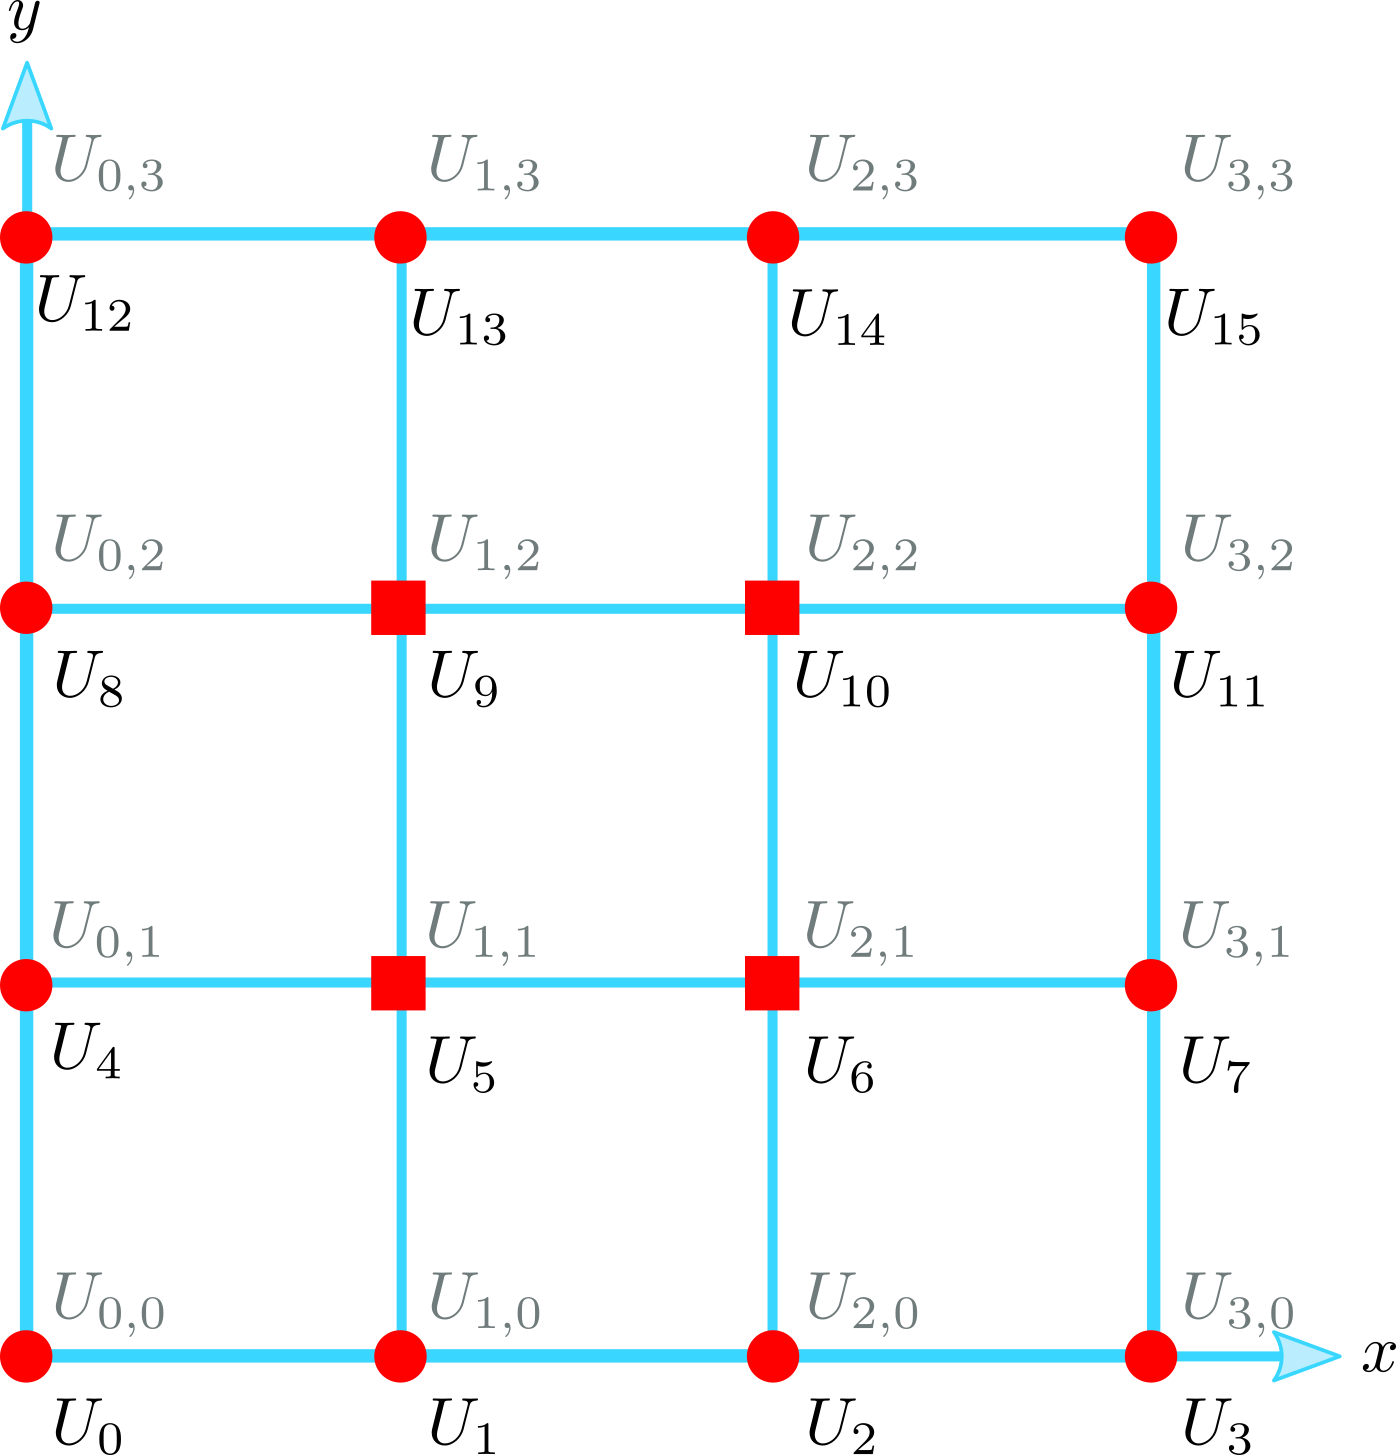

In [3]:
fdm_grid_2 = "iVBORw0KGgoAAAANSUhEUgAABXQAAAWvCAYAAAAPDHkuAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAABi1AAAYtQB0eQKBAAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAACAASURBVHic7N15nFxVmf/x73Nr6c4CSQhhD8gStihBESSgGBBxm8FlbFSURR2jLCEdtiRdjd6ZdHcSCHSHgPiL47gMM45GHUV/LuOGiqyC+NMIARcEZIcsJKHTVXWf3x/VlVRXV6e7uut2J92f9+uVF31P3XPPk/jy9K3nnvscafAOk3SzpL9K6pL0nKRvSzptCNeUpDpJp0rab4jXAQAAAAAAAABIukDSVkkvSFotqUnSvZJcUiRp4SCv+zpJT3Rfp1PSGUOOFAAAAAAAAADGsPMl5SWtkTS5pH0fFZK5xaTumYO49l3d/Yt/PjukSAEAAAAAAABgDHuDpJykb0oKKnz+nHYkY39a5bWndl+7NKHbNOhIAQAAAAAAAGAMq5P0B0l/k7RHhc9NhTIJxWRsl6RkFdd/t3omc13SiUOIFwAAAAAAAADGrEtUSLJ+sI/PX63eCdmpVVx/RVnfjZISgw0WAAAAAAAAAMaqtKTHJT2syqUWJOkK9UzIdqq6Fbr3lfX/3mCDBQAAAAAAAICx7L0qJFkv3sk55Rua/biK609W7/q5Vw4qUgAAAAAAAAAY476hQk3cvfv4/FWSIvVMyF5YxfXPFvVzAQAAAAAAAGDIEpJekvSDnZxzjXomYzer8sZpfWkv679B1M8FAAAAAAAAgKpNlvSspPf38blJelQ9E7K3VjnGg6J+LgAAAAAAAADE7lT1Lpfwjir67y0pL+rnAgAAAAAAAEDsVqtnMvY5Sakq+v+TeieEX1/jGAEAAAAAAABgzEtJelE9k7E3VnmNVaJ+LgAAAAAAAADE7q3qvbr2jVVe4/eifi4AAAAAAAAAxO4W9S63UM3q2mmSIlE/FwAAAAAAAABiZZKeUs9k7FeqvEaDqJ8LAAAAAAAAALE7Vr2TsedUeY2bRf1cAAAAAAAAAIjdXPVO6O5b5TX+WNb/u7UMEAAAAAAAAABGk2AIfU8uO/6bpGer6L+vpKPL2n4xhHgAAAAAAAAAYFQbSkL30LLje6vsP0eFOrylbh9sMAAAAAAAAAAw2g0loVteXuEvVfY/vex4o6TfDj4cAAAAAAAAABjdhpLQHVd2/EKV/eeUHf9KUn7Q0QAAAAAAAADAKDeUhO7zZcdbquj7eklHlbVRPxcAAAAAAAAAdmIoCd0/lR3vPcB+SUnXV2i/fQixAAAAAAAAAAB24lxJXvLnSwPs11HWzyVtkJSofYgAAAAAAAAAAKlQQ/ev2pGUfV696+qWW6TeyVyX9N34wgQAAAAAAAAASNKZkrZpR2J2lSSrcN6+kr7Wfc5t6p3QvWI4ggUAAAAAAACAse5dKqzOLSZnfyrpQklnSfqopC+rsGHaBklzJX1MvRO6rx/uoAEAAAAAAABgrNpb0mckPSwpUs9k7WOSlknar/vcW8s+f0nUzwUAAAAAAACAETFF0kxJx0maVvZZUtKL6pnQ/fdhjQ4AAAAAAAAAMCBnqne5hbeOaEQAAAAAAAAAgIr+TT2TuX9VYdUuAAAAAAAAAKDG9pH0ORUSsU9KWlhl31fUM6F7YY3jAwAAAAAAAABImiTpL+pdMuG0AfYPy/r9UWyGBgAAAAAAAACxuFq9k7ku6bwB9D1I0qaSPl2STo4nTAAAAAAAAADAbaqc0J05gL7/U9anmlINAAAAAAAAAIAq/Uy9k7k3DaDfB8v63CopiClGAAAAAAAAAICkL6qQkP27pLslzZNk/fR5i6RO7Ujm/reomwsAAAAAAAAAsXunCknZVQM8/1xJm7v7RJLaJSXjCQ0AAAAAAAAAUK5YR/fT6js5e7Ckz2vHqtwXJL17WKIDAAAAAAAAAGw3QdJ3VEjU/lnSDSqsxP1HSXMlfVVSV/fnmyW1Spo8IpECAAAAAAAAACQVVtz+UNIW9dzwbKOk70n6Z0lTRyw6AAAAAAAAABiF+tvUrD8pSfupsHL375JeHnJEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABg9JrzV68/4c8+aaTjAAAAAAAAAIDdVTAcg7zhj/7WbZ16Lt2l52c/5JcOx5gAAAAAAAAAMNrYcAxy8kP+oEmzug+31EXa7/aZtnk4xgYAAAAAAACA0SL2FbpvXOezSpK5kjShM9A/xT0uAAAAAAAAAIw2sSd0o0jnl7eZ6by4xwUAAAAAAACA0SbWkgtzfu7JbfvpCUn7lX0UJSIdesdMezzO8QEAAAAAAABgNIl1hW7XvnqbeidzJSnIBfpInGMDAAAAAAAAwGgTb8mFoO/SCoF0QaxjAwAAAAAAAMAoE1tC94Q/+yR3nV08Tpu0T3LH5y4defJaf0Nc4wMAAAAAAADAaBNbQreuS+dIGlc8nlkvva6+5zlG2QUAAAAAAAAAGLD4Si64zi89PL5eOm6clOi5Ddu573jU62KLAQAAAAAAAABGkVgSuic/5K9y06nF48kJ6ZC0NCGQjkj3OHWvDVm9M44YAAAAAAAAAGC0iSWhG0gXStq+Fve4+h0Hs8aVnWx9b5wGAAAAAAAAANih9gldd3PvWRu3NIl7dFoa33PUd52wzveueRwAAAAAAAAAMMrUPKH7hkd0qkyHF48PSkl7J3Z8njDp2J5Vc9PpvD5Q6zgAAAAAAAAAYLSpeULXot6boZU7vrzsgnr2AQAAAAAAAAD0VtOE7py/er2ZGorHCZOOrZDQnZ6Sppas2pXppNnr/OhaxgIAAAAAAAAAo01NE7qdr+jdck0uHh+Vlib0McJxZYlei9gcDQAAAAAAAAB2pqYJXbOeSdlZvUsrbHf8OMlKjl26oME90WcHAAAAAAAAABjjapbQPeVPvo+ks4rH4wNpRrrv8ycnpIN7fn7g39fpzbWKBwAAAAAAAABGm5oldKMufVhSqnh8XH2hhu7OlG+Y5s7maAAAAAAAAADQl5oldC3omYydVWEztHIz66VUz6Tv++es9Ym1igkAAAAAAAAARpOaJHRPXesz5Tq+eDwtIR2Q2lmPgjqTjq7r0TShy/TeWsQEAAAAAAAAAKNNTRK6UaALS493thlauV7nlm2sBgAAAAAAAAAoGHpC1z2Q9KHioalQP3egjkhLE0uicOktJ/7epw85LgAAAAAAAAAYZYac0J29TmdJOrB4fFhampQYeP8KCeAgmdSHhxoXAAAAAAAAAIw2NVihW/1maOVeV152oeyaAAAAAAAAAIAhJnTf8KjvKendxeO0SccMIqE7LSntV7qJmumYUx/21w8lNgAAAAAAAAAYbYaU0A2yapA0vnh8bH0hqTsY5St7887maAAAAAAAAABQamglF6xn0nVW3eAvNateCkqSwSZ9eOZaTw/+igAAAAAAAAAwugw6oXvKH/0QSW8qHu8ZSIcOIaE7IZAO75m+nTopoXcM/ooAAAAAAAAAMLoMOqHr0vml/WeNkwZZbWG748vKLkSUXQAAAAAAAACA7QZfcsH04dLD4waxGVq5o+ul+pKITPrHkx7yqUO/MgAAAAAAAADs/gaV0J39kJ8i6aji8YFJaZ/k0INJSprZs2xDOjCdM/QrAwAAAAAAAMDub3ArdMtKIcwaV5NYKl/LdX7trg4AAAAAAAAAu6+qE7oz13papobiccKkV9eg3ELRwSlpr8SOY5NOnr3Oj67dCAAAAAAAAACwe6o6oTspobMlba9rO6NOmjD4Sry9mHqv0vV8z3q9AAAAAAAAADAWVZ2K9bISCMfX9XXm4B1fX0jsFpnpPLnXMG0MAAAAAAAAALufqpKkb3rUp0l6e/F4XCAdGUNCd3KiUHqhxCEnP6zTaj8SAAAAAAAAAOw+qkro5vI6V9L2VOtr6gs1dONQYaM1NkcDAAAAAAAAMKZVldA113mlx7NquBlauVfXl2SOJZnUMGetT4xvRAAAAAAAAADYtQ04ofuGtX6sSycUj6cmpQNTO+sxNHUmHdUzYTyxM6F3xzciAAAAAAAAAOzaBpzQTSR0Qelx+cZlcShfAVy+QhgAAAAAAAAAxpKBJXTdA3edWzw0ScfFWG6h6Ii0tEfPCN/6hkf9oPhHBgAAAAAAAIBdz4ASuqc8rDMlbU+kviotTU7EFtN2gRVq6fZoyu5ILAMAAAAAAADAWDKghG40jJuhlTu+vOyC9Sz9AAAAAAAAAABjRb8J3TlrfaKZ3lM8Tpk0cxgTuvulpP2SPZqOPfmP/rrhiwAAAAAAAAAAdg39JnS7EmqQNLF4fEydlI57N7Qyx43reWwBm6MBAAAAAAAAGHv6TeiWl1s4flxfZ8ZnVn2hnu52rnNP+I2nhj8SAAAAAAAAABg5O03ovnGtH2zSm4vHewTSYen4gyo3MZAO75m+3Sc1QW8f/kgAAAAAAAAAYOTsNKGbS+i80nNmjZOGudrCdrPKyy6IsgsAAAAAAAAAxpadJnTN9ZHS4+OGcTO0csfUS/U9o333SQ/51BEKBwAAAAAAAACGXZ8J3VP/6CdLOrp4fEBK2jc5LDFVlJR0bF2PpnRCev/IRAMAAAAAAAAAw6/PhG4+KNsMbQRX5xbN6h3D+SMQBgAAAAAAAACMiIoJ3ZlrPR24ztl+kkkzd4GE7iFpaUqiR9Mppz7sR41QOAAAAAAAAAAwrComdPcI9A8u7V08PjItTdxptd3hYeq9OVrkOndEggEAAAAAAACAYVYxTWvWs9xCeRJ1JM2qKyR2S1wgd6t8NgAAAAAAAACMHr0Suic95FPlekfxuD6QjkoPb1A7s1dSOijVo+mQUx7Sm0YoHAAAAAAAAAAYNr0SugnpQ5LqisevqZMSg1z/mnepM5LW56UX8tKzucLPmyOpywcds44vWzHs0gWDvxoAAAAAAAAA7B6SFdrOLz0YSLmFVyLpqZz0dFZ6JidtyBf+bI6kneVt0yZNTkiTAmlaUto/Vfizd6JXWYUeXl0n/UBSrthgev/sJ/zSu6bbK/1HCwAAAAAAAAC7px4J3ZMf8WOU14nF46m9yxtIKqy8fTwr/alLenSb9Fxu54nbvnR5oe9zkh7t2tE+IZAOS0tHpKUZdYXjUvWBdFSdtHbb9qY9tVnvkfTVQYQBAAAAAAAAALuFHgldy5dthla2AdnzOenBTunBVwqrb+OyJZJ+31n4Yyokd4+rl46tL6zqlQorh0sSupLrPJHQBQAAAAAAADCK7cjXugenrNNj7ppe/KBxb2mPoJBYvXNroQbuAOUlRZIqrO/t5RVJAyjsII0LpBPHSSePl+pNuv6FQvK3OGbSNf1Xx9rTA44SAAAAAAAAAHYj2xO6s9f6WxToJ8Xj6Snp1fXSr7dIm3a+Gtdl+p0i/ULSAyY9sG2r1qUn6EFJx/YXgEc62SM9FqT0Wne9zqSTJZ0uaWJffZKSXju+ULv3D509PrrqrmNsRX9jAgAAAAAAAMDuaEfJhaDnZmhPZqUnsn32y0r6kUvfyEf60X0z7ZnyE2Y/NPCquve8xp6V9MPuP5q51tOTEzo1ivRumT4kaZ/S83OS7tta8VLnSyKhCwAAAAAAAGBUMkk67nc+YUJaz2gnq2K7rZN0U1eg/77/KHthZyfOfsjXaoArdO+eaff09fmcn3uya1+9zU2fkvQu9Szr24tFeu2dM+3B/sYFAAAAAAAAgN1NUpImpvQ+33ky99duuvbuo/Q9mcW4HVpvt59uOUn/V9L/PXWtz/RAV7r0EZVt6FbkhZXGJHQBAAAAAAAAjDqBJLn1LLewneshl86+6xh7491H223Dncwt9+uZtvbOY+yjUaRZbvp+H6edO+fnXjHZCwAAAAAAAAC7s6D7v7PL2jebaX7dszru7mPsu8MdVH/umWl/vPtoe5dM75D0eNnH+27dT4eNRFwAAAAAAAAAEKdiQvdnJW0/y5uOu/Nou7G73MEu666j7YdRUq+R6QvbG11/nprU30YwLAAAAAAAAACIRaE0wUR9wF7W+yW9dOcx+r7MfGTDGrh7ZtgmSf98ykP+BUmvTqT07R/MsG0jHRcAAAAAAAAA1JrFdeHZD/laScf2d55HOvnumXZPXHEAAAAAAAAAwGgR9H8KAAAAAAAAAGBXQEIXAAAAAAAAAHYTyZEOIG4NDQ2Jgw4//BBJytXXd+U6O7dI0r719VvCMOzqq8/ehx++pyTVBUG9RdE4SZpUX/94GIYD2ihu3uLF05LuexTH3NM9Wr58+cby88IwDJ7t7JwkSfXSlGwy6c+uW/f4mjVr8oP7GwPA2DBv3ry65IQJB0pStr6+M9/Z+Yok7Vtf/3Jfc/XcuXNTib32mihJ9YnEeOXzdS5FkwvzezSQcRubmva3KBpXHHOPKMpde+21L5efF4Zh8tnOzj3q6+tNnZ2Tg0Qiv0cq9cRAxwGAse7iMJxY19m5jyRFQbClK4q6JOmWZcs2SKq450cYhvXPdnaOk6RxicREz+dTlkhkb2htfWKg485fuPDgwCxZHDNfX79tdRhuLT9v3rx5dbkJE8YnzZLF+/5VYfjkoP6yADCGXBGGe0ednXtKUpfZxsg9StbX51eF4aa++lx55ZUTtiSTaUlKJJOTU7mc5cxeXrV06fMDGTMMw+TGzs6DJSmor9+0tbMz31deaG4Yjk90dtYV80FBff2m68PwhcH9bYF4jPoauo1NTZ+T2Sf7OW2DSe7SJO1k1bKZLW9vaVnU35jzwvCgRDb7Z0npvsZTIZk+seI40uL21tZl/Y0DAGNZYybzPUnv2skpboX5Vi5N2enFzC7taGm5ub8xF2Qyr3fpXlX+/ekmbXCpTtL4igG5n7eyre3W/sYBAEiNmcwjkmbs5JScSS+7lJC0586uZWZvbW9p+Ul/Yy5oajrXzf6zj4/zJm2KpHEm1Vc6wYPgpJVLltzX3zgAMFYNIF8iSdtM2rqz++puuXwqNXVnieCixqamm2R2ST/j7aHKCx+3Tk6lJg10gR8wHEb9Cl1JnZKeViF5ukcf50yu+Ii/oHijuNmluwc0Yi5XJ+lZSQeqcoJ48k56PxdJdw5oHAAY2zarMNdOlDShwufWTyK3y6QtkjZ4Pv/AQAbMS+lAekbS/lWPZ/Z4FEUDGgcAIElaL+l5l/boI4Ga7Geef8W6vwsE7o8OZEA3M0kvSNq7wscJl6b0sSImb9I6SyT+PJBxAGDMKuRLHjNp2k4SqHXdydy+vGxSzqX7pxa+E/TLC/f+m1V5Yd3Oxtsm6cckc7GrGfUrdMtdHIYT67Zte60Hwf+RdEyFU37vZk2pZPLeTU89tX716tXZwY4VhmH6xVxuekKapShaJLMTy07JSvqGzL6VcL/v5eeff2oo4wHAWNYYhpO9q+tEM/uyKidc74jcw1Q6/bvH165dP5TSNmEY1q/P5Q5RFJ0os4xJR5edslXSf5l0m6QHnnzkkWcopQMAQ3NlGO6Ty+VOk/utqvTF2/1bgdl1nko90h6G69VHWYaBuDgMJ9bl84e4+xy5Z9T798qLkr7s7j9MpdO/WxGGzw9lPAAYq8IwDF7I5Q5JRtG5MmupcEoks+X5fP5W1dU9OZDVuDtzyeLFU9NBcGgkvVfS5RUeGP7JpC94FP2iLor+WKl0JrArGHMJ3aLG5uavyf2c8nDyZjNWtbTU/Mn6vHnz6pJ77vmA7/g3eULuZ3e0tT1Y67EAYCxrbG6+U+6zy5o3K5Wa3hGGG2o93kWLFk2pSyQekrRvd9PvLZ9/T/uyZX+p9VgAAFljJvOceq+gffTvjzxyTBwPzy5rbp4RuK+VlOpu+nEilTqXeooAUDtXLF58dD4IHqrw0X90tLaeH8eYjZnMhyVtL4fm7u1T0ulFfe23BOxK+qwXO+pF0RsrtN4fRzJXklatWrUtcv9R92HW3f+BZC4A1NaCBQvGyf2E8naXfhxHMleSblm2bL3cf9V9uNGkd5DMBYB4NDY3H60K5RDM7FtxvQlxY0vLo5KKSYY/bU2l3kMyFwBqK29WKUcjk9bENWY6m72tdJyVbW2Xk8zF7mJMJnQva26eIbMDyttd+t9YBzYbJ0kmfXtlW9v/i3UsABiDfMKE2aqwwUIwTPO7pC+0t7b+PdaxAGAMM/c3V2qP/T5eKt7HX786DLfGPBYAjDkWBJXm91wqm709rjFfSSR2lFsIgiVxjQPEYUwmdE06reIH7r+MdVyzWZLkZv8V5zgAMIZVnN9zURTr/C7pOEmKgoD5HQBi5JXn+a6tyeTANi8ehKuvvnoPSYdK6lIq9fW4xgGAsazi/O5+/7XXXvtyXGMmE4lZ3T/+rn3Jkt/HNQ4QBxK6O+Sy6fSv4xrz4jCcKPfXS8omOzt/HNc4ADCWuXul+f35VUuXVqrHVRPzmpsPlzTdpWduXLLkgbjGAQBIqnAfb9Jv4lw125lOv0mFXdjvbg/Dl+IaBwDGqsZFi14l94PL2y0IYl2U4dKcwkD2/TjHAeIwJhO6qvyq1gOfDcPNcQ1Zl8u9UVJKZveuWLFiS1zjAMBYNW/evDqTTi5vN+mXinHn8UQUnV4YyG6PcxwAGOsua26eIenA8nY3+0Wc4wbuxXn+53GOAwBjVhDMqdTsURTr/C7pDEky6faYxwFqbswldBcsWnSYpEPK2y3mG0Ev3ggyUQBALJITJ56s7hqHpeL+ou9BwPwOAMPAiiupysT9hd8k5nkAiJNZpUV3eQ3TW9SJzs7YxgHiMuYSuj5ST366E7o8+QGAeLjZnIrtcX/R3/HWx+1xjgMAY10fG6Ll6nK5O+Mac+HChZNcOl7SNtuy5Z64xgGAMW5OhbbfdYThhrgG5C1q7O7GXEJXlXdOjPXJz8KFCyfJ7HWSuhKdnXfFNQ4AjGVe+cn+S1PS6T/ENeYVixcfrcLrv0+vbGlZF9c4AABJlb/wPxDnhjldyeQcSQlJd7W3t78S1zgAMFbNX7jwYEmvKm93d96iBnZi7CV0Kz/Zj/XJT1cyeZoKN4I8+QGAGPRVP1fSr8IwjOIaN59IcCMIAMOgr/q5w1Y2zf32OMcBgLHKEokzKrbHvCGaqJ+L3dyYSuj2VT9XhQ1zYlPcOZGJAgDiEey55xtUoX6uYp7fxfwOAMMiiKJKizIk91/FOnCxnE8QxL0xDwCMTZXfsvNsPh/b/L5w4cJJkl4r3qLGbmxMJXSVTFa+EYz5yb66n/zkebIPAHGZU6kxivcLuBXf+rAouj3GcQAAleukR55KxfaF/5LFi6dKeo1LnZOTybvjGgcAxrg5Fdr+cPPSpS/GNSBvUWM0GFMJXa9cbsETyeQdcY25IAz3knScpK7OdJonPwAQA5Mqze+bnn744QfjGnPBNde8WtK+kp6+YenSR+IaBwAgyexN5U0ec9m0ZGEz5UDSXWEYdsY1DgCMVZdnMtNVoX6uSbEuuovYtB6jwJhK6KqPJz/Xh+ELsY2Yzb5ZhX/nu1eH4dbYxgGAMSoMw7Qq1M916Y41a9bk4xo3iqJi/dyfxTUGAECa19x8uNwPLm+P+wu/sWEOAMQqv2Oe7SGKuWyamZ3ePf7tcY4DxGnMJHS7n/z0rp/rHm/9XJ78AECs1mezJ0ka3+uDmOd3Y6McABgWiT7q59owfeEX9/EAEAvro35unPfxvEWN0WLMJHT7evLjcdfP7b4RNL7wA0AsrHI5HSVinN/DMAyKr/9SPxcAYhYElcumpVK/jmvIK8NwH5eOcalzSip1b1zjAMAY12t+d2ndyra2Z+Ma0HO5OZICmd3DW9TYnY2ZhG4fT35k7rHVz70yDPeRNFPSNn/lFTZSAIA4VJ7ft+6ZSj0Q15Cb8vlZkqbK/an2Zcv+FNc4AABJlR/crV0Rhs/FNWS+q+sMSWbSndTPBYDauzQMD5B0eHm7uVNOBxiAMZPQVYX6uS493NHW9nRcA+a7uuZIMpnd3d7e/kpc4wDAWBWGYVIV6udK+nUYhl1xjev5/BmSZEFA/VwAiFHjokWvUuWyabF+4fdiuQXesgOAWCSz2YpvUcddTsclEroYFcZEQndeGB4k6bDy9rgnioi6WwAQqw3btp0oaY/ydo/7RrB7fo+Y3wEgVpZIjEj9XHV/4adsGgDEwyqUW5AkM/tVXGN2v0V9rKSurckkb1FjtzYmErqJbLavcgvxLuXnyQ8AxMoq11VUEEWxze8NDQ0JSadKJHQBIG5RH1/4s+l0bGXTul8DniFpa27zZurnAkAMvPL8/ucbWlufiGvM7W9RS3dTPxe7uzGR0B2JJz+NTU37SzrKpU7bsuWeuMYBgLGs0hd9lzon1dXdF9eYBx155AmSJkt6YlVLy5/jGgcA0Od9/LqbwvCpuMZMFOrnStKdq1at2hbXOAAwVl0VhvtJOrLCR7Euutv+FrXZz+McBxgOyZEOYDiMxJMfk073wo931aJ+7hVhuHeUzb4pkqab+xSXOmX2lyiVumtVGD451OvXyqVheEAqmz0hkg6VNNncsx4ELwX5/MOpfP6Ba6+99uWRjhHA6BCGYXJDNntKebtJd8e5gU3kfrqZxXIj2NDQkDjgyCMvMbOnOlpavlHr6w9F46JFr/JE4gSTpst9kkudJr0o97XW2fkgteIB1Nq8MDxI2WyvsmmK+Qu/dX/h9xqMMzcMx4/r6jrVguAId58m91cUBC+5+0O+adP9u1DC2Bqbm4+W+/HmfoAHwR4eRVtMej5IJH63+dln/7B69ersSAcJYHTIdXXNkVmv9rjL6RTfoq7F23zzm5r29SA4IZAOd/dJgRRJ2pB3Xxek0/d3hOGGIQdcA2EYpjdms8e5+6td2teCYJxJGxVFT5v7AzcsXfqoJB/pOFG9UZ/Q7V4p2+vJz3DVVxxqWYf5mcxpJjXls9mzVNhp9+9m9jeT9nfpkEQ2a42ZDqXrhQAAIABJREFUzK8js6U3trR8vybBVykMw+SGrq4LZfZJZbOvd0kmbZT0osymmvskDwJ1BUFXY1PTDy0IVrW3tPxkJGIFMHqsz+dfa9Ke5e2x3wgWn+zXuKzDpc3NhybdPyfpLLmvlTTiCd0wDOs3dnVdIrOPuXRs9233izLbaNK+kibITD5+/Cvzm5u/E7i3t7e28noygJoI+vjCr2H4wt/9zfb2wV5jflPTcRYEGc9mzzazernLpMLdfPHnPffc1tjU9F0FwS0dLS0jssnmRYsWTalLJq+QdJ7cD5YUudkL5r5FZgdIqouiSBOmTVvfmMmsicxW3NjS8uhIxApg9IjM3lxpdvd8PrYHdsW3qCVt81deGVT93DAMg/VdXecGZhe5NNvcTdLLgfSCpMkuTQnMpGw235jJ/MTNPruypeW2Wv49Buqy5uYZgfuiDdns+yRNllmXub8g97xLB8gs4WZqzGQeM+krnfl8xy3Llq0fiVgxOKM+oWvSmys9aghifrIv6QxJ8kGu4ArDMNiQzV4naYEKNV6+ZPl8a/uyZX8qnnNFGO4d5XJXuvu8wP3/NmYyX67L5eYvX758Y03+BgOwYNGiwzZks9+U2fEy+4XcPxJIvyxd/Xx5JjM9MrtI7lfK7Gx3P7uxqem2bVF0IRMGgMGyKKpYTsfNYpvf586dm1J3/dxcEAx5hW4YhsmN27bN9iA4390/Iqm++6MRL4nU2NR0/MZs9ltudoikH8jsGo+iX69sa3u2eM7lixcfmQ+CBSZ90tw/6NIH5mcyXwq2br2EFbsAhsrMKs/zuVxsZdPmL1x4sBfeNNsabdpUdfmeMAyT67PZfzFpkdy3yexb7n5bQvqbSzlJB0bSWYH0IZemyOz9cn9/YybznVwqdXGcpSTKLWhufru73yr3PSStMbNb09nsXSXfJezya645PsrnP+1m75E0N3D/aGNz87LJyWQYhmE0XLECGF36KKfzRMeyZY/FN6id0f3fuwdzn3ppGB6wMZtdY2anuPs9FgQfz0q339TS8tfiOVeF4X7Zrq5PuFmTSW8z97c1ZjI/c/dzS++h4za/qekqc281abPMPp93/3bpWyFz585Njdt77zPMbJmk4136dF0icen8TOZTK1tb1wxXnBiaUZ/QHYknP5dnMtMj6TCXOqekUoNZqWQbcrkvSjpfkrvZP69saflC+UnXh+ELkhZdds01a4Io+omkC7YlEsdeHIZnfDYMNw/xr9Gvq8Jwv2w2e4ekyKU3r2xpqbhaoju52zQ/k7nfiivOzM6uTyTumBeGs1eF4aa4YwUw+vTxwC7WHWvHT516kqSJkp4ovXkbqMampgtlNlvue8vs8A3Z7BEKggmSttku9Du5sbn5GLn/MpL+ngiC192wZMnvKp13w9Klj0i6aEFz88Pu3qHC2rOP+vjxh8+dO/dMXs8FMESVvvD/ZeXy5Y/HNWCQSr3F3SXp19WWQwjDMNiQy/2nSeeY2a1d+XzjzUuXvlh22m8kfeeKMPxMvqvrFpm9v7v93cmurhMua24+YzhWwC5obj7L3b8nszs9m/1IH/+mfsOSJb+V9N75mczNJl0sKSX3azZks9MlfTTuOAGMPvMWL54m6egKH90e57hDefuiMQwnK5v9pUuT5P7Ojra2H1Q677owfEbSksuamu40sx9JSkg6w8zuvjIM37AiDJ8b/N9gYOZnMp826V8krU5s23b5ihUrtpSf032P/qO5Yfir8bncT+Q+W9JeJn1tfnPz5JUtLZ+PO04M3YivAIpbxSc/7k/G+eTHu1fnmnTnYOo4NjY3Xyr38wsX85sqJXNL3bhkyf0y+4QkyezEdFfXf1QfdfW6crl2SftL+o2595uUXdna+k1J3ykeu3RskM12xBgigFGqoaEh4dIbe31gdl+cO9Z6EJze/ePgXo0trDabK7N3SJoo9x/I7GJLpQ6QtEvU2er2eUl7mHRP1r3fB4TtLS03mnR/SdNpE6ZNa44vPACjXfersTPK22tR13Zn3P307h+qHmdjNvsvcj9H0rXtLS3nVUjmbnd9GL4wOZ3+gKSvbm80OyiQfrJw4cJJ1Uc+cGEYpj2KvigpkPtdURD0u1It2Lr1SknPlzRduKCp6dzYggQwagVBMEeFt5B7co+3LGZ3/VwNIqHr2WyrpMMl/TYw6/ct4xvb2n7q0ldKml6Vy2ZXVztutRqbm48x6TOSNrr0+02bNnXt7PzVYbg1MLuopMnM/abLmpt7/f7FrmdUJ3SvDMN9VOHJjwXB7XGOu32icK96nKvCcD+5t3YfbrN0OhxIv46Wlm+49FtJktl75mcyp1U7djXmheGe5r59RYHM7r6sqenV/fVz92+VHpv0kUsWL54aS5AARq0DZ8yYJWlyhY+GZSOFwczvkpTctu3Src8/n+5obR3f0dp6REdbW0NHS8st7WH4Ui3jHIr5zc1Hyf3U7sMLku73dSdWdsbd/X96NEiXNjQ0JOKJEsCoZzanYnPMX/i7H7wpqrJs2oJFi45w6WqZ/WJyKrV4IH3CMIzyqdSnJP19e6P7wZ3J5LJqxq7W+lzu7d31cU3S1YkguCMMw/qd9Wlvb39FZj1WpLnZ/DjjBDA6mXvFcjpREMT6FrW636K2LVvuqaZvQ0NDwqQLug/fGkl3NC5efOpOO0mS2bfKWs6+tLn50GrGrlZ3nIGkSSatGj9t2pf769P9Jt6fSprSFkUX9XU+dh2jOqGbz2Znq8KTnyjGL/zdq8beJg2ufm42m10gaY/uw/+t8kv+t4s/mNm/Vjt2NVL5/KHq+XpwXcLsA/12NHus/FJp6dgahgZgLAiC2ZWa49wQbV4Y7qnu+rmJQdZHX7FixZbdoAxBjyfyLk3xIDi731695/e9Djz88Ok1jAvAWFJ4/bMXi6LY5vkF11zzmu6NwV7eK5X6TVWdk8l/lpR295c2ZrP/ONBu3aXHbixtM+mjjWFY6aFlTQRRVL7y6shNXV0V/71LmftjpccuHadKq+wAYGfMKs03T8dZbsald0mFt6irrZ87/cgjD5A0oaQp4UHQ7xsKHkWPlTVZyv24asauVuR+ZFnTOf09sJMkk/7W49hsVk0DQyxGdULX3SuuGDXpjrjGnD5jxmkm7Sfp6aceeeSuavp2r2TaUYvK/f6+z67A/Z6Sn998xeLFlerS1EQikXhWUs+NEMz6TT6bWa8akVEQcCMIoCp9zO9RLpm8M64xg66u90iqk3Tv9a2tf+vv/N2Vmz1d3mZSn68Nl5zTa37PJZPM7wAGxc0qzfNPty9b9pfYBo2icyTJzL4ThuFOX1Mt5+5vlyST3uvStxubmjIDHtbsf8qa6ryrq/8HaYPXa55XItHvfXxUNs9bIZlbaf9pAKgoDMNA0jHl7XHmaCQpks4pDGTfqLbv5lTqRUk9FmQEUr9zZjAy+2OUz+8vr127tt/FJF6Wp3Ee1u0WRnVCV0FQ/nRCkjZNTibXxTVkJDVIkty/vmbNmnw1fQ884oiTJE0rHrvZH6vpnyg7Px8E/1BN/2pcF4bPyP3TKuzWK5n9Ylsy2W/hbHMvX63lURQ9FEOIAEaxoEJdRUnr4txk0bo3rjH3r8c1xq7gxiVL7pf7zSp+SXf/xt/XrStPNvQSSeXz++a9k8knYggRwBhg7pXm+cFsNjxgXnIfX21fkw7u0RAEcwfat3tVWo965Vb5e0xNTEqnv+HS97sP3cyu62vzyx4x9Z7nH659dABGs5cLGyqOK2+P3O+La8z5TU37mnSapFwymfxmtf1Xh+FWmS2QVHjQ535fVxT1uxeQB8FB5W2RWbzzZi633HfMzVvM/aIB5aV652nI0ewGRnVC19wn9G60tWEYRhVOH7Krr756D5mdI0mB2X9XfYFE4h1lLc9W033PVOppSTv+z2oWW0JXkjra2lrzqdTUVCq1f0dLy5zPhmG/G+e4dErZ8T2rli59vq/zAaASd5/Yq9Hs93GNNy8MD5J0lqTIzEZ1QleSOtraLt2Wz09NpFLTOtraGgZyI2hl87tJPwjDMBdflABGNbNe87xJsc3z8zOZN0o6yqT1uU2b/rfa/m72cs8Gf7mPUysrf9PNvb/a5YMWhmHXytbWd7n7fnW53JT2lparB9i1fJ7/bgzhARjFoiDofQ8vKQiC2OZ3SRdKSkj6+YowfG4wF+hoabk5uW3bXrlU6sCOtraTdrbpZVH5vbGkdStbWh4ZzPgDtXL58senpFIzA+ng/KZNU9vb2vrNS10VhvtJOqy0LTBjft8NjMQS8GHjxdWjPRp71n6qpa5kslHSVJn94oaWlrurvkBZrbAoil6opnsYhrnGTOYFSft2X+/4qmOoUvdquAGtiAvDsH5DNvu+0rZAujaWwACMbkGQk5e95Rnj/J7IZq+RVGdmt97Q0jImVp3esmxZvzv4Fs1vatpX0ltKmiJJK2oeFICxpNd9vLv/Na7BzKxF7oqkjlWrVm2rtr9L/2rS59VdhsCk66q7gE8qa9lQbQzVWtnWNuDFI/OvueYNiqLDS5pezqZSt8QQFoBRLHLPVXqXP8jnH4tjvHlhuKdls1d1j718KNdasWLFFklbBnJuQ0NDwtw/WPptxc2u0zCUqelewDjg7yvZbLa8HvCDk5LJqh9sYviN6hW6cn+mQltVSdKBumjRoilWWIavyL1pUBdx71HzNuG+dRBX6Sz5edK8xYun9XnmMFvf1TVP0t7bG9y/0d7a2u9rvABQzirM7x7T/L5g0aIjVKhvns1JYRxj7O5MykhKF4/dfWV7a2usr0YDGPV6z/NBEMs8P7+p6W0q7Lr+Ql022z6Ya6xsaflCEAQnuDRP7q9vb23td2fxogWZzIGSeiZ03Xel111NURSWNrjZVTeF4VMjFA+A3VR9Nts7RyOpU4rlrd1kNnuFpKmSfnJjW9tP4xijkgOOOupClw4tafrJlGTyi8M1/kA1huFkuS8oHrvU6UEwN6632lFbo3qFriqULDCzWJ6I1CUSK1yaIum7N7a2Vr0pz4IFC8a52YGlbfn6+sG8qtpjRUFCOkIxTY7VmJ/JnGbSkpKmn21Npy8YsYAA7Nbc/RlZz+f7cczvYRgG67PZVSal5H7LqtbWP9d6jN3dgqamc9zs0uKxm/33U488ctVIxgRgVHhGUo+N0QIvfzVj6OaG4fggm73BVVile+2111ZXKqHEDUuW/FbSb6vuaHZW2Vsn+Xw6/cPBxlFrCzKZxS69vXhsUktHS8v/GcmYAOyeli9fvrExk3lFFero1tr85uaj3P0KFd6aGPBGlUPV2NT0OrmXPhy8V6lUw66WJA3DML2hq+vLMjtIKiRzzexDHUuWxFbPGLU1qhO6Lv2mfDm/F57O1NT8TOYDkj5m0vool7u03w4V+Lhxk1W2k2B9pZIR/euxI68nEiO6Qnfu3Lmpcfvs8zFzv0GF3eHz7n7jlHR6UUeVuwcDQJEFwf3l3+vjmN83ZrNXW+FL7F/q8vnFtb7+7mxuGI6fkM1e5lKLJHOpM5CWdLS0LBW7ngMYou77+DN7NJrt3cfpgzY+m73ZpWNl9qsn1627qdbXHwiXPlHW9PVVYfjkSMRS6pLFi6emzD7j0jxJMml95N7Y0db2lZGODcBuzOw3cn9TaVNd4T6+37q0AxWGYf36bParkiaY2XXtLS2xvznW0NCQOGDGjA/J7CZJe6iQSP63LalU4+owHMzb17GZ39x81IZsdpXM3trd9EhCumBQpUMxYkZ1QveVF164ffy0aRskTS5prrRj7qDNW7z4WJP+TZJHZheuXL788cFcx6JogicSPdqiQSR0TdpW+i06iKLxg4lnMObNm1cXTJp0vtz3DaR9I+kIk06U+1QV/i5fC4Jg6UB20QWAncnl899LBEFehQ0OJEnmXtMdwRcsXvxmL7xZkDXpQ8uXL99Yy+vvThYuXDhpWyp1rrtPk7S/SUcomz3JpT1d6jTpi0E+v7x92bI/jXSsAEYHi6LbFASLStu8xvfxC5qbP+ruF0p6KXD/8IB2Aq+xBc3Nb/ee+2i8nJCG/QHi5ZnM9Lz0XjPby9wPcukoSSeosIpuo5mtjqLo+mrq7gJAJRZF33GzHgndyGyGpJptGLah8IbdayXdu+W552q+OrehoSFx4IwZ55nZAe6+n5kd6tJJkvaRFMn9tsBs6Q2trSOeIF2QybzepdNktrfcD5I0S+4zVfge9ZiZdeQ2bvxcxyDqx2NkjeoauqtXr866VF6j9YTGMJxcsUOV5i1efGwQBD+VNNHNbljZ0nLbYK9lqdSE8ratnZ1V31S6WWePY2nYErqaOnWa3C8y6aMuvdOkI9XzocH++Xz+rEsWL675KjoAY8uqpUufl/SzHo1mcxoaGhKVe1RnfibzRg+C76owh1091uvBZtPpw+T+KZMuMOkskw5Xz3uIgz2ZfNvFYVhx52IAqNbkurp7JD3Wo9H9LRVPHoTGTOZD7r5aUt6kC29obR32DS/nheGe7n5zSVPepY9f39r6t+GOJTI7waS5cj/PpdMlTS/52DyKZpjZmXPnzk0Nd2wARpdsEHxLZYvXvOfmukNhjZlMu6R/lvSi5fMfWr16dbZG197usMMOmyjpYpc+LrN3uXSsScX50d1sn7x05lVhuF+tx66Wu79Lhfn9A5JOVWE1dNT9YTpyn5WYNOnUEQwRg1Rpg8GamP2Qr5V0bH/neaST755p98QVR+OiRa/yROIhk+qLbeZ+ZXtb2/VDue78pqbjzOzHkvYx6Qvtra2f0BBeMb08kzk5ku4qbduWz+9VzS7jktSYyfxK0huLxyZd0t7a+tnBxlUL85ubj1IUfdLMLlFh05wtMlsxOZlsCym7AGCQ5l9zzYkWRfeo5HeZuX+gva3t60O57uVNTadHZrdJmiizJR0tLZ8eaqwD0ZjJvKAdZSMe6mht7fd36EhrbGo6XmbzJF0oKTBpvZt9ZnIyefOuVicMwO5nQVPTuW72nyVNHgTBCd21agdtflPT+Wb27yr8/riwo7X1P4YU6CA1ZjJfkXRe96G72SdXtrR8fiRiqaShoSFxwJFHzjbpakn/KElyf1JBsKCjpeUbIxsdgN3Z/EzmZpMuLml6Lrlt22ErVqzYMthrhmEYbOjqulFml5i03oLgLUP9fVGtBYsWHebJ5Me6Nxobr8IeR6ts69ZPt7e3vzKcsezM3DAcPz6Xe7vcPyPpOEmS+31BIvHJ4f43w+CN6hW6ktSxbNljgbSitM3Nrr4yDPcZ7DXnNzd/0szukrSPzL4yKZWaq6HWCwyCXsvbx9fXV7/SzD3V89A7+zp1uKxsaVm3sq3tcpm9TdJmSRPk/pkN2eyvrgjDmtdCAzA2rCwU7O+xi3hk9i9XXnllrzceBqKhoSExP5Npjsz+V9JEl5YNVzJ3d9XR1vZgR2vrx136oKScS1PkfuOGbPZ7g/3fAQCK2tvavmpS6WbDFkXR8jAMB/UdZm4Yjp+fydxiZl+WZHL/xIglc5ub52lHMjeSdPmulMyVpDVr1uRXtrbe0dHaera7F8pfmB0k9zXzM5lbavVWDICxJ4qiUD1r5u6Tr6u7erDXmxeGB23IZn+qwiKyjVEQvG0kEpPty5b9paOlpdmDYI6kl1TYR+hKHz/+vnlheNBwx9OX1WG4taOl5Vv5TZtOMumbkiSzE6Mound+c/PHRzg8DNCoT+hK0pOPPBLKvbQcwj65XO4b1b4aumDRoiMam5q+Y+6fk1Qn9/Dv69Z9rCarkHK5Xk+igkHUODazHn2skEDdJXS0tNzuZpeXNJ2Uz2Z/ypd+AIO1NZW6xKXttalMOjqXTn+p2ldCG5uajj/wqKN+boWauXmZXbqytZVN0AZoZWvrGpktLWl6R66u7tt82QcwRO7u71fP0gtv3ZjLLVOVbxo2NjefMT6b/Y1Jn5L0kpu9t6Ot7d9rGGs1sbynZAf0LSa9v6O1tWMkYhmolW1tyyV9rXhs0qcOnDHj5p10AYA+rVq69HmX3uPS9gVoLjU3Nje/r5rrhGGYXNDc/NFENvs7SXMkPWRBcGr3wo8Rs3LJkvtcmlvSNDORzd5+0aJFU0YsqApWrVq1bUsqdb521C9Omvvn5zc1nT+ScWFgxkRCd82aNfmt6fSHJP14e6P7m9LZ7F0LMpmT+uu/4JprXtOYyXzJE4mHZHa2S8/I7KyOtrZ/qdXmCR4EvRK6nYNI6HpZH5cG/cpCHJ5at+7fTfprSdNxuXT6uhELCMBubXUYbk2mUv8o6YHtjWbvHz9t2s8am5uP6ae7zb/mmjc0NjX9j8we6N5t989yP6WjpYUvqVVKd3VdJ2lTSdOZBx155MKRigfA6NDR1va0m71d0va6su5+VWNT09cXZDIH7qxvGIbJ+U1Nb2tsbv6l3H8q6Ri535OQXjeUvS+GYkEm8265f01SQu5PBkHwpvbW1vI9P3ZJQRR9WqVvJZp9cn4m808jFxGA3dnK1tY7ZPYB7chZBHJf09jc/K/9Lfq68sorJzQ2NV24IZt9yN3/XdJeMvtKctu2E9uXLFkbe/ADsLK19ZuSHixpOrwukbhlpOLpy+ow3Cr30oUZZma3LFi06LARCwoDMupr6JbqrqmSkdlnVLIzuks/N+n7kdkfzex5d59m0v6B+3Eu/YOkw7rP6zTppmwULbt56dIX+xpnMC4Ow4npbPblHo35/KEdy5Y9Vs11GjOZP0iaWTx26U0rW1vvqEmQNdKYySxXoRZXUc7y+aPaly37y0jFBGD3Nm/evLrknnuucOnSkuZI0g9k9iOTHo3MXpT7vpIONPfXyf0fZHZA97mb5L6iK51u/2wYjsibDbtjDd1y85ub/9Pczy1p2qhU6lUdYbhhxIICMCpctGjRlHQi8QWT3lvSvM3N/kfSz0z6c+C+1aV9I2m6zGab+9sl7SVJcn/KzJZsef75L8SxQc5AXNbc/M7A/VuS6mR2VyqZfN91YfjMSMQyWI2ZzH2SXl/StK6jtfUYDbX8HIAx64rFi4/OB8HXJb2mpPl5l75p0i8tip50KTKzAyVNj8zOlDSnZJ+kB+Xe1NHW9oNhD74f85uaFprZspKmmtSCr7XufNR6lSwQdOmLK1tbPzaCYaEfVa8A3Z11l0ZYMr+5+evmfrWkj0hKW2En19MDd8l9e5a75K5kg0v/FaVSS1eF4ZNxxPbZMNzcmMk8LWn/YlvCrH4nXfrS40lWOpX601BjqzWT7i6740tGQdAgafmIBARgt7dq1aptkuY1NjV9UdJimb1PhbdQ3iX3d7kk87KZx0ySnpP0pWwUXVvrB3Vjkvs9kkoTupOsq+udkv5rhCICMEp0bxT8vgXNzWe6+2JJZ0iqM/cPqlDHW8UaaCZJ3XO+SX916XNb0+mbVofh1uGPvKBHMlf6T9uy5RPX7UIb5AyY+z0yK03oHnXZNde87sYlS+4fsZgA7NauX7r04blz554wfu+9P+xmC006WtK07hI5n/Kg8GJ58U6+ZFXivZI6JqdSX9tVN+MN3O9267GO0qIo+qCkXSqh252PWitpVrHNpH8Kw/BTbGS/6xpTCd2ilS0t6yR9/JLFi69OBsEZKtwQHmWFSWNCdx2XJyT9v8js53slkz8LwzD2zcVcethKErrZINhrEJcp3WRsQ1xP/S9rbp4RRNE5MtuWSqVurWYck54uf4QfmJ1Q4xABjEEdbW0PSGpobGraX2ZnunS6mR1m7tMkjXNpq6THXPqdmf1063PP/WqkVmrtqhqbmo6X9G43W1+fy315+fLlG6vo/nR5gxfmdxK6AGqivaXlJ5J+Mq+5+fBAOtPc3yxpugr38WmXXpb7n9zstwqCH3csWXKvRnj16IJM5t3u/nVJCTNrbG9pWbmz8xvDcHJy8+bsUHZ735nLm5pOj4LgdEXRY5PT6Vur/LLea55PRNEJkkjoAhi07vvxL4Vh+JWX8vnXBlH0FrnPdrP9TCpuaP+CpEdldk8k/fDGlpZHhyO2yzOZ6ZH7R1yKlM9/deXy5Y8PtG+l3IdJseQ+GhoaEgfNmPEBD4Kjzf2+9tbW71bT36WnrSShK2nPl7q6jpT0h9pGiloZkwndou7VWGu6/4w4+//s3XmYHFW5+PFv9cxkT0iAsC9h33cQ8CoE3PW6XHdFxR8qrjEJNyJkgneULKhAEsENN8QFBXdFUEFRdgQVZBcJWwiQsCQh68z0+f1xesyk05Ppmemaqu75fp6nnpmudPV5ux44U/XWOe9JkpsJ4YSu100bpt5W5dS2tlG0t3df6C2VUhbTzzrroFAs3kKSjARob28//RNtbYde2Nb2RDXHd4awOtn4KRUBtkghVElD1IK5c5cA3yttqlJp5NtVQFMCrGtu/sTH2toOr7YMRRLCasr6d2B8reOUpAtmz/438G/g61nHsjmfnDXrtSHWzF2fwLvnz5692Rvs0vX8so7hwxcC/1vreKa3tn6kCF8lBEgSnmtvf09bW9vLqx3dlhQKq0PZjJdgPy+pRkp90e3k5CHR9DPO2L0IfyNJtkgAmptnTj/jjCPmn3NOVTOh24cPX93UvvHYkbRyHzvts8/FIYT3EAIBmDZr1rwFs2fPrPb4AqzaZOBdCOZpcmxILIpWNzo7r9jodZLs2ZfDR8WnJ/8R4Lc1iGpTxeIHgZHd9kxsbm9/Z7WHF0KotLJjVclgSVJ6iiF8jG415oG9WtrbX1Pt8QE27d+TZHENQpOkuvOfMgshPEMIx1czWmpkZ+dBxAXT7k0prCndXyRwworYZlUq9vNgPy+pIYVC4b1snIAdF5qb31/t8c2dnZv2mSHUPPfx0TPOmBBCeE9ZOx9va2urOudX7Ko5v/Fn2L/nmAndHFn84IM3E6cRABBC6NOCOKVaM/9R6OxMJ6GbJJVKQVT931IoFHbZ5CPhpgHFJEkasGSA/XshSTbp3ykW7d8lDTnTZs16UyGEnwefYXaJAAAgAElEQVS4J0mSF5VKAvWqEMIxACFJ7ksjroo37H25JwyhvJ8PnUly84CCkqScGui1cejs3DT3kSQ1vzZubm6uFGdTW1tb1SWHEiiPdfH4ESOqLi+hwTekSy7kzeWXX945tbX1mwmcUdp1wmYPKBOS5BXdXv6hmmkAbW1tzc93dHyGEP6HEFaFQmHuwtmzf7XZdorFB8um1C7raGmpuj5igBPKJuSuXtvZmYuyF5LUKGbMmDG6Y9iwOSFJXpXA00mxOGv+vHnXbfagEP4FHN9tz0Mt69b9pto2Q/nfrRCeGD9s2B/6Erck1btps2a9iRB+nMDv17e0vKvasjVtbW2F59vb3wPQUSz2OkJ36syZ2xYKhXNDCEcDD5Akn1owe/Zmj0uS5F+EsF23Hdedf/bZ/6gmvtL7T6B7yYUkub5U/kKSGk5IkgfZuMzMikJn58VVH18onFC2MHNHAj/o7bhpM2ceSpJ8Htgtgb+ElpYZC9ranu/p/euefvrRURMnriMuvAlAkiQXUmUN+dNaW3cuwh4bxQ7fy+tic4pM6OZMsVg8v6lQ+AixFtUeU1tbj1s4Z85fejtuSlvbONrb31R6GYrQVk17y9vbZwBnAZAkJCH8bNqZZx6/YN68G3o6JikWfxCamj4DtBPCvEKSfLva+rkfPeOMCQm8ufu+EEJbaeViSRqyEih0u+Ia8Aya9uHDv5DAx0oP0PYNhcJVn5w169DNLSCRFIvfD4XCB4HnQwhzO0L49oIqF+WZMmvWHoQweeMPTGa0tbV19PtLSFKd6UrmAmsC3De8o2PW9Fmzenx/CCEhXvePfH79+n1JkiOBp0trfWxWkiTfDyG8vPRyL0I4fEpb274XtLWt6PGYEL4f4KUJLApJct745uZvUeUNf6nOevcRXJ0hSWpe51eS8iIUi5clSfJFoDnAF4tJ8s0F8+ZV9RBr+vTpI0MI797o8+Dc8+fMeWxzx5VyO1cB25aO2Yv29p2BV/V0zEUXXdQ+rbX1R8DJJMl1wJfmz579k2riBCgmyQfKEtdLkpaWz1d7vLJhyYWcuWDevKVJkpzW9boA50+ZMmX45o4BKKxf30ZpClWAr39pzpwbq2kvJMlry3Y1JYXC9M0dM/+ccx4MISwEhlMo7P7C0qVPVtMWwLCmptl0q0ET4KoJw4bNr/Z4SWpEM2bMGB1gXLddE9/2trc19XhAFRIo799HFWKN3B7Nnzfvz4TwE2B8oVCY+OV5856ttrmmYvF8uj0oDvCdBXPmXNq3qCWpfk2bOfN1hPAjYBjxendGCOHTm9uA04FTgfeSJEcBkCS9js5ta2sbAZxYtnv7po6OkzZ3XMeKFd8FbgswKcD6tra2tdV8t1Ji4ovd94UQWheeffZfqzlekurRwrlznwowm7hg8H7Nq1ZVX/921KiZwPb/eZ0kNxRWr/5cb4c1dXQcTimZ280rTzvrrEM2e2BnZxvwDCEcUgjh8WrDLA3KmNZt17okSd63uRHBygdH6ObQ/NmzvzOttfVA4LQARzSNHfujU9vaTrqorW11pfdPnzVratjwP+AfiytWTKv0vh4sKd8RYhIgYTNP6ycMG3b68+3tOxDC+0ZtvfV+U1tbT1s4Z871m2knmTZz5izgP8mEAFetaWl5y0JHb0kaIqaceebE5qamroux5mIIY5MQ9uxIkrez8WJkW+64zz7XTZ058+ckycOFJFkJdAA0NTffeW5b29O9NpYkSwhhUtne1wGbfWi3ftiw/zesvX3LEMKnprW2HlYoFGacf/bZd/T0/lNPPbVl1NZbLyRJ3tCt7UueuP/+D/UaoyQ1iOmtra8P8FOgZaCfFapYEK2trW3ttNbWZ4Gtyw5+HfDVno674IIL1k1pa/ufpvb2q5IQLpo+a9ZxoaPjrAXnnPNwT8eURov9ADj0P61A28K5cx29JanhLZwzZ8601tadgVPDqFG3Tp8163/nz579+80dM23WrCkhhNZuu64f3t7+35+fP39Nb+0FWJJU2F/s7Hwt0OM1+YJzznl4amvrmxP4eRGund7a+vmOlpbzNjdr45OzZu2VhPArNgy6eyEkyUkLZs++urc4lb1K/53UxLH3hruBXhf1CkWOufmA5Ja04qhn01pbZwQ4O4ERwMMkyReaOjv/NHb48IeWwdZNHR1HJiFMAbqmWl2crF79sflVdBJdpp911kGhWPwTsFVp13Jgi6aWlonntbUt28yhAMnU1tYpCfwfcXTwncDVAW4khH/R2fl8sVAY09zUdHSIo8KOLB23EmhbMGfOfKqc4iVJjWB6a+sbA/xiQB+SJG9bUMUUqmmzZp1IvEAbXdq1HBi2YM6c0fTS95bqq88ihBnAaEK4JSTJNQW4uTOERUln54rCsGFbUCy+tAhTui3KuTSEMGPh3LmXDOQrSlK9mdrauiSB7Xp/Z+8CTF04Z86XenvftJkz30+SfIMNg3SWA48smDNn86O4gNNPP33supaWLyTwAeKszT8FuK6QJDd3dHY+XigWXwjDhk1MOjtfnsAnSZIdABJYRJKcOt+bfUlDzLSZM08JSTKn1NffTwhXJXBz0tR0b+f69c81FwqjOguFI4CPAC8pHbY6wOcntLTM7UsZsmkzZ36NJPlw6WUAVhLCDxbMnbvZ2XYQR9wWQrgwgVcDqxO4IsCNSbF4ewJPdRaLawuFwm6hUHgT8CG67hWS5Lqko+OUatZiUj6Y0M250hOT0wrwjgATyv89wNoE/pAUi+fNnzfvz/1pY0Zb2zYd7e0vI0naA6xNQvh1AXbprbZLl2ltbePp6HgvIbwdOJrKIxOKwD8S+Onazs6vWjNX0lA07YwzJiVNTa8ECLAqwHqAQpLEPrGzsz00NSUJNBeLxYQkGQ+QwLCk62Krs/Pq+eec81A17U399Kd3oanpuEKSLA8hbEuSfG3xAw8Mv/zyyzurOn7mzG2TJDkZeAdwCBuPIu7SkcCtIUl+tLq5+Vs9zSaRpEY2rbX1tBDCgEfnAoRC4Webq3fe3f+eeea+xaamYwM8ArycEN6yYM6cfapta/oZZ+xJU9PJRXhrAvtQ+f5wDXADcPH4lpYfWxtd0lA1Y8aM0Z3Dh59UhHcm8GK6LULWTQDuSuDnHcXihRfMm7e0P21NbW19SRLC3gFuS5LkggD/XjhnzinVHv/J1tYXF0J4X2kW3fY9vO2ZBP4YkuQrC2bPvrY/cSo7JnTrRFtbW+HZ9ev3p1DYpRDCFkl80vLUuJaWf1Rb+6oa02bNeishXN65YsWICy64YF1fj58yZcrw5nHjDiolDsYlsLoTlnYWi/dXs7iDJCkd02fNmh5COGPBnDnlNbmqMmPGjNHF4cMPCjAxwJgEXkhgaXN7+91f+MIXVtY6XklS30xtbf1qAgcumDPnpf05flpb2/hk3bqDKBS2DDCqmCTLSZKntmxquruW9xuS1AhOPfXUljHbbntgRwjbF0LYgiRZQ2fn0pAkDy6cO/epWrY1rbX1n0mSXDF/9uwz+nP89NbWHZMQ9u5Mki0TGBZCWFZoanpii6ame9va2oq1jFWDxxq6daL0P9ldpS1NhyewqD/JXIh1uYDbahyTJGngDgfu6+/B55577irg5tqFI0mqpST283f29/jSAjjX1S4iSWpcF110UTvw99KWmhkzZozuiDMozu/vZ8yfM2cxsLh2USkPClkHoNw5LsCfsg5CklRbIYSXkiT275LUgD7W1jYGOCwJwX5ekhrI+mHDjgFaCiH8MetYlC8mdPUfp5155t6EcGwxhB9mHYskqXamzZo1GdglwKVZxyJJqr2Wjo6TgLUtHR2/zjoWSVLtFJLk5ARuPG/OnEeyjkX5YskF/UcxSeYAd31p7lyf/EhS40iAuQGuXDh79v1ZByNJqq0ZM2aM7igWZ5Ek37KmuSQ1julnnXVQKBbfVYR3Zx2L8seErgCY1tp6EvCWJEleSVyVUZLUAKbOnHk6IRxVKBQOzToWSVLttQ8ffkECo9qLxdlZxyJJqo3p06ePDMXiJSTJLQtnz/5J1vEof0zoitNmzjyhCN8ghAvnz5lzddbxSJJqY2pr6zsSmBNCOHPB2WffnXU8kqTamjZzZivwfpLkzV+eN++ZrOORJA3cqaee2hJGjboU2C3p6DgSB92pAmvoDnHT2trGF5PklwGuWr1s2f9mHY8kqTamn3HGngl8P8DXF86de27W8UiSamvqzJmvIEnOTpLkfxfMnv2LrOORJNXGqG22aQVeXgjhf+afc86DWcejfHKE7hA3HlYsh5MWP/DAby+//PLOrOORJNXGFiNGPP78+vVvWDh37pVZxyJJqr3mYcP+3tHePnnB7Nl/yToWSVLtdHZ2XlZoarr0/DlzXP9CPUrS+uBj7w13A/v39r5Q5JibD0huSSsOSZIkSZIkSWoUllyQJEmSJEmSpDphQleSJEmSJEmS6oQJXUmSJEmSJEmqEyZ0JUmSJEmSJKlOmNCVJEmSJEmSpDphQleSJEmSJEmS6oQJXUmSJEmSJEmqEyZ0JUmSJEmSJKlOmNCVJEmSJEmSpDphQleSJEmSJEmS6kRzrT8wwH7AYT/+/GkTxz/zNOOWP8vI1atoWb+O1aPHsmrsFizdZgce2X1fHt5jf5ZuvePwm2sdhCSpZgJsBxwD7AvsDWwNjALGA88Bq4GngfuB+4CbE1iWTbSSpJ6EOJjjIOAwYB9gErAlsU9vAlYBzwKPEfv0u4DbEmjPIl5JUt+E2JcfAhxKvG6fBEwARgMJG/r5R4EHgDuBvyXQkUW8kjIUoDnAawN8L8ATAUJfts6ksD7AtQGmBdg26+8jSYIAhweYH+CevvbrAToD/CPAvAD7Z/1dJGkoCzAiwNsD/DTAM/3o01cGuDLABwNskfX3kSRtLMCoACcF+EWA5/rRz68I8OsAJwcYk/X3kZSyAFsG+L8AS/rRYfS0tQf4eYCjs/5+kjTUBGgJ8P4A/6xhvx4C3BrgbcEyP5I0aALsGOD8ft7c97StCXBxiDPyJEkZCrBrgAtLCdla9fMvBPhGgD2z/n6SaizAyACfrXGnUWn7fYADs/6+ktToAiQB3hPg4ZT79XsDvD7r7ytJjSzAhNIN/toU+/POAD8KsEvW31eShpoAE0tJ1/Up9vMdAb4bYPusv6+kGgjw6gAPpXzD331bH+CLAUZk/d0lqREF2DvAnwaxXw8BfhVgp6y/uyQ1mhAfzj01iP35CwFOD7FmoyQpZQE+FPpXPqe/2/IAnwyx/q6kehNindy2EJ/GD+ZNf9d2d4ADsj4PktRIArwlwPMZ9evLArwu63MgSY0gxBl038ioPw8hPhjcIevzIEmNKsC4EGdGZNXP/yG45pFUXwKMD3HRsqw6jq5tRYBXZn0+JKnehVhiYX4O+vVigJlZnw9JqmcBdgpwVw769CcCHJb1+ZCkRhNgjwD/ykE//0hwwWOpPgTYLsSVyrPuOLq2dQHelfV5kaR6FeLCZ9/PQX/efftScME0SeqzAPuWbrCz7se7tuUBTsj6vEhSowhwSKjtQvQD3ZYFOCbr8yJpMwJsEfKVzO3aOgO8NevzI0n1JsSRud/JQT9eafty1udHkupJgJ0DPJqD/rt8Wx3gv7I+P5JU7wLsGeDJHPTr5dvy4IwMKZ8CjAhwfQ46ip62NQGOy/o8SVI9CXBeDvrvzW2fyvocSVI9CLB1gPtz0G/3tC0LsG/W50mS6lWAHQI8nIP+vKdtSYBJWZ8nSWUCfC0HHURv21PBxRckqSoB3p6Dfru3rTPAK7I+V5KUZyHOtvhlDvrs3ra7AozK+nxJUr0J0BTgmhz0471tfw0wPOvzJakk1MdNf9d2TbDuoiRtVojTtZbnoM+uZlsSXEFXknoU4PQc9NXVbt/K+nxJUr0JMDsH/Xe124Ksz5ckIMCEEEe+Zt0p9GX7YNbnTZLyLMCVOeir+7J9L+tzJkl5FOIDujU56Kf7sr066/MmSfUiwIEB1ueg76526wxwbNbnTRryQn2UWijflgXYOutzJ0l5FOCdOein+7oVg6ukS9ImAlyVgz66r9t9AYZlfe4kKe9CLKmT57WMetr+FqAp6/MnDVkB9gjQnoPOoD/bOVmfP0nKmxDrbz2Qgz66P9stWZ8/ScqTACfkoG/u7/aRrM+fJOVdgDfmoL/u73ZS1udPGrICfDMHnUB/txeCo3QlaSMB3pOD/nkgmwukSVJJgKtz0C/3d3skOEpXkjYrwI056K/7u90TXN9IGlTNACEmQ9+bcSwDMfq7p86849hpc57KOhBJyouHX3/APpP+fU/WYfTbP4586U+OveQv/846DknK2gF33jKSdx6zb9ZxDMAuc2d/6/5j33zKc1kHIkl59KLrfz+GU1+1V9ZxDMB+wKuAK7MORBoqmks/30WdPzU//uqf7/D1aXN2yDoOScqD3R68m3pO5gIc/Pcbx221dMlhz0zcPutQJClTJ151WdYhDNjkP/xs0m/efMqkrOOQpDw68feXZx1CLbwPE7rSoOkaEl/39U4mPXQve9/796zDkKRceM0vL8k6hAErdHbyit/+KOswJClThWKRV15xadZhDNjR1/+O8c8tyzoMScqdlvb1nPi7hkjovjHAmKyDkIaKQoAtgaOyDqQWjr7+d1mHIEm5cPQNv886hJp4UYN8D0nqrz0euJOtli7JOowBa+rs4Mibr8k6DEnKnQPuuJkxK5dnHUYtjASOyzoIaagoAMfTIMWrj7j1T1mHIEmZG7f8WfZ44M6sw6iJQ2/7Cy3t67MOQ5Iyc8QtjXN9e3gDfRdJqpVG6ueBE7IOQBoqCsCLsg6iVva/85asQ5CkzO3/z1spFItZh1ETI9auZvd/3ZV1GJKUmf3/eWvWIdTMgXfcnHUIkpQ7jdTPA8dkHYA0VBSAel4xdyNjVi5nq2VPZh2GJGVql0X3Zx1CTe388ANZhyBJmdn1ofuyDqFmdn7kgYZ54ChJtbLrosbp54F9sg5AGioKwN5ZB1FLjZbIkKS+2qXBEqC72q9LGsJ2euRfWYdQM8PXrmHiU49nHYYk5UZL+3q2e+KRrMOopYkBJmQdhDQUFICtsg6ilrZ4/pmsQ5CkTI1rsH6w0b6PJFVr+No1jFyzKuswasprdUnaYOyK5yh0dmYdRq01VI5JyqsCMDbrIGpp1KqVWYcgSZka3WD94KjVjfV9JKlaI1e/kHUINee1uiRt0Ij9PA2WY5LyqgAMzzqIWhq+bk3WIUhSplrWr8s6hJoavtZ+XdLQNHz92qxDqDn7dEnaYNi6xuvngZFZByANBQVgddZB1NKakaOzDkGSMrV25KisQ6iptfbrkoaotSMaqz8HWDvKPl2SuqxrwH4eaKxaQVJOFYCGGuO/erSj+yUNbWtGjck6hJpaNWZc1iFIUiYa8bp2VQN+J0nqr0bs5wFr60iDoBlYAmyfdSC10lTs+AnwVNZxSFJWhq1d+xLgkKzjqJURa164Cfhb1nFI0mBrbxnG2pGjPjBizeoRWcdSK+uGj/oODTZDUJL6a9W4LZLOpuYPN3V2NGUdS40EzMdIgyPApQFCA21bZn1OJSlLAT6cg764ltubsj6nkpSVADfloB+u1fZc1udTkvImwN056J9rtT2a9fmUhooCcG/WQdTQUwk8m3UQkpSxRurXAe7LOgBJylAj9en255K0Kft5SX1WAG7IOogaui7rACQpB24D1mUdRI08AzyQdRCSlCGv1SWpsTVSP3991gFIQ0VXQndt1oHUyJ+yDkCSspbE2oS3Zh1HjVyTQDHrICQpQ410fdtI30WSaqWR+sY/Zh2ANFQUkpjMbYQOJAC/zToIScqJ32QdQI3Yr0sa0hJ4iMaYjvsC8Oesg5CkHLoTeCzrIGpgGXBL1kFIQ0Wh9PN7mUZRG9cl8HDWQUhSTvwA6Mw6iAFaDfws6yAkKQca4Vr9p6UZJJKkbkqz0X6QdRw18KME2rMOQhoquhK6v6D+V539btYBSFJeJLAYuDrrOAbopwmszDoIScqB7wMdWQcxQF6rS1LPvkucdVzP7OelQVQASGANcGHGsQzEEuCHWQchSTnzhawDGIAAfDHrICQpD5I4FffSrOMYgL8B12YdhCTlVQL3Ab/KOo4BuCaJCzNLGmwBtgqwMkCow21q1udPkvIowI056KP7s1lqQZK6CbBfgM4c9M/92d6Q9fmTpLwLcFSAYg767P5sJ2R9/qQhLcAZOegI+ro9EGB41udOkvKodGFYbwmAdQH2zfrcSVLeBPhqDvrovm5/DpBkfe4kqR4E+EEO+u2+br/I+rxJQ16A5gB35qBD6Mv26qzPmyTlWYBv5KCv7st2dtbnTJLyKMCEAE/loJ+udlsXYL+sz5sk1YsA2wZ4Lgf9d7Xb6gC7ZX3eJEHXaK51OegYqtm+mvX5kqS8CzA+wEM56LOr2f4eYETW50yS8irAG0P9TMk9PevzJUn1JsB7ctB/V7t9NOvzJambAFNz0DH0tt0ZYGTW50qS6kGAI0P+H9atDJZakKReBZifgz67t+23wVILktQvAb6Vg368t+2yrM+TpDIBkgDfzEEH0dO2OMCkrM+TJNWTAO8L+R3VtT7Aa7M+R5JUDwK0BLgyB313T9s/A0zI+jxJUr0KMDLAX3LQn/e0/TXAmKzPk6QKQqyn+4scdBTl23MBDs76/EhSPQowIwf9ePlWDHBy1udGkupJgNEBbs5BH16+PRJgp6zPjyTVuxDLpt2Rg369fHsgwDZZnx9JmxFgWIBLc9BhdG1LAhye9XmRpHoWYEqAzhz06SFAe4APZH1OJKkeBRgT4Pc56Mu7tgcD7JH1eZGkRhFgywA35KB/79r+GXxoJ9WHAIUA5+eg47gnwO5Znw9JagQB3hXiqrRZ9uvPBXh11udCkupZgBEBfpSDa/XrAmyd9fmQpEYT4oyMX+Wgn/99gC2yPh+S+ijAmwI8m1HHcUmwPosk1VSA/UJ8yp5Fv357cBSXJNVMiHXSs3hQVwywMEBL1udAkhpViOscTQ3ZLHJcDHBOgKasz4OkfgqwaxjcurqPBXhr1t9bkhpViE/8Px/iomSD0a+vCtAaYFjW312SGk2AA8PgLqJzd4DJWX9vSRoqAhwR4JZB7Of/HuDYrL+3pBoJ8NoQR1el1Wk8H+BzwVG5kjQoAuwf4GchPoFPo19vD/C9AJOy/q6S1MhCHMX1nhAXrUnrWn1JgOnBUbmSNOhCLIv5wQCLUuznHwvwseCoXKkxBXhNgCtKN+q16DT+FWBmgPFZfzdJGopCHN317QAratSvPxPgwmB5BUkaVAGaQqyX/pdQu4d1/wjw8QAjs/5+kjTUBWgJcHKAG2uVyH12y20eCvCh4Gw6aWgIsF2AT6wZNfp3K8eOr7qz6GxqCvceeGS4d/8jLg/w4gBJ1t9FkgQBRgV4Z4CLAzzalwvBZRO3WxngohBrr3sxKEkZC7BbgNMD/K69uaUvJXbWh7jYWVuAg7L+HpKkygLsVRocd3XoQz319cOGh78ddXy4aMrnwrt+c0849p7wvqy/i6Tq1DSBeuz9YcfC+s7Hd3z8IXZddB87PfogY5c/x4g1qxi+bi2rR49l5bjxPL3tTjy62z48uts+rBo9jhB47c0HJFfWMhZJUu0E2PHrn5w9beX4LWeMf24pI1avYuzK51k5bgKrR43hua224bFJe/PwHvvx7Fbb/uSm/ZK3ZR2zJGlTk29f1brDE4tm77rofrZ/fBFjVzzHqNUvkBSLrB05mpVbTODJHXZl9aixl537kde9P4E1WccsSapegGHLtt7hwPmzFt6+/eKHGbs89vOEwJrRY1g5bgJLdpzEo5P25tFJ+7B++Ijuh5980/7JJVnFLql6zbX+wGJTE4/tuhePTdqrugNCrSOQJNVaAotf/LHWe4J9tiTVtXWjRnUu2vMAFu15QG9vXWoyV5LqTwLrD/jz4rvGOf9ZamiFrAOQJEmSJEmSJFXHhK4kSZIkSZIk1QkTupIkSZIkSZJUJ0zoSpIkSZIkSVKdMKErSZIkSZIkSXXChK4kSZIkSZIk1QkTupIkSZIkSZJUJ0zoSpIkSZIkSVKdMKErSZIkSZIkSXXChK4kSZIkSZIk1YnmrAOowo+BI4GVQAcQgOdL/9YOvNDtvQVgi9Lvw4FRpd/HlN77VuD+KtqcDHyt1N7abu0UgeXd3jcGaCm1M7y0FYHXAY9X9/UkSZIkSZIkqTp5T+g2A2+mNnEWicnXahwP7NPPdtYTk86SJEmSJEmSVFN5T+h2ALsB2xNH3o4EJgInAO/p4ZiHgYuB+4BVwBriiN6lwKNVtvsF4HfAJGBX4GXAK3p4713AH4A7gKeBe4HFVbYjSZIkSZIkSVXLe0IXYumC8vIF3wZez4byCl2eBo4Anh1gm2uAm0sbwOeBDwDf7Paex4APAr8fYFuSJEmSJEmSVJV6XRRtNzZN5gJczsCTuT35FvBU6ffniXV2TeZKkiRJkiRJGjT1mtA9vof9V6bcbteCaF8EHkq5LUmSJEmSJEnaSL0mdI+rsK8TuD7FNkcQRwYXge+n2I4kSZIkSZIkVVSvCd1KI3T/wYYRtGk4FmgBbqf6xdUkSZIkSZIkqWbqMaG7M7B7hf1/TrndE0o//5RyO5IkSZIkSZJUUT0mdCf3sH+wErrXptyOJEmSJEmSJFVUjwndSuUWAnBDim2OAo4COlJuR5IkSZIkSZJ6VI8J3ckV9v0TeCbFNl8CDAduA1ak2I4kSZIkSZIk9ajeEro7AXtU2G+5BUmSJEmSJEkNrznrAProhB72D1ZCN+12JGmo2BYYDawklrMBeK6XYxJgfOn3FmAMsIzqZ04MB3YEVgPrgPXAqh7e2wSMK/0+AVhailWSJEka6nYh5pO6rt876P1auev6HWAkMAJYTLwur8Y4YGvitX8nG67pKxlOLJ3ZDIwFHgPaq3ltrvwAACAASURBVGxHqgv1ltDtqX7udSm2ORY4gvg///UptiNJQ8VRwC3EBG0l5ReE44gJ1kqeArarst2fAP9dYX8RWF76fRgx0VzufmDfKtuRpKEuAeYBuxMfnK0v7X+eeO1e3s933XhDvNlvKf0+gXjjPp3qHqodXXrvemBNt3ZCqe0uE0o/u/6+jCm9byrVJxYkaaiaCizYzL+vJfbBsPGAjEp+BrylijabgQeBiRX+rR14ofT7KOLflHLfAU6poh2pbtRbQndyhX33AU+n2OZLiefpJjZ0EpKk/ut6Gr8F8aFZuWY23Gz3ZE1pu7oP7XYQb/KHle0v9NLeeuCaPrQjSUPdjsCna/h5c6guofsB4B39bKMTOBMTupLUmwR4kngtP7LCv48obZuzkngtX+2guWHEB3xbsWnp0BY2fy2/CvhLle1IdaOeErrbY/1cSWoE1wE7d3s9GpgEfBz4aIX3rwPagJ8TH+B1jfDqq/8hXgBuD+wFvJt4819+UXgXcDHxAvMBei8FIUna2BPEEVfbsOGGfzvgRGL/W8kLwFXAv0u/ry79/DewqMp2zyMuljyptE0GtuzhvSuJAzbuJv5tuQX7e0mqxgI2HqE7HtgPmEvlQXhLiA/5riXOiuvPQvOrgT2Jid2dgf2BKcArKrz3auBSYr/+MD2XWJPqWj0ldLOqn3ti6ee1KbcjSUPVKuIN9S+pnNA9FzinRm0ViaODFxP79cXEZDHEJPFM4Aul90mS+qdInEZbbhwbStx09zRwJLHG4UDcX9q6jAIuAk7qtm85sa+/mJggkCQNzPPEB2TXUTmh+wHgyhq1tZ74oO/fwBXAb4FXlf7tBeCdpf1SwysflZRnlernQrpD58cDhxCn6d6UYjuSJHhJD/svS7HNn3f7fT4xcWwyV5LSsVsP+7/LwJO5lawmzv7o6tdXEu8pvoLJXEmqtUrX8s8Bf0ipvSJxQEiX92MyV0NIPSV0J1fY9yBxSldajiculHArrm4uSWmr9ODuSeDOFNvsWjShnbiAjyQpPcf1sD/NG/Du03vnAnek2JYkDVXDiAtTlvsjcYBcWrqu5e8BfppiO1Lu1EtCdztg7wr7rZ8rSY1hBHBUhf1p9/MHl35eBSxLuS1JGuoqJXTXAjen2OZWxFl3ncQyC5Kk2juKWOamXNqLkXVdy1+ScjtS7tRLQrencgsmdCWpMRxN5dVw074InFz66fQsSUpXQuWE7s3ExS/T8l+ln38hzvqQJNVeTzMw0s7ZTC799FpeQ069J3TTvNHfCjiQOA33xhTbkSRVLqsDPriTpEaxL7BNhf1pP7jr6uf/mHI7kjSUTa6w7zngnym2uQuxNvtS4gLL0pBSzwndh4FHUmzzBOL5uZW4ArskKT2V+vllxHpYadkb2BFYwsarokuSau+EHvYP1oO7P6XcjiQNVc3AsRX2X0e6iw2/rPTzz0BIsR0pl5qzDqAKE4H9KuwfrKf5aV38HUhc0O3ZFD57C2B7YDRxIYglmJSWlF/DgWMq7P8L6V6cnVj66U2+JKWv0oO79aRfP/cgYDXw1xTbkaSh7EXA2Ar7nWknpageRugeT6y5VW6wOodatzMS+Apx6sEXa/i5u5Y+7x7geeBe4DbgX8BK4C7gQuDwGrYpSbVwDLFvLDdYD+7S/nsiSUNdQuWE7l+Jyda0TCbe79xATB5Lkmpvcg/7076W7/q7cm3K7Ui5VA8jdLNYEG1bYp2v9cBNNfrMMcC7gFZi8hUqLwDUV8OAecAUoIU4yuEC4qIP44mjm18OHFDaPk6sIfYRYrJXkrI2uYf9afbz3ZMLjtCVpHTtR7y+LufoLUmqf5VyNiuBf6TY5l7EGrpPk26JNim36jWhuwT4d4ptnki82b+F/pUqeBmwJbFcxB7EqV4vofIItIEYC1xFrFdzCTGxW6kO5ASgjZj0TYjf7w7g3cAvahyTJPVVpX7+eeDOFNvcn5hcWIwPtyQpbZN72D9YMzGuTbkdSRqqWoAXV9h/PdCRYrvdZ9pZP1dDUt4TulsSR5WWuzbldgd68XcecEi3188AlwPXAN/tf1gbKQA/I05V/hDwrc289zlgKvB34NvEpO5I4DLgjcCVNYpJkvqqp/q5aS+i4E2+JA2eSg/uOoAbU2xzW+LI4FVYP1eS0nIkcTZyOR/YSSnLe0L3eCrX+c379KwziU+qlgOLgEdL+3ft8Yi++wCxlMLZbD6Z293FwBHAJ0qvW0rH7k8cDSdJg+1FZFs/99qU25EkxZlq5f5GnJKblsnEQQw3AO0ptiNJQ1kWJTITNsz8sHSahqy8L4pW6eIP0r3RnwTsCayj//VzrwR+RezEHu3lvf2RADOJIw5+TeVF43rSxsaLT2zPhgSvJA22yT3sT/MisAAcV/r92hTbkSTFdSl2qLA/7wM0JEm9q5TQXQ3cnmKb+wHbEevn3pdiO1Ku5T2he3CFfctI93/at5V+/gFYk2I7A3E4MfE8GriVWMqh2vq8zwBXlO17d80ik6S+qXQR+AKxRExaDga2Bp4AHkyxHUlSz6O30p6JcWLp57UptyNJQ1Uz8F8V9t9IXGA+LV0P7P6E9XM1hOU9obt/hX23ku7/tF0J3R+n2MZA7V32+gQ2xF2N8npl+xGTw5I0mFqoXD93sBZRuCbFNiRJUaWEbpHY16dlB+IK6C8At6XYjiQNZYcTF2ovZ+k0aRDkPaG7VYV9f0uxvb2JRb3XAL9MsZ2BGl5h34Q+HP9EhX079TMWSeqvo6j8MGmwLgLTnu4rSdpQ4qa7O0h3/Yau0bnXY/1cSUpLVvVzu9q9NsV2pNzLe0K3UnwPpdjeWcQO4nuku0jDQF0NPNft9Vrgqj4cP6zCvjRHw0lSJZN72J/mRWAT8NLS7y6iIEnp2gvYscL+waqf64M7SUpPpYTuOuKs6rQcRCydtgS4P8V2pNzLe0J3aYV9T6bU1oHEWrJrgdkptVErjxMvVL8PXA68gr51ZpPKXrdTedSuJKWpp0UU0pweezgwHniMdB8QSpKyGb0FG9dXlCTVXhOV6+feTMyppKV7fXTr52pIa846gF48yaar4qaxUFkCfJGY4L6QeKOfd3cA7+3nseUX1zeQ3wXgJDWmZuDYCvtvYvAWUZAkpatSQjeQbv3cXYDdiPVz0yzVJklD2aHEQRLlnIEhDZK8j9B9oMK+vtSKrdY04NXAI8CcFD4/T3ZmQyfY5etZBCJpSDsCF1GQpEZXqX7u3cCyFNt8WenndVg/V5LS0tMMjDSv5S2dJnWT9xG6vwHeWbavUh2ugXgRcA6xhuy7SXeBhjz4FLEj7HI7sWyDJA2myT3sT/NpezMbpoZdm8LnHwC8FriYyiWD+qu59NkHAxOBFuKsiieJo88erGFbklQruxNHy5YbrNFb16bczmD7CPEa/stZByJJVE7othNLLqTlUOIAvyVUHvw3UK8E9gUuYGDlHLYB3gRcASzuw3GjiQMNnyY+lJQ2K+8J3SuIU2+7L+J1PLEsQi0cAPyq9PkzgRtr9Ll5dSjw4W6vVwAnA53ZhCNpCMtiEYWjiKOCHwMW1fBzC8S+dGHp8/8N/KwGn7sL8Gng7cTFHzqIC2KuB7ZnwyybRcTFPBcCz9agXUmqhazq56a1+nkCnEFca+PTwLk1/vzN+SjwFeLfya9g3UhJ2SoAL6mw/6/AqhTbTat02ijgM8DpxL7+Mga2dtNLiLOgA/GcXE0cSLeIeK2+gpiDmkCcQX0oceTxy4GRxL81JnTVq7wndJ8nXrRM67bvlcRaLQMdSXsw8X+sicDXiKN0G9kI4BI2JMfXAG8kTnuTpMHUBLy4wv5bSbeed9ciCn+s0ed1PX3/KPFCrEtT5bf3yceA84gjHS4GfkpcLK7rInk48aJ2LnAY8SJ0Sum4H9WgfUkaqJ4SumnWz92T+DBsJbWtn3s8sb/t+tu1bQ0/uzcHEP8eQOz7m4gP+CQpKwcDW1bYX2+l0/YC3kGcAdF9JvhAS5MOL/1MiDPCX9SHY3/M4D4wVB3Le0IX4GzgfWzoMMYB/wucNYDPfCtwEfGJyLeIN8CN/qT7a8BBpd/XEzuuazOLRtJQdhiwRYX9eZ6GuzWxxnozMVmwB7Ar8YKv1iv5TgfOB34AfBxYXuE964CriOfsd8Sn+hOAHwJb4ZRcSdmbXGHf/cSpsmnp6uevo39Jz12JCdMdiP38IcDrgL1rEl3fjSD+LRiZUfuSVEkWMzCa2TAq+Np+HH80cAqxX92dmMztejhX62v5/ugkPjj8LM6gVpXyvigaxCHp72Xji7Iz2DDSqi+2ICZwLyeO8j0fOJXGT+bOJE4HBniGOMr519mFI2mIm9zD/jQvAocBx5Z+v7Yfx48l/r04hVi64SniDJLjgDNrEF+XScDniaPLbqb3Ectr2LiUTgLMJ47okqSs7ExMjpbL84M7iDNF/k1MCF9MfMD2PNk9JDuPmFSWpDyplNDtIN0SlkcSB/ctAf7Vj+P3Il7Lv6/0+13EwYP7EctwZiUAvyd+v89gMld9UA8jdAF+S7xh/QYxCd1M/J/uQ8ClVRw/Dvgk8aJsS2INwlOAX6QRbM5MI44qA7gPeD0uoCMpWz1dBKa5iMIxxPpYjwIP9+P4R4l/P55n04eAhw8oso2dTFz0rIW4IMNk4qySzbmXWD6nK4nbQhzZ+7EaxiVJfXFCD/vzXj/3K0CRWN/wQWLZhiXEvyEfH2hwffQGYkmf54gzMCQpDxLizLByfyf2nWnp+rvS39JplxNzSGnGWO5S4j3OYcA+xGv0dmAZcA/xb+JlxNkrUp/VS0IX4NvA48SFX7YhrgD4Q+IN61eAa4irAUKsWbIDcUj+64krBY4l3oT/FJhB/27o68004kgtiFNy38nAaw9L0kAdW2HfbcALKbb5mtLPq/t5fCfxpjpte5W9fjPxoWRvF58Ps/Go3EN7eJ8kDYbjetifZn3F/YnX/yuIiYX++GztwhmQHYmzCv8K3ARMzTYcSfqPfYilyMqlXT+361q+vwuirSttg+lnwE+6ve5K6Eo1UU8JXYhD0Q8BZhFH2I4kJm27aqmsIdY/qfQU+2pi6YG/ph9mLnRP5n4JOA2H70vK3vbEGq/l0lwkB+BtpZ8/2ey7svdU2eu1VHfxWb4QW1KbcCSpXw6rsG8RcXBGWt5S+vk76nvRsALwXeKN/ztwtoWkfDmwh/03pNjm9sB/Efv2LMsjDJTJXNVUPdTQLfck8AlgN2IJhSvYMKprJBuSuauICYLPAPsCr2DoJXPXAe8nPtU3mSspD8pHoHZJs38+gri4zbP0f4TuYDmfWEIBYjL3E1SX0N2p7PV9tQxKkvqgQBzBVS7NsjoAby/9/FHK7aTt08DLiOUWHs42FEnaRE/X8rem2ObbiH9brgaWptiOVFfqbYRud08BC0obxJIK2xEXvlkOLKbxFzurpGt19KeJtbdu6eX9bwE+QiwOnuaqw5IEMKaH/f9Msc1TSj9/Sv6fjC8GDiIuKLSU+HCyN+OJU427+02N45Kkao0jlkYrd3uKbR5AHDW2ErgyxXbSdiTQRiy3UM06IZI02Cpdyz9LvIZNQ0IcpAb1/8BOqql6TuiWW1nahrJpxGTuv4DXUd3qj68hLiCxLMW4JKlLT7MFFqXU3iTgg8QpWuel1EatddK3UVnvYOMZN/dT39PRJNW3YT3s78+q5NX6dOnnD4gl2OrRGGL8jxIHaEhSHlW6lk/rOh7iALTDiH2jCV2pm0ZK6A51XSNz/0js9Kpd/Oxw4gV23ketSWoM5TViIZbNWZtSe/9HTC58i8ZcQXYMcHq31+3AqdinS8rOc8RZcuW1vNMavXUA8G7i35E5KbUxGL4K7EpcOHSoD1KRlF+VruXTGhzWBHyu9PtnGfxFzaRcq8cautpUVzL3YuKI22qTuZOIK6Hf28v7JKlWKpV2KabU1kuA9xJv8j/Xy3vrURNwEbB76XU78P9If5VhSdqcduCZCvvTSlLOI/aHXybdRdfS9HbgPcAZwN8zjkWSNqfStXxapS6nAfsR14a4JKU2BsNuxIT0H4kJ8bXEh593Ad8EXo25OfWDI3SzVYtVyLuSuVcTp2kdV8Uxo4CJwMmlGEzoShosTwOPEWvEdhkHDKe2T90nAN8n3uRPJ07TaiSTgIXEWukQSzScAvwpo3gkqbtHgK3L9o1NoZ0PAa8nJhjmpfD5g2F34BvAVcR+XZLy7HY2nYWxVQrtHAXMJZZNO6X0s96MAb5OLP/2GHAF8B3iOhmjgRNL//YB4gLRHyfdhaLVYEzoDq7yC9meFgeqVlcyF+Dlpa0/7hlgHJJUrUCs7/rxsv17ULu+qIn4gGvXUlsX1uhzs3II8WHd1sRE+IHEWmLNwBPABcCXgNVZBShJZa4Ejijbt22N2ziImAAtEmdjVBoVnHfNxIePa4kzLIbigs6S6ssjwB3Emb5ddieOMK3VrLutgcuIZdPOAG6q0ecOtq8By4nl0C5h05JoPyXOLrmCmMC+jrhY/WWDGKPqmMO6B8cWxKm/Z5ftPxH4MHGk1Yg+fuZpbEjmDtR9NfocSapGpYuUl9Xos5uJydzXEBdoOIX6v0F+LfBJ4nTc44lJ3a5REUVgT+DobEKTpIp+WWHfi2v4+bsAvwBGAucA19TwswfT2cAxxGTukxnHIknVKr+W34qNE7wDMZHYp08Cfgt8sUafO5i6RhM/DhxJXMujp/Ut7iEuaL+eOGPxUmIJBqlXJnTT8WngWWKtsECsaXsd8Kay940mPrVZRFyRt7N03LPEDqwnJwDn1ijWIo25UJCk/PoLcWppdx9k4GVohhNXv30HcVrTy6jPEVvl5gF7EUcx7wFsT3xQ+Bbi9/sAsSbXrcSFLiUpa7cDN5TtewO1KTc2CbiWOCLsp8TFL+vR8cCniMmK32YciyT1xQVsWkv3QzX43O2I5cMOLv18G+mttZGmu4E/A68i3pP05h5iIhdiju57wDbphKZGYsmFdCwhXsSuKb1eQUzWdrDxghDNbCjDMIqYjAAYz+ZrSY6idiMRluI0XUmDbwbx4VRXv3cwccpsfxc82Bf4IbEUwRPEGRCLBhhjnq0Cfgb8hnjO3kGcqnULsZzFRdmFJkkE4myym9mQxD2IWO/2VwP43GOAHxNH6P4SeBf1WVdxArHv/gdwVsaxSFJfvQCcSVyUvcspxDJnd/fzM19DrC+7LXA98e9FveYp7gEm9/GY7xHXOIJYcuJ04v2S1CMTuum4hHRXYbyitElSvbqbOMX0B2y42f8KsQTMrX34nBHAR4A5xIddNwPvJNb3GgrWA+8nJkr2J/5d/xoxwfHt7MKSJG4ljj49vdu+r5T297W8QBMwE/gMsZ/7CXASPU9hzbvvAFsCryT245JUb75LrJU+pfR6GPBz4KXAU334nInEmRYfI94TXFL6fVXNIq0PNxAHATaVXn+E+MBvTY9HaMiz5IIkKSuXEmvDdo2uGk2cRvtRen/guAXwCeBBYD6xjuL5xMXDhkoyt8taYHa31wlxgYW9swlHkv7jDDZMIwXYEfgDsXxMNQrEGQh3AJ8jTr2dCryd+k2Efhx4IzFhYdkzSfVsGhsPZNsLuI34sKo3OwGfBx4i9otriKN8T2boJXMhXs8v7vZ6NHE2o9QjR+hKkrJ0IfFG/YfEC7uRxBFcnyKOwLqB+JS/iZgImES8SDwOaCl9xvXEpEF5vcah5OfEUj1dJSxGEEc7nJRZRJIUSy+cTKwh+CniA6cDgb8DXyIuFFNeHich1gN/PTFxu19p/z+IK4X/NfWo03MAcdTyZcTptZJUz4rEPv56YCHxOn4n4HfE2Ri/JPb3S4ExpX/bm7gI2GHE/r5InLH3GWJydyh7mlhSqMuLsMa6NsOEriQpa9cRb9g/TKy5uAOwG/Hm/1M9HBNKx32BWEd2qFtLTHYc3W3fm4gX1k7VkpSlduKCwdcQk5kHE9eQaC1tDxNXAm8nLoizExvWmIA4E+MzxNq59bg4TpcRxKTFEmqzeJAk5cU3gCuJNV8/SBxd+qLS1pN1xJrqs4E70w5wEL2CWArtGuKglb4ov2bfriYRqWGZ0JUk5cELwHnEVXOPBV4OHEm8kNmGeNH3DHAvcCNwFTEJ0EgS4M3E0Wu30/dE9RNlr0cRR4PdNvDQJGnAfk8st/A64iKYJxBrJ04qbd09A1xNnL1xJfVbK7e7/wMOISY+3tmH4w4pe/1BNk1s/5pNV5yXpMH0OLEEw2eI/fvLiInNicSa4WtK77kH+DPxb8KzmUSans8Svz/EerhvIY5SrlaoeURqaCZ0JUl5sp54kffnrAPJwFeICyB0KV9MqDeV6o2NH1BEklRbgfiw6jfE+rj7EB/cbVd6/TxxccxF1Pdo3Eq66gZ/iIGN0P1qhX33Y0JXUj6sICYx+5LIbBTd+/Ym4AP07TyMKXv9+IAjUkMzoStJUvZGsekN/hTidORqR6ZtWWHf4gr7JCkPisRZF/dmHcggORu4qB/HXUysId/l1cSRX9010nRlSapXTWWv+3odvmPZ676WbNAQY0JXkqTsjWfTi8BCHz9j57LXy4i1JyVJ2ftnaeur1WWvrwE6Bh6OJKnGHiKWioO4gOfZfTh2V2Dbbq+fJ5alkHrU15vF6oUqN0mStIRNSyZcRPWjcycS6+V2d2kfjpckSZLUf78u/XwZcUG48vUtNue/y15/jbiGiNSj9BK6kiQNDUkvr6sRiKufA9xCXDDok304/v1s/Df9GeKqwZIkSZJ6Vp4X68+1PMC3iTWEz+zjZwwDPtXt9WN4Ha8qmNCVJGlgtuvldbVmA0uB/YkLAlU7j2UnNl48rQP4f8DT/YxDkrSxEb28TtPwstfDBrFtSRoKanUt/yQwE3g58Pk+HPcFYskFgJXAm6m82LG0EWvoSpJUnf2BkcA44iJmE4CXAO8re99ngT2Bm4DlwBri0/o1wD2b+fzHgP8hrob7R+KF4LmlY3uyC/ArYOvS67XEZO6vezxCktQXWwPvKdv3CmKZm7tTbvsYYIeyfW8EfkxcVE6SVJ0CcBhx5Ox4YDSx3u2ridfz3f0Y+CGx7nnXtfxq4sCLR3tp58vA3sQRtzsTZ9wt7eG9I4AvAp8ovV4GvA24rcrvpCHOhK4kSdX5IXBIFe8bD0wpbd3dWcXxNxBrbn0ZOAs4DfgNcCNwO3G13DXAbsAbgI8BW5SOvY1YeiHtBIMkNappwOuIN9mjiQ/udmHTWY37AHcBTxFvwFcTb/oh1kHsb93Dq4gPDEcD25e2cj8EvkT8e/AC8W/CyfStVqMkDTWjqD5RugfxOrzcV4nX3r2ZSlyY+IvEvynfB34L3EsceTsJOAH4ILB76ZirSq8XVxmjZEJXkqQqnc+GabZriKNhId7Edx8p1QyMLf0+stsx1d7gPwS8Bngx8Sb9jcA7enjvCuKI3q8Bv8PlRiVpIHYljqzqIPbrz5S27n0+xARv18O0EcBWpW0c/a+9CHBwqa1ATNA+QeznOyu0O474t2YUm5ZlkCRtbD0wnfgADmJpg66+fnnZe0cQr+Eh9rPNxL59UR/auwD4BfBp4qjbj1Z4z3PE0cBfIg7ekPrEhK4kSdW5ZJDbu7G0fZg4ZWsfYEviBeZS4o3+XcSLUUnSwE0vbVkpL68gSaqN9cCCQW7zMWI5hU8CBxGv57ckPihcTCzp0Nnj0VIvTOhKkpR/j5U2SZIkSfWjCNxR2qSaKa8HJUmSJEmSJEnKKRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhKkiRJkiRJUp0woStJkiRJkiRJdcKEriRJkiRJkiTVCRO6kiRJkiRJklQnTOhK+v/s3XmcXFWZ//Hvc6uqOwtkAQKyqIiyibjgivwUEJVxZXSIMzoqimNUoOlqiCFdVdGLqepOEOgOQRnj7rhHHB11FBwxLgiCIiooi7sssqYTSEj6Vt3n90dVh+pOJ13dqZtOdX/erxevpE7Vued058Wpe59zznMAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAB42vwwAAIABJREFUAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQIgjoAgAAAAAAAECLIKALAAAAAAAAAC2CgC4AAAAAAAAAtAgCugAAAAAAAADQItKT3YGknRWGe7UNDp5uQWCx+6OSJLPHAmmLJMVmj7hUHvq8xfHswKxNkmL3uaoGvYNAmuvuv+jv6bmpkXbPzedfbGbHyH1AkuS+MQiCilcqj8Xp9BZJMikduO8dx7HJbJ4kmfvcWLr+sp6eW5r3WwCAqef8MNyvXC6fFriXY2mzJLnZppQ0KEmx2QaX4qHPB+57W+17L3afL1XHYbnPTrn/9JLe3tsaaberUHhlLD1R7hslSe4DQRC4Vyqb4nR6UJKCcrnNUqnZcRynZDZHqo7v5SD4weXF4p+b+GsAgCnrnELhKRn3V7j0mNfu3QOzRySVK3HsSqUG6j8fuM+12r177T5ecm83qc3Mruorle5upN1soXC64ngvN9tkZm7Stvv5ShBUJMnieGZgNsPjOONme0kKzH12xf1bq3t7H2jaLwEApqDz8vkXufRMl7bFYwKz9ZLkUjmujvWSJJOCoDamV6Q2c58tSYE0y6XYNm/+Wl9f32NjtTkUG3KpLLOtZhaZ9OjI75NtzwzuM2NphlXb9E0PPrh2zZo1UbN/F8BETfmAblsUnSWzle4uGyp0l9f+avXl296uvltf7pJk9lNJLxmrzTAMg4Eoukrue20rNKteNwgUxNviC3JJZnUtmSklfVvS6xr6AQFgmoqj6IMmneN6fLy2scb3offqC81UDoIvS3rzWG2eH4b7VaLou1a/w2W08T0I5O7bje/pOL5C0lmN/owAMJ2l3f/TpVdKj4/bQ/fpgZlUd089ZLtxvjYOu9mFksKx2sx2dx8v97Uyq16j7ntF0vD7eHdt+1ytrXQQnCepb+yfDgCmLYul70vaS9p+fJekwH1YhaFXwShlmj37PklXj9Vo++Dge9zs4pFxodG+T0Z+l7iZZi9Y8AdJN4zVDrC7TPmArsxucOmLcp8XSO2S5rl0uKQ5Y9T8Y202fsClzW62SdKXGmkyDMO4K5//jEvPkHSopEM09u/6QUl/kvSAm3ETCABju0bSvi7NV218N+kISbN3UieWdKekRyQNyH2zB8GjQaXyn400GG/YsEmzZn1G1XaeLOlgjZ2+6F6X/mrSfZLWNNIOAEAy6b/dbEDu82TWruruiqMlZXZSLZJ0u9w3qboT7xGTNqYqlS830malvf3vQbn8ZbkfatVx/sAG+vlnN7tH0t3ldHptI+0AwDTm7v7xwOxJLs2V2Uy576fq/fXI9Rj1HnXpTjPbLPfHTFrv7vdnoui6Blv9haRvuNmTA+nQ2jPEzpQl3Smz+xXHt2x68MFfNdQOsJvs7H+WcTv+dj9YFd013nruevX1x9h3m9mXnQnDMFhfLl9k7ueP8vZNVqks7Fux4k/Nau+sMNyrLYr+Q9JFGn4DulHul1aC4POri8U/Nqs9AEjCi2/zd7rrUw189GvXHW0LE+/QKMIwTK8vl//L3P9tlLe/L/cz+nt67m1We11huI+iqMulvIZ/p94n6aJKJvPV1WE47u9FAEjK8b/3pZJ6G/joR6472s5Juj/j1dXVNdNnzVon6QUj33Pp03Emk10dhhub1V5HGB4SRNGHTHrniLfudLOV5UrlGx/p7X2oWe0BQDMcc6u3zTFtnUDVM657un2u6R1qwDlheFA6im5XbeXuMGbnzkunrwjDsLx9zYk5b9my58Tuq+V+woi31rnZJY+l09esCcPNzWoPaLZpGdCVpK58/kKXPrBdX6QTV5VKP06kzUJhhbtfUHv5l7LZy8ilCKBVtEJAV5Ky+fwnJZ05stwqlac2c7JuRJufl/TvkuTSr9KZzCsvCcMHk2gLAHZFqwd0JSlbKPx0lAfwjfMymQPCMNySQJOWzedvkPQ8STLp29q8+U2N5GwEgMnQigHdjo6O9mDOnAGTZox4a11/qXRyEm1mw3CeougeSTMlSWYX9heLF0rynVYE9gBjbROdslx66SjFD95zxx3XJtVm7H7jtr9L/04wFwASMdr4/tukgrk1v6j9uTU2W0gwFwCS0dXVNVPuz9/uDferEwrmVq9eG+dd+kc5k/l3grkA0FzBnDkvHCWYK0nfTKrN/jAcUDUdmyR9v79YDEUwFy1iWgZ0Ozo62iW9cGS5ST9au3ZtJal2zewJkiT3Gy8rlX6WVDsAMF1lc7kDJT1tlLd+kGS7Lh1Q/Yt/hxQ6AJAcnz37eEltI8vNLNFxXrVx3sw+3cyUDgCAKnM/cdTyIEh6fH+CJLnZZQm3AzTVtAzoBnPmPF9DS+rrxFIiqRa2cX+eJMnsi4m2AwDTldlJoxYnPL4H0vMlyRnfASBpo+3CUDmOEx3nbSjdgllDhyQDAMbJbLTx/aG5qdStSTXZecEFT5K0v6SHH7v//quSagdIwrQM6O5o5icVBD9KuOmTJcmC4PsJtwMA09IO0un4YIIP+h0dHe0uvVhSxTKZpFcQAMC05u6jjfP3r+7t/X1SbXYtXfo0SU906R99y5ffklQ7ADBdLVq0KCPp+O3ecP9JGIZxYg2nUidJkkk/XLNmTZRYO0ACpmVAV2bbBXRNWj8nlfptUk12LV16mKQnS7q/b/ny3yXVDgBMcyeNUnZLkieQp/fa60WSZpp0cy0PFwAgAR0dHe0mvWi7N9x/rARzHsbpdHVRhvTDJNsBgOlqxoIFz5c0e2S5BUGyuy/MXiZJsbQuyXaAJEy7gG5t5ufFI8s94ZmfoRtBma0TN4IA0HTvD8MnmHTkdm9UH/QT46nUyZIUV8d3AEBChibQtnsj6Qd+95Mlyc2S3s0HANNSavRFGfI4TnrcPUmS3H1dwu0ATTftArqz9t33BRpl5kcJ36AN3QiKmR8ASER5cPAkSTayPPEHcMZ3ANgtfAd50hN/4K+la0tVKj9MtB0AmKZcGi0t5oa777zz10m1WbeL+oHLenoSy9MLJGXaBXR3dGBOnHz+3KF21yXcDgBMS/Eo6XQkydx/mlSbXV1dMyW9UFLF0unE2gEASD76OP/w/La2xPLaZguFo2V2kKR7L+3tvSOpdgBguqrtoj5hlLd+unbt2kpS7XoQvEySrBqjYRc1Ws50DOiOdiO48d7bbrs5qSY7C4UjJR0s6f7+YvG2pNoBgGnupJEFLt3W39Nzb2Itzp59gqR2Sb8ify4AJGeH+XOlRNOm1aVbYHUuACRgR/lz3T3RRXceBKTTQUubVgHdMAzbNEr+XEnXJjnzEzy+HZeDFAAgATvKn2tSsvlzh/JucSMIAInaYf7chMd51cb5IOHAAgBMV0Etrc12Uqlk86PH8UmSZJyDgRY1rQK6D0fR8zQZMz9mQyfjrkuyHQCYrgaj6ESNkj/Xkn8Ar27VimNWbgFAguIgGPWBP+G0aTaU17HCCl0ASMboaTEffey++25KqsnOQuHIWjqd+/uWL/9dUu0ASZpWAd0dnZyYSnZllQ0dpBDE8boE2wGAact2MLNvZj9Jqs2zwnAvuT9PUkVtbdcm1Q4AQLLRD8xJNG1a17Jlz5C0v6R7LysW70yqHQCYrsIwTEs6fpS3frZmzZooqXa37aKurs5lFzVa0rQK6O7g5MTNczKZxGZ+zs3ljpF0gKR7L+ntvT2pdgBgWht9Zv+Pl5ZKf0+qyfZy+f9Jysj9JvLnAkByamnTtsuf6wkfmCP3l9X+dk1ibQDANLaxuot675HlJu2WXdRiFzVa2LQJ6O5k5ufaMAwHk2o3qCXaFicnAkAiOrq7F0g6apS3kr0RrM3sWxCsS7IdAJju1kfRCyTN2u4N92TzpA+t4HJfl2Q7ADBdVXawyy5ONj/6tl3UIqCLFjZtArrrK5XnapSZH0/6wJzHT8blIAUASEAqlRo9f27SB+XUxvcKN4IAkKgdpdVJMm1aGIaBSS+VJCNtGgAkwsxGG98fizduvDGpNut2Ud/fXyzellQ7QNKmTUBXlcpJoxUHcZz0jeBLJClVqXCQAgAkYEcP+l6pJDa+X3DBBXNldpyksqfTP02qHQCApNEf+BNNmzYwOPhsl+bL/a6+FSv+kFQ7ADBdLVy4MCXpxSPLXbp+9erVW5Nqt24X9Q/FLmq0sGkT0B1t5selLXPb2xOb+RkYHHympP0k3Xtpb+8dSbUDANOZj37g5d/7V6z4S1JtDqbTL5WUknTT6jDcmFQ7ADDd1dKmbZc/VwmnTTNp6MAcFmUAQAIOOeKI50iaO7Lc3HdP2jR22aHFTYuA7o5mfky6PgzDLUm1a7WZH+dGEAAS0RWG+0h6+ihvrUuy3XgoryI3ggCQqIGtW5+vyUibVjswh7RpAJCMHSzKUJDg+F6/izognQ5a3LQI6O5w5mc35c8VD/wAkIwoOlGjfZclfFCODZ2My0E5AJAoC4JR0+oknDYtraEH/nKZhRkAkACTRhvfBx9ta/t5Um1urFSepdou6kt6e29Pqh1gd5gWAd0dzfwkOeNeWxX8klr765JqBwCmM9/RybhBkNj4XlsV/ExJ5Upb27VJtQMAkOJRHviTTptWO0x5jqS/961Y8aek2gGA6SoMw8Cl/zfKWzesCcPNSbUbx3H9ojvy56KlpSe7A7uDSSeO8n/q4OZ0+vqk2jzoqKOOUxzPk3TvZcXinbtyrTAMg4Fy+SRJJ7l0uLnvKyk26S5Jv4gymf+5PAzvaUK3d0kYhjM2lMsvdfdTJD1R0gJJj0l6WNJvAulnczKZG8IwjCe1owCmDrOTRind5XF3p4ZWBbvf2Oz8uWEYtq0fHFwRmD1pbibzpj1lvFy8ePHsaMaMUxTHJwVmh7g0X9Imkx6MpZvN/af9PT03T3Y/AUwtYRimB6Jot6dNC+L4ZJeakj83m8s926VTLQieLvcFLpnMHjbpz7H0s3I6/eOPhuGju97rXXN2d/e+bWavqAVYDpbZXi49Iuk+mf3CpR8n+t0KYFqprZSdt90bCae5Melk164v7lu0aFFm9v77n+xx/EKZHS1pH0kpuQ94EPxV7jcOVipXX7FixfqmdHwXnFMoPCUt/ZPcn6dqjGampIck3W3uP0+1ta27OAzvn9xeYiKmfEA3DMNgIIq2n/kxuzHJmR97fObnml25Tlcu95aBKPqQpKdK2lC73m/lPtvNjpF0ZjqKVncWCl9tS6fP/3AY/mPXej5+YRjOWD842DkQRedJ2l+qrpwwySS1D30uljQQRX/K5vNXVDZuXJ3kyZUApr73LV06X9KxI8uTznfo7ifLrOn50bPd3cdviKLVZvZcl3S/NEvSpD7kd4ThnFS5vKTsfo65z5WZXNqs6v1Dm6s60MtM2Xz+VpMuu+uOOz65du3aymT2G8DUsL5SeY5VV8oOl/Q4XzsQbVcOzOnK51/nUijpOJMk94qkzSbtLa8uNQkktUXRI535/BdULveuWrnyb7va9wn08+BYKpj0Tn/8vv0RSbOsevin5C6TlC0UrpV0aX+x+PXd3U8AU0scx6PusksyLebChQtTQ6uCU5XKhO7jF4XhrJlRdJ5Jne6+n8welvQLM7vfpTZJTzP3N0oK2lOprdl8/utWqXygb8WKPzTxR2lINpc7TmYfkvurVbtllzSgukC6m6kcRVFXPv8/klb0lUq/2N39xMRN+ZQLA4ODz9ZoMz9J588dOhl3gvkVwzBMZwuFz7rZFyQ9RWal9NatB68qld7YXyqd39/T897+Uuklcj9O0o/N/S1RFP22K59/XfN+irF1LV162EAUXWtmKyTdZtI7MpnMgatKpZn9pdIMd3+C3N8p6de1KodJ+nAwZ87NXfn883ZnXwFMLTNSqZdqlO+xpPOjq5Y/N9jFgEIYhjO6li07NlsonJ3N53+iIPiZS88den+vzZttZ/WTdt6yZc9KRdEv5Z5z6VqZLYzieL/+Uml2f6nU7uXyk2V2lqQ/1qoc49LHDj7iiJ+dWygcPpl9BzBFVCon7eCdxMb5RYsWZSSdIEnRBAK6HR0d7V35/BqX/sek+S4tC+L4yHmZzIz+UmnO5kxmtpmdKrOvqrrdd2+T3mvp9C1d+fyi5v40O9eZy53q0s0mvcvNrjSzUyuZzNz+UmnOvEymLYjjI03qlvSAJMn9BLlf2ZXPf6uju3vB7uwrgClm9LRp5czg4HVJNXnQUUcdp2ps6N5Le3vvGG/9rqVLD5sdRTea9AFJ3zXphf2l0n79pdKpfcXi2/qLxX/tL5WeG5sdJbOfqDpJ9mZPpW7J5nL/0eQfZ6ey+fx5Mrte0vFyv8yk58/LZGb2l0rz52Uy7R4EL5D7KklbJWVc+heXru8sFC6u5ZFHC5jy/1AWBCe6b59wwRM+SGEgik6QJJvgyYkbyuVPy/2tktzdz1hVKn1+tM/19/TcHIbhqQODg1+R2RtdujKby53W39Pz3Yn/BI3pCMNDPIqukbSvzBb2F4tfG/mZVT0990n6zMKFC//r4COPvFDueUky6SiXrunM51+9qlT6adJ9BTD1xO4nmm0f86xUKomN74vDcP9yFB2j6g3nuPPnduVy/+ZmJbnPGIiiA/X4bPlf5H6PzA5qaocnqGvZsmPiOL5GUiVwP+XSnp7tVjHUVpJdEYbhpzdE0eUuvav21gvM/ccd3d2nrO7t/d1u7TiAKcXMRj0wJ8m0aTMXLHihpNmS/n55sfjn8dRduHBhKj1nzhdc+hd376s88kj3yB1ptR2CV0u6ujOX+5SZrZW0t6S9XfpYNpc7oL+nZ3mzfp4d6SoUXunu/yPpL7H7yZeVSrfUv19L+XOHpBXvW7r0Y+2p1JclvVKSXHptKgh+2JnLnVK71weA8TCZvWS7UvdfXnTRRY8k1mql8rKJ7rLrCMM5HkXflTTXg+CEVcuX7zCP+2XF4p1dXV2n+qxZ10l6lqR2mX08m8uV+3t6PjPxH6Ax2VwuL6no0v/GcfyO1b29D9S/H4bhoKQbJd14fnf3f1aC4DuqLrxLmfv5G6Lo0EWLFr15zZo1UdJ9xa6Z8it0d3BgTrm9XP5ZUm0+HEUvUHU71V0TWVqfzeXO9GowV5I+v6qnZ9Rg7pAwDMvtlcqZku6TlJHZV7O53IHj7/m4WCqKviTpIIvj144WzK23du3aSn+xWHD3vrrivU36xuIw3D/ZrgKYinbwoP/A6t7e3yfVZmVw8CRVb0Jv3IUbzodl9js3+5K7L3XpJf2l0mFu9psmdnXCOjo62j2Ovy4pbUFw8mjB3HphGG7pK5XeXVttJkky6QmpIPjmojCclXiHAUxJtQOGT9jujaTTprlPOG3awUcccX5tldOKVT09542VXmxVT89VMvtnVTOT1TpgH+rK598w3rbHozOXO8DdvyLp3nQm85LLenpu2dnnr1ixYn1l48bXy70+gHGMzL6kxycmAaAhnbncsZL23e6NpPPn1nbZaQK7L4IoOlfSEZJklcq/L168ePbOPt/X1/eYSR8c0YHLa4crJ+bcXO4UmS2XdNX8TOa0kcHckS7p7b3Ny+WTVT33SJLk0r/M2n//D+6kGvYQUzqgG4ZhIGm0mZ9fJTnzE9RuBC0I1o237pIlS/aWWe+2gvq/78TKlSs3mPSx2su9VN0elZjOfP50Sf/PpQ/39fY2PPDGjzzSLemvdUX7lqPooqZ3EMCUdsEFF8xVdcZ7OPefKMETa+PajaC7T+iGs6+n58v9pdLz+0ulV6wqFv99VU/PytouhT3mlN303LlnSTrCpAv6li+/tcFqbun0+yTVHxL3tFnlcq75PQQwHRx8+OGjH5iTfFqdkySNO23a+WG4n6Rlkm6en8nkG63XXyxeI+kT9WUufSQMwxnjaX88TLpQ0jyZndnoQTirV6/eGktnqu77yqSTO3O5tyXVTwBTkwXBqPlz5b5b0un4xPKjv7H25wEy6yy3tZXGqpDauvX/RhTNVhSdPoG2GxaY9Ul6pBLHbwvDsNxInVUrV/7NzZYOK3Rfcn5391FJ9BHNM6UDug+Xy09V9bTB4RKe+ZHZ6yUpjuPvj7dq1NZ2ph4/WOy2/mKx4ZVmHsdX1/VhUUcYHjLe9htl0jtrf/5TtlAIawPkmGorFT5aX+bSv9aCMwDQkK2ZzHM1dFhLnSQPRAvDMDDpdZJkZuMe31uFu79DktzsrV2FQpcaXH3VF4YPy/2zIy52Zm2VHQCMiwfB80crTzJPem3l1EskeaWtbeSD+E7F1Yf0vWS2z0AUfWY89+GpOO4bUXTg+ihK5FyMMAxnyOzfJJXlvjSbz7+50bq1lbxX15eZ2bub3UcAU5z7aON7pb1SSSwV4+z99z9F1YVvf7msWLxzApcYvgN6aPJvJy6++OJNqh4yWV/vaRNouyG1M4qOlRQHQfCxrnz+BY3WjTds+Jykh+qKMnEq9Y7m9hDNNqUDuoF0zKhvmCWWaPucQuEpkp4vaeuMSuWb476A+7ZZbhvn9lvbsuUmSUOzMO2pZGd/hrbAHSf3D87cf/+GVhJLkrt/r/61STO2ZjKvaGrvAEx1o4/vQZDY+L5h69YTJB3s0j/uvv32ZCcGJ0lHGM6R9ExJkvsJ7n5pV6FwbqP14yD43oiiAw866igOwAQwbhbHo43z7gnmz/XBwTdKyki6dnUY3jWuymbVe2P3J0l6WxBF36/tFhzTJb29t0n6y/DL2WvH1X6D1lcqx0qaq+pZKq+Q9MVsLveqcVxi5Dh/QtJbiAFMOaON779buXLlhqQajN3fJElm9pWJ1LfHD3kfMmaspvYdMCz9mMfxpom035Ch7yFpnklvcGldZy53QCNVV69evVXuw9OsuScysYjmmdIBXbkfOlpxMDz/U1Ol4vh0VVczfW+8A1JnLneAS8fVFd0+nvp9fX2PSaq/+Uzkf8BaTsQ59WXmfkqj9eNHHrldI7YXWxw/uTm9AzAtjD6+b40HBhLLQ+tmCyXJ3K9cu3ZtJal2JlNm69YnbFfo/vJG66fK5dtGlgWVCuM7gPEzO3SU0jv6w3AgwTZPr/351TE+uR13HzZ+mnTU+scea3iVrkvDx88dPMfsMvftHu49CBq+j5f7yOcTM8Z5AONz6ChlicVoFi1alDHpNEnyOB73+C5JZbP3SfqOpL+62ZcrcXz+WHUeKpefohE7Cj0IfjWR9hsRj/gekjTTgmD7XPQ7YGbDvod89H8n7EHSk92BJJk0Y5SkhI9eWir9PYn2Fi1alDGz91Qbt50eZDaawOyfvG5rq7s/OO5OmN1ddwP4ksWLF8+uLfVvmjVh+Fg2n79ftdQQkmTSHxutv3r16q3ZfD6S1DZUFpsxsw+gYS7NGJkHwKU/j3UAzURlw3CeRdFbXVIwgfG9VUTt7f9IRdFWSe1DZe7e8PiemjHj0XI04kBcxncAEzNzlLLtJo2a5fzu7qMq0sslbc2k02vHW9+kv4547tg0f+bMfzRaP5A2jag/f7x9aEgc/002/Bt0PPfx5v6oj6gfuyfTVwBT1Xbju7snNr7PXrDgLS7tY9Lv+np6bprINS4vFv8saVw7J1JxfOKI8fbhYNOmxNK2Bdt/Dykwa3h8lzQybjSro6OjPannK+y6Kb1C1822C2Sa9Lek2psQF9gjAAAgAElEQVS9YMG7JD1V0m/npdNfH299d39O/WsbnsOkMXFcf4phptzWdvi4rzE2j83eqccPv/lrbNbw4Q+1fLlt9WWBWUMHMgCAJAW7eXxXubzYqw/XV11aKiW23XeyrQ7DjXJ/r6THakW3utRwSp1KpbJgZJkzvgOYmO0XJLgnNs7HQfAhSSm5r/lwGDYciB3i7ssk3SpJLm1x97PCMBxsuL40cvzc6cnkE7Wqp+c3Jn1I0tBOk2vmpdOfbrS+p1LbjfNmlkhfAUxZ24/vZomM72EYtrkUSlJcHft2Gx+RY9zdV9R2VSeivHHjpyV9a6g5SRdfunz5yFQROzTK99BGgrl7tqkd0HXf7mbMzdYn0VZXV9dMlwqSZNKyMAzj8V7DzY4cVmA2/v95gmDYjaObPXXc12jAZcXi/6a3bj3I3Z81L5M5YlWx2HB6iNphRsN4pfKL5vYQwFQ22vgus0S24XbmcgfIvVOSx0HQ8ORVq+rv6fmMMpmDYvdj777jjmet6um5r9G6caWy3fiecv9lc3sIYFoYbZwPgkTG+Wwud5xLp6u6SnbMk8tH09/Tc++8TOaZsfuxg5XKQat6ej7XaN3a4ZHPGlGc2L1xX6n0wUwmc4ibHdVfKr08DMMtjdZ195Hj/CNzU6lxpYkDMO1tP767JzK+r4+iRaqmDrh5fiYz7t0XE9WZz/+rSS+qK7rmsQcf7E+yzdWrV2/tL5Veb5XK4ZVM5kn9pdL7x3mJ40a8Jkazh5vaKRfi+B4FI2LWcdw2+qd3jc+c+WFJB0v6aV+pNP7D0CSZdNiIovKoH9xpR3xYENiqK4YTUUvlMP58ldsn1757Xnv7z5vSKQDTgrnfM3LLp7tnkmjKpDWqnor7pcuWL58Wwclajspx31jb9rnbf3FJqfTX5vQKwHTiZvdsl1ongXE+DMMZA1H0SUkms4tXlUoNT2KNcq1Y0i3jrXfwkUeeKPe59WUeBOPe7TcetVXI416JPHKcd7NvjWclMgBIukfSM+oLArOmx2m6li49zKWiJDezCyay6G4izs3nX2zSx+qKrmkvl9/Yv2ZNtMNKTdS3YsUfxlvn/DDcrxJFxw8rNEv0ewi7bkoHdOe1t/9yIIoeVfVBXJJkZvs1u51soXC63M+WtKFs9vaJXselOTb89bgDuiYNDj9tzOZNtD9JWLJkyd6D0rDfkUsXhWE4/uA1gGkramv7cTqKXHV5x5MY37sKhay7v17S3y2TOafZ159KzsvnnxjXDpwYYlLPZPUHQGsL4vhHPmJhRrD9dtBdtj6K+kx6tqQbNt9//4RW5+6yOD67Ps+iST/oX758j1vs0JnPv1TSsXVFseJ45WT1B0CLcl8ns1cOK2vyfXxHR0e7p1JfkTTXpMv7isWrm3n9UdsMw0OCKDrTpCWSZru0xdxXzGtr6w1LpT164qsyOPhumbXXFd1rmzZ9atI6hIZM6ZQLYRhuMemq+jKXnvS+pUublri/a9myY+X+CUky90W1ZNkTYtLs+tfBBAK6sTQ8TUMcz5pof5IQZTJLJG07IMekX87PZD46iV0C0IIuD8N7NPI0XPdja9tWmyJbKJzk7isklV16S18YPtysa09Ftbxk21bPmfTtvlLpvyexSwBa2F1/+MNPJQ07INi3T0uwS7K53JkmvVfSBqtU3rxmN62eqte5bNkLZfaGuqLHYrOzd3c/xhKGYWBmwybp3KxvVU/P+HfrAZjWKu7b7Wj2OG7m+G6pOXMul/Q8STfPzWTGm3qgIZ35fCmbz387m8vdkM3n/5GKor+bdKGqcZ3PpqQj+nt6LtzTdzGc3d29r5kN/x2ZnZNkvl80x5QO6EpSbPaZEUWpGUHwimZcO5vLPdvj+BpJcyVd2tfT89VdvOSw4Gscx5UdfXCHRqZcMNtjArrnLlv2XK/OVg252yuV01mdC2BCth/f5x14xBEvbMalz83lTpH7d1Q9wPH9q0qlnzbjulNVNpd7laQz6opuUSZzxo4+DwBjWbt2bUXS50cUH9fR3d2UVbpdhcI7ZfZxSWWTzuhbseJPzbjueCwKw1mK48/o8d0mFZfOGM/ZFLvLhsHBLrmfUFf0f/GGDVM+rzyA5lvd2/s7uQ9bmOFmpzbj2mEYBtlc7gpJ/yHp/iCO/3U8ecLHpZr3926Z/UrSN026UrXDMSW9LZa+3lkovDsMwxmJtN8kmVTqo7XDn6vMlvcXi6RbaAFTPqC7qlj8tks/rC+Lzbp29brZ7u4TZPYDSfvJ/Yr+Umnxrlyvtqps5Mqycf/72Ig6XrdaajItWbJk7yCOv6RqcESSHkjF8cv7V6z4yyR2C0ALm5dOf1zS7+vLUlJ2V6/blc+fFph9S9Isk/L9pVKiBxi0unPC8CCZfVaPByT+KPdXsqIZwK6K4rhoUv2BxkEqlerc1et25vPnenWHnbv01omef7GrZkdRv0lH1V66mb17Vam02w7taVQ2lzvOzbalozDpZ5szmdM4/RzARJn7+cNeS0fVFghM2Lac6GbvkfSgBcHLL+3tvWOXOroTq3p6PtxfKr1n6L++Uun0/lLpGbH7sS79SNLzzH3NQBTd1pnLNWVRYbN15fOL5P6mbQXuH+kvFj8wiV3COEz5gK4kBUHQKWnT0GuTXpTN5c6cyLUWLlyYyuZyH1QQrJO0j0kf7+/pOVuSj1F1p2qrEIYtxfcgmMjW4WF5kV3avCv9aoYwDNODmcxXJB0uSXK/KwiCV1zS23vb5PYMQCsLw7Acu3eoLj2NS//SmctNaIa/q6trZlc+v9ql/5Y006UP9pVK5IDdiUVhOCsdRd/U43ktf69K5eX9PT33Tma/AEwNH+ntfSg2u2BYoXtnR3f30ydyvbO7u/fN5nL/bdIqSbG7v2NVqfSVZvR1vDrz+XNcenftZeRm7+krFj89GX3Zmdqk3TckDeVWXOeZzGvWhOGkP2MAaF19vb0/kfTZYYVmlyxZsmTviVyva9myYwai6AZJ75D0UBAEr+xbvvy3u9zRCbisp+eW+ZnMK+U+tMr1yWb2vWyhsEel0+nM51/q0uptBe6r57W1nTuJXcI4TYuAbt/y5b91s39T/UO/2Uc6C4XXjuc65+Zypxx8xBE/k1koqWLS2X2l0iLtYjB3iNUFnWuvx31onZsNCwKb9Oiu9mtXhGEYDETRxyQNzbb9otzW9sJLly//9WT2C8DUcFlPzw/c7Ky6osDMvpjt7j5+h5W2Z9lC4Y0+a9YvXTpH0kaZLVxVKn2oyd2dUjo6OtpnRtFaVfOTSdLV7eXy8ey8ANBMq4rFj0u6uK5or1QQfLNr6dKnNXqNRYsWZToLhXdnzH4js3+W+10unbyqp2dkSofdojOfX2hSvySZtD52f1Xt59yjnN3dvW86ir4j6YmSZNIn52Uyp/aH4cAkdw3AFFDZuPE9ktbVFR29NZP56niCul1huE9XPr/c4/hGScfK7Dovl4+7dPnyXzW7v+MRhmG5vVI506V/1IoCuV/emc8vnMx+Dcnmcs+26iKWNkllmZ3T39NzbhiG8WT3DY2bFgFdaVvqhbdIekSSTJph7t/syudXvT8Mn7CjetkwnJfN59+czed/Epj9n6QXSLpD7i/uK5WaepiXu+9yQHdkHR8RJN6dasHcj0uqroY2++rmTObE2mFGANAUq4rFj8vsHD2+y2EfBcEPs4VCmA3DeTuqtzgM98/mcmdm8/lfyf1KSUfL/caK2XP7i8Wv7ZbOt6iOjo721Jw5V5r0aknVGf1M5jUrV67cMMldAzAFzctkLlA1qDu0iOJpSqVu6Mznz9lZbsLs0qWHZvP57KwFC+4w9zUyO0jSd1Jtbc+ZrNzotWDuF1VNtXZHbHb8ZT09P5iMvuzM2d3d+2aC4P8kPVtSxdwX95VK/7GnH+4DoHWsXr16qzKZN0j67lCZSf80mMnc2FkovF6Pp/MaybK53HGd+XyvR9GfXSqoGpi8ePP995+4auXKv+2G7o9p5cqVG8z9P+vLTFrTFYb77KjO7pDN5Z6tamxrH5PWm9lr+ovFj0xmnzAx4w4YtrJVpdLacwuFm839cya9SFLg0rlRFL03Wyhc59IvAvcH3WyGuR/iZk9TFJ2g2u/JpX8E0vJNDzzw8SROwXWzB0w6ZOi1xfFE/n2G1TGzh3a5YxNj66PoI1YN5rqZXTQ3nc71M+MDIAH9xeJHzl227PpUHH/OpadLapf7BxVFS7L5/I8l/drdHw7M9nLpiS4dWY6iF8hsaGLzT5I+MK+t7UvMTO9cGIZtA4ODX5X0GkmDcj+7v6fnE5PdLwBTV21cfn82l1snaY3MDnJpvkmrB6JoeTaXW6cguNXj+JEgCOa7+0GqBiKPrbvMTe6eW9XTc9Vk/AySlC0UTpf7F1S9X79qa6Xy5itWrFg/Vr3dLRuG8xRF31P1d7jRpLf29fR8a7L7BWDqqa34f01nLrfYzD4oabakI839m9lc7i6Z/UBmfzH3LS4dILODFMcvltkh26K97t+ouOdX9/b+btJ+kB2IU6lvB3Ec1hXN88HBDkkXTkZ/zlu27FlxHH9f0r6S7nSz0/qLxd+PVQ97pmkV0JWky4rFOyUd35nLnWpmiyWdJKlN7ieadKJLkruG/qy5yaXPZrZu/eTFF1+c3IpXs9vl/pxtr4Ng9ngv4dLc+mmsOI4nI0+tdebzHzXpvZIeNentfcXif09CPwBMI5ctX/7LMAyPHSiX3yjpPLm/UNJMSadKOtXMti3tqo2TscyuVRx/al5b2+dZdTS2WjB3rcxeL+lBmS3sL5XWTXa/AEwP/T093+no6DgsPWfOGS51SHqGpHm1NAr/bGZyH5YJrezS1Wb2yf7qvWhT0qRNRC2Y+0VVDyxeMy+TOTsslcpj1dvd3rd06XxF0dWqptO5U2an9fGwDyBZvqqn58Pnh+GnK+XyuYrjd8nsIJkdIumMbfEZqRqjMZOqO6+/btJH+3p6bpisjo9ln1Tq1wNxXFF1V0aV2T9rEgK62Vzu2bVg7n4ufc8ymTeTQqe1TbuA7pDa7PxVS5Ys2TvKZE5y92dKWuBBsCBw3+Rm91sc3xK1tf14d6UIsDi+rTY4VcXxuJfiW3WmZZuU2W4N6NanWTDpzwqC1/UtX37rjj6/cOHC1CFHHnmyyuW/9K1Y8Yfd2FUAU1BtFdfXJH3t7O7ufTOp1MmK46MlLZDZfpIeceluSbemM5kfXRKGD05qh1tIR0dH+0AUXSmz10i6OZBef2mx+PcdfX7x4sWzKzNmHF9Op29bHYZ37cauApjCVq9evVXSGklruvL5g2P3UywIDnP3BSbNl/tGM/uLu/+2rVz+8UUXXfTIZPe5K5d7k1dX5lYkvb2/VPqvnX3+3GXLnpuO48ylpdL1u6eHVfVpFlz63oxy+d92lkqno7t7QTqVepbS6Zv6wvDh3dhVAFNQ7b78A5I+0LVs2TGK4xPd7CBzf4LM2j2ON1gQ3KlK5aZNDz10fRK7pkdz3rJlz/E47o6l/QKzb951++2X1w61H1MYhuVsPr9e0n5DZS4dper6kt02yViXZmFfSRfNz2S6d7Yr8dxC4fCU9OS56fQ17F7cc03bgO6Q2k3et2r/TSpzX+d1AV03238Clzmo7u9/7CuV7t7ljjXu8TQL7j+PpdNWLV9+384qHHj44Ue7+/eVTp8jiYAugKb5SG/vQ6oGd7GLRqRZuKqSybypPww37qxOZcaMl7j7d4Ny+TRJBHQBNF3tPvdzk92PnckWCqfXgrkbLY7f2Nfb+6Ox6gRx/NW4el98avI9rHrf0qXzM0EwlGbhE4898MBZq8YIlqRTqbe4e39q69ajJRHQBdA0tUVhO1wYtrssDsP9y1E0lG9W7n7ywUcckdHwwzrHMiz4a1J64cKFQaNB4V1VF8ydK7Oz+ovFK8aqE0hFd395GIb7jvVZTJ5pH9Ddk8xtb792IIoGJFUP8XE/Yjz1wzBsG4iiQ4dem/SdpnZw57alWTDpyk1tbW9fE4abx6xUvWmUJLZyAcAeaESaheo24TAce5uw+7MlyRnfAUxTtTQLX5L011Qcv/aS3t4xd851hOEcRdFT5L7bFpu8b+nS+e2p1NWSniuzC/uLxbCRerH7s0yKHnnooT8m2T8AmCxRFJ1o0sid06ep8YCuaUR9k/4+CcHcttjstMuKxf9tqKL7s2XGPfwejoDuHiQMw3JXofBtd3+rJMnsGeOpv7FSOVr1/6ZmDd8ILlmyZO/KrFntE9l+HIZhsD6KPmHSO81sZV+x2K0Gtw8EZi91SeV0ejJy/QLAlJcNw3nStkMnxqWjo6N9fRR93cxONbNsX7G4qtG6Lr1U0tZ90uk/j7ddAGh1dWkWrk9lMm9o9B47HUUnumQeBA0/SC8Ow/316KObJnLWR12ahSNM+pfxnHth1XH+D7tr2zMA7G5m5vIRoQ33fzRav6NQOEzumfqyWGr0cE47JwwPHLznngcmMs6et2zZc2o5cx+1IHjNZTtJhVnvnDA8SFH0NLn/eLxtYvcKxv4IdqfY7PK6l087t1A4vOG6lcqr617e2lcs/mCsOmEYBl35/CcGM5mBShTd35nPf33x4sUNH8ZWF8x9q9zf3VcsLlWDwdxzwvAgSadL2rC78hQDwHSxKAxnZfP5byiK1iuKHurK5z8RhmHDE7kdHR3twZw5XzfpRDd743iCuefmcs+Q9HJJdza0mhcAppCuXO5NbvYFSWsrGze+vNFgbhiGaZfOliS5jxnQzeZyB2YLhZ+Vo+i+cnv7Q535/AfG08+hYK5LT/AgOKmvVGo4mNtZKLxW0lMb6ScAtCqXfjui6L4glSo2Wj/t/ooRRbEHwSfGqpft7j4+m8//NR1Fd89asOCebKHwz422KdUFc93/lMlkXrSzc41GSkVRh6qxQsb3PRwrdPcwq5Yv/3k2l/uazE6XpCCOOySdO1a9WrqFRUOv3ayhwOqGKHqbS+8aem3SG8rt7UVJXQ20uW1lrqQBM3tvVz7/3rHquZSW2XxF0cEupVzarQc+AMCeKJAy9YP2I0GwS9/RM6PoPFW3hElS4NK7NgwO/l7SJWPVrQvmvlrS/YH7B7oaCBS41Cb3+TI7WNUziLkRBDCt1AVzA0lHpufMubYrnx+znkvzBqLoIEkzJSmO47HHzyBYIffja6/aTbqwK5//VV+pNOYuvfoD0MzsbxbHVzTYzxku7WvuT6j1gXEewJS1qli8vTOf/6FJJ5vZh9uiqLSzwyLrhWEYbKgGRx/n/rHLli//5ZiVg+Dzkp5Ye7Wfu3/pnDB8aiML4WrB3GreX7P7ylH07QbH970kHaDHU4Ayvu/hCOjugTJtbR3R4OCLZXaQzN7bmc9/dVWp9NOd1VkfRR806VBJcunTq4rFbzfSVuz+LKs7iK3mHYvCMD9GDlwbGBz8qJm9s/Z6nkvPbaRNSRqxbYGBAsC0tigMZ3m5fHj92NieTj9L0rqJXtPcn6UR47ubvU/SpdrJhF9tgnCtqsFcSdrfpcYP6RzeJuM7gGmj7gC0oWes4yZ4hPlDq3t7HxjzU+7P2a5Iep/GOOz5fUuXzm8Lgqt86CwL9ye59KRGOzdslOeBH8AUl4rj98ZBcIO7v3swk7la0v81Um9gcLBbZk+vK/rx5ra2xWPVq+VSP6y+zKQZqSg6U9JOVwdnc7ln19Is7CNJLj19Z5/fqUYmFjGpCOjugT4chv84b9my18ZxfJWkBSZ9K5vLvbW/p2e7Q87CMEwPlMsFuXdLkkv/Oz+TOWsczd08Stm82VH0dEm/2FGlbC53hczeM452dowbQQDTxFlhuFdmcLC6ndZsXiDNcveDFEUnSxp+iqz71dl8/jq5/96CYMDjeJNLgxYEP+8vFtc10NzNqqa1qffU94fhAR8Ow1Fzf4VhGAxE0dckvW68P9uoGN8BTBOdhcLraweg7frzldnvGvzcr+R+7IjSF++syllhuFdbFF3jjx9MvGsY5wFMcZf29t6R7e5+lYLgSne/KpvPf86C4OIdpTFYtGhRZtb+++flvmxbofv/VNra3tbIwfGrw3BjNp//o6Snjnjr+NE+PyRbKBwt9x9o+0PcJmLzvBkz/taE6yBBBHT3UJcuX/6rcwqFF6bdPyXpJJl9uyuf/4HMvuVxfIeCoN3dnzEQRW+TdISksksXzc9kLgzDcLDRdu65884vHHzkkafI/e21ohskvcDNDtEOArphGM4YiKLmBHMlmdTYTSsAtLhAmmNmK4ZeuzRyRWu9jKSXyuyl7i6ZySSZtFINrNzd3NbWNyuKTpD0qlrRDZJeUI6iQySNGtDdsGXLYUqlmhPMlRQzvgOYJsz9HDXr2SqOGxo7zT0n6ZjaLrlY0k2SnrdkyZK9L7rookdGq9M2OHiizJoTzJXi9ODg7U26FgDssfp7e697fxgeFw0OhjJ7l8fxO7L5/B0yu17uv3b3ByUpCIJnuPtCuR8qSTL7m0sfWlUqfXJcDcbxGR4EXzPpCZI2S/qTSYeMUettak4wV5JuC8MwbtK1kBACunuwy4vFP0s6OVsovMykd7r7iXLvl5nkLpMqLv0mMFvp5fJ/rlqx4i/jbWPt2rUVSWd0hWGXtmyZt0Va355KPezSDg+xufXWW6MDjzrqebvwow2zJZViZh/AtDB4zz0PtB1wwHEeRRskKZoxY0tly5bHJOmAGTMeqT9A7IILLpi70SyYNWNGKt6yZY4klc1mpIOgobxdtRUAr35/GD5hi5ROVyrzPY5/Y0FQ2WGlrVvvjvfaq3nj+333Mb4DmBbcrMPN9mrGteJU6t5GPtdXKt0t6Xnn5/NPViazqVIunyT3tQOzZu1wnN8axz/LZDJNGeeDSqVy8cUXb2rGtQBgT1fb4fbebC53oZstlHSq3F9p0tuH0li6u8vs73L/L3P/300PPHDlmjVrovG21d/be+3ChQsPOeSpT33K1hkz/tEWRctdOnFndSrp9EetUrlyQj/cCKnaswr2bDtcFjQRx9/uB6uiu8Zbz12vvv4Y+24z+zJVhWE4Y0MU7ZvKZKK/3nrrQ7WAbNOc3919VCUIfm/SC/tKpRuaeW0Are3Ft/k73fWpBj76teuOtoWJdwjj0lUovNzdv1/OZA5u5EAFAFPT8b/3pZJ6G/joR6472s5Juj9onmyhcLbce/tLpTmT3RcAk+uYW71tjmnrBKqecd3T7XNN79AU1tXVNdNnzpyXaWvzv9x66wPNjtFIUjaf/6JL81eVSq8a+9OYLlih22LCMNwi6e6krh+nUsfLfTC1deuo+WAAAK3J4/h4md13eRg2tPILANBaTHqRm9002f0AgOmkr6/vMUmPJdmGSS9y6UtJtoHWE0x2B7BncfeTZXYd26cAYGpxs5NVPZV3goeuAwD2VGEYBu5+ouL4B5PdFwBA82SXLj3UpaeYGeM7hmGFLrbp6O7+/+zdeZglVX038G/19AzMDJuKGwiCyiauARdQdNBIEmM0xhCNxhiXaDQqIdGIQPJOkhnRuIBL3sSYmLgvqFGTV40axRUjoOIuKCKr4sI6MzBL1/vHue00d27P9HKrq6vv5/M89+nqmlt1TvfzzOm63zr1O7dP8oR6YuK5bfcFgOF5wUtfes+qLLD5q233BYDhu3br1sdUyX71tm1vabsvAAzRsmXPTXLJPuPj57TdFRYXgS6/tGxs7GVJrrnNihXvbbsvAAxNNTY29urU9flnrV//6bY7A8BwveAFL9gtdf2KJO9+7StecVnb/QFgOE4+5ZS71ckLUlV/sXbt2om2+8PiItAlSXLyqaf+Xp08K1X1hF6dXgCWgJNPPfXP6+RRqevjotwCwJKzbK+9Xpdkv7HkhLb7AsBwrF27dvfrtmx5T5KL9hkff1Pb/WHxEeiSk08//YSJun5LVdf/eNb69R9ouz8ADMefnXbaU+vk76vkr84844xz2+4PAMN18mmn/U2d/HGdPPE169df3nZ/AJi/tWvXrrh2y5b3V8khdVU9aO3atVvb7hOLj0XRSF3Xrx+rqvddefHFL2i7LwAMx9q1a8eTvKGqqlefuX79y9ruDwDD9eennXZAnZxaV9VzX7t+/dlt9weA4bh2y5bHV8mDMjHxm69dt+57bfeHxUmgS6rly485c926p5599tnb2u4LAMOxdu3ardXy5QefuW7dX7bdFwCG7zXr119eLV9+x9euW/fGtvsCwPBcddFF78vy5fc464wzvtB2X1i8qmGe7Jjv1ftnW66Y7XF1nUd/6cjqo8PsC8AoqZPHJ7lDk23892P/4NgLf+Whf7ir9+3706u/8ox/+Jt/HlKz362SzwzpXACdUSfPaeK8H3jic3/9+0fc97d39b79r/jBOU/5l1e+u4EufK5Kvt3AeQHoOfJb9Yq9qtwyh0Ofdu49q7cOvUPA0DUS6I5NTOSOV1+W/a64JHtf9/Os3HhTxrdsyYY9986mlatzzZ3ukssPOjQ3774qiUAXYL7q5LwkR7fdjwa8uUqe2XYnABZavXQXMXxelfxj250AWMpe+aJXrj7/EY+9ab8rLsmqDTdmjxuvT+o6N+21Tzat2iNX7X9wrjrgbtmyfEX/oQJd6IihLIpWJ8uSPPzaY+/021ccePcc+p2vZrebN+38mKrK1Xc5OF876rjsvmnDIx+RnFclPxtGfwAAAABGQZ2sTHJCkkckWZNXvfiIvOrFOz1m27LxXHbwYbngQcfnKw88Pl867td/OekOWOLq5OA6eUWdXFkn9Txft9TJB+vkt+ohzxwGWOrq5LwhjMOL8fWvbf9uAdqwCMbfpl7Pbft3C7BU1MlRdfLPdXLdfMfnDav3rL9/2H0+WyfHtP1zAQ2pk0Pr5K11sqWhC71v1MmTasEuwIzUAl2AJWURjL9NvQS6APNUJ8fWyccaHKs/VSdr2v45gemNzebNdbKyTtYm+XqSp2ZIJRsGuFeSdw5yTn0AACAASURBVCX5bJ3cp6E2AAAAADqhTm5bJ29M8vkkv9ZgU8cn+XSd/GedHNhgO8AczTjQrZP7J7kwyf9JsltjPbq1hya5oE5eUputCwAAAIygOnlMkouSPDsLl488JsnX6+TEBWoPmKEZBbp18qwkX0xySLPdGWg8ycuT/Fed7N1C+wAAAAALrk7G6uQVST6c5HYtdGHvJO+tk9fXzT2lDczSLgPdOnlJkjcl2b357uzUo5N8vk72b7kfAAAAAI2qkxVJ3p7kL9P+U8vPT/KBOlnZcj+A7CLQrZO/T5kdu1jcK8k5dXKntjsCAAAA0IQ6WZ7k/Ul+v+2+TPFbSf5f3f6EPxh50wa6vZm5L17AvszUPZJ8vE5u03ZHAAAAAIapt4bQG1Nq2C42xyd5j/IL0K6BgW6dPC7JGQvcl9m4d5K3WygNAAAAWGJOS/L0tjuxE49Nsq7tTsAo2yHQrZMDkvxrFn9Y+ugszhnEAAAAALNWJw9LsrbtfszAX9Yl2AVacKtAtzfj9a1pZ+XEuVhXl9m6AAAAAJ1VJ3ukLIK2rO2+zECV5E3KYUI7+mfo/kGSNS30Y66WJ/lHpRcAAACAjvvrlKemu+IOSda33QkYRb8MdOtkZZJXtNiXuXpIkie23QkAAACAuaiTuyf5s7b7MQfP8eQ0LLypM3SfleTObXVknv66nmaBNwAAAIBF7pSUp5C7ZizJqW13AkbNWJLUpT7Li1ruy3wckeS32u4EAAAAwGzUyX5J/rDtfszDiXVyj7Y7AaNkclbrCUkObLMjQ/CMtjsAAAAAMEtPTbKi7U7Mw7IkT2u7EzBKJgPdLt8JmvToOrlj250AAAAAmIWntN2BIXiqUpiwcMbqZDzJo9vuyBCMJ/n1tjsBAAAAMBN1ckiWxqJid01y37Y7AaNiLMnRSfZquyNDcnzbHQAAAACYoaWUYzyi7Q7AqBhLclzbnRiih7fdAQAAAIAZWkqZzMPa7gCMivEkR7bdiSG661M/fOEjfnDIfTa13RGAhbThAXvvsfqmG9ruxtD9eL+73uHY/7n0mLb7AbDgjqja7kEjvnbUw+527Ns/Y1wH6Nlw9F4PXL3hxra7MSz3bLsDMCrGkxzWdieGqBrbuu1/6rZ7AbDALj/o0Bz+zfPb7sbQnX/MIx9TJ49pux8ADMcnf/NJL6qTF7XdD4DFoKrrjNVLKsE4uE52q5Jb2u4ILHVjSe7SdieG6Y5XX952FwAAAAB2as8brs3KjTe13Y1hWpbkzm13AkbBWJI92+7EMC2xwRAAAABYglYtnVILU+3RdgdgFIwlWd12J4ZpiQ6IAAAAwBKyctOGtrvQhCU1aRAWq7EkW9vuxDBtHV/edhcAAAAAdmqJ5hdb2u4AjIKxJEtqSuvG1W4GAQAAAIvbxlVLsjrBksqYYLEaS3Jd250Yphv3vk3bXQAAAADYqZv23Cd1VbXdjWG7tu0OwCgYS/L9tjsxTJff9ZC2uwAAAACwU7fsvjI/u8N+bXdjmG6okmva7gSMgrEk32u7E8Nyy+4rc82dDmi7GwAAAAC7dNnBh7XdhWFaMvkSLHbjSS5ouxPDcundjtg4MTa2pGYcA8zEiltuOSTJyrb7MWwrN970iyRXtN0PgBbcp+0ONGHVxpuuTPLztvsBsFj86KDD73zUlz51+7b7MSRLJl+CRa9O9quTeom8/rbt3ydAG+rkvEUwBjfx+te2f7cAbVgE429Tr+e2/bsFWEzq5DcWwdg8rNeJbf8+YVSMVclVSb7ddkeG5JNtdwAAAABghj6X5Oa2OzEEW5N8uu1OwKgY6319d6u9GI4rk3yh7U4AAAAAzESV3JTkP9vuxxB8okp+1nYnYFRMBrpvTTLRZkeG4G1Vsq3tTgAAAADMwtva7sAQLIWfATpjLEmq5EdJ/qvlvszHliRvbLsTAAAAALP0kSQXt92Jebg6yX+03QkYJWNTtte31ov5e1uVXNp2JwAAAABmo/e08d+33Y95+PtqadQBhs74ZaBbJV9O8qEW+zJXN6fbYTQAAAAw2t6a5KK2OzEHlyX557Y7AaNmrO/7FybZ0EZH5uGMKrmk7U4AAAAAzEWVbE7yp233Yw5OqpKNbXcCRs2tAt2q3FlZ205X5uTb6fZjCQAAAACpkk+mW4uL/UeVfLDtTsAo6p+hmySvTvLhhe7IHNyc5MnqtAAAAABLxPOSfLftTszA5Un+uO1OwKjaIdCtkjrJM7O4yxjUSZ5VJRe23REAAACAYaiSm5I8MckNbfdlJzYm+d0q+XnbHYFRNWiGbqrkZ0keleTHC9udGXtJlbyj7U4AAAAADFOVfD3J47I4n0jeluQPquTLbXcERtnAQDdJeguN/XoWX6j7d1XyyrY7AQAAANCEKjknZabuYgp1tyR5apX8R9sdgVE3baCbJL2SBscmuXhhurNTdZK/qJK/brsjAAAAAE2qyvpGx2dxlDbYkORxVfKutjsC7CLQTZIq+WGSByR5f/PdmdZPkzy6Sl7TYh8AAAAAFkyVfCnJ0Wm3xMF3kxxTJR9tsQ/AFLsMdJOkSq5PcmKSk1PuyiykjyS5b5V8bIHbBQAAAGhVlVya5OFJzkqpYbtQJpL8U5Kjq+QbC9gusAszCnSTpErqqgweRyR5X0oJhCb9MMnjq+Q3q+TqhtsCAAAAWJSq5OaqTLI7OskXFqDJ81Jm5T63WviJfcAuzDjQnVQll1dltu79k5yd4d8duijJM5IcViUfHPK5AQAAADqpSr5WJQ9NckKSzzTQxLlJHpPkQVW7ZR6AJtXJfnXyojq5oE621Uk929fm5SuurZM31clxdVK1/TMBdE2dnDeX8bcDr39t+3cL0IZFMP429Xpu279bgKWkTg6vk/V1cvFcx+Yr73Jw/fZnvLj+25e/5dS2fx5gZsbne4IquSrJq5K86vUvec29r77zAV8/7NtfyYE//F4OvPSirL7phqzacGOWbduam3dflY2r98xP7nxgLjvo0PzwHkfmqw94eH54t3s+5Qv3Gf/I/H8cAAAAgNFQlQXLTktyWp0cmOT4LePL73/+sY86ab8rLsmqDTdm5cYNqeqJbFq1Rzau3jNX7X9wfnS3w/ODQ++drzzw+Fx1l4MnT3dFTnlaaz8LMHPzDnSneuczTv5FtiWfPuF3Z3VcXTdejxdgqbul92rMxNiyZdvGx3f5d6OamJgY37ply5CaHdZ5ALqmkTF9YtmyZduW7XosH9u2bduybVu3NtCFJs4JQJIquSzJW468cPO79qpyUtv9AZoz1EAXgHb06mg16thvb316XefNM3jrB849ojqx6f4ALGVVsnsT5z3mm1tPSXLGDN76T+ceUT2/iT4AADA/s14UDQAAAACAdgh0AQAAAAA6QqALAAAAANARAl0AAAAAgI4Q6AIAAAAAdIRAFwAAAACgIwS6AAAAAAAdIdAFAAAAAOgIgS4AAAAAQEcIdAEAAAAAOkKgCwAAAADQEQJdAAAAAICOEOgCAAAAAHSEQBcAAAAAoCPG2+7AAto3yV697RuSbEsykeT6nRyzOsmK3vY+SaokNyW5ZoZtjic5sK/NDUk2D3jvqiS7Jdk9ycre+382w3YARtUdU8bqJLkuSZ1ka5Ibd3LMninjc5Uytk8e+4sZtrlbkv372rwpyZYB790jyfKUcX33JNf2XgCjaO8kt+ttTx03dzYuTo6fSbmWX5bk5iRXzbDNKsldUyayTLZ5c5JNA947eR2+IuVvy8YkP55hOwCjbp8kt+1t35hyTV6nXC9PZzIHSbaP8ZuSXD3DNsdSxvhqSpubUsb5fpN/T4zxLAmjEujul+SSbB8oBrkl5T/05H/u6WxNcvvsfFCa9OokL9xFe5PBQr+bUwa0QQEBAMn9klyQnT9tMnlBN/khfTrXZ3u4uyvvSPKEXbS39zT9uizlohNg1CxPuR6/7U7esyUldB1PuUbemfsm+foM2j055Zp8Z+1NncQx1USSuye5dAbtAIyylSlj5d47ec/mlAluy1MmPUynTnJEku/NoN2XJHnZNP+2qzF+W5IDMvPwGBaVUQl0d0vyo5QgdnK21KD37Czwnbyj/9XsfObXVJt7xw0arHbW3uYkn4wwF2BnlqeM7ftk+x39fiuz8yD3hpSx9pOzaHdT7zXovDtr7+YkH5tFOwBLyYqUWbV1yrXxoOvg5Ulus5NzbEyZFHFJkitm2O62lIkYg27a7ay9rUm+ErO3AGZiRcq4vDXlhtygAHXFNPsnTT7NfHFmHrJuzdzG+C1JzounoumwUamh+8Mkh6XMCFiR8nMfnOTUad5fJ3lFkiNT7jBVKYPSbZM8MuXCcCZe3Dtu3yRHJ1mfwY93/aDXl2NTBqLdkvzWDNsAGFXnJblbytg83nsdluQ107x/c5KXJjk0ZWyuUsb4fZM8aRbtPjXl8bA7pYzbr0u5mOz3jSR/njL+75kS9D5nFu0ALCUbktw7ZczdPWUMvkuSp+/kmDcnOSrlA3mVMsvqtinj6kzL5Ly2d/w+KbN6/zKDSzxcnXKtfnzKJJDlSR6UwY/tAnBr1ye5V8oYv1vKmH1Akmfv5Jh/TnL/bB/j90gZ4x+UMuliJl7ZO/42KU/vvTSDy2pemeTvkjy818cVSR4Sk+josFGZoduvTnkc4OwMnp7/7iSnDLG9n/deFyT5ZpJ3Tfm316UEv4Pq6gIwc9uSXJTkP1OC1H6vTfLyIbb3k97r3JSZwlMf6T2t19bEENsDWGquTPKelA/1/U/QnZvkmUNs6/qUEg1fT/K53vknnd1ra6ZP4QGwa1ekZCv/lB0nE56T4U50uK73ujBlfD9nyr+9o9fWhiG2B60blRm603noNPvf22Cb/5kSKCfJB5KcFGEuwDBNN7af3WCbH56y/fqUm4XCXIBde3AGl0Nr8nr8S9m+yPGXkzw5wlyAJjwkg3OnJsf4z2T7mkdfSPK0CHNZgkY90H34gH3bkny6wTYnHz9IypR/AIZr0Nj+i5SnJJoyWTd3W6ZfmAGAHQ0as5Pk4w23O1nD94wMLpsDwPw9bJr9TY7xY9k+xq/PzEtmQqeMeqA7aHD5agbXXBmW+/a+fjPJ1xpsB2AULU9yzID9n0uzM2Ynx/ZPxgI6ALMx6Hr8p0m+02CbB6XUUL82yUcbbAdg1A0a469MWUeoKYekTLa4JsknGmwHWjXKge4BKYvp9Ptsw+2u6X39SMPtAIyio1IWzelnbAdYfFaklFzo97lsL1HWhON7Xz+Z5JYG2wEYZauSPGDA/qavyyfH+I/HExgsYaMc6K6ZZv9nGm73Eb2v5zTcDsAoWjPNfmM7wOLzoGwvWTNV02P25If9cxpuB2CUHZty466fMR6GYJQD3UH1uiZSimY3ZfIO1daG2wEYVYPG9hvSbImbA5McnOTnKeV0AJiZNdPsb/rD/uTfiibXzQAYddPVSG9yjK9ijGdEjHKgu2bAvm+kfCBvykNSinOfnxIwADA84ynjbL/Pp9nFEKbOzm2yTi/AUjPow/61KdfkTTkk5UbcNUm+22A7AKNuzYB91yT5XoNtHpnkjkkuT3JJg+1A60Y10L1LkrsP2G/qP0B3HZ1kzwH7F2psb7odgKVkRdpZxHJyzP50mq3TCzDKpquf+5ksTI10s3NZ8kY10D1+mv1NF+dWYxGgOWum2b9QC6K5cASYuQelfODvt1CL5ZzTcDsAo+zYlKeT+xnjYUhGNdAd9HhXnTIjoCl7pqy+viXq5wI0YdDYviHJBQ22eY+UR3d/luRbDbYDsNRMV1uxyQ/7VbbfhDunwXYARl0bY/xYkof1ts9psB1YFEY10F0zYN93Uuq5NOW4lPqO5ye5qcF2AEbRdPVzv5hyI60pU2cBeHQXYObWDNh3Y5KvNtjm4UnulOTHabaGI8CoWzNg3y/S7ALC90lyu5T6uT9ssB1YFEYx0FU/F2DpOSrq5wJ0xfIkDx6w//NJtjbY7tTyZ27CATRjZQbXz/1smq2RPjnGf6rBNmDRGMVAt42p/4lAF6BJbY3tk+2qnwswcw9MsnrAftfjAN13TNTPhcYJdLdrcnDZO8n9UmYcnNtgOwCjatDYfnOS8xps8/Ak+yX5aZJvN9gOwFIz3fV4k087VHETDmAhtDHGL0vy0N72OQ22A4uGQLe4OMlVDba5JmWA+XJKbTAAhmdZykq6/b6UEuo2xaO7AHMz6Hp8Y5pdxPLeSfZNcnWSixpsB2DUDRrjr09yYYNt/kqSfVJq517aYDuwaIxaoHvnJIcO2K9+LkB33T/lAq6fsR1g8RlPeRy33xeTbG6w3ckx2+xcgObsluRBA/Z/Psm2Btt1Xc7IGbVAV/1cgKWnjbG9SvKw3vY5DbYDsNRMt4il63GA7ntQkt0H7DfGw5AJdIsmB5fbJblXki0pMw8AGK5BY/vmlJILTblXkjskuSbJdxpsB2CpWTPN/qZrK7oJB9C8NdPsb3KMH0/ykAVoBxYVgW6pr/KjBttck/J7/nKSDQ22AzCKxrL9Am6q81LqMTZl6iwA9XMBZm7Q9fgtKdfKTblfktuk1M+9uMF2AEbdoDH+piRfabDNB6Y8+XFJms12YFEZpUD39ikrkvdbqBqL6nUBDN99ktx2wH71cwEWn7YWsZwcsz/VYBsAo25FkgcP2P/FlCeWm+K6nJE03nYHFtCalJqH/RaqlsuwwoV7ptSl2TfJyiTXJvleymy0a4fUBkBXrJlmf5Nj+1iS43rb5wzhfMuT3Ddldd59UwKPK5J8O2XGmhnAwFJx/yR7D9jf5Ztwt0nywiQfSbkeH6ZVKeHI4Sll3LYm+XGvnW8OuS2A+XpAyrjVr8v1c2+X5AVJPpxmZxknyaNSfoevSrOLhLJEjFKgO1393CYvIO+Q5IiU/4znzuM8eyT50yTPS3JgygyGH6cE1HdMKTq+LcknkpyV5L/n0RZAlwwa27em2Zrl90u5uLsmyXfncZ47J3l+kmckuVNv309SxvP9et9fmeT1Sc6MCzug+9pYz2I8yUN72+cM+dzHJfnXJIekXJMPK9C9e5JTkzw55Tr/F0l+kBKUHJIyC+77Kdf9/5RmV44HmKk2MpcVSY5pqJ3jU8b4g1NuRjYV6K5MckqS01Imdnwg8/uMwYgYpZILgwaXq1MujpryiJTQdT71c49JcmHKRd07U2Zw7ZEyqByUUivmwUnelOSRST6W5IMZPPsBYCmpsv1D+lRfSXJjg+1OLaUz19mzv5cyA/fUlAu35ybZJyXY3T9lDD855cP7y5N8LeUDPkCXDboe35JmF7E8OsleSa5KCUHna48kj0+ZkfuZlIA1Gd7nqqemXPs/I8kFKYu57ZtSI/JeKdf+z0sJAN6Q5PNT+gDQpkFj/M1Jzm+wzWNSrpd/kOSyIZxvzyS/m5KrfCold0mayc4OSfks8L0kf53ymaCptliCRmWG7m1TShX0a7qu7Xzr565J8l9Jvp4yA+CqAe/ZmuR/e6//m+RDSR7Xa/OhaXZRIIA23SvlQ26/xf7o7slJXp0SSP8g5eL3yr733JAy8+rjKReTR6SM68en2RuRAE0Zy+CbcOel2YWDJ8fs/5nj8etT1uK4S8qNtYNTSuVsyuBybvPx7JQZt1XKrLDnZMfZt5uT/GOS96U8nffglKdSjosZXUB7xrN9puxU52ZhaqTPNXN5RUpeNDnGH5TtY/ww3SflqeuVvXbukfJEdxpoixExKsn/mgz+WRdz/dzbJXl3yof6x2RwmNvvG702r0upUfaKObQL0BVrptnf5Ni+LMlDetvnzOH4P872MHdzkt/OjmHuVN/uHZMkB6R8gB+Vm7HA0nLflHqz/RbqJtxc23lSyjj80JQP3e9I8oQMDqfn44EpM26rlJm5f5Kdl1L4acrfkI0pNzc/ljJ7GKANR6fMbu23mDOXJHlKkmelLNi5IcnbU8bWR8y/a7dy15Sbdr+f5G4pk/bWJTkyyduG3BYjYlQC3TZqueyXMoV+rvVzX5xSi+vfU+pmzdSPkpzR235GBl84AywFg8b2iZTHT5tyVEpphKtTHo+ajfsmeV22z+j6v5nZojb/me01u+6XMsMXoGvaqJ+7IuVDejL32Vu/kvKZaa+UMfjpKfUNh1nXfCzJP6TMCkuS01OewtuVS5P8S2/7rklOGmKfAGajjcxl95SbYcnc/5YcmXJtvnfKpLhnpDz1vGXevbu1jyVZnTLO3zllAbS/Spm8AXMyKoHuoKn/P8nsP4zPxm/2vp6buZU9+IPe17nUgflg7+uqlAtPgKVo0Nh+YcpTCk15dO/rXOrn/lPKheekf5vFsW+Zsn1aBq8gDLCYDRqzm17E8uEpH6B/lOSSOZ7j+sy9XvpMPTpldluS/CyllMJMfXDK9l+k3HQEWGiDxvjNabZG+q+mXFtflLnXz71+eN3ZqS1RDpMhG4VAdyyD6+d+Ic1enP1e7+v75nDs3imL4iSlbuJs/XTK9p2mfRdAd90m5UmIfk3Ozk2SE3tfZzu2H5VS53DSDSllcmZqauCxd5LfmWX7AG2714B9X08ZD5syeT1+doNtDMOzpmxfmJ2XWuh3/pT33ybbf2aAhXTvAfsuSLP1YbsyxkMjRiHQ3S/lzny/8xps8/YptR23ZW6B7tT6V3+UwaHFzhw8ZfvqObQPsNgdOs3+Jsf2e6XcILwhyUdneeyj+r6/OrO7qdj/ONYfzbJ9gDZVKaXI+jU5Zi9P8vje9nsbbGe+dkuZZTZpto/f3pjk8infP2bePQKYneUpi4n1a3KM3y3JY3vbi3mMh8aMQqA73eIAs5kZNVtPS1m05pwkP57D8T/J9rpce6XUWzlwFsdPziC7Ps0+4gDQljbG9mf2vn4ws1+tt/9pi5tmefzG3HoW20OyvdYiwGK3IoPHrCbH7MelLDL8/ZRZrIvVZFmIST+ZwzmumLL9yNy6vA9A01ZlcLbU5Bj/uylPrX075WkPGDmjEOhOt6DApQ21t2eSv+xtv2KO59iaW9fOunfKIHVSdv0B/u5JntfbfnVmHzoAdMFCj+13SVlxfCLJK+dwfH9Nw9k8TjtpaqC7e8oiDgBdMNF79bu0ofaWJfmb3vbfp/kauPPx4L7vfzaHc0ydQLIqyWFz7w7ArC30dfl4kv/T255r5gKdNwqB7nQlB346zf75+vOUkgufzewWNOj36r7v905yVkqw+xvTHLNvyqq7eyX5VJIz5tE+wGI26OmHrWluQbS/SglR35Hkm3M4fkPf9yvmcI7+MORX5nAOgDZsSfLzAfvnEl7OxB+klMi5OLNbgLINh/d9P5dFc/oncNxjjn0BmIsNKeVf+jU1xj8jpYzPt1KuzWEkjUKguyGzf7R1rg5JWV22zvZZunP16ZQV0fsdnuQjvdfUC8Bjkpyb5D5JPpTktzL9nTKArhsU6A6a/TUMD065cNycZO0cz9Hf35VzOMdt+76/+xz7AtCGQeN2EzNn902yvrd9ehb/9XB/+DqX/t7S972/D8BCW6gx/o7Z/gTGaZnbU2+wJIxCoJsMrpt1uyG3sVuSd6eUXHhNkv8dwjlfkOkLfP9Gymzdf0jy+pQZwXsleXbKAhBzubsP0BXXJ7mob9+KlHFwmPZJ8s6UR7temuSSOZ6nf1GI2Qa6e2bHusF7z7EvAG0YdD2+75DbqJL8a5L9U55a68JCOf036+YS6G7u+/4Oc+wLwFwtxBg/luRtSe6UMr5/aMjnh04ZlUB30H/0QSvtzsdrUx5/PT/JqUM659YkT0nykuz4uG5S6uk+L8nzk1yYUi/rTVncdcIAhuXDA/YNc2xfluQtSQ5OeSrizHmc66MpjxxPum1m9zf42AH7BLpAlyzE9fgpKaue/yjJs4Z87qas7vt+GDN05/IUCMB8LMQY/9dJHpXkB0n+eMjnhs4ZlUD3P3LrD9JJWQF2WF6V5DkptcF+PzveJZ+PrSmLOdwzO1+h96gk/y/JA4fYNsBiNmjm1bDG9skwdzIY+KPM72bZdb3zTdojyRGzOP63BuzrX2gNYDH7RJJr+/YN83r8hSmlFm5OuR7vb2uxWtX3/TAC3f6QGKBpH82OdXSHOca/KGUhtI1JnpRbLxYMI2lUAt0fZcd6tE/Ojo+vztZYyszcv0j5sH5Cku/P85yD3DfJ61JC2+uSXDnN+45N8qUkb8yOF4cAS815KY/UTvXMlDB2PlakLLDwlCRXpFyMDmMhzbW5dU33Z8zwuNunBMr9F8nz/TkBFtLGJH/Xt+/Xktx1COd+UcriwZuT/E7KuhJd0T+btprDOfpvOO4+x74AzNUN2XFR9sck2W8I5z41ySuTbEryuOx8ohuMjFEJdJNSOHvqKov7ptRDnKv9U2YavDBl8Pq1JF+Zx/kGWZEycF2Q5DeT/GPKYwuHptydGlSGoUqpo3teLIgALH0vya1rhh+a8sTEXB2W5ItJnpjk6pQw9wfzON9UV6asvD65eNufpNyw25kqyb8k+ViSb/T9m1rpQNf8Q5LvTvl+RZKXzeN8+6SsYfHKlKfxTkyZJdYl/U/2zeVm3Xjf95vm2BeA+Tgrt15vYvck6+ZxvtsmeX/K0xe3pNyw++Q8zgdLyigFuj9PuZsz9QLnlCS/N8vzjKfMlLowySOSfCfJQ5J8ef5dvJW9UwLjFyX5RZLjk/xpSii9McnfpgQX/57BK7vfM8l/xSO5wNL2/ZRHa6eucPuaJGtmeZ7dkpyUcgPtqJSFLY/JjguvzdeHUmp+bU55kuI/Mn3phdUpM4XvmVIrvX/Bt58MuW8ATducUspm6lMPT0653p2NqneeC1NuwF2ZUlfxP4fQx4XWP0GjP5ydif4QeNCkD4CmbUqZlfuLKfuenrLY+2xUKeHthb2vl6dkLx8bQh9hyRilQDcps65+L9sfeR1L8q6Uu0a7Kr+wOsnTknw7yb8luV3KCosPTPLNIfdzRcpiPw9Lmf17QpLPD3jfANiHpwAAIABJREFUVSkD5AOSfGbAvx+estIvwFL24WwPSZMSzv53Sjmc3XZx7D4pN8u+nzKrYFXK4mcPSynX04Q3p8z8/VbKgmsXJHlDSp3co1PC6L9KCZMfkBJS/DjJbfrO88OG+gfQpItTPvBfM2XfK5P8c3a9IvpuSR6f8rjth5IcmDLe3z/JZ4fe04UxjEC3/xiBLtCW76TccJv6dPTrUp7QuO0ujt09yROSfDVlZu5dUtYJun9KlgNMMZcLhq77r5QPzO9JedR1LMlpKY/ovj/lYvCKlNle+yc5IOWD9/HZXo/qayl1XJp6pOuUlDAhKSUdvraL938lJQB4QpLXJ7nzlH/7nSS/kuGXgwBYTP4t5ebau5PcLeXG2KuSnJzkfUm+kFJCoUoZ1w9MCUqPS7K8d47Pp4y/X1iA/n4+5W/Qk1Jmlz0jJViedGlKPfTXZPtNyP5At0s1IgGm+nKS+6U8hXB8b98fpzxx8YEkn04ZB29Jua49IGW8PiHJnr33X5Jy8+vdGfy0Wldc1/f9MALd6+fYF4Bh+EJKCPvOlLE7SZ6XUnrs/SmT0S5NKZXTP8ZPTrS7OGWMf2/mtzAxLFmjGOgmyfdSZj39fsqH9yNSZgQ8JzuvvfjllBlc70lzF457JvnL3va3krx1Fse+P8nnUmYsPHjK/idFoAssfecluVdKOPrilIV29k8ppXDSNMfUKReVr0yZAbCQtqWEGe9ICZrvmDJz4We59cy1pPxtmLrY5YaUnxegqybrlD82ZV2LB6V8kP/D3ms6306Z6fWmlDCg6y5OCT4mzWVBs9UDzgnQpitSJp09PmWMPyqlfNjTe6/pfDNlktq/ZWmM8dCYUQ10kzI4vDXJ21NmSf1qSr3EO6WEu8tS6ntdnFJL8b+zMBdHj832i7J3ZfZ3o65J8uspi+cc0Nt39HC6BrDobUr5oP/GlBt3j0wpjXP73isptWe/lzLD9b+TXLbw3dxBnVJW4cfT/Hv/OP7F7LiQDkDX1CkTET6UMsHikSmztPZLGbOXJ7k2ZXHK85N8PKWm4lLy3b7vd/VI8iD9pSr6zwnQhomUSWfvT3Jkyhj/0Gwf48dT6u3+IGWiwsez4yLAwDRGOdCdNJFSo+WrbXek5/Ap23Pt0/Ups9Pe3ft+LheGAF22NSWwXSplCY7p+/7NrfQCoDnf6b3e0HZHFtj/9n1/uzmc4w5Ttq+PQBdYfL7Ve72u7Y7AUjFqi6J1wd5TtuezoMF/T9nuf3QXgPbM5W/vcVO2L0upCwxA930qycYp3999Due4x5TtT8RjygCw5Al0F5/Lp2wfOI/z3DJl+1vzOA8Aw3NWygf3q5M8eobH3C1lAbdJr06ZgQxA992c5JNTvr/nLI/fL8k+U77/yLx7BAAsegLdxedzU7Z/Zx7nue+U7XfO4zwADMeDUhZn2y2lXvubZnjc81Pquieldu4/DL9rALTojVO2D01Z0HOmpt7wuzbJ2UPpEQCwqAl0F58vZXstrcemFA2fi5N7Xz8SK6EDLAb9H9Bvl+1B7XSOSvKnve2bUlZ+3zbkfgEwe/2fo+bzueqj2V7zfSzJH83i2KdN2X5Fyt8KAOZnmGP8bNuqGmyLJUSguzg9PeVibCxlYbPDZnn8nyX5vZTV0p893K4BMEcX9X1/VnYezt4x5QmLFSk11R+XsgowAO278y6+n406yZ8k2dT7/sVJDprBcb+d5Pje9ldT/q4AMH/DHOMXU1ssIeNtd4CBvpMyO/f9KTO6vpgy4/btSSZ2ctwdkrwsyTOTXJnkV3tfAWjfN1PG82NTPqy/aifvPTpl4bO7JrkuyWOSfKHpDgKwg0NSxuIkWZlkVcrTE0/pe99vpozbH08pfXDtlH/7bJLNu2jn6ymzbd+RskjyR1JqrV86zfvXJHlLb/uylFJtt0zzXgAGOyzJAb3tlUlWp1yH94/xj0/y3pSFJ6/Lrcf4czKz9S0eme2zb/dJcpskv5Yd19X49yTvSnJBytobkwtn/jjl8wQkEeguZp9O8oAkr025QHxLktNTLvI+mxLU3pxk3yT3TnJCyiCze+89JyX5+YL3GoCdeWrK4jcvT/IrST6Y5NspF4Z7ptQ//92UD+ZVyo29Fya5qo3OApDnJPmLGbyvSvKE3qvfHZL8dAbnODvJjUn+LckRKSHvWSl/Ky5KsjzJkSnB7x+lfJY7N8nvJ/nRDM4PwK09v/falbEkJ/Ze/fZOcsMMzvGxzCyD2z/Jiwbsf1eSJ8/geEaEQHdx+0HKrKwHp5RheFyStdO894qU0PcNSb61EJ0DYNYuSQlyT0n5MP77A95zY5K3pdyd//RCdQyAgd6X7SVzrk95Wm5rylidlDIJK3vby5Ps0dtenVIyJ5ldXduPJblnSv30Zyb5q95rqokk56dc978zaqsDzNW7k3yjt72rMX5Fytie3HqMv3mGbT0v5ebflmz/u7Ah25/gmNrWnil5XZUymzdReo0+At1u+FLv9ZwkB6Y8+nW7lLtEP0nyw0z/OBYAi8t1KYHuqSnj+aEpAcD1KTOsfpCZXxgC0KzJ6/CFdG2Sdb3XgUkOT7n235zyBN6FufXjvgDMzReycGXN3rRA7TAiBLrdc1nvBUC3TST5Xu8FAIO49gcAdjDWdgcAAAAAAJgZgS4AAAAAQEcIdAEAAAAAOkKgCwAAAADQEQJdAAAAAICOEOgCAAAAAHSEQBcAAAAAoCMEugAAAAAAHSHQBQAAAADoCIEuAAAAAEBHCHQBAAAAADpCoAsAAAAA0BECXQAAAACAjhDoAgAAAAB0hEAXAAAAAKAjBLoAAAAAAB0h0AUAAAAA6AiBLgAAAABARwh0AQAAAAA6QqALAAAAANARAl0AAAAAgI4Q6AIAAAAAdIRAFwAAAACgIwS6AAAAAAAdIdAFAAAAAOgIgS4AAAAAQEcIdAEAAAAAOkKgCwAAAADQEQJdAAAAAICOEOgCAAAAAHSEQBcAAAAAoCMEugAAAAAAHSHQBQAAAADoCIEuAAAAAEBHCHQBAAAAADpCoAsAAAAA0BECXQAAAACAjhDoAgAAAAB0hEAXAAAAAKAjBLoAAAAAAB0h0AUAAAAA6AiBLgAAAABARwh0AQAAAAA6QqALAAAAANARAl0AAAAAgI4Q6AIAAAAAdIRAFwAAAACgIwS6AAAAAAAdIdAFAAAAAOgIgS4AAAAAQEcIdAEAAAAAOkKgCwAAAADQEQJdAAAAAICOEOgCAAAAAHSEQBcAAAAAoCMEugAAAAAAHSHQBQAAAADoCIEuAAAAAEBHCHQBAAAAADpCoAsAAAAA0BECXQAAAACAjhDoAgAAAAB0hEAXAAAAAKAjBLoAAAAAAB0h0AUAAAAA6AiBLgAAAABARwh0AQAAAAA6QqALAAAAANARAl0AAAAAgI4Q6AIAAAAAdIRAFwAAAACgIwS6AAAAAAAdIdAFAAAAAOgIgS4AAAAAQEcIdAEAAAAAOkKgCwAAAADQEQJdAAAAAICOEOgCAAAAAHSEQBcAAAAAoCMEugAAAAAAHSHQBQAAAADoCIEuAAAAAEBHCHQBAAAAADpCoAsAAAAA0BECXQAAAACAjhDoAgAAAAB0hEAXAAAAAKAjBLoAAAAAAB0h0AUAAAAA6AiBLgAAAABARwh0AQAAAAA6QqALAAAAANARAl0AAAAAgI4Q6AIAAAAAdIRAFwAAAACgIwS6AAAAAAAdIdAFAAAAAOgIgS4AAAAAQEcIdAEAAAAAOkKgCwAAAADQEQJdAAAAAICOEOgCAAAAAHSEQBcAAAAAoCMEugAAAAAAHSHQBQAAAADoCIEuAAAAAEBHCHQBAAAAADpCoAsAAAAA0BECXQAAAACAjhDoAgAAAAB0hEAXAAAAAKAjBLoAAAAAAB0h0AUAAAAA6AiBLgAAAABARwh0AQAAAAA6QqALAAAAANARAl0AAAAAgI4Q6AIAAAAAdIRAFwAAAACgIwS6AAAAAAAdIdAFAAAAAOgIgS4AAAAAQEcIdAEAAAAAOkKgCwAAAADQEQJdAAAAAICOEOgCAAAAAHSEQBcAAAAAoCMEugAAAAAAHSHQBQAAAADoCIEuAAAAAEBHCHQBAAAAADpCoAsAAAAA0BECXQAAAACAjhDoAgAAAAB0hEAXAAAAAKAjBLoAAAAAAB0h0AUAAAAA6AiBLgAAAABARwh0AQAAAAA6QqALAAAAANARAl0AAAAAgI4Q6AIAAAAAdIRAFwAAAACgIwS6AAAAAAAdIdAFAAAAAOgIgS4AAAAAQEcIdAEAAAAAOkKgCwAAAADQEQJdAAAAAICOEOgCAAAAAHSEQBcAAAAAoCMEugAAAAAAHSHQBQAAAADoCIEuAAAAAEBHCHQBAAAAADpCoAsAAAAA0BECXQAAAACAjhDoAgAAAAB0hEAXAAAAAKAjBLoAAAAAAB0h0AUAAAAA6AiBLgAAAABARwh0AQAAAAA6QqALAAAAANARAl0AAAAAgI4Q6AIAAAAAdIRAFwAAAACgIwS6AAAAAAAdIdAFAAAAAOgIgS4AAAAAQEcIdAEAAAAAOkKgCwAAAADQEQJdAAAAAICOEOgCAAAAAHSEQBcAAAAAoCMEugAAAAAAHSHQBQAAAADoCIEuAAAAAEBHCHQBAAAAADpCoAsAAAAA0BECXQAAAACAjhDoAgAAAAB0hEAXAAAAAKAjBLoAAAAAAB0h0AUAAAAA6AiBLgAAAABARwh0AQAAAAA6QqALAAAAANARAl0AAAAAgI4Q6AIAAAAAdIRAFwAAAACgIwS6AAAAAAAdMd52B5py8umnn1DX9UuSTCRJ6npjVVW3JEmdXJ9kInW9LcnmVNXK3mF7Vsl4XddVqmqf3r6xuqre+9p16964qzZPPPHEZfsfeui/Jdm/d/6bqqraUic3J9lUJ1uruq5TVcurqlqVut6truvdUlWrUsL1N5+1fv07hvqLAFhiTj711CdPVNWzqmRbkkyOtUlSJ9f29m1JMpGq2q132N5VMlbX9bJU1V69fWNV8oYz16//j121+by1a/dYsXnz21JVe/TOf0NVVdvqZGOSW6pkc+/cy+qq2mOsrpcnWVknuycZq6rqFWeuW/fxIf4aAJask0499SWpql+bMs5PjrkTKdfxSV3fUlfVsioZr5IqyT5JUicrkqxOkt7+U89cv/7Lu2rzL0477a7bkjcmWdY7/3VVVdV1cmOSranrTZOfGeqq2musrpfVyR5JliepJ+r6z1/3spd9c6i/CIAlpJeX/Eud3LU3vtdVcl2S1MnmJBuSpK7rDVVVre7tXz5WxtrUyaoku02+f2z58qeeuXbtL3bV7kmnnvqoqqpOSfkbsq1Kbuj903V1Uk+O731/S/ZJUqWuN45v3vzkV73qVRuG+buAYViygW5d109M8ohf7qiq1P1vqqodjxuwv5qYuHgmbd7l0EPvVCdPna7Nasq567resQ9Vde5M2gEYZXVV/WGVHP/LHfMY3+u6/lSSXQa6u2/Zcq+Jqvrt6dqceu6qrnfsT12fvas2ACiqqvqTJAdN2TFwnJ8c0Xf4t6n7q+rAJLsMdLfW9cOrqvq1aduc8vdj0Dg/ntx+V20AjLJeXvJHU6/GB43f1dTxdrr3JNu2loB3l4FuVVW/mynZ0HSfGwa1U1fVzbfssceyXbUBbViyge7y5ctP27p163sm6nrvqq5XV1W1qk7um+RJSfYacEhdJx+t6vqLVVX9dKKuN6aqbkld37BlxYovzKTNM9evv/Lkl750TZYtu1vq+qC6ru+TqvqN9O4i9dlSJZ+dSP53LLl8oqquus34uNlbALuwLHnO1ro+PFW1V1XXe2ZsbHXq+qiU8X3geJu6/lCdnD9WVdemrm+aqKotdV3/4rYrVnxuJm1eftFF5+13yCEnZGzsoNT1QVVy/yQnZHIm161tSvKpKrmgruvLk1y594oVn5jrzwswcqrq0RPJwVVdr05V7VPV9Z5Vcmyd/E6SHe/YlVldZyf5RpXcNNF7Gq+amLjqrDPO+OJMmty0YsX7Vm3e/POqqu6aqjqorutjkjx0mrdfVyX/U9f1V6uxsavq5IevWb/+nLn8qACj4sz166/8s5e+9Nh62bLbj01MrEpV7TWR3KGqql9PXT9k4EF1fVWq6r118sOqrjfWVXV9komxsbHvvn7t2itm1HBdr62q6mOpqoPqiYmDU27eHTrNu3+U5NNVXX+zrqpr6rr+6uvXrr1hmvdCqwZdEM3ZMd+r98+2zOw/1RR1nUd/6cjqo8Psy3ROPv30v6/r+sX9+6uq+vMz1607c9jt/dnppx+Ruj4nyR2m7H5zXdenvvZlL/vJsNsDaMqx362fXtd58wze+r5zj6hObLxDfU46/fR3VXX9pB3+oapOPGvduvcNu70XnnbasWPJJ1JmByTlMa5XZfnyM85au/a6YbcHMAzHfKc+JckZM3jrP5x7RPX8pvszGyeddtpXejfUpto6Njb2wNf83d99tYH2nlgl78r2z0ybqqo6LRs2/NOZZ565adjtAQzLkd+qV+xV5ZY5HPq0c+9ZvXXoHdqJZ69du2rVli07ljSoqstu2br1fv/48pdfO8z2TjzxxGX7HXLIK6uqOnnK7itTVc/fZ3z8w2vXrp0YZnvQlJFbFG2iro8csHvThvHxXdbInYuz1q37Tp3tAUhVVa88a/36ZwpzAYarGjS+1/UVZ61b9/4m2nvd+vVfzNRyDVX1Z2etX/8SYS7A8D372c9eXg2eUfXZJsLcJHnt+vXvSV2f3/t2InX9hDPXrTtTmAswPKu3bLnnNP/0lmGHuUly9tlnbxvbtOm0TNZpT362taqOO2vdug8Kc+mSkQp0TzzxxGVVMmgq/zn/vHbtxqbarZKf9jav3Ht8/PSm2gEYVX/60pfeLsmOgW5VfSTTl1cchsnx/StnrVv3hgbbARhpe9z+9kelt9jZVFVdf6TJduuq+mnv63vPetnLFuSJQoCRUtcPH7h/27bGxtzejbmbkiRV9bdvWLfuh021BU0ZqUD3zocffr8ke/fvr+v6Mw03fViSVFX1zrVr125uuC2AkbN82bLjMuBvWtXw+F73ZovVyVvSbHAMMNImkocN/IeqanScr3rX8ZmY+Pcm2wEYVfXg8f2mjT//+fkD9g/Fi9euvVNKNrS5Gh9/R1PtQJNGKtAdm5gYeOdnWfMXgmVBhboeeg1HAJJ6YmLBP+ifeOKJy8aSY5Jk2/LlxneAZg0a52+44qKLGim3kPx/9u48Tq6yyv/459zq6myEhCWsAQQkhEUWWURECAguuDDyo9VxQ8cxow4h3RCydHX0OnR12DshKMqMOuKoaNxwHZWBICooIqCC7IvsBLIQsnVV3fP741ZDp1Od9FK3b3fV9/169au7ntS95zSaJ7fOfe55oLm1dXdgf2D10w8+eENScURE6lUYhgFmlTagvPWaa64pJBW3UCyeAOBwY2cYrkwqjkiS6qqgS+ULwXUvr1hxR1IBLwjD3RwOAtY8+cADicUREalnZlbpht3Dnfn8U0nF3H369CMcdgDuvyoMn04qjohIvWtqasrQvUBic79btmxZqcJ4VRicDID7b5KMIyJSr14qlV4H7LjFHyT9lJ37yQAGNyUZRyRJdVPQDcMwAN5c4Y9+n+Sdn2JX1wzADG7RhaCISPU1h+Fk4PAKf5Ts0xel0ikArgtBEZFE7TF9+utJoW2am8Uf+INgeZJxRETqVRRFJ1ca9+Sfou4u6C5PMo5IkuqmoLu6q+sI0rjzU74Q9IQLCyIi9coKhZOATO/xpD/oW3l+RxeCIiLJKpVmVBpOum0a3R/4zZYnHEdEpD5V2BDNYeMO2Wxi/XNnt7buCkwH1k7KZv+cVByRpNVNQRezGZWGk77zA5wCEAWBVnCJiCQg6mNn3IYE5/cwDBuANwGUstlbkoojIiJ9ttVZv32CH8TPy+X2Iu6fu3L7TObupOKIiNSrcv/cSk9R3xqG4cak4prZKYABvwnDsJhUHJGk1U9BN4U7P+eE4R7Aa4E1z9x3311JxRERqWuVb9g9cXk+/3hSIV8qFI4Gtgf+rv65IiLJKffPfVOFP/pdGIZdScX18qIM3H8ThmGUVBwRkXq1uqvrMGCn3uNm9psk43a3W0j6aT6RpNVFQTcMw8Aq3PkxuC3JOz8NhcJbyj9qIwURkQQ0h+Fkg8Mq/NHyJONG5Y0UcE80johIvSv3z53ce9wh0Q/83r0hWvJP84mI1Kc+nqIOoijZtpjl+T0w01PUMqrVRUH3pVLp8PJO5JuxhC8EgRkApjs/IiKJ8GLxRCr0z8U92fm9uz+6PuiLiCTKoqhiWx2G6TpeN+5ERJLhcGKF4S7fsOG2pGLOCsOplJ+ifvKBB+5MKo7IcKiLgm7Ux4WgJX+Bph3QRUQSZH30z7UoWp5UzDAMG4HjAdcHfRGRZBn01Tbtj0nFbJk/fz9gH2Dl5MbGvyQVR0SkjplBpf65f+zs7NyQVNBMoRBvdgm36ClqGe3qoqBbqX8u0PVyY+Mfkgo5e968vYHXAGueevBBbaQgIpKASh/0gWc6L7rooaRirtm06Q3ABIO/L+noeC6pOCIi9a6pqSnjcELv8aTbpkUNDfFTGHCz+ueKiFTf7NbW1wE7b/EHCT/99ko7HS3KkBpQDwVdq7hzotnt14Th+sSCZjKnAuB+s+78iIhU37x58yY5HNF7POk2CFEQdG+koKcvREQStOcBBxxOhf65SbdNs3Kf9EBtdUREEmFBUPkpu6Tn93JBt5TJLE8yjshwqPmCbvnOzxY7Jya9o6GVP/BbECxPMo6ISL3alMmcQIX+uUHS83v3zrj6oC8ikqi+PvAPw/w7AyCKIt24ExFJQB9t04rZrq5bk4p5TlvbvpSfon7mvvvuSiqOyHCp+YJuXxeCSd9x727wbWbLk4wjIlKv0vigH4bhWIfjiPvnJr0hj4hIXfM+2qatb2hIbMOc2W1tBwJ7Ait3aGz8W1JxRETqmHml/rnud1xyySVrkwraEEUnl3/8jZ6illpQ+wXdFO78nNvWdgDuewOrn7jvPm2kICKSgD4+6K9Y3N5+X1IxVxeLxxuMBe5R/1wRkeSEYRhQoX9u0m3TgnK7BdyXq3+uiEj1tSxceDCwyxZ/kPCiu+6nqIHlScYRGS61XtCtfOcH/pzknZ9M94UgqH+uiEgCPhOG2wFH9h4v993ypOJ291U0XQiKiCTqpVKpYts0Eu6v6GbxdbzapomIJCOKKj5ll/TTbx5FM8pxlicZR2S41HRBt687P5b0hjndF4L6wC8ikogxxeIJQLb3eNJ9Fbs/6Eea30VEElXq4wO/R1GS87xRfvpDbdNERJLhZpXm9xKNjb9LKua5bW0HYDYVWP3Ugw/enVQckeFU0wXdvu78DMOF4Iw4kO78iIgkIarcbiHR+X1mGI7H/RjAs9nsLUnFERGRvtumjSkWf59UzPJikF2BFydlMvckFUdEpK5F0ZbtdODuxWG4OqmQeopaalFD2gkkyc1Owrd48jZK8s7PrAULDjLYDVg5ubGxav1zZ4bh+O0KhZ2CbHbT4/fc8+JomISa589/zeSxY/+h/mMiUm1WYX43WDU5wQ1sJhSLJzg0An+9LAyfr/b5Pz1//g4AV1900apqn7uampqaMntPmzb18nz+8bRzEZGaZZhV+sCfaNs0dz8lDk7V+ufOnDkz27jHHlPGQnE7WBmGYbEa501SGIZjX4AdrwrDp9PORURqy/kLFkwvme3Re9zdE3+K2tyr+rT2zDAc3wiTAbpgdZL93aulOQwnFzZtynxh0aIX085Fhq6WC7qvPDLVk8PdS5K885PJnIw7uP9mKBeCYRgGq4rF0wP3jzqcSKGwawREhQJ7Tpu2rjmXux2z73U1NHz9i2H4chV/hSGbGYbjxxeLV+P+0VWFwmzgyrRzEpHaMTMMx1MoHNV73N1vSfIGUuR+ssWBllf73M2tre8ws286vAzsXe3zV0tLGO7ohcL/lOAdLbncmZ35/A/TzklEas+5ra2HUGnDnKT755bn+aG21Zmdy51g7h/G7DRgPwoFisBqoDmXewT4HWY/Xv/889dfc801haFnXj3N8+e/ZlWh8IMGOLJl4cJDOy+8UCuVRaRqipnMSbblojssCJKc3195itqj6KbBnqSlpWWcjx9/Ju5nYnYMhcJe3X/WADS3tj6N2e0GP8wWCj9I8gbkYDS3tc2gUPhONggagR3SzkeGrmYLuucvWHBgKX5kajMGye6c6H6yAzaEjRTOX7Bg+uqurmvN7Jjyh/v/isx+HcCjVirtHAXB4Qbn4n5VY6GwsCWX+7fOfP76qv0Sg9TS0jKOCRM+4MViiPveAAFsl3ZeIlJbJhSLx5dXym4u6Z1x3U/GrKob5Zy3cOGRURTNA97nYFatE1fZvHnzJnVlsx/zQqEN2Bkgcp+YcloiUqOCIKj0lF2ifdLDMAxWFwpvBvBB3rg7p61t3wb3/wJOwazg8FuD5bivA/bE7ERgP2A/3D8yfuedn57d2rpgSUfHtVX7RQbpgjDcrVAsfgb38w3GA1gUaZ4Xkarqo52OZxoafptUzGo8RT07l2ty9yuAqZj9ycy+FbnfmXF/3s22i9ynm9kHgTMczujKZi9rbmsLF7e3f5EEN2zuj5aFCw9x97m4fwQwYMQ/KSL9U7MF3b7u/CT8gd8chrSRwrm53PEl+DkwCffbA7P/d0U+/0Svt90ShuGXVnV1nW9mixx+NLu1tXNJR8d5Q8y/35pbW19vQbCju09x2N/cj3SzU3Hfvuf73H2k1idEZLTqo39uFASJze9z586d2GV2FPEF54BXELTkcntGsK+5T3KzfQM40OHkKIoOSSDdQZs5c2Z23K67HhG4T3L33THb392P2QQn4z4u7fxEpD6Y+0kVruIjS/AD/+qursMw2xlYcWVHx4BXpTa3tc3zTVYvAAAgAElEQVTA/YdAxt3nZxsbv9a7PU9TU1Nm6gEHNDlcitlUzPYw+Hpza+t7Jzc2/nMYhhur9fv0Ze7cuRM3jRlzcOA+KYK9cN/P4PhCoXACNfzZUERGjBMrjP3t8jB8IamAQ32Kurm1dSHwH5j9yoPgzCUXXnh7hbf9JAzDy1cVChcatAI7435Vc1vbiZMbGj40HO12LgjD3QqbNu0fZTKTMu6vcfdpmM3wKDo86diSjpr9RzuNOz+zW1tfR7xyaeX2mcxfB3r8+bncPiX4CTAJeMQaG99+RRiurPTe8oRwcXNb2zjcP2dmLbNzuZVL8vn2If0S/WX2B3dvgPgWD2br3ezHATzu7vOGJQcRqUsOMyoMv/TMfffdlVTMroaGE4n/zfzLYC44IzjHYD5mGK/cpv8LcAHw78BrqpbsEEzaY4+dCoXCH18ppLhjsAb4tkOXwadSTE9E6oN5hQ/8SbdNsyA42eMP/DczwNVU5y1ceHgURdcbvFgye9uV+fyDld5X3gPjugvCcHmhUPg1cGgc3P5pVaHww6ampnclvU9GIZN5vUXRcqd8DQ84PGtwlcM+Bu9NMr6I1K9z29oOwH3P3uMj+Snqlra2t7v754EbJmez7w7DsKuv95aLxbnmXO4o4G0AuL9vTbH4ODB3UMkPQLFQ+BeCIB+4x/+IxZ877nX3VjP7sMPBSecgwytIO4HEVC7o3pPknZ8gCE4uxx7URgol+E9gRwCD8zr7KOb2tP755/MGj5aPCWe3tR040LiDYWZz3OxfHc6yIDhscjY7aUl7+z+XEu5tJiL1LQzDsQ5HV/ij3yX5Idhfnd8H1XcriKL/dbNPAR+M3E+1bHanxfn84Yvz+cuAdVVMdUj85ZfXmlmzmf2LwZluNn1yNrvj4nz+EwHcmXZ+IlL7mtvaplOpbZp74v1zgQG31QnDMIii6L+AjJu988r29orF3J4uDcNnrVR6L3FrNQAM3j71wAPPHVjWA2dB8IjDLHc/2+A9lEr7Lsnnd1+cz7dg9kjS8UWkfgVRVPkpu2RrCEN6itrdFxDf/zp1daHwt/NzuX22GRC+0Oscs88Jwy02gqs2j6KbDD5t7h9y97dmstkpnfn8IYs7OhZF8FLS8WX41eQK3Zb581/rFXZOJOGdE3E/FQbX32t2a+tpwGnll089+cADP+3Pcddcc02hua3tWtw/B2Qs/v7BgcYfqM729iVJxxAR6W11sXicwdje40nvjGvl+X2wO+N2Llp0MwmvPqiGyy67bB2g+V1EUuNwYsV+XQlumBOGYePqQuFEGPgH/lXF4rsMjjb4z0kNDY/297jOiy56qDmX+yI9Vm25++fnzJlzTXkuTkS5ldtVSZ1fRKRPQfDmCv3RnQRv2J23cOERURQN6inqcm/1N/QYOqAI84FPb+24qFi82xo2K7U1NhQKJwHfHkj8gVq8aNGtwK1JxpCRpSZX6EaZTMUeIW52S1Ix582bN8njgqwHpVK/irE9BWY978j/diArzTyKftfj5fvPaWvbd6DxRURGA4Nhn99b5s9/LXHcDdlC4Yak4oiICOB+WKXhUqmU2Dy/slg8lXLLs84LL7x3IMcG0ATg8MnVhcIzza2t7+jvsW721V5DE4tjxrxnIPFFREYN90rX8Q8u6eh4LqmQpSg6q/zjzwb6FPXTTz+d4dXuNACY+27bOq7LbG3vMYcpA4kt0h81WdA194q9QaxU+kNSMTc1NLwHGAPc3nnRRQN6XOkzYbidv7o6F9wHdOcoaGy8o+fLLOhCUERqklee3wuZ9esTawfgQdAEYPDzSy65ZIsLNBERqR6r3OPvkaWLFq1IKmbg/r44uH2Hge5G7n5Qj1eTCYIv9ffQJe3t9wObbZxmcNyA4ouIjAJNTU0Zh0rtIROr0QBY+aYb7t8Z6LHXXHNNAfh+jyF3s//Z1nHjzCoVb58aaHyRbanNgm68Q21vLy6+6KLHEgz7z+XvA54oxhQKbyEuBsfM/jGQ48u9dl8pMrj7uwaag4jIqOBeaX6/t7Ozc0NiMc0+ABANYn4XEZEB2+KDsMEdld5YDS0tLeOAMwCCuKA7IBFM2GzAfbempqbMAE7xZK/z7TXQHERERro9DzlkYqW2aWaW3Pyeyx0NHACsnNzY+OvBnGP9ihVnG3wM9zCCE5bk89/f1jGlIDiy91BjNvu7im8WGYKa7KHr7llsi+5bDycV79yFC48iit4OrHP3bw70eHd/y2b5ug9m47anKd/xcjihqakpk/QuuSIiw84su8UQPJRUuNltbe/B/TDcnw42bBhwOx0RERmwLT6fuFli83w0btw5BpMdbrviwgvvHujxBv8LTO8x9OsBXoMPpPgrIjIqZaCh0sToUZTY/O7uOcxws6+FYdg1mHOUV+l+fSDHmNnpm/UKdr/+0jB8djDxRbamJlfoEgSVCqLPJBYuivKAYbZ4UP1fzHo+qkVktmbA53B/ZddCg7F7T5s2dcDnEBEZ4RyGbX4PwzAw9/8AMLMLE10FLCIiABi82HvM3Z9OItbcuXMnmtkFAGaWG8w51q9YMRezRcCfDb5SiqKPD+BwAza7Zg/gicHkISIykv3jnntWAVvUdINMJpH5ffbChcdgdgbwcrah4ZIkYlRyThju4d1tfGIboiCYP1zxpb7U5Apdc3+2QvOr9UnEamlrO9Xd3waspKHhskGdxH16zxW6FgSFAZ8jCLp63gUquL8WeHxQ+YiIjFBm9mzv3XE9ofl9dVfXRzE7HHh43YoVX0kihoiIbM7dn+39pJ25JzLPb8pmWy1u8fDrxe3tNw7mHOXVW63lrwFpWbjwYI+inXqOudlNg8lDRGQkW7ZsWWl2LrfCYLNNxUoJzO9hGAari8VLiRfdXX5ZGD6/zYOqoKmpKdNQKHyVV1tLlDD76JXt7Q8OR3ypPzVZ0I3cH7ZeF4Ie71xbVbMWLJjiUfT18jL+1iVhuHpQJzLbfbOXpdLAWyW4b+r5MhMEew8qFxGREczh4S0a6rhXfX4/t63tANyXAI777PIHdhERSZgFwcPe68adBUHV5/nmtrYZuF/gsNHdz6v2+fvD3T+02Wt4Nli37pdp5CIikrQAHvFeBd0ggev4NYXCXOAk4OGuwS66G6CWlpZxPn7814C3lYdecrMPLWlvV8s2SUxNFnR3aGy8eXWh8DKwXY/h3ft6/2CEYRisKhSuBfYw+P7i9vYvD/I8Y1cXCpv1znIoDvQ8Dl09ixyR+4Q+3ywiMkqVGhp+0VAoRGzeMqja8/vYVYXCd4DtcV+yuKPjZ9U8v4iIbEWp9DOC4IJeo1Wd5+eE4S7FQuFbQMbMZi3J5/9WzfP3x7x58yZtcp/ZcyyAz6u9j4jUsJ8Bx/caq+r8PjuXO8HhQuL6yAe+GIYvV/P8ADNnzsyO23nnHYNMZpfIfV+DYz1ut7MHUHKz75QaGi64KgwTaSch0q0me+iGYbjRYLO72wavmzdvXrXu/tiqQmGpwduBxzyb/dfBnmjFpk1bFF4j9wEXdA029Xo9frA5iYiMVFeF4dO4377ZoNmbwjCsyr9nYRg2rioUvmVwJPDn0tq186pxXhER6Z8nH3rot/Tqlx65v7la528Ow8nFQuEnwO64/2Bxe/vV1Tr3QGzKZD4P9Gy38KvOfH5QC0REREaDYhT9qPdYZFa1+f3c1tZDDb5HvHBxQWc+/6dqnbtbGIbB+ClTXjCzZz2K/mLu1xNvvrYH4MCSCD6rYq4Mh5os6AIYXEb8F6pbw8ZM5oyhnjcMw6A5l/uSwWeA50tR9M7Fg221ADRE0RYF3UaIBnwi980fBzZTQVdEapKbXdpraKeXurpOGup5wzBsXN3VtczgvcDDpWz2jKVLl27a5oEiIlI1y5YtK+F+Rc8xg6Nnz5s35HZiLWG4oxUKNwDHGvy+q7Hx7KGeczBmt7aehtm5rwy4395YKJzF5p9dRERqytJFi+4lXqX7CnM/o6mpKdPHIf02u7X1sMDsRmBX3K9enM93DvWclYRhGLnZsYH7KWZ2mpmd5mZnOCx0uB84L+P+YHMu98tzc7neq5FFqqpmC7pX5PO3AddtNmi2IAzDQbeZ+PT8+Tus7upaBswEXnT308qT0qBlGhq2uHCLGhoGPKG52eZtG9wHXhQWERkFluTz38fslp5jJbOFQznnrDCcurpY/BVm7wEe82LxlKVh+OSQEhURkUGxDRsWs/nmvg2WyQx407Gezm1tPZRC4RaHo4A/FrPZdyTxKO62zArDqWb2daC7W9o9mcbG0y+55JK1w52LiMiwM7uAzVtMvnbPadM+OJRTtuRyZ1i8oeQU4L8Wd3T8OwneIFvS3n7/FR0dN3W2t9/Q2d5+w5L29h8vyefbn37ggUNx7/636q0B3NKcy11ejYK1SCU1W9AFcPcW4JHu1wbTV3d1DaopdnNb24wxmczdmJ0JPI77qUs6Ov4y5Byz2XW9x2wQvY17HxO4b3FeEZFaEcEn6PFIrsHJLa2t5w/mXLNzuf+XKRTuxv0k4G9Fs1OWXHzxP6qVq4iIDExnZ+cGh4/Ss6WY2cyWXG7AT9uFYRg0t7XNMrPbHQ4GbiSbfdvSMHypiin3y9y5cydmuts9xJYXouiky8Pwha0dJyJSKxa3t/8d2KylmcGSlvnzXzvQc80Mw/Gzc7mrHX4E7Ghw5eRs9t9I6WmHZcuWlRZ3dCzC/fPloQA4b88DDriuWu3hRHqq6f9TLenoeC4yezuw4pVBs9ktudySmTNnZvtzjnMXLjyqOZf7Me43Anvh/mPLZl+/uKPjrmrkWHzxxS0Kr1GpNPAVurDZ7xMFwbCvOBARGS5Xtrc/GMC7gfXdY252SUsu18qrq5626rzW1pObc7mby722dnT42vps9g1Xtbc/mlDaIiLST0vy+d+Y+0d5tRWZOXx7dmvrh/tzfLmQe9bqQuEu3K80aMTs80898MBbh9IubbDmzJkzoSub/TFwRHnoq5Oz2bd9YdGiF4c7FxGRNC3O569w91daIjjs4EFw0+yFC4/pz/Ezw3B8S1tby7hC4WGDTwFrMGvqzOdnh2GY+pPKkxsb8wavfp4wO2t1V9eQniYUqWTQ7QdGiyvb2x9snj//WILgOszeAOBw7vgpU05vyeUudfefLO7oeKb7/U1NTZk9DzxwmkfRuywI3k0UnUBcHHgBs3BxPv9FqnjHZ+nSpZuac7kCPQqyZjaYFbqbF4GjSCt0RaSmXZHP3za7tfWNmH3HYDoQOOSbc7kmc7+0y/2XPT8oz5w5M7vdrrseGpVK7zKzM6L4sVuAJ4B5S/L5b6fyi4iISEWdHR3fbWlrWxm5f8NgN2CcmX2jOZf7uJstKTQ03NizbcKsWbPGBNtvf0xg9q7VhcJ7gWnlP/pb4H7uFfn8TWn8HnPmzJlQHDPmp8AMoOTuuSUdHRenkYuIyEiwpKPj/Oa2tkdxvxQYg9lUi6LfN+dy33T4rx2y2dvCMHylNcOsMNy+oVA4CXi3Fwr/5DClvILjFyWzWUvb2x9O5zfZUhiGxZZc7r+A/CuDZgvOz+X++/J8/vG+jxQZmJov6AIsvuiix2bOnPnmCVOmnO9wHnFvldc6fBmzLzfncs8RP7o7GdgN94yZgTvAywZXFLPZyxN8NOsJYL/uFx5F/Vo93MuYni8C9yeGmpSIyEi3pKPjL58Jw2OyhUKuvFnl9sARbvbNrFlUnt9XAjsCu0VRZJh135V7AVg0OZv9YhiGG9P6HUREpG+d7e03zG5tPcLMLiy3YRgDnGLupzQWCoXm1tbnMFsD7EJ8jY/7K2svHnP3z+3Q2Pg/aa3a6lnMNVgVub9/SUfHr9PIRURkBPHF7e1Lm1tbb8GsA3g7cX3qbIOzVxcKG1pyuWcdNgJTKRQmbraqzuxWd5+/JJ//TRrJb4tH0c0Emz0QPyaCfwW0Uleqpi4KugDXXHNNAbhoZhheOaFQ+LDD6cR3yScBu5a/uq3B/Wbg+lJj4/eS7rHlcJ/1KOhiNnkQp9mp54vMmDF/H2peIiKjQXl11oLmMLzYisWPR+5vNXgzMIG4T+HuPd7+AmY3WhT9kA0bru/s7NyQStIiItJvSzo6ngNmtuRyn3f3f8HsVOA44jYKU4GpPd7+hMMNbva9Z+6//5fLli0rpZI0W6zMfSCIojM6Fy26L618RERGmnIry9PPW7jwyFKp9BEzewvwOmCcw7493urAvcAvDb7d2d7+p+HI798XLNjJxowZc1UYPj2Q40rwQO8+mh7/biroStXUTUG32zVhuB64Brimqakps9shh+ye6eraxYJgR3N/uVQsPp3CZjh/IS4wA+C9irP94bBTj6aRz10Whs9XJTMRkVGi3BOxE+icOXNmdrspU3Zz2B2z7XF/yd2f6NliR0RERpfOfP4p4ELgwjAMx67ZuHEPN9vVMpkJJbNVmUzm0c4wXJl2ngCfCcPtioXCL4ATgF+Wstn3Ld7GIpHm1tYvYfbQ4nx+UJs4i4iMVldceOGdwJ0Qt1do3LRpjwimmFlDCV7c0Nj4ULmWM1ysOZf7EvBJCgWbncvdFGWz/9TfxX6bXnxx9fgpUzYfjKK9EshT6ljdFXR7WrZsWYlly54EnkwzDzP7Je7zX3kNew7k+JlhON4KhV16DP2qasmJiIxC5acynih/iYhIjSm3ynmk/DWizJkzZ0KxUPgJcILBV9atWPHp8r9LfZoVhttTKMx0syuGKU0RkRGpXDR9CUjtiYbZbW3vxn1m92uDkxsKhfOBz/Xn+DF77DGOQq9pP24PJFI1dV3QHSkmNzT8dnWhsJq4hy8EwfSBHD++q2saZj0btPyiiumJiIiIiEg/zJ07d2JXNvtz4Hh3n7u4o+PS/hwXFApHEG/ErLZpIiJpcz9siyE4sL+HN2zcuItnejVdcL9/6ImJvEoF3RGgvAviModPAuB+1DYO2YyZHdujQfhLpWz2Z/057vxcbp8SvNehGEXRd5YuWrRiIHFFRGRkOn/BgumlIHiXm60Z09V13SWXXLI27ZxERGpdj2LuUQ7vW9LR8f3+HhuYvcvdcfd+FXTPy+WOK7mfZGZPrl+x4rvbWgEsIiIDYPYc7r3Hbun38UFw7BanhO/0J3JLLvcedz/U4Y/aRFO2RgXdESKIoitKQfBx4v9NDpm1YMHBSxcturc/xzr8vx4/f7E/fV3ObW09tAS/ByYakAmC1ub5849ffNFFjw3yVxARkRGgua3tlJL7L4BGc6crmz3/0/Pnv/Hqiy5alXZuIiK1qkcx9/XAJ4JS6c6W+fP3q/TeYkODWXkTZIuiCea+n7t/CqBQKm2zoDu7re0Tkft/mpkBjJsy5RMzZ858m4q6IiLV4bDcIAIC3J8kCL4xuaHhy/0+gdk/9Rr5e3Ht2uu3dVhLLvefDp/ADANa2tou7mxvn7+t46Q+Bdt+iwyHy+Mdb6/sft0QBGF/jjsvlzsOOK388qkom13Un+MCs9nAxB5Du5PJDHnHxQDG93ztZuP7eq+IiAAwofsH7zWHDoa7XwA09hg6cExDw+whn7dXboHmdxERIO6Z25XN/ph4A7TxwLc8k3m4r6+M+0NBFP0piKI/GdyM2deAiQ7P9ufmm7m3ErdniF/DyRN23rlpyL+I+4SeLyPN8yJSp65sb3/Qzb4LYLB4cXt7axiGxf4c27Jw4esczuwx1EUUfXLp0qWbtnZcc2vr7g6f6Dnm7hec09a274B/gV6sx+cNoCEMw8a+3iujhwq6I0jppZdaHW4DcGhqbmubtbX3z25t3TWCbxJf0G0iit7f310X+yi0vn8If7HtvIULj+zZOJw4sbOa29pmaMIQEdncvy9YsNPstrZ/A/bpMTymJZdrPScM9xjsec1swhaD7h8Z7PmampoyzQsWvBHY7Bzu/rHzcrnjmpqaMn0cKiJS8+bMmTOhOGbMT4EZVThdf/vnbjHPu9lHBxt01qxZY2a3tp5m7u/a7Jzu58xubd2ij6SISD0YWyh8yuBeN7u0OZe7dGYYbvMm16wFC6Z4FC0Duq+PSw4fXrxo0e+2daxF0ZbX8BA0RNGHB5j6K5rDcHJLLnc2cFDP8dXF4mfPy+X2Gux5ZWRQy4URZOnSpZvmzZv39k3Z7PW4n4T7lc2trQc1NDaGl4Xh8z3earPb2t5p8AXc9wbWmtlZnf2YJLoF7tc5fLDX8IQXisU9gUe3dXxza+tVmL0DwGAHh/FRFI2p8NZpuN+0ulAoteRyL7nZWtyLBhs78/lD+puviMhodt7ChYdHUfSD8stxxCu4Jm3RmwtwyDcUCvnmXO5lYD3wcvmPwsX5/De2Fcvi+f3NvYZfE4ZhYxiGXds6vrm19fuYHWHxzcLJDtsB2S0D2RsiuHXPadMKLbncyw5riB9Ne2xxPv+WbcUREakFxcbG/6Y6xVzMvX87urtfR/y03avHwrT+xpmdy/3ZYBJmDeY+0WESFRb6GLwXs/c253KbDNY7dK8evnFxPv/J/sYTERmNLr744jXNYfgmKxS+4TBnfFfXB5tbW68xs5+tW7Hi7p5tbpqamjJ7TJt2psHlQFwoNfuHlUofXbxo0c39iTdp7NhHVhcKfwQ2679rQdCv+b1l/vzXeibzSwDcx2I2gUJh0pafNgD3XAS55lxuHfHnjbUABpd25vNf6k88SZ8KuiPMxRdfvKapqektUw888NzIfa6ZfbpYKHyiubX1bsweACbjfjjuU4HI4PsBnH95e/vjA4nTmc//pKW19f2R2ccNGnC/EbOORvdd6UdB14LgZdxXudnL7v5IOZc1AA4bgQ0O2SAuBBDFKwkaccdgB2CrjxuIyMA43AQMaEPFgSoe2pjtGjN2m+/LFIv/NAb69bRAP1xrcE6VzpWaYqlUypitiqBgrxZo1xl0uZnjvhrAzbYP3DPunsFsewDMxpn7WNz7NW925vNXz25rKwXuTVE8195l0LqmUJgCPLXNE5i9ZLAqgpcsXlVQDMoXeR5f8G0Cxli5BUMUt+9pAAKDSe5erf/tReqaV28e3UzhsDGNhcZK9+A311AozGyEQa/63IoWg68kcN60NBjcUaVz/bY/b5rc2Dh3VaHwgsFpuD8PvOhmA1nBtdogcvdVDjh0BbCO+Oe1QNHMxuM+pjw22cEwy5r7dv7qv2MiIjVtcRiuBt7d0tb2dod5wGcdwvFTpmxozuXuB1ZilsX9dcDk8mHP4b6klM1+YWl7e7//LQ/DMJq1YMG7giAIAzjC3f+K2b7uvkt/ji80NJSy7qvcvYhZvCGy+3oz2wTQ46bcRIOGSp833H1jf/OV9Nm239J/b7zf96TEkwM9zp3TbzvEflHNXGrBrFmzxgSTJp2G+5vMbD/cd7S4WPpcZHa7FYu/rNYmZrMXLjzGouiPQRQdeMWiRQ9U45wiMnwcbgeOTjuPBHzVevWSkoFpbms7E/fvr89mJ1wThuvTzkdE+seh4qKaGvAZg6vTTqKWNLe2LgA+s7ijQ4/PiggAh9zjjdvboBZRnX3rwXZt1ROqES253J4OM9zsyMB9b4+LuF3ACoeHLYpumjxmzB/622+3H/F+4rBucT7/gWqcT2qLVuiOYOWm2T8tfyUqKJX2d7OooVR6JulYIiIyfDyK9jezlSrmiojUKLP9nIEvqhERkYHpzOefIt7H6JvDEc9hf0CLH6WiqhZ0P3HVZ3f5x94HceC9f2bvx+5nr8cfZLu1axi7YR2NXZvYMG4CL28/mRW77Mnj+x7IY/sfzF1Hn8hj+x6kzdlS5vGuvHddcskla9PORUREqsfi+f2WtPMQEZHEvDkw+3HaSYhI+hxeC5xUOKzxqDuPO5ndn3z0lZqMubNx/ATWTpzMs3vswxOvmcaDBx7OncecxD/2PTDt1KWX88Nw51KhMB2z1rRzkZFpyAVdh72Jd77+AEsvPHRr7812bWL7NSvZ44lHOPyOVz9bFhuy1zXAD4BrgZss3lRFhklTU1MGs3dits3NdkREZPSYO3fuxC6zGW42J+1cRESk+ma3tR2I+zRKpZ+lnYuIpMPhdcDZQBNxfYZsqcCxv/vVFu8du3E9k1euYK/HH+SYW294ZXzFrnty01vP4tEDDnnNrcOUt2xdVCy+G9gwplC4Ke1cZGQadEHX4533WoF3U2FX1AElUSxsR7zpwkeBRxwuBb5m2jhrWOw5bdoHgKmB+3+mnYuIiFRPIZv9dyDKbtz4rbRzERGRBLjPA+7tXLToN2mnIiLDx+P9kE4nrskcP9TzTXnuKd73jSUAn58X13g6gOu12C4dYRg2rCkU5hh88+KLL16Tdj4yMg24EOuwn8OPgT8AZwzmHNuwH/FGCQ85qPFzwmYtWDAF90tw//IV+fwTaecjIiLV0TJ//msdWt39ossuu2xd2vmIiEh1tSxYcJLB2QYLqd1N9ESkl/Liuj8S77Uz5GJuBUcTP0F9p8ObEzi/bMOaQmGOw74B5NPORUaufhdjHQKHecDfiO/YJG0q8G2HXztox9YEhGE4NhME1xEERWts/Gza+YiISHU0h+Fkz2R+ADwcrV27OO18RESkus5pa9s3CoLrgJ905vM/TDsfEUmew3iHLwK3Ehddk3YYcLPDVx0mDkM8AWa3tr7N4UJ3/9zl+fzjaecjI1e/CroOU4CfARcB4xLNaEunEt8Zetcwx615qwqFbwHHuNlZnWG4Mu18RERk6JqamjJeKPzCYUrJ7KylS5eqfZGISA1pCcMdG9xvNHhxU6n08bTzEZHkOUwnLuR+muo/Jb01BnwcuMPhiGGMW5dacrljzeyHwPeXdHRclnY+MrJtcyLwuAXCrcDbk0+nTzsBP3aYm2IONSUMw4YAIoNTl1x44e1p5yMiItUx9ZBDJpn7s5koOmlpe/vDaecjIiLVVdy0aTc3u60hmz3l6osuWpV2PiKSLIcZxC0vD0sxjQOA2xzOTDGHmhfBPsDV61es+Cx7I28AACAASURBVAhqpSND4fB6h+cdfAR9LUr7v4uIyEjjcPsImJ+T+PpK2v9tRUTSMALm36S+Pp32f1sRkdHC4UyHjSNg7u7+Kni8mb2IpKzPFboOrwV+TtxuYSSZ75BLOwkRERERERERkSQ4nAJ8CxiTdi49NBD31D0r7URE6l3Fgq7DrsANxN9HogsdPpZ2EiIiIiIiIiIi1eRwJHA9I6uY2y0DfMPh+LQTEalnWxR0PR67lrh3x0hlwNWuptwiIiIiIiIiUiMctgO+Tfx9pBoLfMdh57QTEalXlVbozgXeOtyJDMJY4NsO49JORERERERERESkCq4BDkw7iX6YCnw17SRE6tVmBV2H/YHPppTLYEwH5qedhIiIiIiIiIjIUHi8uO6f085jAN6tfroi6ei9QncJo2/F67zyBm4iIiIiIiIiIqOOx/1yv5B2HoPQ6TAh7SRE6s0rBV2HNwDvTDGXwRoDtKWdhIiIiIiIiIjIIH2M0blYbSrwqbSTEKk3PVfoLkwti6H7sFbpioiIiIiIiMho45AB5qSdxxDM0f5GIsMrAHB4DXB6uqkMSQb4ZNpJiIiIiIiIiIgM0LsY3YvUdgPOTDsJkXrSvUL3bMDSTKQKPly+qyUiIiIiIiIiMlp8NO0EquAjaScgUk8ayt9H0y6Kfdnjks9/+SvHv2/mY2knIiIy3J4/ee89dnn2ibTTqLq7j37zkcd/4zdh2nmIiAy7g0b7WovKfvChz7zz+LYv7Jp2HiIiI8XOK55pLJ289xmZUjHtVIbqVIddDJ5POxGRetDgsAdwYNqJVMMuzz5xtqedhIhIClbuvCu1WNB9Yp8DjnQ4Mu08RESkOh7Z/9B3+ujciFlEJBGv/fud1EAxF+InpmcA3005D5G6EABvSTuJajn61v9LOwURERERERERkX456g83pZ1CNZ2SdgIi9SIAXp92EtUy7e93EpRKaachIiIiIiIiIrJNB97757RTqKaaqS+JjHQBMD3tJKqlcdNGdq3BR45FREREREREpPbs88h9aadQTdMdarMJvMgIEwD7p51ENe31+INppyAiIiIiIiIislVjN65npxXPpJ1GNU0Edkk7CZF6EAA7pJ1ENW330uq0UxARERERERER2aoJa9dgXnNbu09OOwGRehAA26WdRDWNX7c27RRERERERERERLZqQm3WLyamnYBIPQiAhrSTqKaGYiHtFEREREREREREtipTKqadQhKyaScgUg8CYF3aSVTT+gm6GSQiIiIiIiIiI9v68TX1wHS3mlx2LDLSNBD/ZZuUdiLVstMLz/0A5+G08xARGU6TV674CLBb2nlU2x5PPvJXnP9NOw8RkRRckHYCSdj70ft/jXNX2nmIiIwIzlhgVtppVNnLaScgUg/M4VbguLQTqaIjDV0kikh9cbgdODrtPBLwVYNPpJ2EiMhwc6i5XXLKPmNwddpJiIiMBA4GvETt7G1UAiYYbEo7EZFaFwD3pZ1EFTnwUNpJiIiIiIiIiIhsjcU1jAfSzqOKHlExV2R4BMA9aSdRRY+ZlveLiIiIiIiIyOhQSzWZe9NOQKReBMAtaSdRRcvTTkBEREREREREpJ9qqSZzc9oJiNSLALiDuGdLLbgp7QRERERERERERPrpxrQTqKJa+l1ERrTAoAj8NO1EqqAL+EXaSYiIiIiIiIiI9IfBw8Bf086jCh4D/pJ2EiL1Iih/vzbVLKrj5wYvpJ2EiIiIiIiIiMgAfCPtBKrg2vImbyIyDLoLujcAj6eZSBV8Ne0EREREREREREQG6H+ATWknMQQl4OtpJyFSTwIAi//yXZpyLkNxD/CztJMQERERERERERkIg2eA/047jyG4zuCRtJMQqSdBj5+/AjydViJD9HmDKO0kREREREREREQG4WLivYFGmxKwKO0kROrNKwVdg43ABSnmMli3AN9LOwkRERERERERkcEweBS4Iu08BuGLFj81LSLDqOcKXQy+BfxfSrkMRgH4tBpvi4iIiIiIiMgodyGja3+jZ4HPpp2ESD0KKox9DHhhmPMYrPm6EyQiIiIiIiIio53BeuADxIvXRroI+JjB6rQTEalHWxR0DZ4kLuqO9J60PwY6005CRERERERERKQaDG5jdKx6XWTwy7STEKlXlVboYvAzYNYw5zIQdwAfVqsFEREREREREakxFxNvXD9S/Qj4XNpJiNSzigVdAIMvAh3DmEt/PQCcbrA27URERERERERERKqpvHjtU8SF05HmBuADBqW0ExGpZ30WdAEMckAzI2cl7B3Amw2eTzsREREREREREZEkGBSBsxhZK3V/BLzHYFPaiYjUu60WdAEMlhD31F2feDZb9yNghoq5IiIiIiIiIlLryqtgPwlcSLr7HDlwOXCWwYYU8xCRsm0WdAEMrgXeAPw92XQq6gLOA840eDmF+CIiIiIiIiIiw87ALd4k7XTSWeC2CnivwRy1WRAZOfpV0AUw+BtwOHELhnWJZbS5m4HXG3RqAzQRERERERERqUcGvwSmA1cyfIXVZcBBBtcPUzwR6ad+F3QBDArlFgyvI+7j0pVIVnAn8YrcGQb3JBRDRERERERERGRUMFhlMBs4DvgJyS18+yXwJoP3GTyXUAwRGYIBFXS7GTxq8K/AAUAH8I8q5LIR+B7xYwRHGfywCucUEREREREREakZBn8yeA9wJPBFYOVQz/nyxMncf9CRNwPHGrzd4PdDPaeIJMeqcRKPC8NvXLnzbmc+sc8B5037+52MW7/1drdRJsOTe+3PXUefyJj16y5528+/vchgdTXyERGpNw5NwK5Jxvi/d7z/uLuPOuFD23rfTs8/c9fZ13RUazfeew1urNK5RERGDYdzkjjvT8/6xGkPTD/iPdt6355PPPyb93998bIEUlhebuUmIiJV4tAIvKX8NQM4FBiztWMK2UYe2/9g/nzsDP503Fu4/Y2n0jVm7Nm3HmzXJp+xiAxVVQq63d54v+9JiScBdnn2SfZ84mEmrX6RsRvW0di1iZcnTmL9hIk8v+tUntjnAAqN8fzizum3HWK/qGYuIiJSXcff5x9356v9eOv3bj3ImhJPSEREBuyNf/f5wKJ+vPULtx5kiRSVRUQkWS1XfHfcE4e8fv1uTz/OpNUvMm79OsDZMH47Xpq0I8/usQ/P7PkaSpmG3oeqoCsySmzxt7dant9tKs/vNjWp04uIiIiIiIiISC+/eltTaXuDp/baP+1URCQhg+qhKyIiIiIiIiIiIiLDTwVdERERERERERERkVFCBV0RERERERERERGRUUIFXREREREREREREZFRQgVdERERERERERERkVFCBV0RERERERERERGRUUIFXREREREREREREZFRQgVdERERERERERERkVFCBV0RERERERERERGRUaIh7QQStguwN+Dl16vLPxeBteWxDcT/HbLl1zuUv2eB7co/O3A3UOpHTAMOBzLl41aXx18qH78OmFAe2778vu3K8UrlOI6IiIiIiIiIiIhIL7Ve0F0OHFSlc70PWNaP950FfHcIcd4K/HoIx4uIiIiIiIiIiEiNqvWC7r3Eq17HE6+8HQeM7cdxBeBlYA0QAU8Bt/cz5hrgHuA1vLoSd1siYAXwEPDnfh4jIiIiIiIiIiIidabWC7pn9XrdABwL/AyYXOH91wJ54IEhxPwVcGj55ynACeVz9l4p/BTwZeDnwF+Ii8giIiIiIiIiIiIifar1gm5vReD3xKtvexd0HwX+hf71ye2vFcAPgd8CDwMTy+M/BT5E3FdXREREREREREREpF+CtBNIwX7A1ArjP6K6xdyeVhBvdgZxW4X3oWKuiIiIiIiIiIiIDFA9FnRP6mM86Y3Iti9/XwJsSDiWiIiIiIiIiIiI1KB6LOieWGGsBPwuwZjjgAOJWz58J8E4IiIiIiIiIiIiUsNU0I3dSbItEI4HxgB3ELdfEBERERERERERERmweivo7kXcQ7e3mxOOe3L5+00JxxEREREREREREZEaVm8F3ZP7GP9NwnFPKX9PunAsIiIiIiIiIiIiNazeCrqVNkSLSLZ/7nbA0cT9c5OMIyIiIiIiIiIiIjWu3gq6MyqM/RV4McGYJwBZ4HZgbYJxREREREREREREpMbVU0E37f65yxOOIyIiIiIiIiIiIjWuIe0EhlFa/XNnlL+rf66ISHXsAHwGKAFe/v5S+c82AesrHDMZMCADbF8eawTuAn7Sz7inE7fQ2QQUgJfL8Vf3et+E8rnHAuOIn9L4A/DrfsYRERH4Z2AasLH8ei1xCzOAVRXeP4543oV4ns8Qz/sRcGWP82zNPsBHga7y69XE8/zLxPN+tyxxW7UAmFQeK5TjFBERkb68CTiVV+fkDVSe57t1z7ew+TzfCHwDeKwfMccC5xLP2T3n9I3l+N2M+DMDxHN7QFwz+yrwTD/iiAyreiroVuqf68AtCcacBBxFPCn9PsE4IiL15GygvUrnupP+F3T/h7iYPBg3oYKuiEh/7QB8q4rn+1/gL/14XwswewhxlgFPDOF4EZFa90XgsCqdazWwtB/vewdw8RDiPE78OUBkRKmngu6MCmN/B55PMOaJxKsDfo/654qIVMuvgEXEd9DHE6+IPRA4hL5bCa0nLt4+zasrAdYCPx5A3BB4PfEKrmnAHlt5bxH4G/GqgWeA/x5AHBGRercWyAG7EK/I2gHYCTiWV1dqVfI34GHief4l4pW2D5bH++N7xNfurwH2BQ5i6y3qniIuFD9PvF+GirkiIlt3KXAEMLH8tT3xIrjdtnLMk8Rz7TriIm6J+Pq6vzf+bgcuJ57b9wEOJv4M0Zc1xJ8bngL+Afygn3FEhlW9FHSnov65IiK14l6gtcJ4M9BZYfx3wHuAlUOMe2WPn424BcM32HzV7rPEhd9v82obCBERGZgi0FFhfGfieTbTa3wD8QqsoV7b/7b81W1v4kdt39JjLAK+TPxvwn1DjCciUm/+hy1XuwbAHcSF3t7mEF/fR0OI+WT5PN0mAv9B/Nmhp18DeeKnuIcST2RY1MumaJXaLUDy/XNV0BURGT59rdrKMfRibm8O/IzNWz/cR3wh+mVUzBURScI4tizmAlxHMgs1/gF8gFc/2JeAs4j7uKuYKyJSHRGv9iPv6WHilbXVLq6uJW6x89ceY5cDbyP+t0TFXBkVVNBNzo7EvWEKqH+uiMhwqDTXryReoZuUe3r8/BHguQRjiYjUu76u6X+aYMwXeHVu/xLwwwRjiYjUo72I29z0luTcDvFTfwB3A/OIF2yIjBr1UtCdUWHsQeJeikk5ifi/7x+Je72IiEhyssAbK4zfQrI7jk8tf/9T+UtERJJzYoWxiGSfhhtL3MsX4OoE44iI1KtKczvEmwonaa/y92uIn8AQGVXqoaC7O3BAhfHh6p+b9CQkIiLxZgoTKownPdcfV/5+XcJxRESk8of+v1H9tjo9HU3c5uEvbP5UhoiIVEdfN+tuSTDmGOBI4kLudxOMI5KYeijopt0/N+ligoiIpD/X35BwHBGRercbMK3C+HAt0vi/hOOIiNSrStfxSd+sewNxX/a7iVvriIw6KugmYxfgEKALuDXBOCIiEptRYWwNcFeCMfcC9ie+2PzrNt4rIiJDMwOwCuN66k5EZPTaHTiwwnjSc/sp5e+a22XUqoeC7owKY48Bjycc04A/MDz9c3cBGoYhjojISNQAvKnC+G9Jth9W94XgcrQbrohI0iot0nCSfSR3LHF/9lLCcURE6tWMPsaH62bd8oTjiCSm1gu6u5DO3Z7hnBzaiHfebRuGWCIiI9HRwMQK42qtIyJSO2ZUGPs78HyCMd9IXNS9C1idYBwRkXqV1s26Y4lv1v02wTgiiar1gu5JVH40a7g+5C9POM6JQFj+ec+EY4mIjFQz+hhPutDaHVePaomIJKuvRRq1ck0vIlKvZlQYu49kb9a9ibioeye6WSejWD0UdCtJ8kN+dw+YLuC2BONMBq4l3nVXRKSeVZrrXwb+nGDM/YB9gBfRruciIkk7hXT75y5POI6ISD1Kq3+ueqNLTaj1gu6MCmPPAA8nGLN7crgNWJ9gnC8RFxNEROpZX/1zbwUKCcbt2W5B/XNFRJKVxibH43n1kVz1zxURqb405nZQ2zSpEbVc0N0ZOLjCeNJ3YYbjTv5M4P0Jnl9EZLQ4isr9c7UzrohI7ZhRYexB4OkEY74JaCR+JHdNgnFEROrVjD7Gk7yO3w44hvhm3e8SjCOSuFou6J5IbfbPPQjoBH5O/EixiEg9S6O1Ts+4yxOOIyJS79Lun6sbdyIiyah0Hf8Qyd6sOwHIAneg/rkyytVyQfe4PsaTvPibDuxP3Gohif65Y4BvAauAs4l3fxQRqWeVLgQ3An9KMOaBxBtRrkD9c0VEktbXJsfD9SSGHskVEam+vm7WqTe6SD81pJ1Agg6tMLaSeMfEpHS3QfgJsCGB818CHAacBryQwPlFREaTDHB8hfFbiYu6SenZd0s31kREkpVGj8WJwOvRI7kiIkmZgTa7FBmSWl6hu3+FsT+S7IfvpvL37yZw7rcDs4AO4MYEzi8iMtocCUyuMD7aW+uIiMirZlQYewx4PMGYb0aP5IqIJCmNm3WTiG/WFdHNOqkBtVzQnVBh7N4E4x0PHEJ80ffzKp97F+BrxI8Q/0eVzy0iMlql0T/XUP9cEZHhshPx/hG96cadiMjoVuk6/gmSvVl3IvETfncALyUYR2RY1HJBd1OFsccSjJcvf++kuo/6GnExdxxxS4dCFc8tIjKaVboQ7AL+kGDMQ4BdgedJ9iahiIjE83ylzyt6JFdEZPTaGTi4wnjSm1BqbpeaUssF3WcrjL2YUKy3Ej8O9gJxQbea5gCnA58BHq3yuUVERqsAeFOF8T8Sb0yZlJ4XguqfKyKSrDSexJgEHIEeyRURSUpam12qoCs1pd4Kukn8vtsBS8o/XwisreK5jwLaga8C36rieUVERrvDgB0rjA/XhaB2PRcRSd6MCmPPAA8nHFOP5IqIJCeN/rk7En9+0M06qRm1XNC9rcLYzgnE+QIwnXjy+UIVzzsB+CbwD6C5iucVEakFaVwIBsQb5UDyj4SJiNS7HYFDK4wvTziuVnCJiCSr0nX8M8BDCccMiPclGugivA8C76l6RiJD1JB2Agm6Hrik19j0Ksf4N+CjxK0WPgiUqnjuq4D9gBOo7qpfEZFaUOlCsAjcmmDMw4lvDD4P3DeI478CNAI/Av4XWLeN9wfAG/4/e3ceH1dV/3/8fe7MJNBCNymrCMi+iOAKsqOoiIh+tYqiX3CrGyVJ4WubTAJXm6SsJqXiUtwVFer++yJ8VaTggooiyGItKir7VroAbTOZ+/n9cSbtZDJpM5O5SW7m9Xw88ujcM3PvOaH0zLmfe87nSHqbpNdKOkXS6irqBYAkOk6TJ3+uk+/P/0v+fuSFkqZIekbSn+XvW34mUvkAmPzG+2FdpZMyMvJ7GpmkT0n6raSH5fvv51Tb/ZOAikzmgO4q+aVSLy8qe10Nr/9+SZ+T36TsffL/qGvlHZLOkXS+fD5IAMAWTltmyhb7k+J9AFY8EKzmpvso+Q0g3iu/edvdhZ/H5XO8b5Qf5M6S33ztSG1JK/ELSWuqbTgAJNB45M99gXygoVZLcp385I+LJO0j6VlJP5cP3m6UtKv8d8vHJP1K0jtVPm0cAEwWx2t8HtadXGU9B8hPyJCk7jLv96vy+4/rJH20wnOAISZzQFeSFsjfBA/YV9IbJP3fKK/7Ufn0CpGks+RnWtXKnpKWybex1husAcBkcJjKp9CZ6LO2ijd/aJB/4PjyYT5b7Cb5WV1RlfUCQBKdWKbsCUl/i7nOQH5CxWgfEB4oP6vr6MK1PinpapV/OPdWSd+U9FNJr5IPEADAZDQeD+t2lp9U0S8/w7YSh2zj/bSkmRVe8/4KPw+UNZlz6Er+Jvj7JWUXS9quyutNk/QtSZ+Xn511tqTlVbduqLSk78rP+j1HLLsCgHLGI39uSj4FjjR2eRU3yi/teoNIvQOgvkyX37ym1C2Kd3xc7ZLcUkdJ+rV8MPdv8ukWLlP5YO4sSWfK35cdKeldo6wbACaycuP4JxX/wzqn6h7WlUsPMRq/k0+vCYzaZA/oSj4w+qei4yPkn5Y3lP10eU4+h+Gd8jNyH5e/wf52bZq42UXyA78PiOVWADCccgPBvOLdsfZlkmbI981xDjglaa2kpfIzAkLVNj87ACTBcfIP0krF+eBO2hLQHc1MsePkVwjuJP+dcbKkv27l893yQdwpheOTt/JZAEiy8X5Yt6KKcw+tYTsek0+vuamG10Qdm+wpFySfq+rNkv5XW5a2nimf2uATku7ayrlTC+e2ym+GI0m/lA/q1jrgelyhniskXV/jawPAZOHkc2+Vukvx5pgduMFeodENOP8mnz7hSPnvldmSGuVnJjwqH5T+gxjoAahv47ESY1dJB8uvlKv2AeEukq6Vv4cw+XuOR7ZxzsElx9WuJASAiW68HtZVmz9X8hMsTD4f+p8kPaXK0uLsIp8jfZp8MLeWey+hztVDQFfywddjJF0q6Vz5mcnHyO8qe6v85gQPyM+K2lV+59lXyz/JGRhU/V1Sh3wC61rnMZwhnzfrLknZGl8bACaTPeXzYJWKeyD41sKfo83Bnpd0X+HnmlFeCwAmq3L5xVdLuifGOt8q/9DwN/ITQioVyPfruxWOr9fIggc/0uAHlT+som4ASILh9o6Icxx/iPzGZs/Jp8KpRIOk/eUndHyrirrT8n36TvL7MMW5mhB1qF4CupKf7dQkv+HYAvkn5hn5GQDDzQKQfND3C/JpGnIxte0L8v/I3yC/8zkAoLzhlj3dFmOde8o/5OuT9JMY6wEAeOX6+t8r3s0h31n489oqz3+3pNcWHS8e4Xk9kv4tvwz5VvnVgAAwGZXr29cr3od1A337TyQ9X+G5B8rHzH5aZd0Xy8eavizpi1VeAxhWPQV0B9wrP13+XPnk2CdI2kt+xtcU+af/D8jny/25/MzcOL1APm9WTpUHJHYoev0+SW8veX+V/KYMADBZvHCY8j/GWOc75Wdt3Sj/HQEAiE+jyq/EiLOf30V+lmy/hm6oPBKB/F4YAx5QZTup/6DwAwCT2Z5lyv6sePeLmFP487oqzh0IQN9exblvlTRf/mHkJ6o4H9imegzoDlgn/5RmvGdb5eQ3TqjULPlNegY8paEbLvyn2kYBwARVLrfgJkn/iqm+BvkHgJL0jZjqAABs0ThMeZwbUjbJ53X8f/I5zSv1evlluQNurkWjAGCSKde/x9m3v0E+5cIT8hMzKvWYpEvkg86VOEj+vuFx+Ul37I2BWNRzQHeiWCfplCrOe60GB4JvkPThmrQIACautWXKHlF8y3A/LGlv+VUb5DUEgPg9Jz9bq3TjnAdjqm9XSefJb3oTVnmNM0uOyZMIAEOtK1MW1yQ0J6mr8Lpb0sYqrrGi8FOJHeRXemwn6c1iEzTEiIAuACBJHitTVi7IWwtTtWWjynbFEzTeXtJL5JegpeVnhj1Q+AGAepSX7wt3LSmPq6/Pyvf310m6o8prnFpyXNyHT5d0lnyat93lN1x7VD5f7v/Kr7IDgHpQbhxfLshbC++Q34TtP/J7Fo2Vz8vPCp6n+DdtRp0joAsASJJyT7m3j6muz8rvVn6T/G7ltfRa+Rlhb5L/Ll4nv1HDToXjeyR9rdAGlmkBqDcPaWhAN46+/rWSPi5pg/yDu2rsq6E5fwdmnL1LPpCQknSLpPskzZT0Oknvl99s8wuSOlVdqgcASJKHypTF0bfvKmlp4XWbxm4s/TZJ75Xf3PKqMaoTdSwY7wagaqV/d/xdAqgH98mnWCg2O4Z6zpZ0jvzMqbNreN0p8oHaX8hvivk++UHndPng8QskXSCf5uFy+cDuK2tYPwAkQbn9JWrd1+8i6VvyY+hmSfdXeZ2DypQ9Ld+/f01Sj3w/f7qkj8hvtLl34f0N8g/37pT06irrB4CkGIu+PSXpGvk+/tuF12Nhd0lXy0/QmCufxgeIFUHA5Nql5LjcbsAAMNmYhm5mOUt+hlStHC3/VN0kfUC1zX21t3w+rbdIOlbSd+U3TBiwTtIVhffWStpP/in/62rYBgCY6H5cpuwVNbz+VEnL5QOtyyUtG8W19ipTdkThmmdK+rT8DX6xSD6YfKp8Xsfd5fM0HjOKdgDARHezhqZYqGXfLkmXSTpZ0t8lfazG196aXvmJGZ+T9I8xrBd1jIBuMuwjaY6kd8s/7flM4afYafK5vz4hP5tsjqTjx7CNADBWvqSh+WxL8xdW61hJ/yd/sx/K73heK89LWiM/yNzWde+StLDwegf5/n2fGrYFACayP8j3g8XeVKNr7yC/mfBx8juXj3ZT4R3LlPXIP5wrF5gudpukiwuvt5P0A0l7jLI9ADBRbZL0jZKyo+VT0YyWk+97WyStlvR2xZeft9TR8jl7I21J9QDEjoBuMrxW/mb+25K+KN9JlS5NcPJB3M/KL++6TlLH2DURAMbMn+RnNhVr0ejzwr9F/iZ/R0mL5WdV1dL/yPfnfxnh578uPyCV/ED3SzVuDwBMVJGk80vKXiHppFFedw9JP5MP5v5F0ika/WZr5b579pLfVX0klkrqL7zeWT6fLgBMVp+Sn+AwoEFS0yivuZ18nKS5cO03aOTj7Vq4TD4e8xttyaEOxI6AbjLcJJ9v6zT5gedx8oPaI+SXGR9WOD6q8P4phc8vGo/GAsAYaNXgXLovlp9RW43t5VMs/Eh+5tbF8hso1NrNqmwH9Q3ygYcBJ8vvkg4A9eAmDZ3JdZXKz4gdibfJz/o9uvDnKfK5bkdrfZmy72homoXhrNbg2cjvU23TCAHARPKUhj6wu0DS4VVe7zD5VR0flu9PT5X0x6pbV7lTtCVdTi1X9gHbNNrZTBgbDxR+AADeI/IPuW6RZdQ4OAAAIABJREFUNK1Q1iZ/c94zwmuk5FPZXChpf/llWR+Sz6c4UfxRPgfjgLPlf2cAqAcflvRC+QdaknSw/MO3OdqygmFbXiLpIvnlt5L0ZUnz5B+a1cKaMmUrKrzG/ZJeXnidkg8+Xz6KNgHARPYV+ckY2cLxVPk9Mt6ikc+s3UXSJyV9XH6G7m3yY+axniHbXPSaMTrGFDN0AQBJdaf8U/F/F46dfH7x67X1DRYOkJ8ZcK+kb8oHc38nfzM9kYK50pbfbcAbx6UVADA++iS9VYP75pPlc9++X1LjMOdNl1+t9gP574q3yweA/1v+wV2tgrlS+ZQN91d4jdLg9ClVtgUAkqKj8DOQcmYvSb+VT8nwgmHOycinL7tK0j8lzZd/CHap/Cq2sQ7m7q8t+3jk5L+bgDHDDF0AQJL9QdKRkq6U9B75B5VvKvz8p/D+Y/KpFHaTH3i9uOj8lZLa5W/6bcxaPXKlmznsJv+7PDsObQGA8bBePjj7Efn8sjtJepH8DK+l8jkLH5JPcbCnpN3l05JlCuc/J2mJfI7DcrNpR+uJMmXPVHiNvpLjF1XZFgBICpPv02+V9HlJh8jP1L1Qfubu7fIPx9bK9/svlF9xMb1wfiSf3uZCSX8fy4YXOUt+Qokk/UM+qAuMGQK6AICke0Y+5+Cn5XNwvUXSrvI3xOVuijdI+qX8pmM/kJSPuX1nS/qEfHD20/ID15HaVKZstgjoAqg/X5TfEPND8v3qS+Vv/l8/zOfvlr/Z/6r8g724/EX+eyRVVFbpPVZUcly6+TEATFa3ygdqz5AfLx8rv/riqMJPqYclfV9+s+C7x6iNw5lT9HrVuLUCdYuALgBgsrhffgbXR+Q3SDhC/qZ4tqSNkh6XdJ/8E/+NY9SmV8sHEwae3h8taW9JT47w/FSZskpnfgHAZDEw23aJ/Iyt18jP2potPyN3tfx3wR8lPTqGbbpPPiAxYGqF1yjt62uxWRsAJEUk6YeFn+3l+/a95Sdo7Cjft/9b/gHaX8eniUPsJz+reMBYfecAmxHQBQBMRvcUfsbbK7UlmCtJUyTto5EHdEtziK1XPEuGASBpnpLfRGci+IMGB3T30Mg39pGkhpLjh0bdIgBIpg2SbhrvRozAiSXHj49HI1Df2BQNAID4lAZfH1FlgeYXlxz/YnTNAQDEoHRDzf0qPL/04d3No2gLACB+x5Qcs4IOY46ALgAA8bmr8Od/JF0t6ST5jXtG6oSS4+/WolEAgJr6uaQHio5fWeH5Bxa9Nvn87gCAieslJcdjlc4N2IyALgAA8blb0r3yG+Z8QpVtmLCHfAB4wB3ym0AAACaWSNJVRcdvlM/pOxI7a3Bg4PvyOXkBABPX/iXHfePSCtQ1AroAAMQrK58396IKz+uQtF3h9SZJH5MPDAMAJp4r5R+8SX6Ttg+O8Lz52nJPtk7SJ2vcLgBAbTVImlZSRkAXY46ALgAA8fqxpK9IapO/cR+JD0maW3idl3SW/KY7AICJKSfpbEnPFo4vlnTQNs45WlJT4XW/pHdqcOoGAMDEM3O8GwBIBHQBABgLH5X0HUlXyO/Kftgwn5sp6bOSlkly8ru4nyFSLQBAEtwj6XWSVkuaLulX8ukXynmHpOvlV2I8I9/X/98YtBEAMDrblynrH/NWoO6lx7sBAADUgZz8LNtbJX1aPrfunyT9TtLDknaUn8l1qvzNfZ+kb0q6UNIj49BeAEB1fi/pKEm9kt4k6Qb5/v42SY9K2k0+6HuQ/AZoyyUtEDNzASApHpK0Vv7B3YB7x6ktqGMEdAEAGDtflHSNpHfL3+i/WdIu8jf1j0v6paSfye9w/uA4tREAMDr3SzpN0rGS3i4fwD1L/ub/CUn/kvQpSd+Tn9ULAEiOfknzJPVIapS0VH6yBjCmCOgCADC2npV0deEHADB5/brwAwCYXL5Z+AHGDTl0AQAAAAAAACAhCOgCAAAAAAAAQEIQ0AUAAAAAAACAhCCgCwAAAAAAAAAJQUAXAAAAAAAAABKCgC4AAAAAAAAAJAQBXQAAAAAAAABICAK6AAAAAAAAAJAQBHQBAAAAAAAAICEI6AIAAAAAAABAQhDQBQAAAAAAAICEIKALAAAAAAAAAAlBQBcAAAAAAAAAEoKALgAAAAAAAAAkBAFdAAAAAAAAAEgIAroAAAAAAAAAkBAEdAEAAAAAAAAgIQjoAgAAAAAAAEBCENAFAAAAAAAAgIQgoAsAAAAAAAAACUFAFwAAAAAAAAASgoAuAAAAAAAAACQEAV0AAAAAAAAASAgCugAAAAAAAACQEAR0AQAAAAAAACAhCOgCAAAAAAAAQEIQ0AUAAAAAAACAhCCgCwAAAAAAAAAJQUAXAAAAAAAAABKCgC4AAAAAAAAAJAQBXQAAAAAAAABICAK6AAAAAAAAAJAQBHQBAAAAAAAAICEI6AIAAAAAAABAQhDQBQAAAAAAAICEIKALAAAAAAAAAAlBQBcAAAAAAAAAEoKALgAAAAAAAAAkBAFdAAAAAAAAAEgIAroAAAAAAAAAkBAEdAEAAAAAAAAgIQjoAgAAAAAAAEBCENAFAAAAAAAAgIQgoAsAAAAAAAAACUFAFwAAAAAAAAASgoAuAAAAAAAAACQEAV0AAAAAAAAASAgCugAAAAAAAACQEAR0AQAAAAAAACAhCOgCAAAAAAAAQEIQ0AUAAAAAAACAhCCgCwAAAAAAAAAJQUAXAAAAAAAAABKCgC4AAAAAAAAAJAQBXQAAAAAAAABICAK6AAAAAAAAAJAQBHQBAAAAAAAAICEI6AIAAAAAAABAQhDQBQAAAAAAAICEIKALAAAAAAAAAAlBQBcAAAAAAAAAEoKALgAAAAAAAAAkBAFdAAAAAAAAAEgIAroAAAAAAAAAkBAEdAEAAAAAAAAgIQjoAgAAAAAAAEBCENAFAAAAAAAAgIQgoAsAAAAAAAAACUFAFwAAAAAAAAASgoAuAAAAAAAAACQEAV0AAAAAAAAASAgCugAAAAAAAACQEAR0AQAAAAAAACAhCOgCAAAAAAAAQEIQ0AUAAAAAAACAhCCgCwAAAAAAAAAJQUAXAAAAAAAAABKCgC4AAAAAAAAAJAQBXQAAAAAAAABICAK6AAAAAAAAAJAQBHQBAAAAAAAAICEI6AIAAAAAAABAQhDQBQAAAAAAAICEIKALAAAAAAAAAAlBQBcAAAAAAAAAEoKALgAAAAAAAAAkBAFdAAAAAAAAAEgIAroAAAAAAAAAkBAEdAEAAAAAAAAgIQjoAgAAAAAAAEBCENAFAAAAAAAAgIQgoAsAAAAAAAAACUFAFwAAAAAAAAASgoAuAAAAAAAAACQEAV0AAAAAAAAASAgCugAAAAAAAACQEAR0AQAAAAAAACAhCOgCAAAAAAAAQEIQ0AUAAAAAAACAhCCgCwAAAAAAAAAJQUAXAAAAAAAAABKCgC4AAAAAAAAAJAQBXQAAAAAAAABICAK6AAAAAAAAAJAQBHQBAAAAAAAAICEI6AIAAAAAAABAQhDQBQAAAAAAAICEIKALAAAAAAAAAAlBQBcAAAAAAAAAEoKALgAAAAAAAAAkBAFdAAAAAAAAAEgIAroAAAAAAAAAkBAEdAEAAAAAAAAgIQjoAgAAAAAAAEBCENAFAAAAAAAAgIQgoAsAAAAAAAAACUFAFwAAAAAAAAASgoAuAAAAAAAAACQEAV0AAAAAAAAASAgCugAAAAAAAACQEAR0AQAAAAAAACAhCOgCAAAAAAAAQEIQ0AUAAAAAAACAhCCgCwAAAAAAAAAJQUAXAAAAAAAAABKCgC4AAAAAAAAAJAQBXQAAAAAAAABICAK6AAAAAAAAAJAQBHQBAAAAAAAAICEI6AIAAAAAAABAQhDQBQAAAAAAAICEIKALAAAAAAAAAAlBQBcAAAAAAAAAEoKALgAAAAAAAAAkBAFdAAAAAAAAAEgIAroAAAAAAAAAkBAEdAEAAAAAAAAgIQjoAgAAAAAAAEBCENAFAAAAAAAAgIQgoAsAAAAAAAAACUFAFwAAAAAAAAASgoAuAAAAAAAAACQEAV0AAAAAAAAASAgCugAAAAAAAACQEAR0AQAAAAAAACAhCOgCAAAAAAAAQEIQ0AUAAAAAAACAhCCgCwAAAAAAAAAJQUAXAAAAAAAAABKCgC4AAAAAAAAAJAQBXQAAAAAAAABICAK6AAAAAAAAAJAQBHQBAAAAAAAAICEI6AIAAAAAAABAQhDQBQAAAAAAAICEIKALAAAAAAAAAAlBQBcAAAAAAAAAEoKALgAAAAAAAAAkBAFdAAAAAAAAAEgIAroAAAAAAAAAkBAEdAEAAAAAAAAgIQjoAgAAAAAAAEBCENAFAAAAAAAAgIQgoAsAAAAAAAAACUFAFwAAAAAAAAASgoAuAAAAAAAAACQEAV0AAAAAAAAASAgCugAAAAAAAACQEAR0AQAAAAAAACAhCOgCAAAAAAAAQEIQ0AUAAAAAAACAhCCgCwAAAAAAAAAJQUAXAAAAAAAAABKCgC4AAAAAAAAAJAQBXQAAAAAAAABICAK6AAAAAAAAAJAQBHQBAAAAAAAAICEI6AIAAAAAAABAQqTHuwFjwDVns03OuV0lKYqiZyQpkPrl3HpJisw2yrkNgVlGzu3gz3LbR1G0nSS5INjRSWmLorUzGhouC8Owf1uVNrW1HR4EwXskSWZrIjNzQfCsM8sN1OfMpjrnGiJpO5ltL+cygXM7mNlTvV1dV0iyWP6LAMAkEIZhw9pc7gI5N82kyKJorSQFQdAns+ckKTJ7Xs5tclKDk6ZKkklTzKxRkuTctMC5lEkP93Z2Lh1JvS2trccplTotMjOZrZEkFwTrnFl+c31mOzrn0pvrcq4xcG5KJP1jSWfn1bH8BwGASeYTra0vaAiC8+Rco/wY+llJknMbAmmjJJm03qR+mW0fOLedJMlsx6hwnxMEwUxfZHf1dnV9ZyT1tmSzb5Nzrzap36JovSQFzj1TuPazkXM5OTcjMHMDdbkg2N75Mf3ve7q6fljj/xQAMKm0dHS8JIqi9wTOOYuiDVbo0wMfo+mXpEh6RpIGxtWSFJnNlCTn+90dJcny+R/3Ll582wiq3RwbMmmjRdGG4rhQYVwfyLlpkmTSDDNzLgh2NLOUM1ve2919R23/SwDVm/QB3fNbWw/MSz1mPjbqnJM0OFK6uazwpz+wzeUy8593Ts/09X1F0uPbrDgIWs3szEF1FK6z+brO+ePCa1+VSVK+paXlqp6eng0V/roAUDee6es7wTnXpdL+3bb08K6oXy/X7xd9fpOkz2oED9IslVoss2OK++7h+vfSdjn//UFAFwBGIB0E7zbpwtJ+Xirp0/2bW8qc08Ani74T7pU0ooCuSV+Q2c7FdQ65dtH9waBj6VZJBHQBYCsiszYnnWlmg/vsos9s7vHLjKulov7dP7jbZkD3vPb2/WQ2KDY0aOBfHA8qrs+P4aUgMEkEdDFhTPqAbrRx4781Zcr5zrmdI7MdA6nRpD0lHSVp2jCn5Z30e5MelLTWzJ4LgqBPUfSX3u7ubQdzJTnpi5IecdJekvY26QhJqeGa6aSV8gPNxyPp1l6CuQCwVf1md6SlhUEQzIzMpktqdNI+kl4lacowp22SH/A9Kmm9ObdeZjk59xuNcFWESZc6s5Pl3N6SXizpMBWNOUubKekeSX910pNy7vqR/n4AUO+CfP5GC4L2wuyomfIzcPeX2SskZYY5bb18P/+kpOckrZFzucjspyOt15xrc1F0ZKGfP1DSfsN+VtronPuzzP4p6ckgCL4x0noAoF4F+fwXzLmVFgQ7OrMdJe0o6XBJh2j4cfWjMrtdzj0js+ddEKyLzJ7PO/fNkdQ5K51+cG0ul5Ufv+8dSYc6adetnLJW0h8kPWLSww3p9IhW8wFjZbh/KFU5+m+2h/J6qNLzzPSm3x3qbqhlW7alZeHC/SyVur/MW0/lo+iEpYsX31fL+s7PZvfKO3eNzI4ZKCsMAC/JpNNfuCwMH6tlfQBQa69Zae8301dG8NHv3XawmxN7g4bR3N5+osxuLvPW3/OZzElLw7Di76mtaenoOFRRdJ35AeiAtZI+vSmf/+rnL774mVrWBwCjcfRfbaGkxSP46FW3HezOjbs91Whqb/+IM/vCkDec+1VjLnf6JZdcsram9WWzxzvpOkm7FBU/LLN2t2HDtayqAzDRHHqvNUxz2lTFqWffdogbtwdTzdnsNyS9r7TcSZ+dnsm0jCT95UjNmTMntcf++79fzn1egyc7/sHMLpzZ0PDzMAyjWtUH1Nqkn6E7rFRqVtly575Y62CuJF3R1fXv+a2tH4iC4G+FoudcFJ0ywlwvAIARMrMXlHtaac5dXutgriT1LFp073ltbecFzv2iUPSEOXf8ks7Ov231RABAVVwUzSq3NDaIootqHcyVpCVdXbe2ZLOhSZ+XJCfd1x9FJy5dvPjJWtcFAPXMSTPLLJnblMnl2sKurpoFcyVp+fLleUlfamlvP8HM3itJMvvejIaGd9cycAzEJRjvBowXk44vVx6Y/W9cdU5rbPy7Cgm+ndRJMBcAai8Yh/495dzKgddmdj7BXACIjzlXrp9f++xTT/06rjqd2eZ+PQqCcwjmAkBtzZkzJ2XSsWXeuuXSSy9dH1e90Zb+/al8Q8MHCeYiKeo2oOukE8oUr5+WyfwxrjqflnaXnxWdS2UyI1m2DACo0DAP7Fb1dHU9HFudUfSiwsvV0fr1y+OqBwDqXRiGaScdU1rupF8tW7YsF1e9kd8XQ5LuWLJo0e1x1QMA9WrPgw46XNKM0nInlUulVjNuoH83+87SMFwXZ11ALdVlQDcMw6Dckx+TfhPn05hUf/9RhZe/vDwMn4irHgCoV81hOEN+Q4VSt8ZZr0uljpIkJ/1w6dKl1eQrAwCMwDP5/JHym+cMEpnF2s/Lb6gsSdfGXA8A1KUoispNulM+5nG8Cv175Nx3Y64HqKm6DOiuy+dfqnJPfmIeCJrZSYU/b4qzHgCoVy6XO05lvtvM7JY4693cv0v07wAQIzfMDX/gXKz9vJw7SZKiIKCfB4AYDLPK7vlZMa6iviAMd5Z0qKT1szKZP8RVDxCHugzomtmJ5cqjuAeC0smSpFRqRcz1AEBdipwre6OvfD62B3Zz5sxJSTpOkvozmbi/RwCgrg2TNu3Z6ZnMHXHVeW4Y7i7pAElrH1258s646gGAOuZcYTxd4rdhGPbFVWm+r+9ESc6kX5E7F0lTrwHdcgPBWJ/8NLe17eakAyWte2TlytgGnABQz4IyD+yc9MCSSy75T1x17n7QQS+TNMOklZ8Nw0fiqgcA6t1WNsyJN21aX5+flGF2S2FXdABADc3v6Dhc0k5D3oh5FXVUWH3hJCZlIHHqLqAbhmGgMgNBJ90W55MfJ53k/9CvGAgCQO0tWLBguklHlJZb3AO0fP7kwqsVsdYDAHXuhQcccKTKpE1TzGl13MANfxCsiLMeAKhXw62itphXURfiNLIgiHXjNSAOdRfQLeTPfUFpeez5FQsDQXHDDwCx6Eunj5eUKi13zsW7IRr9OwCMCZNOLFced9q0gRt+59yKOOsBgHoVlV9FvWlmjHltm9vadpNfRb1+Zir157jqAeJSdwHd4Z78xL0hmgYGgtzwA0Ashs2f298f241+GIZpSa+RZA3kzwWAWA2TP3dDnGnTmhYseJFJ+0ha8+DKlX+Jqx4AqGPl8+c697swDDfGWOvAKrtbyZ+LJKrHgG7ZJz/TGxt/H1ed87PZPSXtK2ntQ6tW8eQHAGJQLn+uzB7qufjif8ZV5+pc7lWSdpS08rIwfCyuegCg3hXy55bbMCfetGmp1MANP/lzASAGw+bPleKedHeiFP9qbSAudRXQHS5/rqTfx/nkJ282sBz3VgaCAFB7w+XPVczLcINC/24SebcAIEa7HXTQEZKml5bHnid9ywyuFbHWAwB1Kh9FZVfZRVEUd6D1ZEkKnGMcj0Sqq4Duunz+JSqTPzfuG/7NGynw5AcAYrExkzlO5fLnxvxkf6B/D+jfASBWqXz+xHLlQdw3/APpfMxWxFoPANQpV34Vda6hr+93cdVZWEX9YrGKGglWVwHdYfPnxj+VnxlcABCjYQaCsW6UE4Zhg0lHS7Io7hliAFDnrHye9E3auDG2DXNaFi7cT2YvkrR6RkMD+XMBoPacnBuyitpJt19++eXPxVWpFWbnOulXrKJGUtVVQHeYnRNzqY0bb4urzpaFC18saS9Jax++//674qoHAOpa+f79iSWdnaviqnLtpk1HS5oi6b4l3d2Px1UPANS7Qtq0Y4a84dwfenp6NsRVb5ROD0zKuCUMwyiuegCgXp3X1naopJ1Ly6OYJ91ZYdIdqy+QZPUU0HWu/EDwj3E++RkYCMqMjRQAIAYfD8Md5NyRQ95wboUki6teS6UYCALAGFjT13e4pFml5XGnM3OFPOlBzOnZAKBeBUFQdpXdGPS7J0pSPpVaEXM9QGzqJqA73JOfuHc0HBgIuiBYEWc9AFCvGvr6jpOULvNWvOl0Bja8pH8HgHg5d+Iw5fHe8BdWf0RRRNo0AIjBMGnT+vvT6d/GVee89vZ9VVhF/ejKlXfGVQ8Qt7oJ6A735MeZxZ0/90RJcn6mGACgxtww/XucO+O2tLRsL+nVkiydTsf9PQIA9W2YG/5N6XRsG+Y0t7cfLOd2l7R6ZkPDPXHVAwB1zJl0/JBSsz8vDcN1cVWaiqKTCi9vZRU1kqxuArrDPPnJN+bzsT35aWpvP1DSHpLWPLhyJRspAEAMhsmPvnpWQ8N9sVU6deoxkhol3Xt5GD4RWz0AgLIb5pj0x8+F4bOxVTqwCsNsBflzAaD2mtvbD5K0S2m5BUG8+XODYCCguyLOeoC41UtAt/yTH+nPl1xyydq4Kg0GBoIS+XMBIAZzw3CKk1425A2zW+O8AY8G0ukwEASAWLV0dBwmaafS8rjzKxppdQAgVsNMulMQf1pMXy/7YCDh6iKgO+yTn7gHgs7x5AcAYjS1v/9YSQ1D3oi5f3eF/j2ifweAWJnZiWXLY0yrIz8r+HiJtGkAEJfIuXIB3UiZzG/iqrNoFfXah++//6646gHGQrlNZCYdZ3bCMNucxzmV3w3k+wqCYFQbKcyZMyf1wgMOeHMkvd6ZvVzO7SRpO0mrJf3FzG7M9PX98PLLL3+uBu0elZaFC/dTKvXOSDrOSXtKmiFpo6R/mvTrdBRdd8XixSvHuZkAJonI7ARXpjwIgthu9D8ehjsol3uFJEtnMrWuxzVlsx2SPuace3dvZ+eKGl+/ak1tbYcHzr3dpGMl7SZpmqTnJa2SdGtKuvaKrq5/j2sjAUw6w4zjY02b1tLRcZhF0c6Snp6eSt07qmu1th6nVOo0k44ys12c2Q5ybo2THo+k38tsxcyGhpsmQlqHpmz2eCedLuko+c2kp5q03pnd55y7qT+Kli9dvPjJcW4mgEnCRdHxckNG8n/pCcPVcdUZmJ1kkmQ2qlXULS0t29vUqaeZ2UlOOlzSLjKbKueelfSYk+6U9MvpmcwNYRj21aj5VZk7d25mys47nyGzUyQd4aTZZpaRc0/LubvM7KczM5kfh2G4cTzbicrVRUA3cu4EZ0OGglF/Ph/bk5+Wjo5DLIp2kbR6Wip1d7XXaW5rO9U5d5VJ+zjpaefcD+TcvZH0vDM7QNIZzrmz+hsbn2pqb29b0tl5de1+i5Gb19o6OxUES0x6lyTnpJtMui5w7kGZ7WZmr3TOXZQPgrC5re37Jp27pLv78fFoK4DJwzl3gob272vjzFve2N9/rEkZSX+5IgyfqtV1W7LZV5lzl8vsOElSFO1dq2uPxvnZ7F556fOSTjWpX2Y/dc59S849alH0Ijn3GkmX5KWulmz2q/2ZzAVxbmQBoK44k44bUijdGWfaNJmdXPjz5moDrc3t7SfL7BKTXiGzvMweddKjcs5JOsCkw5z0WjnXtiaX+1dTNnvFI6tWfX480rTN7+g4MoqiZZJeIel5c+5HiqKfOOlpObevpNeadFUqCC5rbm+/4vknnli0bNmy3Fi3E8DkMb+19YDIbzw5iIt30p1fRW0mV2U6nblz52amzJ7dYlKrzGY4P7HhNif90qQ+me3pnDvOpPMknbcml3u6OZu9OL9u3dKlS5duqukvMwJN2ezbnVmvzF5o0mPO7IcWBH910qbI7CAnvc1J//1MLvdYczZ7QW9X1zVj3UZUry4CusM8+bn7qsWLn46rTisMBE26pdqBYFM2e6Gk0Pxs3y829Pf/z6WXXrq++DNz5sxZuMf++58t5650Zstastm3pDZtOnMsZ+vOa209JBUEP5NfuvAPC4Kzlixa9PvSzzW3tx8ssy/IuXc46YTz2trefWV3901j1U4Ak0tLS8v2ZvaKMm/9Os4bYqtB/ty5c+dmps6atVcUBPs66RVy7q2Fm/7Nn3FBUG7y8ZhqymaPzUv/T9IMk/7snDurt6vrr0M+19HxShdFXzbpw6lc7pT5HR3/9ZlFi/48Dk0GMInMa209WH6m6CAmjUn+3GrTszW3tV0kswvl3EMy+59MJvOty8LwsYH3Px6GOzTkcmdICiXtJ2lvJy3d/YADzmrJZt/R09X1cC1+j5FoymbfFUXRNyQ1mHRjPpP54GfD8JGSj2Wb29pOlXNXy6xjyuzZp83PZt/6ma6uB8eqnQAml3wqVW7SXdxpMTevoq4mnc6CBQumb8pkfiyz4yV9Q2a9vd3dd5b7bHNb2zly7ouSXiDpstSOO76jua3tbb3d3Y+O5heogGtqb7/MmZ0v58ycu2JDOn3hsjB8vvhDc+fOXTBl553nyuxySd9qzmZPz69bd/Z4BJ9RuUmfQ3d+a+sBKv/kZ2w2Uqjyhr+lvb3JSZ+S5Mysp7e7+6OlwVxJWr58eb63u/srLopOk5Qz6c25xsbvzZ07N1N960cbU1rOAAAgAElEQVSuua1ttyAIbpIP5j7Yn8kcXy6YK0m9nZ1/za9b93pJv5Y0O3Duxy3Z7KvGop0AJp/89tu/RlJjabnFvJGCpJMLf66o9MR5ra2zm7NZmzJ7dp+lUvc7526Uc50m7SDp/2raylGa19p6iJNukE+dc3eUyZzY29k5JJgrSUsWLbpdmczxJq2UtHcURTe2LFy435g2GMCkkw6CE8uVx3nDH4ZhIJ9apqq0aU3Z7IVyLpTZD/rS6UN7u7ouLw7mStLnwvDZ3q6ua2ZkMi8x6YcD5U46yqRb5oXhC0f9i4xAS3v76510jXwu+htmZjKnlwnmSpJ6u7tvcPn88ZKekvQyk25sCcNZY9FOAJPPMBuiWTqd/nVcdZ7X1nao/N5Ka6pZzbcpnf66zI4y597S29V1znDBXEnq7e7+mpOaNhc492o595MwDLerqvEVaspmO5zZ+ZJkUriks/OC0mCuJC1btizX29l5lTN7h6RI0rvS06Z9s/BdiAlu0v8l5VOpsjsnRjFO5Q/DMHADy8Oq2DnxvLa2w8zsssLhqpkNDQu3dU7P4sW3SFoqSU5649TZs8+vtN5qmHNfcdKuhXrnDTcIHLB06dJNeefOkZSTz8t13bx584YEZABgW4IgKL8zbow3+gsWLJgu6UhJFmQyv6r4Ao2NmyRdK2mZnFsss/e7IDh8SVfXwebc8ho3t2pz5sxJpYLgO/KBZouC4P3bSqPQG4ZrXBR9qHC4s6VS10ga91nGAJLLym+YY3GmTVvT13eE/IyqJ3sWLbqvknObW1uPcX513Y0P33//mZ8Lw2e39vkwDDduePLJd0n6Q1Hxvqlc7uuKuf/82MKFM83sm5JSktbL7INhGPZv7Zyeiy/+p3Puk5Jk0iGWy10ZZxsBTGrHlym77/IwfCKuCoMg8JPuzFZUupqvubX1aElnSGp0Zj0t7e2v29Y5D61adbWk4jSTr3gml/vQcJ+vlfnZ7FFOuqhweMcjq1Z1beuc3u7u6530VUkyac6a/v6PxNpI1MSkD+gG5TsKi6IotoDuunz+pZJ2kvT0zIaGeyo93zl3mXx+Rpl01UiTaKekzYMqk/6nEHiITUt7+xud9MbC4T96urp+MpLzlnZ2/kNm1xcO90pNnx57pwZgUirXvz/73JNPxrbUf2Mmc4L8ze/d1eTPXRqG63q7us7s7er6SG9nZ1tvd/fXehYtqjrPelx2P/DAD8hv8CA5d+uVixb9aSTn9S5e/BsnDXz2VU3t7afH1EQAdcD8stZSsaZNk3MD+XNvkTTMvsrDSKUukbQhkD400mDBsmXLcjL7WEnxyS1tbXMqqrtCjalUmwrpLJz03ZEuA56eTl8jaeC//7tbOjoOjamJACapee3t+8pvoD6YWaz5cxVFvn+vYvKHC4I3Fh3uZ2bXbmu2beF74HeDruPcOyutu1KRc59RIdbnpCtHHLwOgiWbX5tlx2o2Mao36QO6ZvbyMsUr49yhNTJ7W+HlzyrNn9vS0XGok94wcGzO3TDSc6/o6vq3kx4oHM7alEqdW0ndlbLCFP7CwY2qYNA7KAl5FLWNVYoIAJOGk9nLypTfFudGLW5L/35jXHVMAE5m8wcOLIpG/D0kSSZtXqLszC7a2mcBYDjnhuHuA6vAisW9YY6T3iZJFgQV9fPntrfvI7PXyKcv+FVTNnveSM/t7e6+w0m/LS4zv6ItFp/85Cd3lDS3qGjE/XxhoslAW4PIrL2WbQMw+QXlx/Cx9u8XXHDBVDn3eklKRVHF43gzm1lSNGt1f//QoPRQgx9Amo3knKqdl82+RmZHDxynMpkR9+89ixbdoy3t3WMsZhNjdCZ1QDcMwwZJ+5d567Y46zWzOZJkzn23inPfpS1LrJ6blU7/o6Lznbt980GMT38uCMOdtSWPpJxzFeWgyZsVt3P3KTvvfEztWgdgsmtasGBPSTuWlrsY+/fCg6e3SFIQBBX370kxv6PjCCcdNHBsQVDRDGJX3L9LLyOXLoBqpPr6ys/8NIutn5+fze5p0tGSckE6/cNtnlAk5QMUTlLapH2ctKS5vf3EkZ5vzpVuFPzauHIY5tLpUyVNGzjur3Acr6J+3pmdziwuAJVwzpXt3wPnYuvf8w0Np0uaIumuKxYvXlnp+WVyt/9r4xNP/GvbJ9qMkpLVldZdiZT0rqLDxytMYWEmbenfx2A2MUZnUgd0n9mwYVdJ6SFvOPfHuOqc39Hx0sKN8Npo7dqKN7hxZm8qOnyg0hm+ZvbPosPDmxYseFGlbRiJ/lzuDSr6/ydvVlHgOTB7YFCBGctyAYyYpdPDbRgTW/8+ZaedXi9plqT7P7NoUWxpHcabRdGpxcdOqqh/j1KpQf27pVJvrkW7ANSXIAjK9vPOLLZ+PpLmyAdlf9YThpXddDu305CyYWahla88+mdJScNTZWYo14I5V3y/ET32t7/9q6ILOFfc1qmr+/tPHvazAFDCmZXr35+8oqvr3/FV6t4hSTK7tprTl3R1fV9mH5Z0vUlfdfn8KSNZFWjOHTLoeHDO9JozaUv/7tzfKz3fFcdpzF7D5pcT29Bg5yRimUyjs6FZAKIoWhVXnVEUDewk+J2lS5duquTcea2ts00qHvhVnJ9R0sODjjKZUyR9uYrrbMsbig/SqVRFbZ3R0PD4mlwup0KuYEmn1KphACa/tFlj5IbuFxM5F1v/bs6d7yQ56Wtx1TERWEn/3p/PV9S/u3z+IRX93Zjv33tr0zoAdcOs3Ka5/c8+/fQDZcpHLQzDhjW53DxJMunrlZ5vZneXfisFZiN++OekvtK7lqC/f2ql7RgJk95Q1NbVlW4OJOceVtE9VmB2iqSf1qh5ACY586lpBotxDH9ee/v+ZnaGpFzKuW9Xe53e7u4vSfrSSD8/Lwxf6HK5A4vLXBR9o9r6t1lfe/u+MtuyMs5stPGklPkHdt8bbdsQj0k9Q7chnV5brtwFwUNx1FfYFOA9Jm1MSd2Vnp9x7jAV7Whr0jOVXiMwGzSbIJAOHO6zo3T4oKMoqmgWQ2Hm8ea/H5P2j2tZGYDJJyrqP4ptSKcfjKO+pra2U5x0kqQnM7nc0jjqmCic9JKiQ5vd2FjRd9GMhoZBn3fxfQ8BmMzM1pQpfTyuPOlr+vs/LGlvSXfNzGS+X+n5V3Z1/dY5N1/SOkkb5NynPtPdffO2zhtgzpXOxrXt+voeq7Qd2zKvtXV2SW7iiu83bOi4n34ewIi5cuN4s1hiNJIUmH1KUlpmX4p1FnCJVH//R1UU35HZT3oXL44trURq8BheqqJ/VxAM7t+jiP59ApvUAbQd/AzX/tJyF0Xr4qjPoqhLUspJn/tMV1fFQQVzbvA/FucqmuErSRYEfSVt2rfSa2xLIfA6KCdi3qxvmI8Pr+gcJ223LpfbY/StA1AP+hsayt3k9i8Lw+drXVcYhoGTugqHF1966aXra13HRHFBGO5sUvGmD/2Vpv4Jw7D0u2svNr4EUCkLgiH9fNkgQA18PAx3kFnWV2zZSvu9AT2dnT0Pr1o1a0YmM623szOs5FwnHVVSdHcc3zdBEJTenFd8v5EeOu6v+f0GgMnLzMr177HEaJrb2o6Qzyv7fH9DQ2ccdZStt739YJm1FBX9ywZvRllzVhp8Nas8niQNjic5R/8+gU3qgG5hMPZwaXk+CKbUuq6WbPZsSWdIeiKVySyu5hqRtFfxsTOrbPmTP2fwP1rnXlxNW7ZmTV/fLpK2Ly5LNzRU3FY5t7H4MC/tM7qWAagXO0lPaOhNaLqwGWZNrc3lFsq5V0q6f0Ym87laX38iyeXzg76HTKq8b5dMgweD6amzZsW6oy+Aycf19w+ZrWV+Q5uaa+jvv0rSbpJ+0dvdff1orrV8+fJ8GIZDJpRszcfDcAeTXj+o0CyWzTddyf2GqujnN6VSpd+/e6t4FhoAbIVzbuhsXOe2L/PRUWlpadlezn1TUiDnLvtsGD5S6zrKaV64cG+Z/URbvrPuVT5/0pLu7sfjrLe0fzfnKh/HR9Gg/t3FEE9C7UzqgG7Bz0sLMmaza1lBc3v7wSZdJclkds4VYVhNrhI5s9Id2ysaDPqLDJnVO2QX+NGKgmCH0rJ8FW0tffoj56YN81EAGCQMw36ThixlXZvL1bR/b2ltPc6kT0naFAXBu8Mw3LjNkxKs9HvIVfM95A1aEu0ymZp/FwGY3Houvvjvkko3CputGgcOm9vazpHZf0t6sj+TObuW1x6phv7+90uaXlT0VGM+H8sDRFdyb1BVP59Ol95vNLS0tGw3mnYBqCu/kJ8AsJmZ7VzrSmzKlCslHeak385Ip2OdnTtv3rzG+R0dRzZlsxe6VOoO+RXNOUmXpzdtenXvxRf/K876JckFwaD+PahFPGlojAoTyKQP6JpzPy4ty0uvqtX1m9radjGzH0iaas59pre7+4Zqr2XODZp1UNUAK58vHWDVfCZDEEVDNmjoq6KtrmR2XRBFscy6ADA5BdKQ/l017N9bFi7cz5z7rvwGoguvXLToT7W69kTlzEr792oDuoP696i/n/4dQDV+UnI8taWj45Cyn6xCUzZ7rJy7SpJFzp0zVrO3in1s4cKZm9M9FJh07iWXXBJLegmV9PNmVvmkjE2bhi7jnT695rPrAExOPV1dD0u6vaT45bXcU6cpmz1X0oec9EwgvafSlRMj0dzW9qHmbPa+5mz2sdS0aRujKLrDSZ8qpC+7xwXBkb1dXf9z+eWXP1frusuxkniK1SCgG9fKGNTGpA/ozkynf6aSp/tOelMtrt3c1rabc+5mJx1k0o0z0+m20VzPOTd4gFXFEqghs15j+AcYlQSeJalx7drKp/OX5N+iswBQkUzmOkmlG7OcVotLN7W3H2ip1Ao5t7ukr/d2dS2pxXUnumhoP1xNyoUh30XlvjcAYFvyUXS1Sm5ILYpq0s+3tLae4KQbJE1xUvuVnZ0/rcV1K9WQTn9O0i4DxyZdtKSr69q46isdb7sqluROzeeH7J3RzzgeQCXMvlhS8oLVuVxpLvGqtLS3NznpSkmb5NyZcW2EFqRStzvnrjazHjNbKLMLJS2T9C9Jh1kU3dmczf6kKZs9Po76hyiJJ0mqOB98UDKGd4zhJ7RJH9ANw7BPzi0oKX79/I6OI0dz3ZaOjkPl3ApJB0v6RfD88/8VhmHlG4MVi6J08aGTUpVewoKg9Jya/x07P1ttkE3Tp1fcVufcoLaVaTsADKsnDFdLWlRcFklntWSzo9pg8bxs9jXO7GZJe5hz33541aoPqmRZ2GRVpn+vql92Jd89Kfp3AFVYunjxfSZ9qaT4vDAMR7W8vymbfbsFwfWSdnDSp3u6urpHc72q29He/mFndubmArMlS7q6Ph1nnc65Qf28mVXcP/dNmTLknIZcjn4ewIjNaGj4mqQ7i8sCs9K4TUXmzJmTam5vD82sV1LOnHtHT2fnz0Zzza35zKJFd/V0dvYs6e6+ZEl39yW93d2Leru6PjIjk9nXOfcB+RVrpzvplpb29m8uWLBg+rauOUqjjgVZFA2+RhRN+phhktXFX05vZ+f3ZPajoiJnUXR1S0tLNUuDXHN7+ycsim6XdICknz+fyZzR09OzYdQNdW7QVHyr4kZ6yCBNqvn0/kAasov8jhs2VB58lgbvem727CiaBaAOzchkPifnbhs4dtJ2Jl1dzZKtOXPmpJrb2i4KpFvkN8e5ZmY6ffby5curmqWaRG5o/17tDfqg76I8/TuAKqUzmQ4nPVBUtMeavr5Lq7nWBRdcMLUlm13mpO9JmiLnFvV0dV1Um5ZWprm9/URn9tmBY5Mu7u3ubtnaObUQmQ3u552ruJ9PlZncsTGK6OcBjFgYhpEFwUclbYmjOHd6S1vbmcOfNbymBQtetMeBB94ss4skPS/n3rWks/N/a9TcioRhGPV0dn7V/Mrwfkkys/duSqdvaWpr22Ubp1evtH+v4oFdaTypNEaFiaUuArqS9HxDw1nFN/0mvTyaMuV788JwxBtxzW9rO6m5vf0W+cFXo5M+/fCqVacuC8MhAc5qlAZfh/xjGsk1omhQkNTFEdAtM2Dr2377yjuL0sEgnQWACoVh2JdKp98iaVVR8alrcrmvzJs3r3GEl3Et2ewZexxwwB/lXCgpb9K83q6u98aRb2sii4YGXiv+Hip3XjoI6N8BVOWKMHwqcu5USU9vLnRuXnNb20Ua4QZpc+fOzTS1t3+wv7HxHpM+7KRnnPS23s7OC2Nq9lY1dXS8UmY/lNQgaZOZnb2kq6tVY7AaxAXBqPv5fF9fprRsdmMj/TyAiixZtOj3TjpLW1J8OXPuy83t7W8d6TWaw3BGc3t76NLpu2V2nEkrI7NX93Z2/mjbZ8drSVfXrfKpHwa81AXB8jAMqx1fb93QeErl8STnSvt3+vYJLJ7/kSagZWH4/McWLjytMZX6qqQzJJ9LN53L3dmSzX5qeiZzbbndy1uy2T0i5978/9m78/ioqvv/468zWdg3wRVcUVa3WjdQW7TaxWqXb7W1i7Wbti5I4k4mfDvfnwTcKqBdabUV3KrVWq22Wq1UqbgroCyiKO4oskOWSe75/XFuyGQySWYmc+dOMu/n45FHmOuc+/mMkJN7zz3ncwx817P2OKwFWGOM+cms6dMfzWmSxmzzzw9ktwQqxXLZnD8ttyluzFM9qe/0PEltSjxPnYWIZOwXsdi6ymj0BAt3Asf6h88qGTjw0xXV1T8fXFp6f6qB2cnV1SNLrD3VwvctNJfhedWLRM4qhg3QUrHGbEsaHcnJDF0bj6t/F5GszZk+fWXltGnHe553l4ExABgTq6iuPh6IDS4tfSIWi7WpFXjRtGmHeE1Npxhjfmyt3dc//IRtajorHzuOpzJl2rQjjOc9AgwG1uJ535gzc+Z/85aA523DtOrpM+7nI8aUJv3Pbkp1HyUi0plZNTV/raiuPs1Ye7O/mVhfrL23IhqdV+J5V/1i5swVyW1isVjp5oaG45rgVOLxH+L6U8/ATQ1lZRW/jsUKZsWAbWycY0pLK2l+AGntcRvi8Z8Bv+ywYXZar/jOYgWG8bxS2/p3RMH8v5S2imZAF+A3V121Afj6lGj0fAM/B4ZZ2Bf408Z4/DcV0egzxph3rbVNwB7AXhZGGWub/0V/bIypady06bc33nhj291du8hY+2GrA9a2efrd6TmMKU16tL+2S0mlMLCs7OON8XgTCReATfF4xrmS9O/Pi0Q+bO+NIiIdmVVT814sFjt+QzxeZeASYABwINbeszEe31IRjT6NMR9grbEwwsDeWLsf7JjetQZrY++tWjW/mEosJCtpavrQlrS69sumb4fW/bst87yc/y4SkeIy68orl15yySWHx3v1usbAT4ByrP0s8PjGePzjKdHoc8BaA70xZgSeN9LzvD0wpnna6xKsrZo9Y8aDYX2Giqqqw/C8f+IGHxbT1PS1fA8sm0jkQ5s4gSSLfr7BmNLShHNgrfp4Ecna7OnT77s4Gn2pCX4DfAl3eX5WUyRyVkU0+gbWLjXGfGytHUoksvvGeHwcxgxqHqQx8HfP2ujsGTOWhPcpUptz9dVvV0ajyy2Maz5mjLkU+BU5XpVh4MPEE0ay6N89KE0czjUBjCdJ7hTVgK7Pzqmp+eUll1zyx8Zevc7G2u9gzGFAH2BS4gWOrxF4yhpze6+GhtuvueaaLUElZmBlq+jGDMj0HJ61Q0ziExVrl3c9s9ZisVhdRTS6Btiv+VjE8zLO1cCQhM/bOLi09I2cJCgiRcmfhfv/zr3iihvLS0rON/BN4EDc4O5JzSsgmntIC3XG1cu9rWnz5ruCeFDX3Qzq3futDfF4nYHmDYfMebFY/0xmOlxyySX9Gt0yYsfa94L83SkixeO6667bBpw/ORabWRKPV+JW3Y0EdjauVqFjLf4s1C1Y+7AxZt6gsrIHU83izZeKqqrDMOZfwE4Yc9f20tIfzq2pyUnZtkzEYWXiDaBxvyMzUup5QxJn+Rpjcn6/ISLF5Rc1NWuAkyuqqg4zkUiltfYLwM7ASIwZacH16y3jNR9g7X22pOSPs6+88rmQ0k6LZ8wSY+2OAV2s3aty2rQDZ1155dKcxrF2ZeJYkM1iPMlEIkNoPSam/r2AFeOALrDjgnA2MPvcK64Y0isSORrY1YIrUh2JrDewqryh4YV83Yg2GrOspPUPz9BMzxGJRIa2euoeiQTyA2hgmU0Y0G3KMNdYLFa6MR7fscujhddjsVhDLnMUkeLkr8aYDkyfUlW1a8SYI621O+P6eC8SiXxkm5pei9TVvZiTDS17kFgs5lVEoyuBQ5qP9YnHh5LBcqt4ScnQVgu1dKMvIjl2Yyz2LnAxcHHFFVfsQ2npoRZ2NZ63k3WTMT6IGLNiUFnZy4VQC33KtGlH4MosDLIwbc706TV0MDPrwmnTPm2amk6MlJf/flYstj6XuQwrLV2z0ZXB6YdLIuP7DQut+3nd8ItIjsyeMeNF4EzAXDRt2sFNnjfGGLMLntffRCJ1Ft4paWp6JVUphqBUXHHFPpSU/BI4HHjVRCIXzrryylfTPoG1bftxz9sfyOmAroFlrV5bm3H/TtLvBAt5+/8smSvaAd1E/s3/P8LO48bp09+ojEbf9MtAQPPgcgastSNavYZ/5yS55DjwGHDKjgMlJRnluqG2dg9TWpq4KV8geYpIcZszY8Za4IGw8+hOrDGPGmt3DOh67nfRmrTbl5aOSFqqpf5dRALjlyx4K+Q02pVQZqEPcOacmprbOmtT4nnft8ZcsA1uzHU+/oO7fwOnAhjoffnllw+6+uqrN6V7jkgkMiJpVaP6eRHJNXv9lVcuBhaHnQilpbdi7TH+q12t5/0NOID0SyZEkg94xuS8xNt7q1YtHj5q1DpgGIDNYjzJWDsisaBOWVnZ4zlLUHKuzT8sCV1iXa8Rl112WUbT5G3zRhHO6humT1+Vm7RaM01N97d6be2Y9t6bUknJ2KT2D+UgLRER6aISz2tVX9LC6EzaG2Na9e+e+ncRKVKV0eiRGPMY4OF5n5udxmAugIWDDayZG4sFUpLBGtOqn68rL8/oOt62vu6Plzc2akBXRHqkysrKPlg7IenwyMpodI90z2GsHZZ8zHre6i4nl8TfByRxouIBsVgso0mc1pjE/v2Fa2Mx7XNUwDRDt8BYY+7B2gv8l6ahpORAYFGazY2x9uDmmlbGmLvTjXtxNLq3tXY/W16+OJ2lXbOuump1RTS6GH9ZroWD043l2/F+Axu2lZfryY+ISAAumjp1lFdSskdDaenz6dTC3bpu3cK+O++8lpan+hn17xFrD054sr9qzowZOV1OJiLSHVRUVR1m3Y31OmvMKXNmzlyZTrvLLrtsQD0cjVsNl47mZckDhpSVPZtOCTPjefdjzI00b5hj7cHAM2nGg4SyPMAjmczuFRHpTgYNGlS/MR6PA70SDq8fVFb2cdonMSb5WvqNG2bM6LRkQywW6705Hj/Us7bBL0XReSi4x7qSFQC9PqmvH0VSKYYO4pVujMfH7zhg7b3ptJPwaIZugZk9ffoCYMcPq41EvpJu2wunTTsMY5pLLtQba3+VTruKqqqpTbDaM+bfNh5/e0p19SmdtwIDsxJefmHy5Mm92n1zcltjdnwua8xvg5qBICJSzCqj0Ru9SGQl1j5eHo+/eVE0enRnbebOnRu38MuEQ6dmENK0er8xs8jxDr4iIoUuYWbuK6as7Kg506enNZg7eerUnePl5dMM9LbGdFq3MBaLlU6JRv/ued7LBp7cGI8vu6C6et/O2s2eMeMDjLmj+XXE2rTvNybHYgOBSTsOGHN9um1FRLqbWCzmGXgh4dBmjPlxuvv/VF5xxX7AqKTDv6ST6+PKaHT4xnh8sQeLMOaFimj0kVgs1rujNgDvvvba34Edq7RLMxhP2tjY+BlgsP9ya0l5+e/TbSvh0AzdAmQ87yIbiTyO28fxnIpY7OrZsdjGztpFPO/iHecwZvb106e/01mbybHYCOLx6bQM7veLWDvvnFhsRGeDrIPKyuZviscnW/g0MDgycODZtB4ESOmiaPRoD471X67tFY9f3VkbEZGezkB54msv6XWmpkybdoT1vAsSDg3z4BZcaZ4OLyJry8qu79vYeDbW7gWMroxGvzqrpuZvncaMRv8noQ788u0fffSHrD+AiEg3VBmNHmnhYdxN8aeIx1+vjEY7bGPdzK++AAm1aTvdaGxDQ8MZxpiTEw6NLLH2l8CXO2sbsbbag28A/Sx86cKqqgNvmDHjlc7alcbjF/j5YuDvs6ZPV7kFEenZrJ2DMROBZ0vr60+47rrrtqXdNBK5LPG1gRcGlZV1OmbiQbVpPRB80qZ4/CJgRkft7r777qbKaPRiC/cDWLjgnFjshnQm0FlrLzYtL2b8IhZb11kbCZdm6BagWTNn/ge41n+5Ew0Nv4/FYh3+XVVUV/8PcIb/8vlBpaWxdGKZeHwvkv4dWBjSNx7/RmdtY7GYF/G87wFbAAzUTJ46dVxHbS677LIBHjTf4HvGmO9rmZaIFLvKyso+xtrPJR6LWPu5ysrKPtmeM9LUlGqW1qiK6urPdtZ2biy23Vr7XSAOYOFXF8RiHdYKq6iq2t3AHP9lLdZ+Z+7cufGMExcR6aYSyiw0z3AaYGFIZ1/4g7mJTFNT50tkjdmnzSH44uRYbETbN7d2fU3NO8C5/ssSY8y8Sy65pF9HbS6aNu0QC1X+yw+sted0mqOISDc3a8aMu4D5wJGN5eV/Snefowurq0/GmLMTDq0GvhqLxRrTaL5PimM/SSfurJqaB7D2d/7L4X3j8Rtxq+jaVRmNnmXAPSA05j+Dy8uv7ej9Uhg0oFugBpeVTTXgprgbc9rGhoZ7plRVtdmlMBaLRSqqq8/F2ttxP6RLrLWnxGKxunTi9I7HlwKpnrwcmk77X8ycucK6H/xNwMCSSOQ/F1ZXn5zqvRdPnSAtbYoAACAASURBVDqmoaxsATAeaLTWnjVr+vRH0okjItJTVEajV1ZGo3dVRqN3TYlGH6yorn7C9u37iXUzpXawcLrt2/eTimj0yYpo9KHmNpXRaFq7nntNTU9baPu7wNq0+vc5NTULDXwLqAeGl8XjCy+MRiemeu+UadOOwJgngeHAdmPM12bPmPFyOnFERHqCi6ZOHeWXWdgpF+ert7bTkgvAAtquuIiYxsa0ap/PrqmZb4y5CLAGPtXYq9eCi6dOTblB2pTq6lM8z3sM6AesNZHIF2bPmPFBOnFERLq77R9//GOs/Q3GnNZQVraqIhq95NJYbLdU7z3nnHPKKqqrJ0dcDVo35mbMkxGYNKum5r104hlos8eQhX0vv/zyQWnlu27dZKC5tM6PplRX31oZi7X5/RSLxUorq6outs2T7qx9pr6x8etpDjpLyDocpc/UhJV2OE28m2k7azn56fHmH52/s/hUVFX9AGOuBYYB2zHm79bapcaYTcba/f3B1P2BRqz9XUN5+RXpbHqTqHLq1ONsJPJrYCyuPkwfa8yrc6ZP/3ba57jiiv1sScnvgBPBLSXwjFlg4E1gZ2vtEQY+jyvz8Qqed87smTPT3exNRArAxBX2h9Zycxpv/cuiseb0wBPqpiqqqxdi7TG4G+iNABYagOblW/X4y1kt9I20/HkQ7qJw9eyampFpxvoa1l4H7A08gTH7G/jzrOnTL+usbbOLpk07xPO8PwCHAxZjFmLtIox5G9jd3/n3eFyZoKcaPe/sG2fOTGvzBRHJvwnL7RXAzDTe+qtFY80Fnb9NAKZUV//UWPvbXJzLwodzamp2T+e9FdXV52NtFBiKMfdZa79irJ08e8aMtEveVFZXn2hd7iOBRguPROBFa8yHWLuXgc/5JdbA2vsay8vP/2Us9n42n01E8mP8q7Z8oKE+i6ZnLRpn5uU8oR6isrr6ROt50zHmKP/QKmvMc8AHEWu3ebCnsfakHXsbuevla95bufK3d999d1O6cWKxWPmGeHyWge8CGHjEwulNnjc+g+tsUxmNnmuhBrdyZIs15oGIta9izDbreQdgzCm4+4QG4Aazffv/zpo1qzbdPCVcGtDtBiorK/vQr98ZHpxorP00MBR3g78eeM3CEyVwi790qsumRKP/Bt6aU1Pzo4xzjUYP94w5A2uPMbAnMBDYDqzF2kVeJHL/DdOn/wNtkiPS7WhAN2cMXesDs25fEY2uMnD7rJqan2fa9qKqquM9+DrGHAPsDvQHthp4H/ivB/fMqal5Ipu8RCR/NKAbjMmTJ/dq7NevTemEbJT27t10Yyy2OdN2p59+esnwUaPiwJmza2puy7jt6NGnGmtPsXAUsDPQF2s3EYmsMbAQY26bdeWVSzPNS0TyTwO6wZo8deq40kjka9baIzBmHG51Rm+MWY/nfQA8bSORR2s/+ujhXJQg8yfhPUFT076zr7rqrUzanheL9e8Vj3/HGvM5f6XeUNxeHZ8Ay621/zEwT6suuh9titYN+E9I/uh/Bc7ACAtZzZ6dVVPzPPB8jlMSEelJuvpAK6v2p59+egmwG5DVxdr1M2Y8TorlXyIiAjfeeGM9ZDV4kjN7jhq1hwfGs/bDTNv6M8fu879ERKQD/izZ/K1IM2Y44Jn6+rWZNvVXcM/1v6QHyfmA7t6rVzBq+Uvs/eYKhr/9BgM3b6BX3XbKG+qp7dOPrQMG8/Guw3l739G8OXIcyw46krpeWe/5Ijl2cSw2rCke3x9jngk7FxEpDNYNAh618LyvnrxxyDAGbVhH79rtDNiykS0DBlPbtz8bd9qZt/cZxVsjx7JqzKHlYecsbQ0/4IBDgP4mElH/LlKkLESqHr5n9761W9nrzZXs/t5bDNi8gT7bt2GsR13vvmwZNIS1u+9FU0nJuKfgaOB5A6ql1w1Ya4/BmKZIefkLYeciIuGwUAIcXPfpfofffeaFO/r53rXbwVrq+/Rl88AhfLjH3ryzzyheH30wK8cehldSEnbq0gELE4GlnZVDmLjMHugZYlhqjeHPDdt4+IXDjTYp7qG6PKDrdxifB77tjS39QsRLuywIAA29erOt38CrhsAo4A4DH3U1J8me19DweYxpMKWlWjYrUsQsfAo4E/gCMA7g2H/fn15bY0418BJup+/5BpYHlaekz8JJBtYOLClZHHYuIpI/FnoDp+I2OZw0o+K0oWk2PR63YmurhSeBe4C/GLcRrhQga8xJBp6ZFYttDDsXEckfC32ArwOnA5OAwb3rtnPm769Kq/22/gN56YjP8vjnT+PFIyb1Di5TyZKxxpwUMeaBzt5oDX82MM4vrvq98n58NGGZvcPCvKfHmRcDz1TyKusauhaGAJOBn+Fq6eVCI/AAcJWBZ3N0TkmfqaiqegZjVsyuqfl+2MmISH5ZKAO+A1wMHJTDUz8LXAvca8DL4XklTZMnT+5VMnDgSgu3zampiYadj4gEz8IeuP78h7jr9lyoBf4MXG1gRY7OKTlwaSy2Wzwef8PAebNqam4JOx8RCZ51m1ldAnwft3dNlzWVlNaXNDXOw/Xzb+TinNI1FVVVX8KYByOeN+b6mTNf6+i9E5bb92l/fO5Va5lnSrht0WjzXu4zlXyLZNrAQh8LMWAN8H/kbjAX3IzhrwPPWHjYwvgcnls6UVFVdRbGfMpEIleHnYuI5I8FY90Oqq8BfyK3g7kARwJ3A69aN0tM8iwycOClwBCsvSHsXEQkWBaGWLgRWA1cRO4Gc8HNAvsBrj+/07oNcKUANDY2Xgt80Lh5851h5yIiwbKws3X1UFcBF5CjwVyAkqbGXsDZwEoLt9jcjvdIhmKxWG9jzHXAXZ0N5gJguaaD/zreGK7GY82E5fbhiSvs9z79vM3JZp4SjowGdK1bevsK8HNgQCAZtfg88JKFa/ylYhKgKVVVB2PML60xc2ZdeeWrYecjIvlh4QDg38CtwD4BhxsD3G/hbxZGBBxLfBXV1ScY+Lkx5n/nzJiR8UYKItJ9+A/nVuBu8HsFGCqCK+Gw3MKlfgk2CcmU6uqzrbXf9Yy50N+cTUR6KAs/wfXzZ+NW1wWlBDfzd7mFybYLq7sla2ZjPP4bC8NtY+Nl6TRYNJYbjGVhJ28rAT5vLfPL+7FuwnJ719HL7amnW6vf5d1MWgO6Fkr9WbkPAfsFmlFrZcClwAuarRucC6urDzDGPIIxLw8pLa0KOx8RyQ8L3wCew9Xayqev4B7YfTnPcYvOlGnTjsLa+wz8bdb06ZqdK9JD+Svo5uIezu2Sx9D9gGuAR/0SD5JnFdXVpxlrf2Ph6humT38o7HxEJBgWBlq4E/g9sFMeQw8CbgAesbBrHuMWvSnV1dcCZxo4a87VV7+dViNjPFvC2UBd4uHe7Y/89QFON3D/uytYPXG5rZmw0o7pQtqSR50O6Fr3A/wv3KzcjEs05Mg4YJGFk0KK36MZa78NLKW09JRYLNYQdj4iEiy/xML1wF9wfXwYhgEPWJgaUvyiEPG8H1tjHmzcvPm7gA07HxHJPX/Fw7O42VphmQQ8b+HQEHMoStba84wx18+pqdGkDJEeyrpJdc/jVkaE5URcacyxIeZQNM6Jxfoaz/s2cOasmpq/ZdJ20WizApideGznEjh3KBzTF/q3P6q3l4UqPJZPWG6fnrDMnn/kcpvuRqoSgg6nzVvYDfgncEh+0ulUA3CWcU+mREQkQ/7GZzcD3ws7lwQ3ABVGA44iIhmxMBp4GLcxTiHYBHzNwIKwExER6QmsG4v5J25sphB8Apxi4OmwE5H2HbPCDvAsq0iYVf39ITCy3N1wvR2HxbWwtA4aOr4DawIexzB3cxN/e3W80QTAAtLugK4/M3cBhfekvQk4w7iZZSIikia/9tVNuB3PC82vjKv5KCIiafBn5v4X2CvsXJLUAicZl5uIiGTJwv7AQgqv1MFmYJKBl8JORNo3cYW90FrmNL/evxzOTNomtd7Csjp4uQ7WNHQ6u+YT4E7rMf/p8eaZAFKWDKUc0PU3IXsUOCa/6aStDvi8gSfDTkREpLuwcB1wcdh5dOAyA9eGnYSISKGzMBQ3YDo67Fza8QlwjIGVYSciItId+XXJn6JwVmAk+wCYaOCtsBOR1Ca8Y/uwlTXAzs3Hzt0JdmtnK73NHiyphZdqYV1Tp6dfaeDOSAnzFo4yq3OVs2SmvQHd3wA/y3MumVoLfMq4jkRERDpg4XTgrrDz6IQHfNG4uu0iIpKCv9riPtwGk4XsVeBIA9vDTkREpDuxbu+ifwEnhJ1LJ54HjjVQH3YiktrE5TZm3X5YABzZB748sPN278Td4O7Seqj1OnyrZ+E/wLwSwz3/HWO2dDVnSV+bAd1uctPf7DHcTN2O/4mJiBQxCyOBF4E0fn2H7kPgEAMfhZ2IiEghsnApcE3YeaTpZgM/DjsJEZHuxMKVQHXYeaRpjoGKsJOQ1Ca+bnexcd4BygH6RuCSYVDS4W5aLZosrKyHxXWwqsG97sB2a7k3Ypg/fAyP3W1M5/N8i0cJ7l58M66MbCb64/YTa1O/uNVfo4UhwApgl+xyDMXZBv4QdhIiIoXKwkPAl8LOIwO3Gjgz7CRERAqN/4DuFVx5tO7iROMmYYiISCcsHIibiNHOwviC4+Fm6S4KOxFJbcIyex+Grza//vYgGJPFVUSdB6/Ww8u1blO1Trxv4S/G40+LxptirbW8E3AOcBpub7IS3M/LW7j789nAG+20HQlcAXwNGOYfW4v7ObsZeADaDuh2h1ILyT4BRhv3XUREElj4FnBn2HlkyAInaJd0EZHWLPwD+GLYeWRoJXCwSTGzREREWvgldZ6kcPcyas9LwBEm85mHkgcTl9tvWPhL8+sDe8Ppg7p2zo+bYHEtLKmDTZ3/rb+IYZ4p5Y6n9jfFsgrzDODXwGDgcf9rHW6g9ge4Qdo6oBL4bVLbH/ltt+CqJyzHDQaPBb6Om4D7V+CMHQO6/hP/FUBpQB8oSFcbN3otIiI+6zr+5cABYeeShWcNHBV2EiIihcLC8cC/w84jSz8z8LuwkxARKWQWvoqrkd4dfdfA7WEnIW19aZXttbGRj4EB4MouXLZzOxtqZcgCb9bD4npYVgcNHZdkaAT+iWFer148sGBfU5eDFApNBLgemIKrLXwesCzpPcNxM2339F//FJjr//mHwE24CVnnApsS2u2JK8Vyjv+6JnFA9w903xpXW4F9jRvxFhERwML3gPlh59EFJxl4NOwkREQKgXX94efCziNLbwP7G+h8kaaISJGy8BQwIew8srQcOFD7GxWmCcvt/cCpza/PGQrDczyVsxFXb/flWni9we2W1oFNGO63HvOeHstjGNPxu7uPOcCFwC9wex6097l+iCudAFALHIQbsH0EuB/4Jq1/lsbhZvkmlsddY3ARhgHv4RdK7qauMHB12EmIiBQKCy8Ah4WdRxf8w8DJYSchIhI26y70l4SdRxd9y3SfjZdFRPLKujILC8POo4tONq40kBSYicvsedbwq+bXJ/aH4/oFF2+zB0tq3WZqHzV28mbLG9Ywv7SE+QtHmdXBZRW4C3EDurOAizp57664zcCb3Q4cDfQFxgPrk97/L+DEpGN1zQO6k4Ebssu5YCwz7oOLiBQ96/rDV8LOo4uagD0NfBB2IiIiYbJwHXBx2Hl00d9NwuwgERFpYd2S67PDzqOL7jDwnbCTkLYmrLRj8Fje/Hpsbziji3V00/V+HF6ug6V1sL3j+dsWw0LrMS/ei7tfGGk2dfjuwjIeeB54Bjfw2tkwtgHqabv54RTajs2W4aoSJE/AXdw8oPs0PaNW4WHGFeQWESlqFq4CLg87jxyoNG4HUBGRomRdPbZ3gd3DzqWLGoHdVSJNRKQ16wZqPgLyNMQWmFpgF+MGn6SQWBuZsIKN+HV0B5dA5bA8pwCsbnCzdpfVQbzjIgv1wL8wzGvYyn0vHG4KvWTTk7gx1YNxe5N1phz38xJJOLYZd623Pem9Edy105Ck42cZCzsBHyedqFu65ZyqD35XUbM27DxERMJ2xyljR++9ekWfsPPoqpcPP27zefOe6M5Lb0REumT8kmf6/P6Mo0eHnUcuzJz+h7ce+J8fbww7DxGRQnLUwof7zTrni91xE+NUvmzgobCTkLYmrLBPYDmu+fUVO0OfkEYB6zxYWg+La+Gdzodq1wK3G495T403LwefXcZOBh4Efg2cn2abfYHke9xbgB+08/7TcTV3+wOfAFXA3FLgs/SAwVyAsa8+vzvdf/aCiEiXDNy0nj3fei3sNHJizCsvDCyLNxwaL+vOJd5FRLJ30EtPhZ1Czoxd8tw+D/xPd92DWUQkGAcufjrsFHLpeDSgW5gsS6BlQHe9B8NDGgnsHYEj+rivTxphsT+4u7Ep5dt3BSpthMoJy+1SYF6p5bYnx5lCKct3IW4C8pwM2oxLcayjn5u7gfuAPXCrtpoASoEjMwha0MYteSbsFEREQjd26XNEvJ6xwWzvuu3s+/qrvDb2U2GnIiISinFLnw07hZzpYYMWIpJrJuwEwtGT+vm39ht75oSHliUvDZdCYDk48eWmJhheGlYyLYaWwgmlcEK/tOrtHgRc22i4esJyu8jAvHKP2xeMN2GV+RgEnAQ8AWQyo+qIpNcebuOzjsSBNYkHSoExGQQtaP23bGLoug/5ZNhuYaciIhKavd9Mp2xP97HXmys1oCsiRWvv1T2nT99zzWtEPA8v0iMWB4qI5ERPunYfvHHdrli0FKMb2JR6Nmyo9ihzX58fAG/4s3ZXNEBT23q7EeAYC8fUR5g9Ybn9u7XMfXosj2FMx9V5c6sMWApcm2G75AHdxcCGTIOXAj2lVgvgbvw1oCsixWyvHlJuodneb64MOwURkdCMWLMq7BRyplddLTuvfZe1u+8VdioiIgWhLN7Abu+v6fyN3cTg9R8zYPMGtgzUJN1Ct62AF3SWAqN7ua+tHiypc4O7HzamfHsf4HRjOH3CCtbYZXa+Z5j/7FiTj5vidcChGbaJAEcnHVuQTfAIkOe97YI1aOMnYacgIhKqgT2sH+xpn0dEJF296mrpU7st7DRyStfqIiItBmzeQKSpAKdKdoH6+e6hIZ/zWLugfwQm9oVzh8J5Q92fB7S/0GdvY6gugZUTltunjl5uf5C/TNN2MLBT0rEF2ZyoFBjQ1WwKSd9tW8JOQUQkVP16WD/Yd3vP+jwiIunqsz2sknDB0bW6iEiLPtvUz0s44t1kQDfRrqXwhQFwUn94o8HV211Z54rLpjDBwISJy235U2PN3Pxm2qFJSa894MlsTlQK9OpqNoWkV31t2CmIiISqrKE+7BRyqled+nURKU69GurCTiHn1KeLiLQoVz8vIWnshgO6zSIGDugFe5bD8DJ4bAukrsYA2IxLIgRtUtLrl8mifi64Ad3t9KBZurV9+oWdgohIqOr69A07hZyqU78uIkWqrnfP6s8B6vqqTxcRaVbfA/t5jcl0D2Um7Ayy49m0Zuc229xkuCk/maUlAhybdGxBticrBbbSgwZ0t/frMR9FRCQrtX37h51CTqlfF5Fi1RP7v2098DOJiGSrJ/bzPfEz9USl3WxAd20jvFQLr9TBls43dFtkDfNLG7hz0cEmq9mvATkEGJp07D/ZnqwU+BDYvSsZFZJPhu0WdgoiIqHqaf1gT/s8IiLpipeVs3nQTgzctD7sVHJmvfp0EZEdNg8cQry8V48pmWaNYcOwXcNOQ9JQ3g0GdLd6sKQOFtfCh+3WVNhhjbXM9wzznx1rXstDetmYlPQ66/q54AZ0VwKf6kJCBeWdfUaFnYKISKje3nd02Cnk1Jr9xoSdgohIaN7ZZxTjFz8ddho5sXXAYNYP1Y2+iEgzr6SEd/ccyb5vLAs7lZz4aNcRKrnQTfSPhJ1Bao3AG/VuEHdFAzR1XOu3Fvi7tcx9eiyPYUyhVwb+bNLrJWRZPxfcgO7yLqVTQNYP3ZXNg3YKOw0RkVC9td/YsFPIqZ42QC0ikom39hvbYwZ09YBORKStNSPH9pgB3cby8pXG8Ouw85C2rOEkPE5pfj24JMxs2no/7uriLq2D7R2XVPCARQbmlXvcvmC82ZqfDLssAnwm6dh/MzzHxcARwBngBnSf6npeheGDPfd9Hcs/w85DRCRMqw84qLSppPTskqbGAvs1nbnaPv3q3tlr1E1YCv1pq4hIINYP23UccELYeeTCR7sOfxHbc+49RCTHivRqb/3QXQ+l7UZJ3dLwt9+4/akx5oaw85C2Jiy34xNfDyqAGbqfNMJifzbuxqZO377UwC0lltufHGc+yEN6uXYIMCTpWCYDuv2BGPBK8wFjoTduim/vrmZXAM436GmQiIiFJ4Djws4jB+4y8K2wkxARCYuF/YA3ws4jR0428I+wkxARKSQWDgVeCjuPHDnOwMKwk5C2Jiyzz2A4EsAAVbuEU0e3zoMl9bCkFt6Jd/r2tcDtxmPeU+PNy8Fnl5VyYGdcrh1V+q0Erk86tjfwdppxfgjcDFwOXANuY7s6C48DX8ok4wJkgYfCTkJEpEA8SM8Y0FW/LiJFzcBq60qkdfd6Olvpwk7OIiI92BLgHWDPsBPponXAM2EnIW1NetyW1hsObn49tCS/g7kWWN0Ai+tgWR3EO56NXw/8C8O8hq3c98LhpvNh33BEgEuAabjZs+8Cp9H+z8CXk17Xkv5grgHOA7YBf2o+WOp/v5XuP6D7pIG3wk5CRKRA3ArUAN257MJ24N6wkxARKQDNfXp3do9x/bqIiCQw4Fm4Dbgi7Fy66E4DhTr4VtTqd+EgElbl716Wn7jvx90g7tI62NZxXVyLYaH1mBfvxd0vjDSb8pNhl1wEXJ3weoT/elKK9+5B2w3R3s8g1jeBw4GZwEfNB5sHdP+KK7uQXM+hO7kl7ARERAqFgfcsPAp8IexcuuAeA1vCTkJEpADMB/6Plmv37kjX6iIi7bsFt5Q6hEXwOaN+vkBZw0mJ/7CGB3g1sdlzNXGX1MFHHRUgcF63cGtpCfMXjjKrg8sq5wxQleL4sHbeP5m213Dpbua2E26geDVJD/dL/UxqLfwSN1W4O/oAuD3sJERECsy1dN8BXYvLX0Sk6Bl4x8IdwJlh55KlF4EFYSchIlKoDKywcD/w1bBzydJjBp4POwlph+GLiS/3z/EOWnHgtXp4uRZeb3BTzjuwCcP91mPe02N5DGO643aII0g9IfbxFMf2BaYAzwEecJR/PJ0SKyW4h/rDgRNxJRd22DFIb2EormRB/zROWmgqDMwJOwkRkUJj4SlgQth5ZOE+A18POwkRkUJhXQ3dV3A127qbrxo3UCEiIu2wcATwbNh5ZOkEk3owS0I26SU7uL43a3GbdzGoBC5qbx5pBprr4i7x6+I2dDwsGwcexjCvVy8eWLCvqet6BqEaDKyn9Yz6lcAxwCcJx/rgHmiPB47GlV54OOG/T6L9/QXKcSW3TgN+DPwx+Q07LgiNC9oda3OtAn4bdhIiIgVqCu5JYHfSAEwNOwkRkUJi3MZoc8POIwtPAA+EnYSISKEzbgZfd1x5fL8GcwtXQ2++iT+YC7B/eQdvTsNHjfDoVrj+Y5i3wc3K7WAw90UMFaaMEYvGmlMXjTF394DBXICNtFzb1ANX4WbeJg7mNg/eHg78CPdQ/hHgVwnvmYkb9E12JG5zta8B55NiMBeS6rNY95f8EjAuo48SrpMN/CPsJERECpWF3wM/CTuPDEw33bcEkIhIYKxb3rcC2CXsXNLUABzqD0aLiEgnLOyK6+cHh51LmmqB8QbeDDsRSW3CcrsQN3MUgB8Ngb0zHNSt8+BVv6TC251ve/e+hb8Yjz8tGm9eyjTfbmRn3Fjkp3HXOffhJpwa3Gz77+AmMv8YuCehXQQ3mfYy/8+rgJuA93BlGL4EHAe8459jYXsJtCm47U/zX0jCCH4B+52Bn4WdhIhIIbPugvBFXP2eQvcyMMFAT3hyKyKSc9bN1riX7rFxzhWm9Q7QIiLSCevqpc8LO480nW/g12EnIakd9aodF4nwCv41w+ASqBiW3gVEk4WVDW6Ds1UN7nUHtlnLXyOG+cPH8NjdxjTlIP3uoBz4IfA94FBaSth+BNwJXIMbqE3lMOAi3J43zUUwGoEXcKUWbsI9MGlXyr9HCxXArHQ/QUiWAkeZTj6giIh0m4d1W4EjjJuVICIi7bAwG1dSp5D9AzjFdL+yPyIiobNwM26gqJDdbeCbYSch7ZuwzN6E4UfNryf1h+P7ddzmnTgsqYUl9W5mbgc86+q/3lJiuPe/Y8yWXOTcze2Eu+7ZmGG7IUBfYB2uhENa2hvQNcAfoOUvvsB8AEw0bhM3ERFJg4WzcPV3CnFWVyPwNQMPhp2IiEihs1CGq932hbBzacerwHEGNoSdiIhId2RdXc1HgGPDzqUdz+M2QtMgXoE6ZoXdw7O8iT+hp8S4zdD6p9hadbPnBnFfqoV1nc+tXWngzkgJ8xaOMqtznbekrzTVQQPWwk9x036/kt+UOrUJ+JIGc0VEMmPgFuvqLl4Tdi5JLHC2BnNFRNJjIG7drseP4TbOKCRvA1/UYK6ISPYM1Fo4Fbex5EFh55NkFfBlDeYWNs9SRcLqzEN6tx7MrbewzK+Lu6bB3ZB14BPgTiLMWzTaPBtMxpKpDmdp+Zuk3QKckZ90OrUWtwnai2EnIiLSXVmYjFuum+L5bN41AucatypEREQyYF2ttnuBk8LOxfcGbjD39bATERHpCaxbwv0AMDHsXHyv4vr5d8NORNo3YaUdg8cS3IoeDHDBMBhaAq/7dXFX1EEn+5s1AA9imbfZ8tCr401D4IlLRjpddmvdDf8vcHV1w7QcV4dLU7pFRLrIuh0z/4BbzhWWTcC3jauzKCIiWbDQGzcBI+w6hv/Flc5ZF3IeIiI9ioV+uA2WTgk5lUeB003m9UElzyYstw+Q8O9lzzL3taQOtnZe2f4ZXVliRgAAG6JJREFULPOx3LFovFkfZJ7SNWnXUfR31L0ZV6w3327FzeDaGkJsEZEeycJY4C7gwBDCvwh8S7O4RERyw8L3gd+S/wd1FrgRuNS42TwiIpJj/j5HFwLX4s+6zG94rgGiBjqvsCqhmrjMnmENd2TY7D0L91jDTc+MMUsCSUxyLqONcSzsDdxA/urqvgtcZODuPMUTESkq/hP/n+NWYeTj4rAWmAFcazLYwVNERDpnXZ3FX5O/TXSWA+cbeDxP8UREipqFw3H9/BF5CrkYOM/AU3mKJ11w1FK7a0kpr1i3H1Znthi4x4Nbnh7DExjT+dxdKShZ7XRu4WRgOvCp3Kazw2bcwPHVmpUrIhI8C+OAGuCrZPm7oRNNuKVi1drUUkQkOP4sru8B/wvsH1CYtbjZWjeaTkvwiYhILvllMX8ERIF9AgrzLnAV8Dvj9ryQbuDo5fYO0/EeWE3Ao9YwP76Vv75wuNmer9wk97K+afcvFr8EXAB8HijJQT5vAH8EfqW6LCIi+efP7roI+AYwIAen3IAbyL1e5RVERPLHumvzbwHnAseQm4d1S4DfAzcZt+JCRERCYt3quu8CPwWOztFpXwDmArdoNV33M2G53QgMSvGfXsEwLwK3/XeMeT/feUkwcjILy8LuwGm4HXY/Q+p/QKl4wEvAv4G/AU8ZV59FRERCZKEvbrbuF4ETgBEZNF+N69cfAh7SxaCISLgs7AecDnwON7jbN82mceBZXJ/+F+MGdEVEpMBYGIXr508AJuI2zExHPfAM8Biun18WTIaSDxOX21utG+QHWIvhDpqYt2i8eSnUxCQQOV9W688GGAmM8b/vBPQHeuFKKWwC3gNWACuMOyYiIgXMugHdMbiLxZ1x/fpA3GqKrcBHwGvAcgMfhpWniIh0zJ/RNdr/2oeWa/USXH++Hngb16evMKDlmCIi3Yh1Yy/N/fzetPTzhpZ+fg0t/XxdSKlKjn36eVtW3pcvW9jaey0LFhxvVC5DRERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERERECo0JO4E8MMD5wAhgM9AEeMAm/7/XA9sT3l8O9PP/3M9/DTAI2ABc75+jM+OB7/nnbkiI0whsSXjfYD/HAUCpH3M9MDvNzyciUqzKgIuAIcBGwNK6j60F6hLe3xvo4/+5v98ev/0a4Ddpxp0AfNWP05gQpwHY5r/H4Pp3cL8/Irh+/g3gj2nGEREpdkOAKbjr8VTX7luBeML7+wK9/D83970lwEDgBeDuNON+BZjox/QS4tTh+nwSzpvc3z8F/D3NOCIixWocbrykkZbr522462loubZvNhDX70ZwfS24/r438DfgmTTjTgZ2p+V3SnOcxN8nvXC/T8pw9wzN1/F/BhanGUdEcmAM7gc0V1+7pRn39i7EaKJl0EFERFI7idz17fWk/5DzyS7EWZv9xxURKToXkLt+/pUM4q7tQpwnsvysIiLFpCvjJclfv0sz5gFdjDMz+48rknulYSeQB28DUWAo7ulKP2AP4Aj/dSoe8CLwJm4GwHbc7N4VwIdpxr0ZWAfsA+yLewIV6eD9rwHLgY+ABbQ8/RcRkdReBn6Om8HVF/fkfE/gcNzT+lQagOeB93BP4rf735/GXailYw6wBNe/jwRGd/BeD1gGrML9/tCsLRGR9D0CXImbAdvL/z4SOIT272O24WZqfYKbgVWL6+f/mUHcnwOfBvYGRvnf2xPH/U54A3cdPz+DOCIixeoPuPGWIbhVGEOAA3F9bns+Bp7DrZLbhOvvtwK3pBnzXSCG+z2yD26MZmgH79+KGxd6B3cdf2OacUQkYKNI/dRlHXBwAPFGAouSYtUBNbhyECIikhufI3X/vhp38ZZrh+Ie+CXG2gxcDgwLIJ6ISLE7l9T9/FPATgHE+xxusDYx1vvAT2h/goiIiGTuVlL377+lpRxmrpTifp/Ek2K9AJyCK/EgIgXocFJ3FDMCjDk6Ic424NgAY4mIFKuvk7p/PzfAmCcmxPkY98RfRESCcTmp+/nPBRjzvIQ4K4BdA4wlIlKs7qdt315PS93cINyWEOuvtOyzISIF6mJSXwhODDBmhJanP9EA44iIFLNZpO7f9www5vCEOGcFGEdEROAh2vbxmwj2Jvz4hFhHBxhHRKRYRXAbxCf37/8KOG41Lau1B3fyXhEpAH+jbUexhWDrCjff8MfRU30RkaC8SNv+/bWAYx7tx1lPyw7rIiKSeyW4wdvkfv7BgOOe5cd5KeA4IiLF6lBST8qoCjjuXD/OLwOOI5JTHW3S1ZNFgONSHH8KaAwwbvPT/MfRTuciIkEYTOo66EHvOt7cv/8VtyxMRESC8SlgYIrj/wk4bnM/f2fAcUREitVn2jmu/l0khWId0D0It4tisqA7iuP9748FHEdEpFgdQ+oNDIIe0FX/LiKSH+3d8Afdz0/yv6ufFxEJxmdTHKsFngsw5s7AgcBW4JkA44hIjlSQeir/MQHHXebHOTLgOCIixepaUvfvewcYswTY4McZHmAcERFJvWHOFoKtn7u7H2cj2vVcRCQIBrexcHL/HvRDtNP9OP8IOI6I5MhfadtRbCfYuoe7AB6wmWDr9IqIFLPnaNu/vxlwzMNp2fVcRESCk/gALfHr4YDjftePc3/AcUREitXBpJ6U8b8Bx/21H+fygOOI5Fwxllxor37uIoKte3gC7qnTkwRbp1dEpFgNwtVWTJavcgsLAo4jIlLsDiX1DuT56ueDLs8mIlKsJrVzXNfxIu0oxgHdg4GhKY6roxAR6d6OI/VS2HzVR18QcBwRkWI3qZ3j+ernHw84johIsUpVP7eeYOva7g6MxtXPfTHAOCKSI+3Vz50UcNzX/DhHBBxHRKRYtVc/d2SAMUuBTX6cPQKMIyIiqevn1gK9A4y5J6qfKyISpPbq5wY96e7bfpyHAo4jIjmSqn5uHdAnwJgj/DibUP1cEZGgpKqf+17AMY9G9XNFRPKhvfq5Qc+aPQvVzxURCdJBpJ6UMT3guHP9OJcFHEckEMVWcsGQun7us7in+0FpXqal+rkiIsEYSOr6uUEvwz3B/65luCIiwTqE1PVzVW5BRKR7m9TOcZVNE+lAsQ3oHoTq54qI9ETHovq5IiI9War6ihB8Pz/J/74g4DgiIsUqVf/eCDwdYMw9gf2BLah+rki3MJnUU/lPCjjum36cwwOOIyJSrK4mdf8+NsCY5bhNFDxgtwDjiIgI3EfbPr4e6BtgzJF+nA2ofq6ISBAMsJa2/fuigON+34/z94DjiEiO/IW2HUUcGBBgzL3QRgoiIkF7hrb9+0e4i8SgHOfHWRZgDBERcasK19G2n38y4Lg/8ePcF3AcEZFiNZ7UkzKuCjjuH/04lwYcRyQwxVRyob36uc/jptkH5UT/+xNAU4BxRESKVX/ar59rA4yr+rkiIvnRXtk0ldUREene2iunE3RZzEn+9wUBxxEJTDEN6I4DdklxPF/1c4O+4BQRKVbHAGUpjufrRl/9u4hIsMK64W+OuyDgOCIixSpV/94EPBVgzH2BfYBNqH6uSLdwHqmn8p8ccNx3/DiHBRxHRKRYzSB1/35wgDF7A7W4+rm7BhhHRETgHvJfNm20H+cTimsSjIhIPr1H2/79+YBj/siP80DAcUQkR/5M246iERgcYMwDUP1cEZGgPUXb/j3oG/AT/DivBBhDRETa3zAnyN3PAX7mx7k34DgiIsVqDKknZfwi4Ljz/TiXBBxHJFDF9LT52BTHXsYNtgYlcTmu6ueKiOReX+DTKY4/iZs9GxTVVRQRyY/xpC6bprI6IiLdW9j1c7UPhnRrxTKgOwbYI8XxfNXPXRBwHBGRYjURKE9xXP27iEjPEMYNv0mIqxt+EZFgpOrfLbAwwJijgBG4+rkvBxhHJHClYSeQJ+1dCAb5xN2Qu50TI8DngS/iZqINBXrhlhS/AvwTuB+o62IcEZHuJoz+vS9wBO6CM9cDCga4HPgJrr5X0APTIiKFrr0Nc/4bYMzxuPro6+l6aZ2jgC8DRwO7Af1wAwnv4epELsD19baLcUREupvPpDi2FDfOEZTmSRlP0LVV1L2AL/jnOxTYGegDbAc+wm229m/gX7hSnyKSpdtpW5fFww2MBmWcH2cDXaufeyKwMuFcf8TVejkfmAOs9v/bh8BZXYgjItIdPUnb/n0TwdYt/4IfZ2mOz3so8Bgtn+MHOT6/iEh3Y3DXuMn9/AsBx53sx7mnC+c4jtY13j/A3eC/CTTQ+vO8BpxD8ayeFBFp3m8o+euGgOPe6ce5KMv2pUAF8LF/njf9c84E/he4GVhFy+f5ELgQKOtS1iJF7F3adhSLA455vh/nvi6c4wrcwLPFdQypNnArA34KbKNl44a+XYgpItJd9AZqadu/Pxhw3Kv8ODd24RwRYC/cU/1LcUvLkj/HD7uWpohItzeW1Df81wcc914/zuQs20/Fzch6D6jCLe9NNAg3EeNNWn+uJ4Hds4wpItKd/ITU/ftpAcY0uIdrFjgsi/YDcTNuPeAO4MgO4pxD64d3C0ldD15EOtDek5+u3Iin4y9+nIos2zcPCKeb6+eAuP/+ByiechoiUryOJ3X/fnnAcZ/x43wji7bDcMu7knN+HXg06ZgGdEWk2P2M1P381wKMGaFl5tVBWbSfSsukjoGdvLcvrmxa4mdbSeq9P0REepL5pF5FvWuAMZtXUW8ku9V8d+PKXKb7O+gCWn++p3GlGkQkTWE9+Wm+EDw0i/bjcB2FxU3XT/eHfjYtn+/SLOKKiHQnMVL370cHGHMA7uGZR3ZP2QfhHvjdDMzCPb0/DPd748doQFdEJNEdpL7hHxZgzEP9OOvIvATCUbiHdv8i/ckVZbhauomf8RHc7wURkZ5qDW3792UBx2yeNPe3LNoeRUuer9KyX1JHSnD1dBM/43lZxBYpWvPI/5OfQ/w4n5BdLay/05JrJjN8901o9zFu4EFEpKd6nLb9+1aCrVF1ih9nSQDn1oCuiEhr79O2nw+i/010kR/nL1m0/Q9uQ5w9M2x3OPmdfCIiEqb9SD0p4zcBx73Hj5NN/dwYrXP9mPQm3t2X1C7IjZulyBRD4f1Ppzi2ElgbYMyv+9+b66tkYixwcsLrhzJo+ybwlv/nYbgp/iIiPZEhde2rRbgZtEFp7t8fDjCGiIi4sgOp6sk+EXDcbPv5fXAboZXhZtiem0Hb53FLcRPpoZ6I9FTt1a99MsCYfXEbGwP8M4v2Q5NeDwP2TqPdJ0mv98oitkhKPX1AtwxXQzfZooDjftP/fmcWbc+gZYnVduCNDNs/lyIPEZGeZgSpaxMG2b+X0VIzK5v+XURE0jeuneNB9vMjgIm4B4P3Zti2uXxOKTAG+DXwmQzaP5b0+kR6/r2aiBSn8e0cfyrAmKcA/XCrPLIp7ZA82Pw2bkJdZ5I3tt+QRWyRlHr6RcLupF56+3yAMQ/CzbLdTHZPfr6U8Oc3cXW4MrE64c+HkPmSLxGR7qC9vi3I/v1EYCfcBmYvBBhHRETC6ee/gbs/epS2s6o6s3OKY4dn0D55Ekc5sFuGOYiIdAcjUhxbR8tq4yA0l7G5K8v2d+FWQD8K3Iab7ZvOqsAxSa+fzTK+SBs9fUC3vZomrwUYs7key59xG5tlYhitS0SsyyL+uwl/NsBJWZxDRKTQhdm/zwswhoiIOKn6+UZaT17IpTLgQv/Pt2TR/tUUxxZn0D7VfUP/LPIQESl0qfr3IK/hR+JW2TUCt3fhPL/Cja98D1iRxvv3wE32SzS/C/FFWunpA7qb2jn+bjvHu2oscCZQD9Rk0f5AWv+drM/iHMltRmdxDhGRQtde//5OQPGOx83Q/QSYE1AMERFpkaqfX0twddJ/jNuoZylwdxbtFwKX4zbnbABm0LaMQkdSzcb9MIs8REQK3eYUx4K6hge3oVkZcDPplUnIlZ/SUk4T4EHgv3mML9KtRXAXfcm7J6baYCEXmndNnJ1l+5/ROs9sajSelnSObHboFREpdHvQtm8P6ibf4Go2WuCSgGKAG0xI/DzaEEdEitnxtO3nU82CzYV+wHt+jK908VxluHIJmbqT1p91aRfzEBEpVNW07d9/F1Csg3BlLLeTutRDUPYHttDy+d4FhucxvhSBnj5D1wPeT3G8bwCxvgP8D65Mwowsz5G8S2JjFueoT3q9X5a5iIgUso9wM6ASlZLdTXRnLgWOxtU3/FUA5xcRkbZSragL4hoe4Abcg8LHgfu7eK44bX8/dSZx9/Vmf+5iHiIihSpf/XtvXImDCHB9O3GDsDfwD1rK5qwAPot7cCgiGbiJtk9/js5xjFG4ZQMecGoXznMjrfP8Uxbn+HzSOV7vQj4iIoXsYdr277l+8j0Rd2NeDxyR43Mn0wxdEZHW3qR1v7iF1stXc+F7/rnXkd/ZW4nOo/Xn/IS2O6OLiPQUI3BjJ4n9XjYbynfmN/65n8atnghSCTAeuAL4mJbVg3OAAQHHFumxvkLbG/7JOTz/zrglUV0ptdDsZlrn+YcszjEp6RypZiiLiPQE59K2f/9aDs+/L66eV9ClFpppQFdEpLXZtO3nx+Xw/EfjBok9ul5qIVuDcNfriZ/xOyHlIiKSL8/Rut/7mNyuIP+pf96NuGv6IPwQeBk38ze51OdS3B5JItIFvWj7dP8fOTr3LrQM5v6L9nddT9ef6XodmQlJ59jQxZxERArVUFwfl9jnzc3RuUcCb/vnvJXczwhLRQO6IiKtHYQrQZbYN+bqAdsxuI3XLPDzHJ0zG7fR+vNdGWIuIiL5cjbBraQ+F/egrh44OUfnTOVQXGm2y/2v/8Otsn4X93nqgXtxYzQikqVv0bqj8ICDu3jO0cAy/3yPk5uaL82bqnVlhu6xSedItYOkiEhPcTGt+7xaur7x5RG0XIj9GbeEKh80oCsi0tZcWveN79D1SRSn0rJZTbZ7X+TCD2j92X4ZYi4iIvlUAiyhdR94bxfPGQGqcOM9DeR25V4mSoBzcBuxNX+2m4GBIeUj0q0Z4AFadxbP4IpkZ+NsYKt/nn/jdsbNhfm0zvGPWZxjUtI5PshRbiIihagceJbW/d4DZLdkKwJMxV0AWtyO40HX20qkAV0RkbZ2AdbQun+8Pstz9cENmjbXbgxzMPdYoI6Wz3QdPX/DahGRRBNp3Q96wGlZnms48CgtEzyyPU8unUDrVSYv4Ep2ikiG+tH2pv9vZFag+ljgMb9tE+4isDSHOf42Kb/5WZzjxKRzaFM0EenpdsH1dckrHMozOMfJtPyOqAcqyU+ZhUQa0BURSW0csJ7WfWQV6ffTJcCZwCpaaiqGebP/KdzGZ82/c34cYi4iImH6Jm5spblv3wKckkH7AUCUlt8Rr+FKIRSK5Frwj5PbMSSRojEUeIjWP1Cv4TYeaG8W1i7Aj2h52tO81OuLAeR3XVJut2dxji8lnePlnGUnIlK49gIW0br/ewm3rLa9kgl74mpsPZPQZgVwVNDJtkMDuiIi7fsULQOyzV//wtXCbc8YXH3DlQlt/ourkx6WxMHcj4HPhpiLiEghOJ2WmubNk+d+T/t9dQludu/VwP9v795CpajjAI5/j1ZmapJpZjeURAsk7YDR5TEwelCoJ+khCCIzoigogiAiqhehKCiwCFFDuxdkkb10pSQsu9lJSI9YmahlpXZV6+G3y8yZXT0z687srn4/8IfZ3Zk5v/Ow/939X36/3SSre5dTbMFeFaaS7Aqpt1s6GZDUy/qAO2mc5d8LrCXSHDwDrCFyuqRni3YThRhGlxTbXZmYXmzhHvMz93i7bdFJUnc7EXiQJCVOvf0CvEH07cuIwpgDmXO+J9LpdHLG3AFdSTqyU4kf+dlq4tuBV4l8u8uJhRhbMudsJPIpVr37Im0OyeDDl5RXeV2Ses35DF1EV28DRE2LpcBq4ANgZ+actUB/9SHnVq+9VG9b6exnkdTzxhEDqJ/TOGOSbgeAj4BbgfElx7Qg87ffauEe12fu8VjbopOk3jAJeIDGQdts+4dIo3MD5U3UFeGAriTlMw14nMbcutm2D3gNuJbqClweTnow93UsjiNJzVxK1LHILsDLtp1EirXLOxNmIc/RGP+sjkakY8LxnLtjL7Ck1iYBlwFnApNrr+8htt5+WjuuwjeZx6e3cI8JmccDLcYiSb1qF3BfrZ0NXAJMIfr6A8QXxAFgPfFjX5LUWwaB22ptBjFYOhmYSBTD2UWsyN1A5KjttH4iPcRpxITj/cQP+sOZRQxSPE9sQ5ak48U6YCExCdcPzCT69gnAfmAb8DXRxx+qKKZziUnEucBXRK2Nbwtc/3OT56YT/4ekY8ggyazNthauz+bhndm+0CRJJXKFriQde+orc/8mdtLl8SiR9m1MWUFJknJ7n6Hf0TdRLGXCkzSu0F3Q5hh1HBrR6QDU4M3U8TnA2ILXX5A6HiQ6G0mSJEnV6idS+/QB84AVOa+bTSzs2F9SXJKkfE6mMa3DDOCsAveY1OS5wZYjkmoc0O0+L6eO+yieW+Wi1PFLRx+OJEmSpILmEMWJfwWuAN7Led1YIodkNhWbJKl6/xIp29L2EDsv8sqO6QxiugW1gQO63ecd4IvU4/kFrr2YyO8CUezniXYFJUmSJCmX+srcTcTgbN5ci+OAe4hCnUXyM0qSynGQyMdetx9YRP787NMYuosaYpzmSHnUJfWwK0lyq+wCxue8bmXquiXlhCZJKslihubWWtTZcCRJLegnCuD8B/xOFOLM0/5i6GfAjVUHLklqaiHRL39CTLwVUR+8rbcNwAltjU5S13mE5E2/iuGTbi8gZo/qncToUqOTJLXTSUQ18/QXvtW15yVJvaFeAC1b/KaVls3ZKEnqnFUkYzN5C1ZeRaRrqPfrW4HzyghOUncZCSwjefO/AExsct4IYgb/z9p5G4EpFcUoSSrubmApsaviFSLVzl6a/6DfB7xbO+/Z2nUPVR6xJGk400lW5rajTag2fEnSEYwCnib65x+A22k+PgOxAvdm4A+SPv1jYGrpUUrqGn3ATcQ2rPq2rZXEYMBiIq3CQO21A8BT5E/PIEnqjA9JvtwdJNlu+xOwOdW2p15Lz+5vrj5kSdIwFtG+wdwdFccuScrnauAzoq8+RBSwXAE8DNxLLL7YStKf/wjcgWkWVILhtvGrO4wFrgPmEVu5ziBmiHYD3xGrt5YDWzoUnyQpv3HEropsxdw8RhKfCb+1NSJJ0tEaBZzSpnsdJBZySJK602zgGmAucCGxq2IMUQNpB7COKI65hvwF1KRC/gfRrwutjEmUkwAAAABJRU5ErkJggg=="
display.Image(b64decode(fdm_grid_2), width=800)

### Exercise 2: 
Any consecutive numbering is nothing but a index mapping of the form $\NN^2 \ni (i,j) \mapsto I(i,j) \in \NN$.  Which of the following index mapping corresponds to the row-wise numbering illustrated above? 
1. $I(i,j) = i n + j \quad$ for $i,j = 0,\ldots, n$
2. $I(i,j) = i + j n\quad$ for $i,j = 0,\ldots, n$
3. $I(i,j) = i + j(n+1)$ for $i,j = 0,\ldots, n$
4. $I(i,j) = i(n+1) + j \quad$ for $i,j = 0,\ldots, n$

**Solution**:   <font color="blue">

</font>

### Exercise 3

<font color="blue">
Solution:  
    A row-wise numbering is given by 3.
    A column-wise numbering is given by 4.
</font>

## Implementation of a first FDM solver in 2D

Start with defining a 1-line function ```I(i,j,n)```
which for $n$ equally spaced intervals in each direction
transforms an double index $(i,j)$ into a single index $I$
using a row-wise numbering.

In [ ]:
# Define index mapping
def I(i,j,n):
    return i + j*(n+1)

Next, define a ```def fdm_poisson_2d_matrix_dense(n, I)```
which takes in $n$ and the index mapping $I$ and
computes the full finite difference matrix, including setting 
those diagonals elements to $1$ which correspond to an index 
on the boundary.

In [ ]:
import numpy as np

def fdm_poisson_2d_matrix_dense(n, I):
    # Gridsize
    h = 1.0/n
    
    # Total number of unknowns is N = (n+1)*(n+1)
    N = (n+1)**2

    # Define zero matrix A of right size and insert 0
    A = np.zeros((N,N))

    # Define tridiagonal part of A
    hh = h*h
    for i in range(1, n):
        for j in range(1, n):
            Iij = I(i,j,n)
            A[Iij,Iij] = 4/hh   # U_ij
            A[Iij,I(i-1,j,n)] = -1/hh  # U_{i-1,j}
            A[Iij,I(i+1,j,n)] = -1/hh  # U_{i+1,j}
            A[Iij,I(i,j-1,n)] = -1/hh  # U_{i,j-1}
            A[Iij,I(i,j+1,n)] = -1/hh  # U_{i,j+1}
            
    # Incorporate boundary conditions
    # Add boundary values related to unknowns from the first and last grid ROW
    for j in [0,n]:
        for i in range(0,n+1):
            Iij = I(i,j,n)
            A[Iij, Iij] = 1 # U_ij

    # Add boundary values related to unknowns from the first and last grid COLUMN
    for i in [0,n]: 
        for j in range(0,n+1):
        # Note we set corner points twice, change to range(1,N) to avoid this
            Iij = I(i,j,n)
            A[Iij, Iij] = 1 # U_ij  
    
    return A

Now try to numerically solve the Poisson problem. 
We will learn a few new functions from the ```numpy``` module
along the way.

In [ ]:
# Define subdivions in each direction
n = 10

# To define the grid we use "linspace" in each direction ...
xi = np.linspace(0,1,n+1)
yi = np.linspace(0,1,n+1)

# ... and then generate a grid very similar to the illustration above
# The default value for the meshgrid parameter sparse is "False" 
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
# but in principal we only need to now xi yi 
# so to save memory you can store as in sparse format. Try both out and
# print the x and y results to see what you get.
x,y = np.meshgrid(xi,yi,sparse=True)
print(x)
print(y)

To build a complete example and test your code, we use again the method of __manufactured solution__.

In [ ]:
# Example of exact solution
def u_ex(x, y):
    return np.sin(1*np.pi*x)*np.sin(2*np.pi*y)

# Boundary data g is given by u_ex
g = u_ex

# Right hand side
def f(x, y):
    return ((1*np.pi)**2 + (2*np.pi)**2)*np.sin(1*np.pi*x)*np.sin(2*np.pi*y)

# Evaluate u on the grid. The output will be a 2 dimensional array 
# where U_ex_grid[i,j] = u_ex(x_i, y_j)
U_ex_grid = u_ex(x,y)

# Print f_grid  to see how it looks like!
print(U_ex_grid)

Here is a little helper functions for plotting grid functions like ```U_grid```.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot2D(X, Y, Z, title=""):
    # Define a new figure with given size an
    fig = plt.figure(figsize=(8, 6), dpi=100)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z,             
                           rstride=1, cstride=1, # Sampling rates for the x and y input data
                           cmap=cm.viridis)      # Use the new fancy colormap viridis
    
    # Set initial view angle
    ax.view_init(30, 225)
    
    # Set labels and show figure
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title(title)
    plt.show()

Now try it out to plot $u_{ex}$.

In [ ]:
%matplotlib widget

plot2D(x, y, U_ex_grid, title="$u(x,y)$")

You can do the same for right-hand side $f$ and the 
boundary function $g$.

In [ ]:
# Evaluate f on the grid. The output will be a 2 dimensional array 
# where f_grid[i,j] = f(x_i, y_j)
F_grid = f(x,y)

# Same game for boundary data g
G_grid = g(x,y)

Before we finally going to solve the Poisson problem,
we need translate the ```F_grid``` into a proper rhs vector $F$
and need to incorporate the boundary function value into $F$.

Start with flatten out $F$ and $G$:

In [ ]:
# To apply bcs we have to flatten out F which is done by the ravel function
F = F_grid.ravel()
print(F)

# To apply bcs we have to flatten out G which is done by the ravel function
G = G_grid.ravel()

Also, we define a function incorporating the values of ```G``` into ```F```.

In [ ]:
def apply_bcs(F, G, n, I):
    # Add boundary values related to unknowns from the first and last grid ROW
    bc_indices = [ I(i,j,n)  for j in [0, n] for i in range(0, n+1) ]
    F[bc_indices] = G[bc_indices]  

    # Add boundary values related to unknowns from the first and last grid COLUMN
    bc_indices = [ I(i,j,n) for i in [0, n] for j in range(0, n+1) ]
    F[bc_indices] = G[bc_indices]

Finally, solve the Poisson problem.

In [ ]:
# Linear algebra solvers from scipy
import scipy.linalg as la

# Compute the FDM matrix
A = fdm_poisson_2d_matrix_dense(n, I)

# Apply bcs
apply_bcs(F, G, n, I)

# Solve 
U = la.solve(A, F)

# Make U into a grid function for plotting
U_grid = U.reshape((n+1,n+1))

In [ ]:
%matplotlib widget
# and plot u
plot2D(x, y, U_grid, title="$u(x,y)$")

## Convergence properties of the finite difference method in 2D

Next, we use manufactured analytical reference solution $u_{ex}$ to compute the experimental order of convergence (EOC) for $n = 16, 32, 64$ using $\max_{i,j} |U_{ij}-u(x_i, y_j)|$ as error measure. 

In [ ]:
def fdm_poisson_2d_solver_dense(F, G, n, I):
    
    # Compute the FDM matrix
    A = fdm_poisson_2d_matrix_dense(n, I)

    # Apply bcs
    apply_bcs(F, G, n, I)

    # Solve 
    return la.solve(A, F)

In [ ]:
def convergence_test(u_ex, f, g, poisson_solver, ns):
    
    # Store x, y, U and err as tuples here
    data = []
    for n in ns:
        xi = np.linspace(0, 1, n+1)
        yi = np.linspace(0, 1, n+1)
        x, y = np.meshgrid(xi, yi, sparse=True)

        U_ex_grid = u_ex(x,y)
        G_grid = u_ex(x,y)
        F_grid = f(x,y)

        U = poisson_solver(F_grid.ravel(), G_grid.ravel(), n, I)
        err = np.abs(U_ex_grid.ravel() - U).max()
        print("max |U_ex-U| = {}".format(err))
        
        data.append((x,y,U,n,err))
    
    return data

In [ ]:
import pandas as pd
from IPython.display import display

# Run convergence test
ns = [8, 16, 32, 64]
data = convergence_test(u_ex, f, g, fdm_poisson_2d_solver_dense, ns)
     
# Compute eoc
ns = np.array(ns)
errs = np.array([data_n[-1] for data_n in data] )
eocs = np.log(errs[1:]/errs[:-1])/np.log(ns[:-1]/ns[1:])
eocs = np.insert(eocs, 0, np.infty)

eoc_table = pd.DataFrame({'N': ns, 'EOC': eocs })
display(eoc_table)

In [ ]:
# Plot last solution
x, y, U, n, errs = data[-1]
U_grid = U.reshape((n+1,n+1)) 

plot2D(x, y, U_grid, title="$u(x,y)$")

As in the 1D case we observe 2nd order convergence with respect to the maximum norm.
This can be proven theoretically.

## Theorem 

If  $u \in C^4([0,1]^2)$ then finite difference method is **2nd order convergent**
with respect to the maximums norms, that is,
$$
\max_{i,j} | U_{ij} -  u(x_i, y_j) |
\leqslant C h^2 |u|_{C^4}
= \mathcal{O}(h^2).
$$

**Proof.** Omitted.

## Sparse Matrices

In this section we will have a quick look at what happens if we solve
the Poisson problem in 2D for a reasonably large number of grid points.

##### Note: The remaining material will not be considered for the exam! 

### A numerical scaling experiment

Test how large you can chose the resolution $n$ until either the problem takes too long (say 2 minutes) to compute or uses too much memory. 


To do so you can use ```%timeit``` and ```%%timeit``` magic functions in IPython,
see [corresponding documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit).

In a nutshell, ```%%timeit``` measures the executation time of an entire cell, while ```%timeit```
only measures only the executation time of a single line, e.g. as in

```python
%timeit my_function()
```

Can you explain why the problem
scales so badly with respect to number of unknowns $N = (n+1)^2$? 

__Regarding the usage of ```timeit```:__
To obtain reliable timeings, ```timeit``` does not perform a single run, but
rather a number of runs <R>, and in each run, the given statement is executed 
<N> times in a loop. This can sometimes lead to large waiting time, so you can change that by 
time
```python
%timeit -r <R> -n <N> my_function()
```
Also if you want to store the value of the best run by passing the option ```-o```:

```python
timings_data = %timeit -o my_function()
```
    
which stores the data from the timing experiment. You can access the best time measured
in seconds by
```python
timings_data.best
```

#### Example:

In [ ]:
n = 10

xi = np.linspace(0, 1, n+1)
yi = np.linspace(0, 1, n+1)
x, y = np.meshgrid(xi, yi, sparse=True)

G_grid = u_ex(x,y)
F_grid = f(x,y)

data = %timeit -o -r 1 -n 1 fdm_poisson_2d_solver_dense(F_grid.ravel(), G_grid.ravel(), n, I)
print(data)
print(f"Best timing: {data.best}")

__Discussion:__

In the experiment, we see that whenever we double the number $n$ of grid points
in each direction, the overall computation time increases with roughly a factor of 

As the number of total unknowns $N = (n+1)^2$ scales like $n^2$ (modulo lower order terms)
we would rather expect that the computation time increases with a factor of $4 = 2^2$
whenever we double the number of grid points in each space direction.

There are several reasons for the bad scaling, but the main reason
is that our current matrix data structures and the linear algebra solver
do not take into account that we the resulting finite difference matrix is **sparse**.

The term sparsity refers to the fact that while the matrix is of size $N \times N = (n+1)^2 \times (n+1)^2$, only roughly $\mathcal{O}(N)$ entries are non-zero. This is because
an unknown $U_i$ only interacts with at most $4$ other unknowns through the 5-point stencil.

Since our algorithms and data structures do not take into account the sparse structure, we run into two problems:

* Waste of memory: A standard matrix implementation will reserve memory for any single   
  of the $\mathcal{O}(N^2) = \mathcal{O}(n^4)$ element of the Matrix $A$, while in principle   we only need to store roughly   $\mathcal{O}(N) = \mathcal{O}(n^2) $ elements!

* Waste of computational time: The computational time of standard LU solver based on 
  Gaussian elimination techniques scales like $\mathcal{O}(N^3) = \mathcal{O}(n^6)$.
  That means if we double $n$ then the solver time will increase by a factor
  of $2^6 = 64$!

As a remedy, many data structures and solution algorithms have been developed specifically
with sparse matrices in mind. Unfortunately, we don't have time to delve into
the exciting topic, but will just use the sparse equivalents of the data structures and solvers available in the ```scipy``` module. 

### Exercise 4

Based on your implementation above, we now implement an improved finite difference solver  using __sparse matrices__. Sparse matrices only store the
non-zero elements of a matrix. Note that the number of non-zero elements in
the finite difference matrix scales like $N$ and not like $N^2$ like __full matrices__.

Knowing the structure and entries of the matrix a priori, the most efficient 
realization would be based on (block) tridiagonal sparse matrices. 
But to allow for minimal adjustments of your previous solver implementation, we simply switch to a flexible sparse matrix format 

To this end you have change only 3 lines of code and incorporate the following code snippets into your previous code. For comparision you may want to define
a separate function ```fdm_poisson_2d_matrix_sparse(n, I)```.

### Code Snippets

Get access to sparse matrices and sparse solvers.

```Python
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
```

Use a sparse matrix format for $A$, see 
https://docs.scipy.org/doc/scipy/reference/sparse.html
for the many formats which are available. Here we use "dictionary of keys" based representation which is an empty matrix to begin with and which can easily filled with non-zero values at the appropriate places.

```Python
A = sp.dok_matrix((N, N))
```

After creating the matrix we have to convert it to a different format, the so-called
"Compressed Sparse Row matrix" representation, which is much more efficient when solving the system $A U = F$ with a sparse solver.
see https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.spsolve.html

```Python
A_csr = A.tocsr() 
U = spsolve(A_csr, F)
```

**Solution:**

In [ ]:
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

def fdm_poisson_2d_matrix_sparse(n, I):
    # Gridsize
    h = 1.0/n
    
    # Total number of unknowns is N = (n+1)*(n+1)
    N = (n+1)**2

    # Define zero sparse matrix A
    A = sp.dok_matrix((N, N))

    # Define tridiagonal part of A
    hh = h*h
    for i in range(1, n):
        for j in range(1, n):
            Iij = I(i,j,n)
            A[Iij,Iij] = 4/hh   # U_ij
            A[Iij,I(i-1,j,n)] = -1/hh  # U_{i-1,j}
            A[Iij,I(i+1,j,n)] = -1/hh  # U_{i+1,j}
            A[Iij,I(i,j-1,n)] = -1/hh  # U_{i,j-1}
            A[Iij,I(i,j+1,n)] = -1/hh  # U_{i,j+1}
            
    # Incorporate boundary conditions
    # Add boundary values related to unknowns from the first and last grid ROW
    for j in [0,n]:
        for i in range(0,n+1):
            Iij = I(i,j,n)
            A[Iij, Iij] = 1 # U_ij

    # Add boundary values related to unknowns from the first and last grid COLUMN
    for i in [0,n]: 
        for j in range(0,n+1):
        # Note we set corner points twice, change to range(1,N) to avoid this
            Iij = I(i,j,n)
            A[Iij, Iij] = 1 # U_ij  
    
    return A

In [ ]:
def fdm_poisson_2d_solver_sparse(F, G, n, I):
    
    # Compute the FDM matrix
    A = fdm_poisson_2d_matrix_sparse(n, I)

    # Apply bcs
    apply_bcs(F, G, n, I)

    # Solve 
    A_csr = A.tocsr() 
    return solve(A_csr, F)

In [ ]:
# Run convergence test
ns = [8, 16, 32, 64]
data = convergence_test(u_ex, f, g, fdm_poisson_2d_solver_dense, ns)

# Plot last solution
x, y, U, n, errs = data[-1]
U_grid = U.reshape((n+1,n+1))    
plot2D(x, y, U_grid, title="$u(x,y)$")
     
# Compute eoc
ns = np.array(ns)
errs = np.array([data_n[-1] for data_n in data] )
eocs = np.log(errs[1:]/errs[:-1])/np.log(ns[:-1]/ns[1:])
print(f"EOCs = {eocs}")

### Exercise 5

Measure and compare the overall solution time for your two implementations 'fdm_poisson_2d_dense' and 'fdm_poisson_2d_sparse' for a number of grid sizes $h = 1/N$ using the cell magic command ```%%timeit``` of ```%timeit```. 